In [8]:
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt


In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols = train_features.shape
num_test, _, _, _ = test_features.shape
num_classes = len(np.unique(train_labels))


     8192/170498071 [..............................] - ETA: 0s

    16384/170498071 [..............................] - ETA: 2371s

    49152/170498071 [..............................] - ETA: 1584s

   106496/170498071 [..............................] - ETA: 1096s

   122880/170498071 [..............................] - ETA: 1267s

   188416/170498071 [..............................] - ETA: 1033s

   221184/170498071 [..............................] - ETA: 1230s

   319488/170498071 [..............................] - ETA: 1093s

   417792/170498071 [..............................] - ETA: 928s 

   466944/170498071 [..............................] - ETA: 996s

   540672/170498071 [..............................] - ETA: 931s

   548864/170498071 [..............................] - ETA: 990s

   598016/170498071 [..............................] - ETA: 971s

   622592/170498071 [..............................] - ETA: 957s

   630784/170498071 [..............................] - ETA: 984s

   655360/170498071 [..............................] - ETA: 1004s

   679936/170498071 [..............................] - ETA: 989s 

   688128/170498071 [..............................] - ETA: 1013s

   712704/170498071 [..............................] - ETA: 1000s

   720896/170498071 [..............................] - ETA: 1021s

   737280/170498071 [..............................] - ETA: 1019s

   745472/170498071 [..............................] - ETA: 1037s

   770048/170498071 [..............................] - ETA: 1026s

   778240/170498071 [..............................] - ETA: 1045s

   794624/170498071 [..............................] - ETA: 1042s

   811008/170498071 [..............................] - ETA: 1051s

   827392/170498071 [..............................] - ETA: 1048s

   843776/170498071 [..............................] - ETA: 1056s

   860160/170498071 [..............................] - ETA: 1053s

   876544/170498071 [..............................] - ETA: 1060s

   884736/170498071 [..............................] - ETA: 1067s

   901120/170498071 [..............................] - ETA: 1072s

   917504/170498071 [..............................] - ETA: 1071s

   942080/170498071 [..............................] - ETA: 1068s

   950272/170498071 [..............................] - ETA: 1075s

   974848/170498071 [..............................] - ETA: 1072s

   983040/170498071 [..............................] - ETA: 1078s

  1007616/170498071 [..............................] - ETA: 1075s

  1024000/170498071 [..............................] - ETA: 1072s

  1040384/170498071 [..............................] - ETA: 1076s

  1056768/170498071 [..............................] - ETA: 1076s

  1081344/170498071 [..............................] - ETA: 1073s

  1089536/170498071 [..............................] - ETA: 1078s

  1114112/170498071 [..............................] - ETA: 1076s

  1130496/170498071 [..............................] - ETA: 1073s

  1155072/170498071 [..............................] - ETA: 1071s

  1163264/170498071 [..............................] - ETA: 1076s

  1187840/170498071 [..............................] - ETA: 1072s

  1204224/170498071 [..............................] - ETA: 1071s

  1228800/170498071 [..............................] - ETA: 1067s

  1245184/170498071 [..............................] - ETA: 1067s

  1269760/170498071 [..............................] - ETA: 1064s

  1277952/170498071 [..............................] - ETA: 1069s

  1310720/170498071 [..............................] - ETA: 1060s

  1318912/170498071 [..............................] - ETA: 1095s

  1376256/170498071 [..............................] - ETA: 1065s

  1384448/170498071 [..............................] - ETA: 1070s

  1409024/170498071 [..............................] - ETA: 1066s

  1417216/170498071 [..............................] - ETA: 1072s

  1449984/170498071 [..............................] - ETA: 1074s

  1482752/170498071 [..............................] - ETA: 1065s

  1490944/170498071 [..............................] - ETA: 1070s

  1523712/170498071 [..............................] - ETA: 1061s

  1531904/170498071 [..............................] - ETA: 1067s

  1564672/170498071 [..............................] - ETA: 1058s

  1572864/170498071 [..............................] - ETA: 1063s

  1605632/170498071 [..............................] - ETA: 1055s

  1613824/170498071 [..............................] - ETA: 1060s

  1654784/170498071 [..............................] - ETA: 1047s

  1662976/170498071 [..............................] - ETA: 1052s

  1695744/170498071 [..............................] - ETA: 1044s

  1703936/170498071 [..............................] - ETA: 1049s

  1744896/170498071 [..............................] - ETA: 1046s

  1785856/170498071 [..............................] - ETA: 1034s

  1794048/170498071 [..............................] - ETA: 1038s

  1835008/170498071 [..............................] - ETA: 1036s

  1875968/170498071 [..............................] - ETA: 1024s

  1884160/170498071 [..............................] - ETA: 1029s

  1925120/170498071 [..............................] - ETA: 1018s

  1933312/170498071 [..............................] - ETA: 1023s

  1966080/170498071 [..............................] - ETA: 1016s

  1974272/170498071 [..............................] - ETA: 1020s

  2015232/170498071 [..............................] - ETA: 1018s

  2056192/170498071 [..............................] - ETA: 1009s

  2064384/170498071 [..............................] - ETA: 1013s

  2097152/170498071 [..............................] - ETA: 1007s

  2105344/170498071 [..............................] - ETA: 1011s

  2146304/170498071 [..............................] - ETA: 1009s

  2187264/170498071 [..............................] - ETA: 1000s

  2195456/170498071 [..............................] - ETA: 1003s

  2236416/170498071 [..............................] - ETA: 995s 

  2244608/170498071 [..............................] - ETA: 998s

  2285568/170498071 [..............................] - ETA: 990s

  2293760/170498071 [..............................] - ETA: 993s

  2334720/170498071 [..............................] - ETA: 985s

  2342912/170498071 [..............................] - ETA: 989s

  2375680/170498071 [..............................] - ETA: 998s

  2408448/170498071 [..............................] - ETA: 994s

  2457600/170498071 [..............................] - ETA: 982s

  2465792/170498071 [..............................] - ETA: 985s

  2498560/170498071 [..............................] - ETA: 981s

  2506752/170498071 [..............................] - ETA: 984s

  2539520/170498071 [..............................] - ETA: 980s

  2547712/170498071 [..............................] - ETA: 983s

  2580480/170498071 [..............................] - ETA: 977s

  2588672/170498071 [..............................] - ETA: 982s

  2629632/170498071 [..............................] - ETA: 973s

  2637824/170498071 [..............................] - ETA: 978s

  2678784/170498071 [..............................] - ETA: 971s

  2686976/170498071 [..............................] - ETA: 974s

  2727936/170498071 [..............................] - ETA: 968s

  2736128/170498071 [..............................] - ETA: 970s

  2777088/170498071 [..............................] - ETA: 962s

  2785280/170498071 [..............................] - ETA: 967s

  2826240/170498071 [..............................] - ETA: 958s

  2834432/170498071 [..............................] - ETA: 963s

  2883584/170498071 [..............................] - ETA: 954s

  2891776/170498071 [..............................] - ETA: 957s

  2932736/170498071 [..............................] - ETA: 949s

  2940928/170498071 [..............................] - ETA: 954s

  2981888/170498071 [..............................] - ETA: 946s

  2990080/170498071 [..............................] - ETA: 950s

  3039232/170498071 [..............................] - ETA: 940s

  3047424/170498071 [..............................] - ETA: 945s

  3088384/170498071 [..............................] - ETA: 937s

  3096576/170498071 [..............................] - ETA: 942s

  3145728/170498071 [..............................] - ETA: 951s

  3235840/170498071 [..............................] - ETA: 936s

  3276800/170498071 [..............................] - ETA: 935s

  3317760/170498071 [..............................] - ETA: 929s

  3325952/170498071 [..............................] - ETA: 933s

  3366912/170498071 [..............................] - ETA: 932s

  3407872/170498071 [..............................] - ETA: 926s

  3416064/170498071 [..............................] - ETA: 930s

  3457024/170498071 [..............................] - ETA: 930s

  3506176/170498071 [..............................] - ETA: 923s

  3514368/170498071 [..............................] - ETA: 925s

  3555328/170498071 [..............................] - ETA: 921s

  3563520/170498071 [..............................] - ETA: 923s

  3604480/170498071 [..............................] - ETA: 917s

  3612672/170498071 [..............................] - ETA: 931s

  3678208/170498071 [..............................] - ETA: 931s

  3686400/170498071 [..............................] - ETA: 933s

  3735552/170498071 [..............................] - ETA: 930s

  3768320/170498071 [..............................] - ETA: 932s

  3801088/170498071 [..............................] - ETA: 934s

  3833856/170498071 [..............................] - ETA: 935s

  3866624/170498071 [..............................] - ETA: 937s

  3899392/170498071 [..............................] - ETA: 939s

  3932160/170498071 [..............................] - ETA: 940s

  3964928/170498071 [..............................] - ETA: 942s

  3981312/170498071 [..............................] - ETA: 950s

  4014080/170498071 [..............................] - ETA: 949s

  4038656/170498071 [..............................] - ETA: 953s

  4055040/170498071 [..............................] - ETA: 962s

  4063232/170498071 [..............................] - ETA: 965s

  4096000/170498071 [..............................] - ETA: 961s

  4104192/170498071 [..............................] - ETA: 966s

  4120576/170498071 [..............................] - ETA: 970s

  4145152/170498071 [..............................] - ETA: 973s

  4169728/170498071 [..............................] - ETA: 976s

  4194304/170498071 [..............................] - ETA: 980s

  4210688/170498071 [..............................] - ETA: 994s

  4235264/170498071 [..............................] - ETA: 998s

  4259840/170498071 [..............................] - ETA: 1001s

  4276224/170498071 [..............................] - ETA: 1006s

  4284416/170498071 [..............................] - ETA: 1006s

  4292608/170498071 [..............................] - ETA: 1011s

  4300800/170498071 [..............................] - ETA: 1011s

  4308992/170498071 [..............................] - ETA: 1016s

  4317184/170498071 [..............................] - ETA: 1016s

  4325376/170498071 [..............................] - ETA: 1021s

  4333568/170498071 [..............................] - ETA: 1021s

  4341760/170498071 [..............................] - ETA: 1025s

  4349952/170498071 [..............................] - ETA: 1025s

  4358144/170498071 [..............................] - ETA: 1030s

  4366336/170498071 [..............................] - ETA: 1030s

  4374528/170498071 [..............................] - ETA: 1035s

  4382720/170498071 [..............................] - ETA: 1035s

  4390912/170498071 [..............................] - ETA: 1039s

  4407296/170498071 [..............................] - ETA: 1038s

  4415488/170498071 [..............................] - ETA: 1042s

  4423680/170498071 [..............................] - ETA: 1042s

  4431872/170498071 [..............................] - ETA: 1047s

  4440064/170498071 [..............................] - ETA: 1055s

  4464640/170498071 [..............................] - ETA: 1056s

  4472832/170498071 [..............................] - ETA: 1056s

  4489216/170498071 [..............................] - ETA: 1060s

  4505600/170498071 [..............................] - ETA: 1063s

  4513792/170498071 [..............................] - ETA: 1063s

  4521984/170498071 [..............................] - ETA: 1076s

  4546560/170498071 [..............................] - ETA: 1071s

  4554752/170498071 [..............................] - ETA: 1076s

  4562944/170498071 [..............................] - ETA: 1076s

  4571136/170498071 [..............................] - ETA: 1080s

  4579328/170498071 [..............................] - ETA: 1082s

  4587520/170498071 [..............................] - ETA: 1085s

  4595712/170498071 [..............................] - ETA: 1086s

  4603904/170498071 [..............................] - ETA: 1089s

  4612096/170498071 [..............................] - ETA: 1090s

  4620288/170498071 [..............................] - ETA: 1093s

  4628480/170498071 [..............................] - ETA: 1094s

  4636672/170498071 [..............................] - ETA: 1097s

  4644864/170498071 [..............................] - ETA: 1099s

  4653056/170498071 [..............................] - ETA: 1101s

  4661248/170498071 [..............................] - ETA: 1101s

  4669440/170498071 [..............................] - ETA: 1105s

  4677632/170498071 [..............................] - ETA: 1107s

  4694016/170498071 [..............................] - ETA: 1109s

  4710400/170498071 [..............................] - ETA: 1113s

  4734976/170498071 [..............................] - ETA: 1115s

  4751360/170498071 [..............................] - ETA: 1118s

  4759552/170498071 [..............................] - ETA: 1127s

  4792320/170498071 [..............................] - ETA: 1125s

  4816896/170498071 [..............................] - ETA: 1127s

  4833280/170498071 [..............................] - ETA: 1131s

  4857856/170498071 [..............................] - ETA: 1133s

  4874240/170498071 [..............................] - ETA: 1135s

  4882432/170498071 [..............................] - ETA: 1135s

  4898816/170498071 [..............................] - ETA: 1137s

  4907008/170498071 [..............................] - ETA: 1146s

  4939776/170498071 [..............................] - ETA: 1144s

  4964352/170498071 [..............................] - ETA: 1147s

  4980736/170498071 [..............................] - ETA: 1150s

  5005312/170498071 [..............................] - ETA: 1151s

  5029888/170498071 [..............................] - ETA: 1162s

  5046272/170498071 [..............................] - ETA: 1164s

  5070848/170498071 [..............................] - ETA: 1166s

  5095424/170498071 [..............................] - ETA: 1169s

  5111808/170498071 [..............................] - ETA: 1171s

  5128192/170498071 [..............................] - ETA: 1170s

  5136384/170498071 [..............................] - ETA: 1173s

  5152768/170498071 [..............................] - ETA: 1175s

  5160960/170498071 [..............................] - ETA: 1175s

  5177344/170498071 [..............................] - ETA: 1177s

  5185536/170498071 [..............................] - ETA: 1177s

  5201920/170498071 [..............................] - ETA: 1179s

  5218304/170498071 [..............................] - ETA: 1178s

  5226496/170498071 [..............................] - ETA: 1181s

  5242880/170498071 [..............................] - ETA: 1179s

  5251072/170498071 [..............................] - ETA: 1183s

  5275648/170498071 [..............................] - ETA: 1185s

  5300224/170498071 [..............................] - ETA: 1186s

  5316608/170498071 [..............................] - ETA: 1188s

  5332992/170498071 [..............................] - ETA: 1187s

  5341184/170498071 [..............................] - ETA: 1190s

  5357568/170498071 [..............................] - ETA: 1188s

  5365760/170498071 [..............................] - ETA: 1191s

  5382144/170498071 [..............................] - ETA: 1190s

  5390336/170498071 [..............................] - ETA: 1190s

  5398528/170498071 [..............................] - ETA: 1192s

  5414912/170498071 [..............................] - ETA: 1193s

  5423104/170498071 [..............................] - ETA: 1193s

  5447680/170498071 [..............................] - ETA: 1193s

  5464064/170498071 [..............................] - ETA: 1192s



  5472256/170498071 [..............................] - ETA: 1194s

  5480448/170498071 [..............................] - ETA: 1194s

  5505024/170498071 [..............................] - ETA: 1195s

  5529600/170498071 [..............................] - ETA: 1195s

  5537792/170498071 [..............................] - ETA: 1202s

  5570560/170498071 [..............................] - ETA: 1201s

  5595136/170498071 [..............................] - ETA: 1202s

  5619712/170498071 [..............................] - ETA: 1203s

  5644288/170498071 [..............................] - ETA: 1205s

  5668864/170498071 [..............................] - ETA: 1201s

  5677056/170498071 [..............................] - ETA: 1205s



  5701632/170498071 [>.............................] - ETA: 1205s

  5726208/170498071 [>.............................] - ETA: 1201s

  5734400/170498071 [>.............................] - ETA: 1205s

  5750784/170498071 [>.............................] - ETA: 1203s

  5767168/170498071 [>.............................] - ETA: 1205s

  5791744/170498071 [>.............................] - ETA: 1205s

  5816320/170498071 [>.............................] - ETA: 1201s

  5824512/170498071 [>.............................] - ETA: 1205s

  5849088/170498071 [>.............................] - ETA: 1201s

  5857280/170498071 [>.............................] - ETA: 1204s

  5881856/170498071 [>.............................] - ETA: 1200s

  5890048/170498071 [>.............................] - ETA: 1204s



  5914624/170498071 [>.............................] - ETA: 1205s

  5939200/170498071 [>.............................] - ETA: 1201s

  5947392/170498071 [>.............................] - ETA: 1204s

  5963776/170498071 [>.............................] - ETA: 1208s

  5996544/170498071 [>.............................] - ETA: 1206s

  6004736/170498071 [>.............................] - ETA: 1206s

  6021120/170498071 [>.............................] - ETA: 1207s

  6029312/170498071 [>.............................] - ETA: 1207s

  6045696/170498071 [>.............................] - ETA: 1209s

  6062080/170498071 [>.............................] - ETA: 1207s

  6078464/170498071 [>.............................] - ETA: 1209s



  6103040/170498071 [>.............................] - ETA: 1209s

  6119424/170498071 [>.............................] - ETA: 1207s

  6135808/170498071 [>.............................] - ETA: 1209s

  6160384/170498071 [>.............................] - ETA: 1206s

  6168576/170498071 [>.............................] - ETA: 1209s



  6193152/170498071 [>.............................] - ETA: 1209s

  6209536/170498071 [>.............................] - ETA: 1207s

  6225920/170498071 [>.............................] - ETA: 1208s

  6234112/170498071 [>.............................] - ETA: 1208s

  6250496/170498071 [>.............................] - ETA: 1206s



  6258688/170498071 [>.............................] - ETA: 1208s

  6283264/170498071 [>.............................] - ETA: 1206s

  6291456/170498071 [>.............................] - ETA: 1208s

  6307840/170498071 [>.............................] - ETA: 1207s

  6316032/170498071 [>.............................] - ETA: 1208s

  6332416/170498071 [>.............................] - ETA: 1206s

  6348800/170498071 [>.............................] - ETA: 1208s

  6373376/170498071 [>.............................] - ETA: 1206s

  6381568/170498071 [>.............................] - ETA: 1208s

  6406144/170498071 [>.............................] - ETA: 1205s

  6414336/170498071 [>.............................] - ETA: 1207s

  6430720/170498071 [>.............................] - ETA: 1206s

  6438912/170498071 [>.............................] - ETA: 1208s

  6455296/170498071 [>.............................] - ETA: 1206s

  6471680/170498071 [>.............................] - ETA: 1207s

  6488064/170498071 [>.............................] - ETA: 1205s

  6504448/170498071 [>.............................] - ETA: 1206s

  6520832/170498071 [>.............................] - ETA: 1205s

  6537216/170498071 [>.............................] - ETA: 1206s

  6553600/170498071 [>.............................] - ETA: 1204s

  6569984/170498071 [>.............................] - ETA: 1205s

  6586368/170498071 [>.............................] - ETA: 1203s

  6602752/170498071 [>.............................] - ETA: 1203s

  6610944/170498071 [>.............................] - ETA: 1204s

  6635520/170498071 [>.............................] - ETA: 1201s

  6643712/170498071 [>.............................] - ETA: 1203s

  6668288/170498071 [>.............................] - ETA: 1200s

  6684672/170498071 [>.............................] - ETA: 1201s

  6709248/170498071 [>.............................] - ETA: 1198s

  6725632/170498071 [>.............................] - ETA: 1199s

  6750208/170498071 [>.............................] - ETA: 1196s

  6766592/170498071 [>.............................] - ETA: 1197s

  6791168/170498071 [>.............................] - ETA: 1194s

  6815744/170498071 [>.............................] - ETA: 1194s

  6840320/170498071 [>.............................] - ETA: 1191s

  6864896/170498071 [>.............................] - ETA: 1190s

  6889472/170498071 [>.............................] - ETA: 1187s

  6922240/170498071 [>.............................] - ETA: 1185s

  6946816/170498071 [>.............................] - ETA: 1183s

  6979584/170498071 [>.............................] - ETA: 1180s

  7012352/170498071 [>.............................] - ETA: 1176s



  7036928/170498071 [>.............................] - ETA: 1175s

  7053312/170498071 [>.............................] - ETA: 1173s

  7077888/170498071 [>.............................] - ETA: 1170s

  7110656/170498071 [>.............................] - ETA: 1168s

  7127040/170498071 [>.............................] - ETA: 1166s

  7159808/170498071 [>.............................] - ETA: 1162s

  7176192/170498071 [>.............................] - ETA: 1170s

  7315456/170498071 [>.............................] - ETA: 1149s

  7331840/170498071 [>.............................] - ETA: 1147s

  7348224/170498071 [>.............................] - ETA: 1146s

  7389184/170498071 [>.............................] - ETA: 1142s

  7405568/170498071 [>.............................] - ETA: 1140s

  7421952/170498071 [>.............................] - ETA: 1139s

  7462912/170498071 [>.............................] - ETA: 1135s

  7479296/170498071 [>.............................] - ETA: 1133s

  7495680/170498071 [>.............................] - ETA: 1132s

  7528448/170498071 [>.............................] - ETA: 1134s

  7561216/170498071 [>.............................] - ETA: 1136s

  7684096/170498071 [>.............................] - ETA: 1120s

  7700480/170498071 [>.............................] - ETA: 1120s

  7725056/170498071 [>.............................] - ETA: 1119s

  7733248/170498071 [>.............................] - ETA: 1123s

  7774208/170498071 [>.............................] - ETA: 1119s

  7782400/170498071 [>.............................] - ETA: 1123s

  7815168/170498071 [>.............................] - ETA: 1121s

  7823360/170498071 [>.............................] - ETA: 1121s

  7831552/170498071 [>.............................] - ETA: 1122s

  7839744/170498071 [>.............................] - ETA: 1122s

  7856128/170498071 [>.............................] - ETA: 1123s

  7864320/170498071 [>.............................] - ETA: 1124s

  7880704/170498071 [>.............................] - ETA: 1124s

  7888896/170498071 [>.............................] - ETA: 1125s

  7905280/170498071 [>.............................] - ETA: 1126s

  7913472/170498071 [>.............................] - ETA: 1126s

  7929856/170498071 [>.............................] - ETA: 1127s

  7938048/170498071 [>.............................] - ETA: 1127s

  7954432/170498071 [>.............................] - ETA: 1129s

  7962624/170498071 [>.............................] - ETA: 1129s

  7979008/170498071 [>.............................] - ETA: 1130s

  7995392/170498071 [>.............................] - ETA: 1128s

  8003584/170498071 [>.............................] - ETA: 1131s

  8019968/170498071 [>.............................] - ETA: 1129s

  8028160/170498071 [>.............................] - ETA: 1131s

  8036352/170498071 [>.............................] - ETA: 1131s



  8052736/170498071 [>.............................] - ETA: 1131s

  8060928/170498071 [>.............................] - ETA: 1132s

  8069120/170498071 [>.............................] - ETA: 1136s

  8101888/170498071 [>.............................] - ETA: 1134s

  8110080/170498071 [>.............................] - ETA: 1134s

  8126464/170498071 [>.............................] - ETA: 1135s

  8134656/170498071 [>.............................] - ETA: 1135s

  8151040/170498071 [>.............................] - ETA: 1135s

  8159232/170498071 [>.............................] - ETA: 1136s

  8175616/170498071 [>.............................] - ETA: 1136s

  8183808/170498071 [>.............................] - ETA: 1136s

  8192000/170498071 [>.............................] - ETA: 1136s

  8200192/170498071 [>.............................] - ETA: 1137s

  8208384/170498071 [>.............................] - ETA: 1137s

  8224768/170498071 [>.............................] - ETA: 1136s

  8232960/170498071 [>.............................] - ETA: 1137s

  8241152/170498071 [>.............................] - ETA: 1142s

  8282112/170498071 [>.............................] - ETA: 1139s

  8290304/170498071 [>.............................] - ETA: 1140s

  8306688/170498071 [>.............................] - ETA: 1140s

  8314880/170498071 [>.............................] - ETA: 1141s

  8331264/170498071 [>.............................] - ETA: 1141s

  8339456/170498071 [>.............................] - ETA: 1142s

  8355840/170498071 [>.............................] - ETA: 1141s

  8364032/170498071 [>.............................] - ETA: 1141s

  8372224/170498071 [>.............................] - ETA: 1142s

  8380416/170498071 [>.............................] - ETA: 1142s

  8388608/170498071 [>.............................] - ETA: 1142s

  8396800/170498071 [>.............................] - ETA: 1142s

  8413184/170498071 [>.............................] - ETA: 1142s

  8421376/170498071 [>.............................] - ETA: 1143s

  8437760/170498071 [>.............................] - ETA: 1142s

  8445952/170498071 [>.............................] - ETA: 1143s

  8462336/170498071 [>.............................] - ETA: 1142s

  8470528/170498071 [>.............................] - ETA: 1142s

  8478720/170498071 [>.............................] - ETA: 1143s

  8495104/170498071 [>.............................] - ETA: 1143s

  8503296/170498071 [>.............................] - ETA: 1144s

  8519680/170498071 [>.............................] - ETA: 1142s

  8527872/170498071 [>.............................] - ETA: 1143s

  8536064/170498071 [>.............................] - ETA: 1143s

  8552448/170498071 [>.............................] - ETA: 1143s

  8568832/170498071 [>.............................] - ETA: 1144s

  8585216/170498071 [>.............................] - ETA: 1143s

  8593408/170498071 [>.............................] - ETA: 1144s

  8609792/170498071 [>.............................] - ETA: 1143s

  8617984/170498071 [>.............................] - ETA: 1144s

  8626176/170498071 [>.............................] - ETA: 1144s

  8642560/170498071 [>.............................] - ETA: 1144s

  8650752/170498071 [>.............................] - ETA: 1150s

  8683520/170498071 [>.............................] - ETA: 1149s

  8716288/170498071 [>.............................] - ETA: 1148s

  8724480/170498071 [>.............................] - ETA: 1148s

  8732672/170498071 [>.............................] - ETA: 1150s

  8740864/170498071 [>.............................] - ETA: 1150s

  8749056/170498071 [>.............................] - ETA: 1152s

  8757248/170498071 [>.............................] - ETA: 1152s

  8765440/170498071 [>.............................] - ETA: 1151s

  8773632/170498071 [>.............................] - ETA: 1153s

  8781824/170498071 [>.............................] - ETA: 1153s

  8790016/170498071 [>.............................] - ETA: 1155s

  8798208/170498071 [>.............................] - ETA: 1154s

  8806400/170498071 [>.............................] - ETA: 1154s

  8814592/170498071 [>.............................] - ETA: 1155s

  8822784/170498071 [>.............................] - ETA: 1155s

  8830976/170498071 [>.............................] - ETA: 1157s

  8839168/170498071 [>.............................] - ETA: 1157s

  8847360/170498071 [>.............................] - ETA: 1159s

  8863744/170498071 [>.............................] - ETA: 1158s

  8871936/170498071 [>.............................] - ETA: 1160s

  8880128/170498071 [>.............................] - ETA: 1160s

  8896512/170498071 [>.............................] - ETA: 1161s

  8904704/170498071 [>.............................] - ETA: 1161s

  8912896/170498071 [>.............................] - ETA: 1161s

  8921088/170498071 [>.............................] - ETA: 1161s

  8929280/170498071 [>.............................] - ETA: 1162s

  8937472/170498071 [>.............................] - ETA: 1162s

  8945664/170498071 [>.............................] - ETA: 1162s

  8953856/170498071 [>.............................] - ETA: 1162s

  8962048/170498071 [>.............................] - ETA: 1164s

  8970240/170498071 [>.............................] - ETA: 1164s

  8986624/170498071 [>.............................] - ETA: 1165s

  9003008/170498071 [>.............................] - ETA: 1164s

  9011200/170498071 [>.............................] - ETA: 1165s

  9027584/170498071 [>.............................] - ETA: 1164s

  9035776/170498071 [>.............................] - ETA: 1165s

  9043968/170498071 [>.............................] - ETA: 1165s

  9052160/170498071 [>.............................] - ETA: 1165s

  9068544/170498071 [>.............................] - ETA: 1166s

  9076736/170498071 [>.............................] - ETA: 1166s

  9093120/170498071 [>.............................] - ETA: 1166s

  9109504/170498071 [>.............................] - ETA: 1165s

  9117696/170498071 [>.............................] - ETA: 1166s

  9125888/170498071 [>.............................] - ETA: 1166s

  9134080/170498071 [>.............................] - ETA: 1170s

  9166848/170498071 [>.............................] - ETA: 1169s

  9175040/170498071 [>.............................] - ETA: 1169s

  9183232/170498071 [>.............................] - ETA: 1169s

  9191424/170498071 [>.............................] - ETA: 1169s

  9199616/170498071 [>.............................] - ETA: 1169s

  9207808/170498071 [>.............................] - ETA: 1170s

  9216000/170498071 [>.............................] - ETA: 1170s

  9224192/170498071 [>.............................] - ETA: 1170s

  9232384/170498071 [>.............................] - ETA: 1170s

  9240576/170498071 [>.............................] - ETA: 1171s

  9248768/170498071 [>.............................] - ETA: 1171s

  9256960/170498071 [>.............................] - ETA: 1171s

  9265152/170498071 [>.............................] - ETA: 1171s

  9273344/170498071 [>.............................] - ETA: 1171s

  9289728/170498071 [>.............................] - ETA: 1171s

  9297920/170498071 [>.............................] - ETA: 1172s

  9322496/170498071 [>.............................] - ETA: 1170s

  9330688/170498071 [>.............................] - ETA: 1172s

  9347072/170498071 [>.............................] - ETA: 1171s

  9355264/170498071 [>.............................] - ETA: 1171s

  9363456/170498071 [>.............................] - ETA: 1171s

  9379840/170498071 [>.............................] - ETA: 1171s

  9388032/170498071 [>.............................] - ETA: 1172s

  9412608/170498071 [>.............................] - ETA: 1170s

  9420800/170498071 [>.............................] - ETA: 1171s

  9437184/170498071 [>.............................] - ETA: 1171s

  9445376/170498071 [>.............................] - ETA: 1171s

  9453568/170498071 [>.............................] - ETA: 1171s

  9469952/170498071 [>.............................] - ETA: 1170s

  9478144/170498071 [>.............................] - ETA: 1172s

  9502720/170498071 [>.............................] - ETA: 1170s

  9510912/170498071 [>.............................] - ETA: 1171s

  9527296/170498071 [>.............................] - ETA: 1171s

  9535488/170498071 [>.............................] - ETA: 1171s

  9543680/170498071 [>.............................] - ETA: 1171s

  9560064/170498071 [>.............................] - ETA: 1170s

  9568256/170498071 [>.............................] - ETA: 1170s

  9576448/170498071 [>.............................] - ETA: 1170s

  9584640/170498071 [>.............................] - ETA: 1171s

  9601024/170498071 [>.............................] - ETA: 1171s

  9617408/170498071 [>.............................] - ETA: 1170s

  9633792/170498071 [>.............................] - ETA: 1171s

  9650176/170498071 [>.............................] - ETA: 1170s

  9666560/170498071 [>.............................] - ETA: 1170s

  9682944/170498071 [>.............................] - ETA: 1170s

  9699328/170498071 [>.............................] - ETA: 1170s

  9715712/170498071 [>.............................] - ETA: 1169s

  9723904/170498071 [>.............................] - ETA: 1169s

  9732096/170498071 [>.............................] - ETA: 1169s

  9748480/170498071 [>.............................] - ETA: 1169s

  9764864/170498071 [>.............................] - ETA: 1169s

  9789440/170498071 [>.............................] - ETA: 1167s

  9797632/170498071 [>.............................] - ETA: 1168s

  9805824/170498071 [>.............................] - ETA: 1167s

  9822208/170498071 [>.............................] - ETA: 1167s

  9838592/170498071 [>.............................] - ETA: 1167s

  9863168/170498071 [>.............................] - ETA: 1165s

  9879552/170498071 [>.............................] - ETA: 1166s

  9904128/170498071 [>.............................] - ETA: 1164s

  9920512/170498071 [>.............................] - ETA: 1163s

  9928704/170498071 [>.............................] - ETA: 1163s

  9945088/170498071 [>.............................] - ETA: 1163s

  9969664/170498071 [>.............................] - ETA: 1162s

  9994240/170498071 [>.............................] - ETA: 1160s

 10018816/170498071 [>.............................] - ETA: 1159s

 10043392/170498071 [>.............................] - ETA: 1158s

 10067968/170498071 [>.............................] - ETA: 1156s

 10076160/170498071 [>.............................] - ETA: 1156s

 10100736/170498071 [>.............................] - ETA: 1154s

 10133504/170498071 [>.............................] - ETA: 1152s

 10141696/170498071 [>.............................] - ETA: 1152s

 10158080/170498071 [>.............................] - ETA: 1151s

 10199040/170498071 [>.............................] - ETA: 1147s

 10207232/170498071 [>.............................] - ETA: 1147s

 10223616/170498071 [>.............................] - ETA: 1146s

 10256384/170498071 [>.............................] - ETA: 1144s

 10264576/170498071 [>.............................] - ETA: 1144s

 10272768/170498071 [>.............................] - ETA: 1144s

 10280960/170498071 [>.............................] - ETA: 1147s

 10321920/170498071 [>.............................] - ETA: 1143s

 10362880/170498071 [>.............................] - ETA: 1143s

 10420224/170498071 [>.............................] - ETA: 1138s

 10436608/170498071 [>.............................] - ETA: 1137s

 10444800/170498071 [>.............................] - ETA: 1137s

 10452992/170498071 [>.............................] - ETA: 1137s



 10477568/170498071 [>.............................] - ETA: 1136s

 10493952/170498071 [>.............................] - ETA: 1136s

 10518528/170498071 [>.............................] - ETA: 1135s

 10534912/170498071 [>.............................] - ETA: 1135s

 10559488/170498071 [>.............................] - ETA: 1134s

 10575872/170498071 [>.............................] - ETA: 1133s

 10600448/170498071 [>.............................] - ETA: 1133s

 10616832/170498071 [>.............................] - ETA: 1132s

 10641408/170498071 [>.............................] - ETA: 1131s

 10657792/170498071 [>.............................] - ETA: 1131s

 10682368/170498071 [>.............................] - ETA: 1130s

 10698752/170498071 [>.............................] - ETA: 1130s

 10723328/170498071 [>.............................] - ETA: 1129s

 10739712/170498071 [>.............................] - ETA: 1128s

 10764288/170498071 [>.............................] - ETA: 1128s

 10780672/170498071 [>.............................] - ETA: 1127s

 10805248/170498071 [>.............................] - ETA: 1127s

 10821632/170498071 [>.............................] - ETA: 1126s

 10846208/170498071 [>.............................] - ETA: 1125s

 10862592/170498071 [>.............................] - ETA: 1125s

 10887168/170498071 [>.............................] - ETA: 1124s

 10895360/170498071 [>.............................] - ETA: 1124s

 10911744/170498071 [>.............................] - ETA: 1123s

 10928128/170498071 [>.............................] - ETA: 1123s

 10936320/170498071 [>.............................] - ETA: 1123s

 10952704/170498071 [>.............................] - ETA: 1122s



 10977280/170498071 [>.............................] - ETA: 1121s

 10993664/170498071 [>.............................] - ETA: 1120s

 11010048/170498071 [>.............................] - ETA: 1123s

 11059200/170498071 [>.............................] - ETA: 1119s

 11075584/170498071 [>.............................] - ETA: 1119s

 11083776/170498071 [>.............................] - ETA: 1119s

 11100160/170498071 [>.............................] - ETA: 1118s

 11108352/170498071 [>.............................] - ETA: 1118s

 11124736/170498071 [>.............................] - ETA: 1118s

 11141120/170498071 [>.............................] - ETA: 1118s

 11157504/170498071 [>.............................] - ETA: 1121s

 11214848/170498071 [>.............................] - ETA: 1116s

 11223040/170498071 [>.............................] - ETA: 1117s

 11239424/170498071 [>.............................] - ETA: 1116s

 11247616/170498071 [>.............................] - ETA: 1116s

 11255808/170498071 [>.............................] - ETA: 1117s

 11272192/170498071 [>.............................] - ETA: 1116s

 11280384/170498071 [>.............................] - ETA: 1116s

 11288576/170498071 [>.............................] - ETA: 1116s

 11304960/170498071 [>.............................] - ETA: 1116s

 11321344/170498071 [>.............................] - ETA: 1116s

 11337728/170498071 [>.............................] - ETA: 1116s

 11354112/170498071 [>.............................] - ETA: 1116s

 11370496/170498071 [=>............................] - ETA: 1116s

 11386880/170498071 [=>............................] - ETA: 1116s

 11403264/170498071 [=>............................] - ETA: 1116s

 11419648/170498071 [=>............................] - ETA: 1115s

 11436032/170498071 [=>............................] - ETA: 1115s

 11452416/170498071 [=>............................] - ETA: 1115s

 11468800/170498071 [=>............................] - ETA: 1115s

 11485184/170498071 [=>............................] - ETA: 1115s

 11501568/170498071 [=>............................] - ETA: 1115s

 11517952/170498071 [=>............................] - ETA: 1115s

 11534336/170498071 [=>............................] - ETA: 1114s

 11550720/170498071 [=>............................] - ETA: 1114s

 11567104/170498071 [=>............................] - ETA: 1114s

 11575296/170498071 [=>............................] - ETA: 1113s

 11583488/170498071 [=>............................] - ETA: 1114s

 11599872/170498071 [=>............................] - ETA: 1113s

 11608064/170498071 [=>............................] - ETA: 1113s

 11616256/170498071 [=>............................] - ETA: 1116s

 11657216/170498071 [=>............................] - ETA: 1113s

 11665408/170498071 [=>............................] - ETA: 1117s

 11706368/170498071 [=>............................] - ETA: 1114s

 11714560/170498071 [=>............................] - ETA: 1118s

 11747328/170498071 [=>............................] - ETA: 1117s

 11755520/170498071 [=>............................] - ETA: 1117s

 11763712/170498071 [=>............................] - ETA: 1118s

 11771904/170498071 [=>............................] - ETA: 1118s

 11780096/170498071 [=>............................] - ETA: 1119s

 11788288/170498071 [=>............................] - ETA: 1119s

 11796480/170498071 [=>............................] - ETA: 1120s

 11804672/170498071 [=>............................] - ETA: 1121s

 11812864/170498071 [=>............................] - ETA: 1121s

 11821056/170498071 [=>............................] - ETA: 1122s

 11829248/170498071 [=>............................] - ETA: 1126s

 11837440/170498071 [=>............................] - ETA: 1127s

 11862016/170498071 [=>............................] - ETA: 1127s

 11878400/170498071 [=>............................] - ETA: 1128s

 11894784/170498071 [=>............................] - ETA: 1130s

 11911168/170498071 [=>............................] - ETA: 1130s

 11919360/170498071 [=>............................] - ETA: 1130s

 11935744/170498071 [=>............................] - ETA: 1132s

 11952128/170498071 [=>............................] - ETA: 1133s

 11976704/170498071 [=>............................] - ETA: 1134s

 11993088/170498071 [=>............................] - ETA: 1135s

 12017664/170498071 [=>............................] - ETA: 1135s

 12034048/170498071 [=>............................] - ETA: 1137s

 12058624/170498071 [=>............................] - ETA: 1137s

 12075008/170498071 [=>............................] - ETA: 1139s

 12099584/170498071 [=>............................] - ETA: 1139s

 12115968/170498071 [=>............................] - ETA: 1140s

 12124160/170498071 [=>............................] - ETA: 1140s

 12140544/170498071 [=>............................] - ETA: 1140s

 12148736/170498071 [=>............................] - ETA: 1140s



 12165120/170498071 [=>............................] - ETA: 1141s

 12189696/170498071 [=>............................] - ETA: 1142s

 12214272/170498071 [=>............................] - ETA: 1142s

 12238848/170498071 [=>............................] - ETA: 1142s

 12247040/170498071 [=>............................] - ETA: 1142s

 12271616/170498071 [=>............................] - ETA: 1143s

 12288000/170498071 [=>............................] - ETA: 1146s

 12296192/170498071 [=>............................] - ETA: 1146s

 12328960/170498071 [=>............................] - ETA: 1145s

 12337152/170498071 [=>............................] - ETA: 1145s



 12353536/170498071 [=>............................] - ETA: 1146s

 12378112/170498071 [=>............................] - ETA: 1146s

 12402688/170498071 [=>............................] - ETA: 1146s

 12410880/170498071 [=>............................] - ETA: 1146s

 12427264/170498071 [=>............................] - ETA: 1146s

 12435456/170498071 [=>............................] - ETA: 1147s

 12451840/170498071 [=>............................] - ETA: 1147s

 12460032/170498071 [=>............................] - ETA: 1147s

 12484608/170498071 [=>............................] - ETA: 1147s

 12492800/170498071 [=>............................] - ETA: 1147s

 12509184/170498071 [=>............................] - ETA: 1147s

 12517376/170498071 [=>............................] - ETA: 1147s

 12533760/170498071 [=>............................] - ETA: 1147s

 12541952/170498071 [=>............................] - ETA: 1147s

 12566528/170498071 [=>............................] - ETA: 1148s

 12591104/170498071 [=>............................] - ETA: 1148s

 12599296/170498071 [=>............................] - ETA: 1148s

 12615680/170498071 [=>............................] - ETA: 1148s

 12623872/170498071 [=>............................] - ETA: 1148s

 12648448/170498071 [=>............................] - ETA: 1148s

 12656640/170498071 [=>............................] - ETA: 1148s

 12673024/170498071 [=>............................] - ETA: 1148s

 12681216/170498071 [=>............................] - ETA: 1148s

 12697600/170498071 [=>............................] - ETA: 1147s

 12705792/170498071 [=>............................] - ETA: 1148s

 12713984/170498071 [=>............................] - ETA: 1148s

 12738560/170498071 [=>............................] - ETA: 1148s

 12754944/170498071 [=>............................] - ETA: 1147s

 12763136/170498071 [=>............................] - ETA: 1148s

 12771328/170498071 [=>............................] - ETA: 1148s

 12779520/170498071 [=>............................] - ETA: 1150s

 12812288/170498071 [=>............................] - ETA: 1149s

 12820480/170498071 [=>............................] - ETA: 1149s

 12836864/170498071 [=>............................] - ETA: 1149s

 12845056/170498071 [=>............................] - ETA: 1149s



 12869632/170498071 [=>............................] - ETA: 1149s

 12894208/170498071 [=>............................] - ETA: 1149s

 12902400/170498071 [=>............................] - ETA: 1152s

 12943360/170498071 [=>............................] - ETA: 1151s

 12959744/170498071 [=>............................] - ETA: 1150s

 12967936/170498071 [=>............................] - ETA: 1151s

 12984320/170498071 [=>............................] - ETA: 1151s

 12992512/170498071 [=>............................] - ETA: 1152s

 13000704/170498071 [=>............................] - ETA: 1158s

 13033472/170498071 [=>............................] - ETA: 1156s

 13041664/170498071 [=>............................] - ETA: 1157s



 13049856/170498071 [=>............................] - ETA: 1157s

 13058048/170498071 [=>............................] - ETA: 1162s

 13074432/170498071 [=>............................] - ETA: 1161s

 13082624/170498071 [=>............................] - ETA: 1162s

 13090816/170498071 [=>............................] - ETA: 1164s

 13099008/170498071 [=>............................] - ETA: 1166s

 13107200/170498071 [=>............................] - ETA: 1166s

 13115392/170498071 [=>............................] - ETA: 1167s

 13123584/170498071 [=>............................] - ETA: 1167s

 13131776/170498071 [=>............................] - ETA: 1169s

 13139968/170498071 [=>............................] - ETA: 1173s

 13156352/170498071 [=>............................] - ETA: 1174s

 13164544/170498071 [=>............................] - ETA: 1174s

 13172736/170498071 [=>............................] - ETA: 1179s

 13189120/170498071 [=>............................] - ETA: 1180s

 13197312/170498071 [=>............................] - ETA: 1182s

 13205504/170498071 [=>............................] - ETA: 1183s

 13221888/170498071 [=>............................] - ETA: 1185s

 13230080/170498071 [=>............................] - ETA: 1187s

 13238272/170498071 [=>............................] - ETA: 1189s

 13246464/170498071 [=>............................] - ETA: 1190s

 13262848/170498071 [=>............................] - ETA: 1192s

 13279232/170498071 [=>............................] - ETA: 1193s

 13287424/170498071 [=>............................] - ETA: 1195s

 13303808/170498071 [=>............................] - ETA: 1196s

 13312000/170498071 [=>............................] - ETA: 1200s

 13336576/170498071 [=>............................] - ETA: 1199s

 13344768/170498071 [=>............................] - ETA: 1200s

 13352960/170498071 [=>............................] - ETA: 1202s

 13369344/170498071 [=>............................] - ETA: 1203s

 13377536/170498071 [=>............................] - ETA: 1207s

 13402112/170498071 [=>............................] - ETA: 1208s

 13410304/170498071 [=>............................] - ETA: 1209s

 13426688/170498071 [=>............................] - ETA: 1210s

 13443072/170498071 [=>............................] - ETA: 1212s

 13451264/170498071 [=>............................] - ETA: 1212s

 13459456/170498071 [=>............................] - ETA: 1213s

 13467648/170498071 [=>............................] - ETA: 1217s

 13492224/170498071 [=>............................] - ETA: 1220s

 13516800/170498071 [=>............................] - ETA: 1220s

 13524992/170498071 [=>............................] - ETA: 1222s

 13533184/170498071 [=>............................] - ETA: 1224s

 13549568/170498071 [=>............................] - ETA: 1225s

 13565952/170498071 [=>............................] - ETA: 1226s

 13574144/170498071 [=>............................] - ETA: 1228s

 13590528/170498071 [=>............................] - ETA: 1229s

 13606912/170498071 [=>............................] - ETA: 1230s

 13623296/170498071 [=>............................] - ETA: 1231s

 13631488/170498071 [=>............................] - ETA: 1233s

 13647872/170498071 [=>............................] - ETA: 1234s

 13664256/170498071 [=>............................] - ETA: 1235s

 13680640/170498071 [=>............................] - ETA: 1236s

 13697024/170498071 [=>............................] - ETA: 1240s

 13721600/170498071 [=>............................] - ETA: 1240s

 13737984/170498071 [=>............................] - ETA: 1241s

 13754368/170498071 [=>............................] - ETA: 1242s

 13762560/170498071 [=>............................] - ETA: 1242s

 13770752/170498071 [=>............................] - ETA: 1243s

 13787136/170498071 [=>............................] - ETA: 1244s

 13803520/170498071 [=>............................] - ETA: 1244s

 13819904/170498071 [=>............................] - ETA: 1245s

 13836288/170498071 [=>............................] - ETA: 1246s

 13852672/170498071 [=>............................] - ETA: 1247s

 13869056/170498071 [=>............................] - ETA: 1247s

 13877248/170498071 [=>............................] - ETA: 1248s

 13885440/170498071 [=>............................] - ETA: 1248s

 13893632/170498071 [=>............................] - ETA: 1249s

 13910016/170498071 [=>............................] - ETA: 1250s

 13926400/170498071 [=>............................] - ETA: 1250s

 13942784/170498071 [=>............................] - ETA: 1254s

 13975552/170498071 [=>............................] - ETA: 1253s

 13991936/170498071 [=>............................] - ETA: 1253s

 14000128/170498071 [=>............................] - ETA: 1254s

 14008320/170498071 [=>............................] - ETA: 1254s

 14016512/170498071 [=>............................] - ETA: 1254s

 14024704/170498071 [=>............................] - ETA: 1255s

 14032896/170498071 [=>............................] - ETA: 1255s

 14049280/170498071 [=>............................] - ETA: 1255s

 14057472/170498071 [=>............................] - ETA: 1256s

 14065664/170498071 [=>............................] - ETA: 1256s

 14082048/170498071 [=>............................] - ETA: 1256s

 14090240/170498071 [=>............................] - ETA: 1256s

 14098432/170498071 [=>............................] - ETA: 1257s

 14106624/170498071 [=>............................] - ETA: 1257s

 14114816/170498071 [=>............................] - ETA: 1260s

 14139392/170498071 [=>............................] - ETA: 1259s

 14147584/170498071 [=>............................] - ETA: 1259s

 14163968/170498071 [=>............................] - ETA: 1260s

 14180352/170498071 [=>............................] - ETA: 1260s

 14188544/170498071 [=>............................] - ETA: 1260s

 14196736/170498071 [=>............................] - ETA: 1261s

 14204928/170498071 [=>............................] - ETA: 1264s

 14221312/170498071 [=>............................] - ETA: 1264s

 14229504/170498071 [=>............................] - ETA: 1266s

 14245888/170498071 [=>............................] - ETA: 1269s

 14262272/170498071 [=>............................] - ETA: 1270s

 14270464/170498071 [=>............................] - ETA: 1277s

 14278656/170498071 [=>............................] - ETA: 1279s

 14286848/170498071 [=>............................] - ETA: 1281s

 14295040/170498071 [=>............................] - ETA: 1285s

 14311424/170498071 [=>............................] - ETA: 1291s

 14327808/170498071 [=>............................] - ETA: 1292s

 14336000/170498071 [=>............................] - ETA: 1296s

 14344192/170498071 [=>............................] - ETA: 1300s

 14352384/170498071 [=>............................] - ETA: 1302s

 14360576/170498071 [=>............................] - ETA: 1308s

 14368768/170498071 [=>............................] - ETA: 1318s

 14376960/170498071 [=>............................] - ETA: 1322s

 14385152/170498071 [=>............................] - ETA: 1369s

 14393344/170498071 [=>............................] - ETA: 1373s

 14401536/170498071 [=>............................] - ETA: 1375s

 14409728/170498071 [=>............................] - ETA: 1381s

 14417920/170498071 [=>............................] - ETA: 1383s

 14426112/170498071 [=>............................] - ETA: 1387s

 14442496/170498071 [=>............................] - ETA: 1388s

 14450688/170498071 [=>............................] - ETA: 1390s

 14458880/170498071 [=>............................] - ETA: 1391s

 14467072/170498071 [=>............................] - ETA: 1393s

 14475264/170498071 [=>............................] - ETA: 1394s

 14483456/170498071 [=>............................] - ETA: 1396s

 14491648/170498071 [=>............................] - ETA: 1396s

 14499840/170498071 [=>............................] - ETA: 1397s

 14508032/170498071 [=>............................] - ETA: 1399s

 14524416/170498071 [=>............................] - ETA: 1399s

 14532608/170498071 [=>............................] - ETA: 1403s

 14548992/170498071 [=>............................] - ETA: 1403s

 14557184/170498071 [=>............................] - ETA: 1403s

 14565376/170498071 [=>............................] - ETA: 1405s

 14573568/170498071 [=>............................] - ETA: 1405s

 14581760/170498071 [=>............................] - ETA: 1405s

 14589952/170498071 [=>............................] - ETA: 1407s

 14606336/170498071 [=>............................] - ETA: 1408s

 14614528/170498071 [=>............................] - ETA: 1408s

 14622720/170498071 [=>............................] - ETA: 1408s

 14630912/170498071 [=>............................] - ETA: 1409s

 14639104/170498071 [=>............................] - ETA: 1410s

 14647296/170498071 [=>............................] - ETA: 1411s

 14655488/170498071 [=>............................] - ETA: 1411s

 14663680/170498071 [=>............................] - ETA: 1411s

 14671872/170498071 [=>............................] - ETA: 1411s

 14680064/170498071 [=>............................] - ETA: 1412s

 14688256/170498071 [=>............................] - ETA: 1412s

 14696448/170498071 [=>............................] - ETA: 1413s

 14712832/170498071 [=>............................] - ETA: 1412s

 14721024/170498071 [=>............................] - ETA: 1413s

 14729216/170498071 [=>............................] - ETA: 1413s

 14737408/170498071 [=>............................] - ETA: 1414s

 14745600/170498071 [=>............................] - ETA: 1414s

 14753792/170498071 [=>............................] - ETA: 1414s

 14761984/170498071 [=>............................] - ETA: 1414s

 14778368/170498071 [=>............................] - ETA: 1414s

 14786560/170498071 [=>............................] - ETA: 1414s

 14794752/170498071 [=>............................] - ETA: 1417s

 14819328/170498071 [=>............................] - ETA: 1416s

 14827520/170498071 [=>............................] - ETA: 1416s

 14835712/170498071 [=>............................] - ETA: 1416s

 14843904/170498071 [=>............................] - ETA: 1417s

 14860288/170498071 [=>............................] - ETA: 1416s

 14868480/170498071 [=>............................] - ETA: 1417s

 14876672/170498071 [=>............................] - ETA: 1417s

 14884864/170498071 [=>............................] - ETA: 1417s

 14893056/170498071 [=>............................] - ETA: 1417s

 14909440/170498071 [=>............................] - ETA: 1417s

 14917632/170498071 [=>............................] - ETA: 1417s

 14925824/170498071 [=>............................] - ETA: 1418s

 14934016/170498071 [=>............................] - ETA: 1417s

 14950400/170498071 [=>............................] - ETA: 1418s

 14958592/170498071 [=>............................] - ETA: 1418s

 14966784/170498071 [=>............................] - ETA: 1418s

 14974976/170498071 [=>............................] - ETA: 1418s

 14991360/170498071 [=>............................] - ETA: 1418s

 14999552/170498071 [=>............................] - ETA: 1418s

 15007744/170498071 [=>............................] - ETA: 1418s

 15015936/170498071 [=>............................] - ETA: 1418s

 15024128/170498071 [=>............................] - ETA: 1422s

 15048704/170498071 [=>............................] - ETA: 1420s

 15056896/170498071 [=>............................] - ETA: 1421s

 15065088/170498071 [=>............................] - ETA: 1421s

 15073280/170498071 [=>............................] - ETA: 1422s

 15081472/170498071 [=>............................] - ETA: 1422s

 15089664/170498071 [=>............................] - ETA: 1422s

 15106048/170498071 [=>............................] - ETA: 1422s

 15122432/170498071 [=>............................] - ETA: 1422s

 15130624/170498071 [=>............................] - ETA: 1423s

 15147008/170498071 [=>............................] - ETA: 1423s

 15163392/170498071 [=>............................] - ETA: 1422s

 15171584/170498071 [=>............................] - ETA: 1423s

 15187968/170498071 [=>............................] - ETA: 1423s

 15204352/170498071 [=>............................] - ETA: 1423s

 15212544/170498071 [=>............................] - ETA: 1424s

 15228928/170498071 [=>............................] - ETA: 1424s

 15245312/170498071 [=>............................] - ETA: 1423s

 15253504/170498071 [=>............................] - ETA: 1424s

 15269888/170498071 [=>............................] - ETA: 1424s

 15286272/170498071 [=>............................] - ETA: 1423s

 15294464/170498071 [=>............................] - ETA: 1424s

 15310848/170498071 [=>............................] - ETA: 1423s

 15319040/170498071 [=>............................] - ETA: 1424s

 15343616/170498071 [=>............................] - ETA: 1424s

 15360000/170498071 [=>............................] - ETA: 1423s

 15368192/170498071 [=>............................] - ETA: 1424s

 15392768/170498071 [=>............................] - ETA: 1424s

 15417344/170498071 [=>............................] - ETA: 1423s

 15441920/170498071 [=>............................] - ETA: 1423s

 15458304/170498071 [=>............................] - ETA: 1422s

 15474688/170498071 [=>............................] - ETA: 1422s

 15499264/170498071 [=>............................] - ETA: 1422s

 15523840/170498071 [=>............................] - ETA: 1420s

 15532032/170498071 [=>............................] - ETA: 1421s

 15556608/170498071 [=>............................] - ETA: 1419s

 15564800/170498071 [=>............................] - ETA: 1420s

 15597568/170498071 [=>............................] - ETA: 1419s

 15630336/170498071 [=>............................] - ETA: 1417s

 15654912/170498071 [=>............................] - ETA: 1416s

 15671296/170498071 [=>............................] - ETA: 1415s

 15679488/170498071 [=>............................] - ETA: 1415s

 15720448/170498071 [=>............................] - ETA: 1413s

 15753216/170498071 [=>............................] - ETA: 1411s

 15769600/170498071 [=>............................] - ETA: 1410s

 15810560/170498071 [=>............................] - ETA: 1407s

 15826944/170498071 [=>............................] - ETA: 1407s

 15851520/170498071 [=>............................] - ETA: 1405s

 15892480/170498071 [=>............................] - ETA: 1403s

 15917056/170498071 [=>............................] - ETA: 1401s

 15966208/170498071 [=>............................] - ETA: 1398s

 15998976/170498071 [=>............................] - ETA: 1395s

 16039936/170498071 [=>............................] - ETA: 1393s

 16064512/170498071 [=>............................] - ETA: 1391s

 16130048/170498071 [=>............................] - ETA: 1386s

 16154624/170498071 [=>............................] - ETA: 1385s

 16228352/170498071 [=>............................] - ETA: 1379s

 16252928/170498071 [=>............................] - ETA: 1378s

 16343040/170498071 [=>............................] - ETA: 1371s

 16367616/170498071 [=>............................] - ETA: 1369s

 16457728/170498071 [=>............................] - ETA: 1362s

 16490496/170498071 [=>............................] - ETA: 1360s

 16556032/170498071 [=>............................] - ETA: 1356s

 16654336/170498071 [=>............................] - ETA: 1349s

 16809984/170498071 [=>............................] - ETA: 1337s

 16818176/170498071 [=>............................] - ETA: 1339s

 16875520/170498071 [=>............................] - ETA: 1334s

 16916480/170498071 [=>............................] - ETA: 1332s

 16990208/170498071 [=>............................] - ETA: 1326s

 17039360/170498071 [=>............................] - ETA: 1322s

 17047552/170498071 [=>............................] - ETA: 1322s

 17072128/170498071 [==>...........................] - ETA: 1321s

 17121280/170498071 [==>...........................] - ETA: 1317s

 17129472/170498071 [==>...........................] - ETA: 1317s

 17154048/170498071 [==>...........................] - ETA: 1316s



 17195008/170498071 [==>...........................] - ETA: 1313s

 17211392/170498071 [==>...........................] - ETA: 1313s

 17219584/170498071 [==>...........................] - ETA: 1314s

 17317888/170498071 [==>...........................] - ETA: 1306s

 17334272/170498071 [==>...........................] - ETA: 1305s

 17342464/170498071 [==>...........................] - ETA: 1305s

 17358848/170498071 [==>...........................] - ETA: 1305s

 17391616/170498071 [==>...........................] - ETA: 1302s

 17408000/170498071 [==>...........................] - ETA: 1302s

 17440768/170498071 [==>...........................] - ETA: 1300s

 17465344/170498071 [==>...........................] - ETA: 1299s

 17489920/170498071 [==>...........................] - ETA: 1298s

 17522688/170498071 [==>...........................] - ETA: 1296s

 17539072/170498071 [==>...........................] - ETA: 1295s

 17555456/170498071 [==>...........................] - ETA: 1294s

 17588224/170498071 [==>...........................] - ETA: 1292s

 17604608/170498071 [==>...........................] - ETA: 1292s

 17620992/170498071 [==>...........................] - ETA: 1291s

 17653760/170498071 [==>...........................] - ETA: 1289s

 17670144/170498071 [==>...........................] - ETA: 1288s

 17678336/170498071 [==>...........................] - ETA: 1290s

 17760256/170498071 [==>...........................] - ETA: 1284s

 17784832/170498071 [==>...........................] - ETA: 1282s

 17793024/170498071 [==>...........................] - ETA: 1282s

 17809408/170498071 [==>...........................] - ETA: 1282s

 17833984/170498071 [==>...........................] - ETA: 1280s

 17842176/170498071 [==>...........................] - ETA: 1280s

 17858560/170498071 [==>...........................] - ETA: 1279s

 17883136/170498071 [==>...........................] - ETA: 1278s

 17899520/170498071 [==>...........................] - ETA: 1277s

 17915904/170498071 [==>...........................] - ETA: 1277s

 17940480/170498071 [==>...........................] - ETA: 1275s

 17956864/170498071 [==>...........................] - ETA: 1274s

 17965056/170498071 [==>...........................] - ETA: 1274s

 17989632/170498071 [==>...........................] - ETA: 1273s

 18022400/170498071 [==>...........................] - ETA: 1271s

 18030592/170498071 [==>...........................] - ETA: 1271s

 18055168/170498071 [==>...........................] - ETA: 1270s

 18079744/170498071 [==>...........................] - ETA: 1270s

 18153472/170498071 [==>...........................] - ETA: 1265s

 18169856/170498071 [==>...........................] - ETA: 1265s

 18194432/170498071 [==>...........................] - ETA: 1263s

 18202624/170498071 [==>...........................] - ETA: 1263s

 18219008/170498071 [==>...........................] - ETA: 1263s

 18243584/170498071 [==>...........................] - ETA: 1262s

 18251776/170498071 [==>...........................] - ETA: 1261s

 18268160/170498071 [==>...........................] - ETA: 1261s

 18292736/170498071 [==>...........................] - ETA: 1260s

 18300928/170498071 [==>...........................] - ETA: 1262s

 18366464/170498071 [==>...........................] - ETA: 1257s

 18382848/170498071 [==>...........................] - ETA: 1256s

 18391040/170498071 [==>...........................] - ETA: 1256s

 18407424/170498071 [==>...........................] - ETA: 1256s

 18423808/170498071 [==>...........................] - ETA: 1255s

 18432000/170498071 [==>...........................] - ETA: 1255s

 18448384/170498071 [==>...........................] - ETA: 1255s

 18464768/170498071 [==>...........................] - ETA: 1254s

 18472960/170498071 [==>...........................] - ETA: 1254s

 18489344/170498071 [==>...........................] - ETA: 1253s

 18513920/170498071 [==>...........................] - ETA: 1253s

 18530304/170498071 [==>...........................] - ETA: 1252s

 18546688/170498071 [==>...........................] - ETA: 1251s

 18554880/170498071 [==>...........................] - ETA: 1251s

 18571264/170498071 [==>...........................] - ETA: 1250s

 18587648/170498071 [==>...........................] - ETA: 1250s



 18604032/170498071 [==>...........................] - ETA: 1250s



 18628608/170498071 [==>...........................] - ETA: 1249s

 18644992/170498071 [==>...........................] - ETA: 1248s

 18661376/170498071 [==>...........................] - ETA: 1247s

 18677760/170498071 [==>...........................] - ETA: 1247s

 18694144/170498071 [==>...........................] - ETA: 1247s

 18710528/170498071 [==>...........................] - ETA: 1246s

 18726912/170498071 [==>...........................] - ETA: 1245s

 18735104/170498071 [==>...........................] - ETA: 1245s

 18759680/170498071 [==>...........................] - ETA: 1244s

 18776064/170498071 [==>...........................] - ETA: 1244s

 18792448/170498071 [==>...........................] - ETA: 1243s

 18808832/170498071 [==>...........................] - ETA: 1243s



 18825216/170498071 [==>...........................] - ETA: 1242s

 18841600/170498071 [==>...........................] - ETA: 1242s

 18857984/170498071 [==>...........................] - ETA: 1241s

 18866176/170498071 [==>...........................] - ETA: 1241s

 18890752/170498071 [==>...........................] - ETA: 1240s

 18907136/170498071 [==>...........................] - ETA: 1242s

 18964480/170498071 [==>...........................] - ETA: 1238s

 18972672/170498071 [==>...........................] - ETA: 1238s

 18980864/170498071 [==>...........................] - ETA: 1238s

 18997248/170498071 [==>...........................] - ETA: 1237s

 19013632/170498071 [==>...........................] - ETA: 1237s



 19021824/170498071 [==>...........................] - ETA: 1237s

 19038208/170498071 [==>...........................] - ETA: 1236s

 19054592/170498071 [==>...........................] - ETA: 1236s

 19062784/170498071 [==>...........................] - ETA: 1236s

 19079168/170498071 [==>...........................] - ETA: 1235s

 19095552/170498071 [==>...........................] - ETA: 1234s

 19103744/170498071 [==>...........................] - ETA: 1235s

 19120128/170498071 [==>...........................] - ETA: 1234s

 19136512/170498071 [==>...........................] - ETA: 1233s

 19144704/170498071 [==>...........................] - ETA: 1233s

 19161088/170498071 [==>...........................] - ETA: 1232s

 19177472/170498071 [==>...........................] - ETA: 1232s

 19185664/170498071 [==>...........................] - ETA: 1232s

 19210240/170498071 [==>...........................] - ETA: 1231s

 19226624/170498071 [==>...........................] - ETA: 1231s

 19259392/170498071 [==>...........................] - ETA: 1229s

 19267584/170498071 [==>...........................] - ETA: 1229s

 19275776/170498071 [==>...........................] - ETA: 1229s

 19300352/170498071 [==>...........................] - ETA: 1228s

 19316736/170498071 [==>...........................] - ETA: 1227s

 19324928/170498071 [==>...........................] - ETA: 1227s

 19349504/170498071 [==>...........................] - ETA: 1226s

 19365888/170498071 [==>...........................] - ETA: 1226s

 19398656/170498071 [==>...........................] - ETA: 1225s

 19406848/170498071 [==>...........................] - ETA: 1224s

 19415040/170498071 [==>...........................] - ETA: 1224s

 19439616/170498071 [==>...........................] - ETA: 1223s

 19456000/170498071 [==>...........................] - ETA: 1223s

 19464192/170498071 [==>...........................] - ETA: 1223s

 19488768/170498071 [==>...........................] - ETA: 1222s

 19505152/170498071 [==>...........................] - ETA: 1221s

 19513344/170498071 [==>...........................] - ETA: 1221s

 19537920/170498071 [==>...........................] - ETA: 1220s

 19554304/170498071 [==>...........................] - ETA: 1220s

 19578880/170498071 [==>...........................] - ETA: 1219s

 19595264/170498071 [==>...........................] - ETA: 1218s

 19603456/170498071 [==>...........................] - ETA: 1218s

 19628032/170498071 [==>...........................] - ETA: 1217s

 19644416/170498071 [==>...........................] - ETA: 1217s

 19652608/170498071 [==>...........................] - ETA: 1216s

 19677184/170498071 [==>...........................] - ETA: 1216s

 19693568/170498071 [==>...........................] - ETA: 1215s

 19709952/170498071 [==>...........................] - ETA: 1215s

 19726336/170498071 [==>...........................] - ETA: 1214s

 19734528/170498071 [==>...........................] - ETA: 1214s

 19742720/170498071 [==>...........................] - ETA: 1214s

 19767296/170498071 [==>...........................] - ETA: 1212s

 19783680/170498071 [==>...........................] - ETA: 1212s

 19791872/170498071 [==>...........................] - ETA: 1212s

 19816448/170498071 [==>...........................] - ETA: 1211s

 19832832/170498071 [==>...........................] - ETA: 1211s

 19849216/170498071 [==>...........................] - ETA: 1210s

 19865600/170498071 [==>...........................] - ETA: 1209s

 19873792/170498071 [==>...........................] - ETA: 1209s

 19890176/170498071 [==>...........................] - ETA: 1209s

 19914752/170498071 [==>...........................] - ETA: 1208s

 19922944/170498071 [==>...........................] - ETA: 1208s

 19939328/170498071 [==>...........................] - ETA: 1207s

 19963904/170498071 [==>...........................] - ETA: 1208s

 19972096/170498071 [==>...........................] - ETA: 1208s

 20029440/170498071 [==>...........................] - ETA: 1205s

 20045824/170498071 [==>...........................] - ETA: 1204s

 20054016/170498071 [==>...........................] - ETA: 1204s

 20070400/170498071 [==>...........................] - ETA: 1204s

 20086784/170498071 [==>...........................] - ETA: 1203s

 20094976/170498071 [==>...........................] - ETA: 1203s

 20111360/170498071 [==>...........................] - ETA: 1202s

 20127744/170498071 [==>...........................] - ETA: 1202s

 20135936/170498071 [==>...........................] - ETA: 1202s

 20152320/170498071 [==>...........................] - ETA: 1201s

 20168704/170498071 [==>...........................] - ETA: 1201s

 20185088/170498071 [==>...........................] - ETA: 1200s

 20201472/170498071 [==>...........................] - ETA: 1199s

 20217856/170498071 [==>...........................] - ETA: 1201s

 20234240/170498071 [==>...........................] - ETA: 1201s

 20275200/170498071 [==>...........................] - ETA: 1199s

 20283392/170498071 [==>...........................] - ETA: 1198s

 20291584/170498071 [==>...........................] - ETA: 1198s

 20316160/170498071 [==>...........................] - ETA: 1198s

 20324352/170498071 [==>...........................] - ETA: 1198s

 20332544/170498071 [==>...........................] - ETA: 1198s

 20348928/170498071 [==>...........................] - ETA: 1197s

 20357120/170498071 [==>...........................] - ETA: 1197s

 20365312/170498071 [==>...........................] - ETA: 1197s

 20381696/170498071 [==>...........................] - ETA: 1197s

 20398080/170498071 [==>...........................] - ETA: 1196s

 20414464/170498071 [==>...........................] - ETA: 1196s

 20422656/170498071 [==>...........................] - ETA: 1195s

 20430848/170498071 [==>...........................] - ETA: 1195s

 20447232/170498071 [==>...........................] - ETA: 1195s

 20463616/170498071 [==>...........................] - ETA: 1194s

 20471808/170498071 [==>...........................] - ETA: 1194s

 20488192/170498071 [==>...........................] - ETA: 1194s

 20504576/170498071 [==>...........................] - ETA: 1193s

 20512768/170498071 [==>...........................] - ETA: 1193s

 20529152/170498071 [==>...........................] - ETA: 1193s

 20545536/170498071 [==>...........................] - ETA: 1192s

 20553728/170498071 [==>...........................] - ETA: 1192s

 20570112/170498071 [==>...........................] - ETA: 1192s

 20586496/170498071 [==>...........................] - ETA: 1193s

 20635648/170498071 [==>...........................] - ETA: 1191s

 20652032/170498071 [==>...........................] - ETA: 1193s

 20692992/170498071 [==>...........................] - ETA: 1191s

 20701184/170498071 [==>...........................] - ETA: 1190s

 20709376/170498071 [==>...........................] - ETA: 1191s

 20717568/170498071 [==>...........................] - ETA: 1191s

 20733952/170498071 [==>...........................] - ETA: 1191s

 20742144/170498071 [==>...........................] - ETA: 1191s

 20758528/170498071 [==>...........................] - ETA: 1191s

 20766720/170498071 [==>...........................] - ETA: 1191s

 20783104/170498071 [==>...........................] - ETA: 1191s

 20791296/170498071 [==>...........................] - ETA: 1191s

 20807680/170498071 [==>...........................] - ETA: 1191s

 20824064/170498071 [==>...........................] - ETA: 1190s

 20840448/170498071 [==>...........................] - ETA: 1190s

 20848640/170498071 [==>...........................] - ETA: 1190s

 20865024/170498071 [==>...........................] - ETA: 1190s

 20873216/170498071 [==>...........................] - ETA: 1190s

 20889600/170498071 [==>...........................] - ETA: 1190s

 20905984/170498071 [==>...........................] - ETA: 1190s

 20922368/170498071 [==>...........................] - ETA: 1190s

 20930560/170498071 [==>...........................] - ETA: 1190s

 20946944/170498071 [==>...........................] - ETA: 1189s

 20955136/170498071 [==>...........................] - ETA: 1189s

 20963328/170498071 [==>...........................] - ETA: 1189s

 20979712/170498071 [==>...........................] - ETA: 1189s

 20987904/170498071 [==>...........................] - ETA: 1189s

 21004288/170498071 [==>...........................] - ETA: 1189s

 21012480/170498071 [==>...........................] - ETA: 1189s

 21020672/170498071 [==>...........................] - ETA: 1189s

 21037056/170498071 [==>...........................] - ETA: 1188s

 21045248/170498071 [==>...........................] - ETA: 1188s

 21053440/170498071 [==>...........................] - ETA: 1188s

 21078016/170498071 [==>...........................] - ETA: 1188s

 21086208/170498071 [==>...........................] - ETA: 1188s

 21102592/170498071 [==>...........................] - ETA: 1187s

 21110784/170498071 [==>...........................] - ETA: 1187s

 21118976/170498071 [==>...........................] - ETA: 1187s

 21143552/170498071 [==>...........................] - ETA: 1187s

 21151744/170498071 [==>...........................] - ETA: 1187s

 21168128/170498071 [==>...........................] - ETA: 1186s

 21176320/170498071 [==>...........................] - ETA: 1186s

 21184512/170498071 [==>...........................] - ETA: 1186s

 21200896/170498071 [==>...........................] - ETA: 1186s

 21217280/170498071 [==>...........................] - ETA: 1185s

 21225472/170498071 [==>...........................] - ETA: 1185s

 21250048/170498071 [==>...........................] - ETA: 1185s



 21258240/170498071 [==>...........................] - ETA: 1185s

 21274624/170498071 [==>...........................] - ETA: 1184s

 21282816/170498071 [==>...........................] - ETA: 1184s

 21299200/170498071 [==>...........................] - ETA: 1184s

 21323776/170498071 [==>...........................] - ETA: 1183s

 21340160/170498071 [==>...........................] - ETA: 1183s

 21364736/170498071 [==>...........................] - ETA: 1182s

 21381120/170498071 [==>...........................] - ETA: 1182s

 21413888/170498071 [==>...........................] - ETA: 1181s

 21422080/170498071 [==>...........................] - ETA: 1181s

 21446656/170498071 [==>...........................] - ETA: 1180s

 21454848/170498071 [==>...........................] - ETA: 1180s

 21471232/170498071 [==>...........................] - ETA: 1179s

 21495808/170498071 [==>...........................] - ETA: 1178s

 21512192/170498071 [==>...........................] - ETA: 1178s

 21520384/170498071 [==>...........................] - ETA: 1178s

 21544960/170498071 [==>...........................] - ETA: 1177s

 21569536/170498071 [==>...........................] - ETA: 1176s

 21585920/170498071 [==>...........................] - ETA: 1175s

 21610496/170498071 [==>...........................] - ETA: 1174s

 21635072/170498071 [==>...........................] - ETA: 1173s

 21643264/170498071 [==>...........................] - ETA: 1175s

 21684224/170498071 [==>...........................] - ETA: 1173s

 21733376/170498071 [==>...........................] - ETA: 1170s

 21741568/170498071 [==>...........................] - ETA: 1170s

 21757952/170498071 [==>...........................] - ETA: 1170s

 21782528/170498071 [==>...........................] - ETA: 1169s

 21790720/170498071 [==>...........................] - ETA: 1169s

 21815296/170498071 [==>...........................] - ETA: 1168s

 21839872/170498071 [==>...........................] - ETA: 1167s

 21848064/170498071 [==>...........................] - ETA: 1167s

 21872640/170498071 [==>...........................] - ETA: 1166s

 21897216/170498071 [==>...........................] - ETA: 1165s

 21905408/170498071 [==>...........................] - ETA: 1165s

 21929984/170498071 [==>...........................] - ETA: 1164s

 21954560/170498071 [==>...........................] - ETA: 1163s

 21970944/170498071 [==>...........................] - ETA: 1162s

 21995520/170498071 [==>...........................] - ETA: 1161s

 22020096/170498071 [==>...........................] - ETA: 1161s

 22028288/170498071 [==>...........................] - ETA: 1161s

 22061056/170498071 [==>...........................] - ETA: 1159s

 22085632/170498071 [==>...........................] - ETA: 1158s

 22102016/170498071 [==>...........................] - ETA: 1158s

 22126592/170498071 [==>...........................] - ETA: 1157s

 22151168/170498071 [==>...........................] - ETA: 1156s

 22167552/170498071 [==>...........................] - ETA: 1155s

 22192128/170498071 [==>...........................] - ETA: 1154s

 22216704/170498071 [==>...........................] - ETA: 1153s

 22233088/170498071 [==>...........................] - ETA: 1153s

 22265856/170498071 [==>...........................] - ETA: 1151s

 22290432/170498071 [==>...........................] - ETA: 1152s

 22298624/170498071 [==>...........................] - ETA: 1152s

 22380544/170498071 [==>...........................] - ETA: 1148s

 22405120/170498071 [==>...........................] - ETA: 1147s

 22413312/170498071 [==>...........................] - ETA: 1147s

 22437888/170498071 [==>...........................] - ETA: 1146s

 22454272/170498071 [==>...........................] - ETA: 1145s

 22462464/170498071 [==>...........................] - ETA: 1147s

 22528000/170498071 [==>...........................] - ETA: 1143s

 22544384/170498071 [==>...........................] - ETA: 1143s

 22552576/170498071 [==>...........................] - ETA: 1143s

 22568960/170498071 [==>...........................] - ETA: 1142s

 22593536/170498071 [==>...........................] - ETA: 1142s

 22601728/170498071 [==>...........................] - ETA: 1142s

 22618112/170498071 [==>...........................] - ETA: 1141s

 22634496/170498071 [==>...........................] - ETA: 1141s

 22650880/170498071 [==>...........................] - ETA: 1140s

 22659072/170498071 [==>...........................] - ETA: 1140s

 22683648/170498071 [==>...........................] - ETA: 1139s

 22691840/170498071 [==>...........................] - ETA: 1139s

 22708224/170498071 [==>...........................] - ETA: 1139s

 22716416/170498071 [==>...........................] - ETA: 1140s

 22765568/170498071 [===>..........................] - ETA: 1138s

 22773760/170498071 [===>..........................] - ETA: 1138s

 22790144/170498071 [===>..........................] - ETA: 1137s

 22806528/170498071 [===>..........................] - ETA: 1137s

 22814720/170498071 [===>..........................] - ETA: 1137s

 22831104/170498071 [===>..........................] - ETA: 1136s

 22847488/170498071 [===>..........................] - ETA: 1136s

 22855680/170498071 [===>..........................] - ETA: 1136s

 22863872/170498071 [===>..........................] - ETA: 1136s

 22888448/170498071 [===>..........................] - ETA: 1135s

 22896640/170498071 [===>..........................] - ETA: 1135s

 22913024/170498071 [===>..........................] - ETA: 1134s

 22929408/170498071 [===>..........................] - ETA: 1134s

 22937600/170498071 [===>..........................] - ETA: 1134s

 22953984/170498071 [===>..........................] - ETA: 1134s

 22978560/170498071 [===>..........................] - ETA: 1133s

 22986752/170498071 [===>..........................] - ETA: 1133s

 23003136/170498071 [===>..........................] - ETA: 1132s

 23019520/170498071 [===>..........................] - ETA: 1132s

 23027712/170498071 [===>..........................] - ETA: 1132s

 23052288/170498071 [===>..........................] - ETA: 1131s

 23068672/170498071 [===>..........................] - ETA: 1131s

 23076864/170498071 [===>..........................] - ETA: 1131s

 23101440/170498071 [===>..........................] - ETA: 1130s

 23117824/170498071 [===>..........................] - ETA: 1129s

 23126016/170498071 [===>..........................] - ETA: 1129s

 23150592/170498071 [===>..........................] - ETA: 1128s

 23166976/170498071 [===>..........................] - ETA: 1128s

 23175168/170498071 [===>..........................] - ETA: 1128s

 23199744/170498071 [===>..........................] - ETA: 1127s

 23216128/170498071 [===>..........................] - ETA: 1126s

 23224320/170498071 [===>..........................] - ETA: 1127s

 23248896/170498071 [===>..........................] - ETA: 1126s

 23265280/170498071 [===>..........................] - ETA: 1125s

 23273472/170498071 [===>..........................] - ETA: 1125s

 23298048/170498071 [===>..........................] - ETA: 1124s

 23314432/170498071 [===>..........................] - ETA: 1124s

 23322624/170498071 [===>..........................] - ETA: 1124s

 23347200/170498071 [===>..........................] - ETA: 1123s

 23363584/170498071 [===>..........................] - ETA: 1123s

 23371776/170498071 [===>..........................] - ETA: 1123s

 23396352/170498071 [===>..........................] - ETA: 1123s

 23453696/170498071 [===>..........................] - ETA: 1121s

 23461888/170498071 [===>..........................] - ETA: 1121s

 23478272/170498071 [===>..........................] - ETA: 1120s

 23494656/170498071 [===>..........................] - ETA: 1120s

 23502848/170498071 [===>..........................] - ETA: 1121s

 23560192/170498071 [===>..........................] - ETA: 1119s

 23568384/170498071 [===>..........................] - ETA: 1119s

 23584768/170498071 [===>..........................] - ETA: 1119s

 23592960/170498071 [===>..........................] - ETA: 1119s

 23601152/170498071 [===>..........................] - ETA: 1119s

 23625728/170498071 [===>..........................] - ETA: 1118s



 23633920/170498071 [===>..........................] - ETA: 1118s

 23650304/170498071 [===>..........................] - ETA: 1118s

 23658496/170498071 [===>..........................] - ETA: 1118s

 23666688/170498071 [===>..........................] - ETA: 1118s

 23691264/170498071 [===>..........................] - ETA: 1117s

 23699456/170498071 [===>..........................] - ETA: 1117s

 23707648/170498071 [===>..........................] - ETA: 1117s

 23724032/170498071 [===>..........................] - ETA: 1117s

 23732224/170498071 [===>..........................] - ETA: 1117s

 23740416/170498071 [===>..........................] - ETA: 1117s

 23756800/170498071 [===>..........................] - ETA: 1116s

 23764992/170498071 [===>..........................] - ETA: 1116s

 23773184/170498071 [===>..........................] - ETA: 1116s

 23789568/170498071 [===>..........................] - ETA: 1116s

 23797760/170498071 [===>..........................] - ETA: 1116s

 23805952/170498071 [===>..........................] - ETA: 1116s

 23814144/170498071 [===>..........................] - ETA: 1116s

 23830528/170498071 [===>..........................] - ETA: 1115s

 23838720/170498071 [===>..........................] - ETA: 1115s

 23846912/170498071 [===>..........................] - ETA: 1115s

 23863296/170498071 [===>..........................] - ETA: 1115s

 23871488/170498071 [===>..........................] - ETA: 1115s

 23879680/170498071 [===>..........................] - ETA: 1115s

 23896064/170498071 [===>..........................] - ETA: 1114s

 23904256/170498071 [===>..........................] - ETA: 1114s



 23912448/170498071 [===>..........................] - ETA: 1114s

 23937024/170498071 [===>..........................] - ETA: 1114s

 23945216/170498071 [===>..........................] - ETA: 1114s

 23953408/170498071 [===>..........................] - ETA: 1114s

 23969792/170498071 [===>..........................] - ETA: 1113s

 23977984/170498071 [===>..........................] - ETA: 1113s

 23986176/170498071 [===>..........................] - ETA: 1113s

 23994368/170498071 [===>..........................] - ETA: 1113s

 24018944/170498071 [===>..........................] - ETA: 1112s

 24027136/170498071 [===>..........................] - ETA: 1112s

 24043520/170498071 [===>..........................] - ETA: 1112s

 24051712/170498071 [===>..........................] - ETA: 1112s

 24059904/170498071 [===>..........................] - ETA: 1112s

 24068096/170498071 [===>..........................] - ETA: 1113s

 24125440/170498071 [===>..........................] - ETA: 1111s

 24133632/170498071 [===>..........................] - ETA: 1111s

 24158208/170498071 [===>..........................] - ETA: 1110s

 24166400/170498071 [===>..........................] - ETA: 1111s

 24182784/170498071 [===>..........................] - ETA: 1111s

 24199168/170498071 [===>..........................] - ETA: 1112s

 24240128/170498071 [===>..........................] - ETA: 1110s

 24248320/170498071 [===>..........................] - ETA: 1110s

 24264704/170498071 [===>..........................] - ETA: 1110s

 24272896/170498071 [===>..........................] - ETA: 1110s

 24289280/170498071 [===>..........................] - ETA: 1110s

 24297472/170498071 [===>..........................] - ETA: 1110s

 24313856/170498071 [===>..........................] - ETA: 1110s

 24330240/170498071 [===>..........................] - ETA: 1110s

 24346624/170498071 [===>..........................] - ETA: 1110s

 24354816/170498071 [===>..........................] - ETA: 1110s



 24371200/170498071 [===>..........................] - ETA: 1110s

 24379392/170498071 [===>..........................] - ETA: 1110s

 24387584/170498071 [===>..........................] - ETA: 1110s

 24403968/170498071 [===>..........................] - ETA: 1110s

 24412160/170498071 [===>..........................] - ETA: 1110s



 24428544/170498071 [===>..........................] - ETA: 1109s

 24444928/170498071 [===>..........................] - ETA: 1109s

 24461312/170498071 [===>..........................] - ETA: 1109s

 24469504/170498071 [===>..........................] - ETA: 1110s

 24494080/170498071 [===>..........................] - ETA: 1109s

 24502272/170498071 [===>..........................] - ETA: 1109s



 24518656/170498071 [===>..........................] - ETA: 1109s

 24526848/170498071 [===>..........................] - ETA: 1109s

 24535040/170498071 [===>..........................] - ETA: 1109s

 24551424/170498071 [===>..........................] - ETA: 1109s

 24567808/170498071 [===>..........................] - ETA: 1108s

 24584192/170498071 [===>..........................] - ETA: 1108s

 24592384/170498071 [===>..........................] - ETA: 1108s

 24616960/170498071 [===>..........................] - ETA: 1108s

 24625152/170498071 [===>..........................] - ETA: 1108s

 24649728/170498071 [===>..........................] - ETA: 1107s

 24657920/170498071 [===>..........................] - ETA: 1108s

 24682496/170498071 [===>..........................] - ETA: 1107s

 24698880/170498071 [===>..........................] - ETA: 1107s

 24715264/170498071 [===>..........................] - ETA: 1107s

 24723456/170498071 [===>..........................] - ETA: 1106s

 24731648/170498071 [===>..........................] - ETA: 1107s

 24756224/170498071 [===>..........................] - ETA: 1106s

 24764416/170498071 [===>..........................] - ETA: 1106s

 24788992/170498071 [===>..........................] - ETA: 1105s

 24797184/170498071 [===>..........................] - ETA: 1106s

 24829952/170498071 [===>..........................] - ETA: 1105s

 24838144/170498071 [===>..........................] - ETA: 1105s



 24862720/170498071 [===>..........................] - ETA: 1104s

 24870912/170498071 [===>..........................] - ETA: 1104s

 24879104/170498071 [===>..........................] - ETA: 1104s

 24903680/170498071 [===>..........................] - ETA: 1104s

 24911872/170498071 [===>..........................] - ETA: 1104s

 24944640/170498071 [===>..........................] - ETA: 1103s

 24952832/170498071 [===>..........................] - ETA: 1103s

 24985600/170498071 [===>..........................] - ETA: 1102s

 24993792/170498071 [===>..........................] - ETA: 1102s

 25001984/170498071 [===>..........................] - ETA: 1102s

 25018368/170498071 [===>..........................] - ETA: 1103s

 25083904/170498071 [===>..........................] - ETA: 1100s

 25092096/170498071 [===>..........................] - ETA: 1100s

 25116672/170498071 [===>..........................] - ETA: 1099s

 25124864/170498071 [===>..........................] - ETA: 1099s

 25133056/170498071 [===>..........................] - ETA: 1099s

 25157632/170498071 [===>..........................] - ETA: 1098s

 25165824/170498071 [===>..........................] - ETA: 1098s

 25174016/170498071 [===>..........................] - ETA: 1098s

 25206784/170498071 [===>..........................] - ETA: 1097s

 25214976/170498071 [===>..........................] - ETA: 1097s

 25247744/170498071 [===>..........................] - ETA: 1096s

 25255936/170498071 [===>..........................] - ETA: 1097s

 25296896/170498071 [===>..........................] - ETA: 1095s

 25305088/170498071 [===>..........................] - ETA: 1095s

 25337856/170498071 [===>..........................] - ETA: 1094s

 25346048/170498071 [===>..........................] - ETA: 1096s

 25419776/170498071 [===>..........................] - ETA: 1093s

 25427968/170498071 [===>..........................] - ETA: 1093s

 25452544/170498071 [===>..........................] - ETA: 1092s

 25460736/170498071 [===>..........................] - ETA: 1092s

 25468928/170498071 [===>..........................] - ETA: 1092s

 25493504/170498071 [===>..........................] - ETA: 1092s

 25501696/170498071 [===>..........................] - ETA: 1092s

 25534464/170498071 [===>..........................] - ETA: 1091s

 25542656/170498071 [===>..........................] - ETA: 1091s

 25575424/170498071 [===>..........................] - ETA: 1090s

 25583616/170498071 [===>..........................] - ETA: 1091s

 25608192/170498071 [===>..........................] - ETA: 1090s

 25624576/170498071 [===>..........................] - ETA: 1090s

 25649152/170498071 [===>..........................] - ETA: 1089s

 25665536/170498071 [===>..........................] - ETA: 1089s

 25690112/170498071 [===>..........................] - ETA: 1088s

 25706496/170498071 [===>..........................] - ETA: 1090s

 25763840/170498071 [===>..........................] - ETA: 1087s

 25772032/170498071 [===>..........................] - ETA: 1088s

 25796608/170498071 [===>..........................] - ETA: 1087s

 25804800/170498071 [===>..........................] - ETA: 1087s

 25829376/170498071 [===>..........................] - ETA: 1087s

 25837568/170498071 [===>..........................] - ETA: 1090s

 25903104/170498071 [===>..........................] - ETA: 1087s

 25911296/170498071 [===>..........................] - ETA: 1087s

 25927680/170498071 [===>..........................] - ETA: 1087s

 25935872/170498071 [===>..........................] - ETA: 1087s

 25944064/170498071 [===>..........................] - ETA: 1087s



 25968640/170498071 [===>..........................] - ETA: 1087s

 25985024/170498071 [===>..........................] - ETA: 1087s

 25993216/170498071 [===>..........................] - ETA: 1087s

 26001408/170498071 [===>..........................] - ETA: 1087s

 26017792/170498071 [===>..........................] - ETA: 1086s

 26025984/170498071 [===>..........................] - ETA: 1087s

 26050560/170498071 [===>..........................] - ETA: 1086s

 26058752/170498071 [===>..........................] - ETA: 1087s

 26075136/170498071 [===>..........................] - ETA: 1086s

 26083328/170498071 [===>..........................] - ETA: 1086s

 26091520/170498071 [===>..........................] - ETA: 1086s

 26107904/170498071 [===>..........................] - ETA: 1086s

 26116096/170498071 [===>..........................] - ETA: 1086s

 26132480/170498071 [===>..........................] - ETA: 1086s

 26140672/170498071 [===>..........................] - ETA: 1086s

 26157056/170498071 [===>..........................] - ETA: 1086s

 26173440/170498071 [===>..........................] - ETA: 1086s

 26189824/170498071 [===>..........................] - ETA: 1085s

 26206208/170498071 [===>..........................] - ETA: 1085s

 26222592/170498071 [===>..........................] - ETA: 1085s

 26238976/170498071 [===>..........................] - ETA: 1085s

 26255360/170498071 [===>..........................] - ETA: 1085s

 26271744/170498071 [===>..........................] - ETA: 1085s

 26288128/170498071 [===>..........................] - ETA: 1084s

 26304512/170498071 [===>..........................] - ETA: 1084s



 26312704/170498071 [===>..........................] - ETA: 1084s

 26337280/170498071 [===>..........................] - ETA: 1084s

 26353664/170498071 [===>..........................] - ETA: 1083s

 26378240/170498071 [===>..........................] - ETA: 1083s

 26394624/170498071 [===>..........................] - ETA: 1083s

 26411008/170498071 [===>..........................] - ETA: 1083s

 26427392/170498071 [===>..........................] - ETA: 1082s

 26451968/170498071 [===>..........................] - ETA: 1083s

 26492928/170498071 [===>..........................] - ETA: 1082s

 26509312/170498071 [===>..........................] - ETA: 1082s

 26525696/170498071 [===>..........................] - ETA: 1081s

 26542080/170498071 [===>..........................] - ETA: 1081s



 26550272/170498071 [===>..........................] - ETA: 1081s

 26574848/170498071 [===>..........................] - ETA: 1081s

 26591232/170498071 [===>..........................] - ETA: 1081s

 26599424/170498071 [===>..........................] - ETA: 1082s

 26607616/170498071 [===>..........................] - ETA: 1082s

 26640384/170498071 [===>..........................] - ETA: 1081s

 26656768/170498071 [===>..........................] - ETA: 1082s

 26697728/170498071 [===>..........................] - ETA: 1081s

 26705920/170498071 [===>..........................] - ETA: 1081s

 26722304/170498071 [===>..........................] - ETA: 1081s

 26730496/170498071 [===>..........................] - ETA: 1081s

 26738688/170498071 [===>..........................] - ETA: 1081s

 26746880/170498071 [===>..........................] - ETA: 1081s

 26763264/170498071 [===>..........................] - ETA: 1082s

 26779648/170498071 [===>..........................] - ETA: 1081s

 26787840/170498071 [===>..........................] - ETA: 1082s

 26804224/170498071 [===>..........................] - ETA: 1081s

 26812416/170498071 [===>..........................] - ETA: 1082s

 26828800/170498071 [===>..........................] - ETA: 1081s

 26836992/170498071 [===>..........................] - ETA: 1082s

 26853376/170498071 [===>..........................] - ETA: 1081s

 26861568/170498071 [===>..........................] - ETA: 1082s

 26877952/170498071 [===>..........................] - ETA: 1082s

 26886144/170498071 [===>..........................] - ETA: 1082s

 26902528/170498071 [===>..........................] - ETA: 1082s

 26910720/170498071 [===>..........................] - ETA: 1082s

 26927104/170498071 [===>..........................] - ETA: 1082s

 26935296/170498071 [===>..........................] - ETA: 1082s

 26943488/170498071 [===>..........................] - ETA: 1082s

 26951680/170498071 [===>..........................] - ETA: 1082s

 26968064/170498071 [===>..........................] - ETA: 1082s

 26984448/170498071 [===>..........................] - ETA: 1081s

 26992640/170498071 [===>..........................] - ETA: 1081s

 27000832/170498071 [===>..........................] - ETA: 1081s

 27017216/170498071 [===>..........................] - ETA: 1081s

 27025408/170498071 [===>..........................] - ETA: 1081s

 27041792/170498071 [===>..........................] - ETA: 1081s

 27049984/170498071 [===>..........................] - ETA: 1081s

 27058176/170498071 [===>..........................] - ETA: 1082s

 27090944/170498071 [===>..........................] - ETA: 1081s

 27099136/170498071 [===>..........................] - ETA: 1081s

 27107328/170498071 [===>..........................] - ETA: 1081s



 27123712/170498071 [===>..........................] - ETA: 1081s

 27131904/170498071 [===>..........................] - ETA: 1081s

 27148288/170498071 [===>..........................] - ETA: 1081s

 27156480/170498071 [===>..........................] - ETA: 1081s

 27164672/170498071 [===>..........................] - ETA: 1081s

 27181056/170498071 [===>..........................] - ETA: 1081s

 27189248/170498071 [===>..........................] - ETA: 1081s

 27205632/170498071 [===>..........................] - ETA: 1080s

 27213824/170498071 [===>..........................] - ETA: 1080s

 27222016/170498071 [===>..........................] - ETA: 1080s

 27238400/170498071 [===>..........................] - ETA: 1080s

 27254784/170498071 [===>..........................] - ETA: 1080s

 27271168/170498071 [===>..........................] - ETA: 1080s

 27287552/170498071 [===>..........................] - ETA: 1080s

 27303936/170498071 [===>..........................] - ETA: 1080s

 27320320/170498071 [===>..........................] - ETA: 1079s

 27328512/170498071 [===>..........................] - ETA: 1079s

 27336704/170498071 [===>..........................] - ETA: 1081s

 27369472/170498071 [===>..........................] - ETA: 1080s

 27377664/170498071 [===>..........................] - ETA: 1080s

 27394048/170498071 [===>..........................] - ETA: 1080s

 27402240/170498071 [===>..........................] - ETA: 1080s

 27418624/170498071 [===>..........................] - ETA: 1080s

 27426816/170498071 [===>..........................] - ETA: 1080s

 27443200/170498071 [===>..........................] - ETA: 1080s

 27451392/170498071 [===>..........................] - ETA: 1080s

 27475968/170498071 [===>..........................] - ETA: 1082s

 27516928/170498071 [===>..........................] - ETA: 1080s

 27525120/170498071 [===>..........................] - ETA: 1080s

 27541504/170498071 [===>..........................] - ETA: 1081s

 27566080/170498071 [===>..........................] - ETA: 1081s

 27574272/170498071 [===>..........................] - ETA: 1081s

 27582464/170498071 [===>..........................] - ETA: 1081s

 27590656/170498071 [===>..........................] - ETA: 1081s

 27598848/170498071 [===>..........................] - ETA: 1082s

 27607040/170498071 [===>..........................] - ETA: 1082s

 27615232/170498071 [===>..........................] - ETA: 1082s

 27631616/170498071 [===>..........................] - ETA: 1082s

 27639808/170498071 [===>..........................] - ETA: 1082s

 27648000/170498071 [===>..........................] - ETA: 1082s

 27656192/170498071 [===>..........................] - ETA: 1083s

 27664384/170498071 [===>..........................] - ETA: 1084s

 27688960/170498071 [===>..........................] - ETA: 1085s

 27705344/170498071 [===>..........................] - ETA: 1084s

 27713536/170498071 [===>..........................] - ETA: 1085s

 27721728/170498071 [===>..........................] - ETA: 1085s

 27729920/170498071 [===>..........................] - ETA: 1085s

 27738112/170498071 [===>..........................] - ETA: 1085s

 27746304/170498071 [===>..........................] - ETA: 1086s

 27754496/170498071 [===>..........................] - ETA: 1086s

 27762688/170498071 [===>..........................] - ETA: 1086s

 27770880/170498071 [===>..........................] - ETA: 1087s

 27779072/170498071 [===>..........................] - ETA: 1087s

 27787264/170498071 [===>..........................] - ETA: 1087s

 27795456/170498071 [===>..........................] - ETA: 1087s

 27803648/170498071 [===>..........................] - ETA: 1087s

 27811840/170498071 [===>..........................] - ETA: 1088s

 27820032/170498071 [===>..........................] - ETA: 1089s

 27844608/170498071 [===>..........................] - ETA: 1089s

 27852800/170498071 [===>..........................] - ETA: 1089s

 27860992/170498071 [===>..........................] - ETA: 1089s

 27869184/170498071 [===>..........................] - ETA: 1089s

 27877376/170498071 [===>..........................] - ETA: 1090s

 27885568/170498071 [===>..........................] - ETA: 1090s

 27893760/170498071 [===>..........................] - ETA: 1090s

 27901952/170498071 [===>..........................] - ETA: 1090s

 27910144/170498071 [===>..........................] - ETA: 1091s

 27918336/170498071 [===>..........................] - ETA: 1091s

 27926528/170498071 [===>..........................] - ETA: 1091s

 27934720/170498071 [===>..........................] - ETA: 1091s

 27942912/170498071 [===>..........................] - ETA: 1091s

 27951104/170498071 [===>..........................] - ETA: 1091s

 27959296/170498071 [===>..........................] - ETA: 1092s

 27967488/170498071 [===>..........................] - ETA: 1092s

 27975680/170498071 [===>..........................] - ETA: 1092s

 27983872/170498071 [===>..........................] - ETA: 1092s

 27992064/170498071 [===>..........................] - ETA: 1092s

 28000256/170498071 [===>..........................] - ETA: 1093s

 28016640/170498071 [===>..........................] - ETA: 1093s

 28024832/170498071 [===>..........................] - ETA: 1093s

 28033024/170498071 [===>..........................] - ETA: 1093s

 28041216/170498071 [===>..........................] - ETA: 1093s

 28049408/170498071 [===>..........................] - ETA: 1093s

 28065792/170498071 [===>..........................] - ETA: 1093s

 28073984/170498071 [===>..........................] - ETA: 1095s

 28098560/170498071 [===>..........................] - ETA: 1094s

 28106752/170498071 [===>..........................] - ETA: 1094s

 28114944/170498071 [===>..........................] - ETA: 1094s

 28123136/170498071 [===>..........................] - ETA: 1095s

 28131328/170498071 [===>..........................] - ETA: 1095s

 28147712/170498071 [===>..........................] - ETA: 1095s

 28155904/170498071 [===>..........................] - ETA: 1095s

 28164096/170498071 [===>..........................] - ETA: 1095s

 28172288/170498071 [===>..........................] - ETA: 1095s

 28188672/170498071 [===>..........................] - ETA: 1095s

 28196864/170498071 [===>..........................] - ETA: 1095s

 28205056/170498071 [===>..........................] - ETA: 1095s

 28213248/170498071 [===>..........................] - ETA: 1095s

 28229632/170498071 [===>..........................] - ETA: 1095s

 28237824/170498071 [===>..........................] - ETA: 1095s

 28246016/170498071 [===>..........................] - ETA: 1096s

 28254208/170498071 [===>..........................] - ETA: 1096s

 28270592/170498071 [===>..........................] - ETA: 1096s

 28278784/170498071 [===>..........................] - ETA: 1096s

 28286976/170498071 [===>..........................] - ETA: 1096s

 28295168/170498071 [===>..........................] - ETA: 1096s

 28303360/170498071 [===>..........................] - ETA: 1096s

 28311552/170498071 [===>..........................] - ETA: 1096s

 28319744/170498071 [===>..........................] - ETA: 1096s

 28327936/170498071 [===>..........................] - ETA: 1097s

 28344320/170498071 [===>..........................] - ETA: 1096s

 28352512/170498071 [===>..........................] - ETA: 1097s

 28368896/170498071 [===>..........................] - ETA: 1096s

 28377088/170498071 [===>..........................] - ETA: 1097s

 28385280/170498071 [===>..........................] - ETA: 1097s

 28401664/170498071 [===>..........................] - ETA: 1097s

 28409856/170498071 [===>..........................] - ETA: 1097s

 28418048/170498071 [====>.........................] - ETA: 1097s

 28426240/170498071 [====>.........................] - ETA: 1097s

 28442624/170498071 [====>.........................] - ETA: 1096s

 28450816/170498071 [====>.........................] - ETA: 1097s

 28467200/170498071 [====>.........................] - ETA: 1096s

 28475392/170498071 [====>.........................] - ETA: 1097s

 28491776/170498071 [====>.........................] - ETA: 1096s

 28499968/170498071 [====>.........................] - ETA: 1097s

 28516352/170498071 [====>.........................] - ETA: 1096s

 28524544/170498071 [====>.........................] - ETA: 1096s

 28532736/170498071 [====>.........................] - ETA: 1096s

 28549120/170498071 [====>.........................] - ETA: 1096s

 28557312/170498071 [====>.........................] - ETA: 1096s

 28565504/170498071 [====>.........................] - ETA: 1096s

 28573696/170498071 [====>.........................] - ETA: 1096s

 28581888/170498071 [====>.........................] - ETA: 1096s

 28590080/170498071 [====>.........................] - ETA: 1096s

 28606464/170498071 [====>.........................] - ETA: 1095s

 28614656/170498071 [====>.........................] - ETA: 1095s

 28622848/170498071 [====>.........................] - ETA: 1095s

 28631040/170498071 [====>.........................] - ETA: 1096s

 28672000/170498071 [====>.........................] - ETA: 1095s

 28680192/170498071 [====>.........................] - ETA: 1095s

 28704768/170498071 [====>.........................] - ETA: 1094s

 28712960/170498071 [====>.........................] - ETA: 1095s

 28737536/170498071 [====>.........................] - ETA: 1094s

 28745728/170498071 [====>.........................] - ETA: 1094s

 28762112/170498071 [====>.........................] - ETA: 1094s

 28770304/170498071 [====>.........................] - ETA: 1094s

 28778496/170498071 [====>.........................] - ETA: 1094s

 28794880/170498071 [====>.........................] - ETA: 1094s

 28803072/170498071 [====>.........................] - ETA: 1094s

 28835840/170498071 [====>.........................] - ETA: 1093s

 28844032/170498071 [====>.........................] - ETA: 1093s

 28868608/170498071 [====>.........................] - ETA: 1092s

 28876800/170498071 [====>.........................] - ETA: 1093s

 28901376/170498071 [====>.........................] - ETA: 1092s

 28909568/170498071 [====>.........................] - ETA: 1092s

 28934144/170498071 [====>.........................] - ETA: 1092s

 28942336/170498071 [====>.........................] - ETA: 1092s

 28950528/170498071 [====>.........................] - ETA: 1092s

 28975104/170498071 [====>.........................] - ETA: 1091s

 28983296/170498071 [====>.........................] - ETA: 1091s

 29007872/170498071 [====>.........................] - ETA: 1091s

 29016064/170498071 [====>.........................] - ETA: 1091s

 29040640/170498071 [====>.........................] - ETA: 1090s

 29048832/170498071 [====>.........................] - ETA: 1091s

 29081600/170498071 [====>.........................] - ETA: 1090s

 29089792/170498071 [====>.........................] - ETA: 1091s

 29130752/170498071 [====>.........................] - ETA: 1089s

 29138944/170498071 [====>.........................] - ETA: 1090s

 29155328/170498071 [====>.........................] - ETA: 1089s

 29163520/170498071 [====>.........................] - ETA: 1090s

 29188096/170498071 [====>.........................] - ETA: 1089s

 29196288/170498071 [====>.........................] - ETA: 1089s

 29220864/170498071 [====>.........................] - ETA: 1089s

 29229056/170498071 [====>.........................] - ETA: 1089s

 29245440/170498071 [====>.........................] - ETA: 1089s

 29253632/170498071 [====>.........................] - ETA: 1089s

 29261824/170498071 [====>.........................] - ETA: 1089s

 29278208/170498071 [====>.........................] - ETA: 1088s

 29286400/170498071 [====>.........................] - ETA: 1088s

 29294592/170498071 [====>.........................] - ETA: 1088s

 29319168/170498071 [====>.........................] - ETA: 1088s

 29327360/170498071 [====>.........................] - ETA: 1088s

 29335552/170498071 [====>.........................] - ETA: 1089s

 29360128/170498071 [====>.........................] - ETA: 1088s

 29384704/170498071 [====>.........................] - ETA: 1088s

 29401088/170498071 [====>.........................] - ETA: 1088s

 29409280/170498071 [====>.........................] - ETA: 1088s

 29425664/170498071 [====>.........................] - ETA: 1087s

 29442048/170498071 [====>.........................] - ETA: 1087s

 29458432/170498071 [====>.........................] - ETA: 1087s

 29466624/170498071 [====>.........................] - ETA: 1087s

 29483008/170498071 [====>.........................] - ETA: 1087s

 29491200/170498071 [====>.........................] - ETA: 1087s

 29499392/170498071 [====>.........................] - ETA: 1088s

 29540352/170498071 [====>.........................] - ETA: 1087s

 29548544/170498071 [====>.........................] - ETA: 1087s

 29564928/170498071 [====>.........................] - ETA: 1087s

 29573120/170498071 [====>.........................] - ETA: 1087s

 29589504/170498071 [====>.........................] - ETA: 1087s

 29597696/170498071 [====>.........................] - ETA: 1088s

 29630464/170498071 [====>.........................] - ETA: 1087s

 29646848/170498071 [====>.........................] - ETA: 1087s

 29655040/170498071 [====>.........................] - ETA: 1087s

 29663232/170498071 [====>.........................] - ETA: 1087s

 29679616/170498071 [====>.........................] - ETA: 1087s

 29687808/170498071 [====>.........................] - ETA: 1087s

 29704192/170498071 [====>.........................] - ETA: 1087s

 29712384/170498071 [====>.........................] - ETA: 1087s

 29728768/170498071 [====>.........................] - ETA: 1087s

 29745152/170498071 [====>.........................] - ETA: 1087s

 29753344/170498071 [====>.........................] - ETA: 1088s

 29777920/170498071 [====>.........................] - ETA: 1088s

 29794304/170498071 [====>.........................] - ETA: 1089s

 29802496/170498071 [====>.........................] - ETA: 1089s

 29818880/170498071 [====>.........................] - ETA: 1088s

 29827072/170498071 [====>.........................] - ETA: 1089s

 29835264/170498071 [====>.........................] - ETA: 1089s

 29843456/170498071 [====>.........................] - ETA: 1089s

 29851648/170498071 [====>.........................] - ETA: 1089s

 29859840/170498071 [====>.........................] - ETA: 1089s

 29868032/170498071 [====>.........................] - ETA: 1090s

 29876224/170498071 [====>.........................] - ETA: 1090s

 29884416/170498071 [====>.........................] - ETA: 1090s

 29892608/170498071 [====>.........................] - ETA: 1090s

 29900800/170498071 [====>.........................] - ETA: 1091s

 29917184/170498071 [====>.........................] - ETA: 1091s

 29925376/170498071 [====>.........................] - ETA: 1091s

 29933568/170498071 [====>.........................] - ETA: 1091s

 29941760/170498071 [====>.........................] - ETA: 1092s

 29966336/170498071 [====>.........................] - ETA: 1092s

 29982720/170498071 [====>.........................] - ETA: 1092s

 29999104/170498071 [====>.........................] - ETA: 1093s

 30007296/170498071 [====>.........................] - ETA: 1092s

 30015488/170498071 [====>.........................] - ETA: 1093s

 30031872/170498071 [====>.........................] - ETA: 1093s

 30048256/170498071 [====>.........................] - ETA: 1093s

 30056448/170498071 [====>.........................] - ETA: 1093s

 30064640/170498071 [====>.........................] - ETA: 1094s

 30072832/170498071 [====>.........................] - ETA: 1094s

 30081024/170498071 [====>.........................] - ETA: 1095s

 30105600/170498071 [====>.........................] - ETA: 1094s

 30113792/170498071 [====>.........................] - ETA: 1095s

 30121984/170498071 [====>.........................] - ETA: 1095s

 30130176/170498071 [====>.........................] - ETA: 1095s

 30138368/170498071 [====>.........................] - ETA: 1095s

 30146560/170498071 [====>.........................] - ETA: 1095s

 30154752/170498071 [====>.........................] - ETA: 1095s

 30162944/170498071 [====>.........................] - ETA: 1096s

 30171136/170498071 [====>.........................] - ETA: 1096s

 30179328/170498071 [====>.........................] - ETA: 1096s

 30187520/170498071 [====>.........................] - ETA: 1096s

 30195712/170498071 [====>.........................] - ETA: 1096s

 30203904/170498071 [====>.........................] - ETA: 1096s

 30212096/170498071 [====>.........................] - ETA: 1096s

 30220288/170498071 [====>.........................] - ETA: 1096s

 30228480/170498071 [====>.........................] - ETA: 1096s

 30236672/170498071 [====>.........................] - ETA: 1097s

 30244864/170498071 [====>.........................] - ETA: 1098s

 30269440/170498071 [====>.........................] - ETA: 1097s

 30277632/170498071 [====>.........................] - ETA: 1097s

 30285824/170498071 [====>.........................] - ETA: 1098s

 30294016/170498071 [====>.........................] - ETA: 1098s

 30302208/170498071 [====>.........................] - ETA: 1098s

 30310400/170498071 [====>.........................] - ETA: 1098s

 30318592/170498071 [====>.........................] - ETA: 1098s

 30326784/170498071 [====>.........................] - ETA: 1098s

 30343168/170498071 [====>.........................] - ETA: 1099s

 30359552/170498071 [====>.........................] - ETA: 1099s

 30367744/170498071 [====>.........................] - ETA: 1099s

 30375936/170498071 [====>.........................] - ETA: 1099s

 30384128/170498071 [====>.........................] - ETA: 1099s

 30392320/170498071 [====>.........................] - ETA: 1099s

 30400512/170498071 [====>.........................] - ETA: 1099s

 30416896/170498071 [====>.........................] - ETA: 1100s

 30433280/170498071 [====>.........................] - ETA: 1100s

 30441472/170498071 [====>.........................] - ETA: 1100s

 30449664/170498071 [====>.........................] - ETA: 1100s

 30457856/170498071 [====>.........................] - ETA: 1100s

 30474240/170498071 [====>.........................] - ETA: 1100s

 30482432/170498071 [====>.........................] - ETA: 1100s

 30490624/170498071 [====>.........................] - ETA: 1100s

 30498816/170498071 [====>.........................] - ETA: 1100s

 30515200/170498071 [====>.........................] - ETA: 1100s

 30523392/170498071 [====>.........................] - ETA: 1100s

 30539776/170498071 [====>.........................] - ETA: 1100s

 30547968/170498071 [====>.........................] - ETA: 1100s

 30564352/170498071 [====>.........................] - ETA: 1100s

 30572544/170498071 [====>.........................] - ETA: 1100s

 30588928/170498071 [====>.........................] - ETA: 1100s

 30597120/170498071 [====>.........................] - ETA: 1100s

 30613504/170498071 [====>.........................] - ETA: 1100s

 30621696/170498071 [====>.........................] - ETA: 1100s

 30638080/170498071 [====>.........................] - ETA: 1100s

 30646272/170498071 [====>.........................] - ETA: 1100s

 30662656/170498071 [====>.........................] - ETA: 1100s

 30670848/170498071 [====>.........................] - ETA: 1100s

 30687232/170498071 [====>.........................] - ETA: 1100s

 30695424/170498071 [====>.........................] - ETA: 1100s

 30711808/170498071 [====>.........................] - ETA: 1100s

 30720000/170498071 [====>.........................] - ETA: 1099s

 30728192/170498071 [====>.........................] - ETA: 1100s

 30744576/170498071 [====>.........................] - ETA: 1099s

 30760960/170498071 [====>.........................] - ETA: 1099s

 30777344/170498071 [====>.........................] - ETA: 1099s

 30793728/170498071 [====>.........................] - ETA: 1099s

 30810112/170498071 [====>.........................] - ETA: 1098s

 30818304/170498071 [====>.........................] - ETA: 1098s

 30826496/170498071 [====>.........................] - ETA: 1098s

 30834688/170498071 [====>.........................] - ETA: 1099s

 30892032/170498071 [====>.........................] - ETA: 1097s

 30900224/170498071 [====>.........................] - ETA: 1097s

 30924800/170498071 [====>.........................] - ETA: 1097s

 30932992/170498071 [====>.........................] - ETA: 1097s

 30957568/170498071 [====>.........................] - ETA: 1096s

 30965760/170498071 [====>.........................] - ETA: 1096s

 30973952/170498071 [====>.........................] - ETA: 1096s

 30998528/170498071 [====>.........................] - ETA: 1096s

 31014912/170498071 [====>.........................] - ETA: 1095s

 31039488/170498071 [====>.........................] - ETA: 1095s

 31055872/170498071 [====>.........................] - ETA: 1095s

 31080448/170498071 [====>.........................] - ETA: 1094s

 31096832/170498071 [====>.........................] - ETA: 1094s

 31121408/170498071 [====>.........................] - ETA: 1093s

 31137792/170498071 [====>.........................] - ETA: 1093s

 31162368/170498071 [====>.........................] - ETA: 1093s

 31178752/170498071 [====>.........................] - ETA: 1092s

 31203328/170498071 [====>.........................] - ETA: 1092s

 31211520/170498071 [====>.........................] - ETA: 1092s

 31227904/170498071 [====>.........................] - ETA: 1092s

 31268864/170498071 [====>.........................] - ETA: 1092s

 31301632/170498071 [====>.........................] - ETA: 1091s

 31318016/170498071 [====>.........................] - ETA: 1091s

 31334400/170498071 [====>.........................] - ETA: 1090s

 31350784/170498071 [====>.........................] - ETA: 1090s

 31367168/170498071 [====>.........................] - ETA: 1090s

 31375360/170498071 [====>.........................] - ETA: 1090s

 31391744/170498071 [====>.........................] - ETA: 1089s

 31408128/170498071 [====>.........................] - ETA: 1089s

 31424512/170498071 [====>.........................] - ETA: 1089s

 31449088/170498071 [====>.........................] - ETA: 1089s

 31457280/170498071 [====>.........................] - ETA: 1089s

 31506432/170498071 [====>.........................] - ETA: 1088s

 31522816/170498071 [====>.........................] - ETA: 1088s

 31563776/170498071 [====>.........................] - ETA: 1087s

 31571968/170498071 [====>.........................] - ETA: 1087s

 31588352/170498071 [====>.........................] - ETA: 1087s

 31596544/170498071 [====>.........................] - ETA: 1087s

 31612928/170498071 [====>.........................] - ETA: 1087s

 31621120/170498071 [====>.........................] - ETA: 1087s

 31637504/170498071 [====>.........................] - ETA: 1087s

 31645696/170498071 [====>.........................] - ETA: 1087s

 31662080/170498071 [====>.........................] - ETA: 1087s

 31670272/170498071 [====>.........................] - ETA: 1087s

 31686656/170498071 [====>.........................] - ETA: 1087s

 31694848/170498071 [====>.........................] - ETA: 1087s

 31703040/170498071 [====>.........................] - ETA: 1087s

 31711232/170498071 [====>.........................] - ETA: 1087s

 31727616/170498071 [====>.........................] - ETA: 1087s

 31744000/170498071 [====>.........................] - ETA: 1087s

 31752192/170498071 [====>.........................] - ETA: 1087s



 31768576/170498071 [====>.........................] - ETA: 1086s

 31776768/170498071 [====>.........................] - ETA: 1086s

 31784960/170498071 [====>.........................] - ETA: 1086s

 31801344/170498071 [====>.........................] - ETA: 1086s

 31809536/170498071 [====>.........................] - ETA: 1086s

 31825920/170498071 [====>.........................] - ETA: 1086s

 31834112/170498071 [====>.........................] - ETA: 1086s

 31842304/170498071 [====>.........................] - ETA: 1086s

 31858688/170498071 [====>.........................] - ETA: 1086s

 31875072/170498071 [====>.........................] - ETA: 1086s

 31891456/170498071 [====>.........................] - ETA: 1085s

 31907840/170498071 [====>.........................] - ETA: 1085s

 31924224/170498071 [====>.........................] - ETA: 1085s

 31940608/170498071 [====>.........................] - ETA: 1085s

 31956992/170498071 [====>.........................] - ETA: 1085s

 31965184/170498071 [====>.........................] - ETA: 1085s

 31989760/170498071 [====>.........................] - ETA: 1084s

 32006144/170498071 [====>.........................] - ETA: 1084s

 32022528/170498071 [====>.........................] - ETA: 1084s

 32038912/170498071 [====>.........................] - ETA: 1084s

 32055296/170498071 [====>.........................] - ETA: 1083s

 32071680/170498071 [====>.........................] - ETA: 1083s

 32096256/170498071 [====>.........................] - ETA: 1083s

 32112640/170498071 [====>.........................] - ETA: 1083s

 32129024/170498071 [====>.........................] - ETA: 1082s

 32145408/170498071 [====>.........................] - ETA: 1082s

 32153600/170498071 [====>.........................] - ETA: 1083s

 32202752/170498071 [====>.........................] - ETA: 1081s

 32210944/170498071 [====>.........................] - ETA: 1081s

 32235520/170498071 [====>.........................] - ETA: 1081s

 32243712/170498071 [====>.........................] - ETA: 1081s

 32260096/170498071 [====>.........................] - ETA: 1081s

 32276480/170498071 [====>.........................] - ETA: 1081s

 32292864/170498071 [====>.........................] - ETA: 1080s

 32309248/170498071 [====>.........................] - ETA: 1080s

 32325632/170498071 [====>.........................] - ETA: 1080s

 32342016/170498071 [====>.........................] - ETA: 1080s

 32366592/170498071 [====>.........................] - ETA: 1079s

 32382976/170498071 [====>.........................] - ETA: 1079s

 32399360/170498071 [====>.........................] - ETA: 1079s

 32423936/170498071 [====>.........................] - ETA: 1078s

 32440320/170498071 [====>.........................] - ETA: 1078s

 32456704/170498071 [====>.........................] - ETA: 1078s

 32473088/170498071 [====>.........................] - ETA: 1078s

 32489472/170498071 [====>.........................] - ETA: 1077s

 32497664/170498071 [====>.........................] - ETA: 1077s

 32514048/170498071 [====>.........................] - ETA: 1077s

 32530432/170498071 [====>.........................] - ETA: 1077s

 32538624/170498071 [====>.........................] - ETA: 1077s

 32555008/170498071 [====>.........................] - ETA: 1076s

 32571392/170498071 [====>.........................] - ETA: 1076s

 32587776/170498071 [====>.........................] - ETA: 1076s

 32595968/170498071 [====>.........................] - ETA: 1077s

 32645120/170498071 [====>.........................] - ETA: 1075s

 32653312/170498071 [====>.........................] - ETA: 1075s

 32661504/170498071 [====>.........................] - ETA: 1076s

 32702464/170498071 [====>.........................] - ETA: 1075s

 32710656/170498071 [====>.........................] - ETA: 1075s

 32718848/170498071 [====>.........................] - ETA: 1075s

 32727040/170498071 [====>.........................] - ETA: 1075s

 32735232/170498071 [====>.........................] - ETA: 1075s

 32743424/170498071 [====>.........................] - ETA: 1075s

 32751616/170498071 [====>.........................] - ETA: 1075s

 32759808/170498071 [====>.........................] - ETA: 1075s

 32768000/170498071 [====>.........................] - ETA: 1075s

 32776192/170498071 [====>.........................] - ETA: 1075s

 32784384/170498071 [====>.........................] - ETA: 1075s

 32800768/170498071 [====>.........................] - ETA: 1075s

 32808960/170498071 [====>.........................] - ETA: 1075s

 32825344/170498071 [====>.........................] - ETA: 1075s

 32833536/170498071 [====>.........................] - ETA: 1075s

 32849920/170498071 [====>.........................] - ETA: 1075s

 32866304/170498071 [====>.........................] - ETA: 1074s

 32874496/170498071 [====>.........................] - ETA: 1074s

 32882688/170498071 [====>.........................] - ETA: 1074s

 32890880/170498071 [====>.........................] - ETA: 1074s

 32907264/170498071 [====>.........................] - ETA: 1074s

 32915456/170498071 [====>.........................] - ETA: 1074s

 32931840/170498071 [====>.........................] - ETA: 1075s

 32964608/170498071 [====>.........................] - ETA: 1074s

 32972800/170498071 [====>.........................] - ETA: 1077s

 33013760/170498071 [====>.........................] - ETA: 1076s

 33021952/170498071 [====>.........................] - ETA: 1076s

 33038336/170498071 [====>.........................] - ETA: 1077s

 33062912/170498071 [====>.........................] - ETA: 1077s

 33079296/170498071 [====>.........................] - ETA: 1078s

 33087488/170498071 [====>.........................] - ETA: 1079s

 33103872/170498071 [====>.........................] - ETA: 1078s

 33112064/170498071 [====>.........................] - ETA: 1079s

 33120256/170498071 [====>.........................] - ETA: 1079s

 33128448/170498071 [====>.........................] - ETA: 1079s

 33136640/170498071 [====>.........................] - ETA: 1080s

 33144832/170498071 [====>.........................] - ETA: 1081s

 33161216/170498071 [====>.........................] - ETA: 1081s

 33169408/170498071 [====>.........................] - ETA: 1081s

 33177600/170498071 [====>.........................] - ETA: 1082s

 33185792/170498071 [====>.........................] - ETA: 1082s

 33193984/170498071 [====>.........................] - ETA: 1082s

 33202176/170498071 [====>.........................] - ETA: 1082s

 33210368/170498071 [====>.........................] - ETA: 1083s

 33218560/170498071 [====>.........................] - ETA: 1083s

 33226752/170498071 [====>.........................] - ETA: 1083s

 33234944/170498071 [====>.........................] - ETA: 1083s

 33243136/170498071 [====>.........................] - ETA: 1083s

 33251328/170498071 [====>.........................] - ETA: 1084s

 33259520/170498071 [====>.........................] - ETA: 1084s

 33267712/170498071 [====>.........................] - ETA: 1084s

 33275904/170498071 [====>.........................] - ETA: 1084s

 33284096/170498071 [====>.........................] - ETA: 1084s

 33292288/170498071 [====>.........................] - ETA: 1085s

 33308672/170498071 [====>.........................] - ETA: 1086s

 33316864/170498071 [====>.........................] - ETA: 1086s

 33325056/170498071 [====>.........................] - ETA: 1086s

 33333248/170498071 [====>.........................] - ETA: 1087s

 33341440/170498071 [====>.........................] - ETA: 1087s

 33349632/170498071 [====>.........................] - ETA: 1087s

 33357824/170498071 [====>.........................] - ETA: 1087s

 33366016/170498071 [====>.........................] - ETA: 1087s

 33374208/170498071 [====>.........................] - ETA: 1087s

 33382400/170498071 [====>.........................] - ETA: 1087s

 33390592/170498071 [====>.........................] - ETA: 1087s

 33398784/170498071 [====>.........................] - ETA: 1088s

 33406976/170498071 [====>.........................] - ETA: 1088s

 33415168/170498071 [====>.........................] - ETA: 1088s

 33423360/170498071 [====>.........................] - ETA: 1088s

 33431552/170498071 [====>.........................] - ETA: 1088s

 33439744/170498071 [====>.........................] - ETA: 1088s

 33447936/170498071 [====>.........................] - ETA: 1088s

 33456128/170498071 [====>.........................] - ETA: 1088s

 33464320/170498071 [====>.........................] - ETA: 1089s

 33472512/170498071 [====>.........................] - ETA: 1089s

 33480704/170498071 [====>.........................] - ETA: 1089s

 33488896/170498071 [====>.........................] - ETA: 1090s

 33505280/170498071 [====>.........................] - ETA: 1090s

 33513472/170498071 [====>.........................] - ETA: 1090s

 33521664/170498071 [====>.........................] - ETA: 1090s

 33529856/170498071 [====>.........................] - ETA: 1090s

 33538048/170498071 [====>.........................] - ETA: 1090s

 33546240/170498071 [====>.........................] - ETA: 1090s

 33554432/170498071 [====>.........................] - ETA: 1090s

 33562624/170498071 [====>.........................] - ETA: 1091s

 33570816/170498071 [====>.........................] - ETA: 1090s



 33579008/170498071 [====>.........................] - ETA: 1091s

 33587200/170498071 [====>.........................] - ETA: 1091s

 33595392/170498071 [====>.........................] - ETA: 1091s

 33603584/170498071 [====>.........................] - ETA: 1091s

 33611776/170498071 [====>.........................] - ETA: 1091s

 33619968/170498071 [====>.........................] - ETA: 1091s

 33628160/170498071 [====>.........................] - ETA: 1091s

 33636352/170498071 [====>.........................] - ETA: 1092s

 33644544/170498071 [====>.........................] - ETA: 1092s

 33652736/170498071 [====>.........................] - ETA: 1092s

 33669120/170498071 [====>.........................] - ETA: 1092s

 33677312/170498071 [====>.........................] - ETA: 1092s

 33685504/170498071 [====>.........................] - ETA: 1093s

 33710080/170498071 [====>.........................] - ETA: 1093s

 33718272/170498071 [====>.........................] - ETA: 1093s

 33726464/170498071 [====>.........................] - ETA: 1093s

 33734656/170498071 [====>.........................] - ETA: 1093s

 33742848/170498071 [====>.........................] - ETA: 1093s

 33751040/170498071 [====>.........................] - ETA: 1093s

 33759232/170498071 [====>.........................] - ETA: 1093s

 33767424/170498071 [====>.........................] - ETA: 1093s

 33775616/170498071 [====>.........................] - ETA: 1093s

 33783808/170498071 [====>.........................] - ETA: 1093s

 33792000/170498071 [====>.........................] - ETA: 1093s

 33800192/170498071 [====>.........................] - ETA: 1093s



 33808384/170498071 [====>.........................] - ETA: 1094s

 33816576/170498071 [====>.........................] - ETA: 1093s

 33824768/170498071 [====>.........................] - ETA: 1094s

 33832960/170498071 [====>.........................] - ETA: 1094s

 33841152/170498071 [====>.........................] - ETA: 1094s

 33849344/170498071 [====>.........................] - ETA: 1094s

 33857536/170498071 [====>.........................] - ETA: 1094s

 33865728/170498071 [====>.........................] - ETA: 1094s

 33873920/170498071 [====>.........................] - ETA: 1094s

 33882112/170498071 [====>.........................] - ETA: 1094s

 33890304/170498071 [====>.........................] - ETA: 1095s

 33898496/170498071 [====>.........................] - ETA: 1095s

 33914880/170498071 [====>.........................] - ETA: 1095s

 33923072/170498071 [====>.........................] - ETA: 1095s

 33939456/170498071 [====>.........................] - ETA: 1095s

 33947648/170498071 [====>.........................] - ETA: 1095s

 33955840/170498071 [====>.........................] - ETA: 1095s

 33964032/170498071 [====>.........................] - ETA: 1095s

 33972224/170498071 [====>.........................] - ETA: 1095s

 33980416/170498071 [====>.........................] - ETA: 1095s

 33988608/170498071 [====>.........................] - ETA: 1095s

 33996800/170498071 [====>.........................] - ETA: 1095s

 34004992/170498071 [====>.........................] - ETA: 1095s

 34013184/170498071 [====>.........................] - ETA: 1095s

 34021376/170498071 [====>.........................] - ETA: 1095s

 34029568/170498071 [====>.........................] - ETA: 1095s

 34037760/170498071 [====>.........................] - ETA: 1095s

 34045952/170498071 [====>.........................] - ETA: 1095s

 34054144/170498071 [====>.........................] - ETA: 1096s

 34062336/170498071 [====>.........................] - ETA: 1096s

 34070528/170498071 [====>.........................] - ETA: 1096s

 34078720/170498071 [====>.........................] - ETA: 1096s

 34086912/170498071 [====>.........................] - ETA: 1095s

 34095104/170498071 [====>.........................] - ETA: 1096s

 34103296/170498071 [=====>........................] - ETA: 1096s

 34111488/170498071 [=====>........................] - ETA: 1096s

 34119680/170498071 [=====>........................] - ETA: 1096s

 34127872/170498071 [=====>........................] - ETA: 1096s



 34136064/170498071 [=====>........................] - ETA: 1096s

 34144256/170498071 [=====>........................] - ETA: 1096s

 34152448/170498071 [=====>........................] - ETA: 1096s

 34160640/170498071 [=====>........................] - ETA: 1096s

 34168832/170498071 [=====>........................] - ETA: 1096s

 34177024/170498071 [=====>........................] - ETA: 1096s

 34185216/170498071 [=====>........................] - ETA: 1096s

 34193408/170498071 [=====>........................] - ETA: 1096s

 34209792/170498071 [=====>........................] - ETA: 1096s

 34217984/170498071 [=====>........................] - ETA: 1097s

 34226176/170498071 [=====>........................] - ETA: 1097s

 34250752/170498071 [=====>........................] - ETA: 1097s

 34258944/170498071 [=====>........................] - ETA: 1097s

 34267136/170498071 [=====>........................] - ETA: 1097s

 34275328/170498071 [=====>........................] - ETA: 1097s

 34283520/170498071 [=====>........................] - ETA: 1097s

 34291712/170498071 [=====>........................] - ETA: 1097s

 34299904/170498071 [=====>........................] - ETA: 1097s

 34308096/170498071 [=====>........................] - ETA: 1097s

 34316288/170498071 [=====>........................] - ETA: 1097s

 34324480/170498071 [=====>........................] - ETA: 1097s

 34332672/170498071 [=====>........................] - ETA: 1097s

 34340864/170498071 [=====>........................] - ETA: 1097s

 34349056/170498071 [=====>........................] - ETA: 1097s

 34357248/170498071 [=====>........................] - ETA: 1097s

 34365440/170498071 [=====>........................] - ETA: 1097s

 34381824/170498071 [=====>........................] - ETA: 1097s

 34390016/170498071 [=====>........................] - ETA: 1097s

 34406400/170498071 [=====>........................] - ETA: 1097s

 34414592/170498071 [=====>........................] - ETA: 1097s

 34430976/170498071 [=====>........................] - ETA: 1097s

 34439168/170498071 [=====>........................] - ETA: 1097s

 34447360/170498071 [=====>........................] - ETA: 1097s

 34455552/170498071 [=====>........................] - ETA: 1097s

 34463744/170498071 [=====>........................] - ETA: 1097s

 34471936/170498071 [=====>........................] - ETA: 1097s

 34480128/170498071 [=====>........................] - ETA: 1097s

 34488320/170498071 [=====>........................] - ETA: 1097s

 34496512/170498071 [=====>........................] - ETA: 1097s

 34504704/170498071 [=====>........................] - ETA: 1097s

 34512896/170498071 [=====>........................] - ETA: 1097s

 34521088/170498071 [=====>........................] - ETA: 1097s

 34529280/170498071 [=====>........................] - ETA: 1097s

 34545664/170498071 [=====>........................] - ETA: 1096s

 34553856/170498071 [=====>........................] - ETA: 1097s

 34570240/170498071 [=====>........................] - ETA: 1096s

 34578432/170498071 [=====>........................] - ETA: 1097s

 34594816/170498071 [=====>........................] - ETA: 1096s

 34603008/170498071 [=====>........................] - ETA: 1096s

 34611200/170498071 [=====>........................] - ETA: 1096s

 34619392/170498071 [=====>........................] - ETA: 1096s

 34627584/170498071 [=====>........................] - ETA: 1096s

 34635776/170498071 [=====>........................] - ETA: 1096s

 34652160/170498071 [=====>........................] - ETA: 1097s

 34684928/170498071 [=====>........................] - ETA: 1096s

 34701312/170498071 [=====>........................] - ETA: 1096s

 34709504/170498071 [=====>........................] - ETA: 1096s

 34717696/170498071 [=====>........................] - ETA: 1096s

 34725888/170498071 [=====>........................] - ETA: 1096s

 34734080/170498071 [=====>........................] - ETA: 1096s

 34742272/170498071 [=====>........................] - ETA: 1096s

 34750464/170498071 [=====>........................] - ETA: 1096s

 34758656/170498071 [=====>........................] - ETA: 1096s

 34766848/170498071 [=====>........................] - ETA: 1096s

 34775040/170498071 [=====>........................] - ETA: 1096s

 34783232/170498071 [=====>........................] - ETA: 1096s

 34799616/170498071 [=====>........................] - ETA: 1095s

 34807808/170498071 [=====>........................] - ETA: 1095s

 34816000/170498071 [=====>........................] - ETA: 1095s

 34824192/170498071 [=====>........................] - ETA: 1095s

 34832384/170498071 [=====>........................] - ETA: 1095s

 34840576/170498071 [=====>........................] - ETA: 1095s

 34848768/170498071 [=====>........................] - ETA: 1096s

 34865152/170498071 [=====>........................] - ETA: 1096s

 34889728/170498071 [=====>........................] - ETA: 1096s

 34914304/170498071 [=====>........................] - ETA: 1095s

 34922496/170498071 [=====>........................] - ETA: 1095s



 34930688/170498071 [=====>........................] - ETA: 1096s

 34938880/170498071 [=====>........................] - ETA: 1096s

 34947072/170498071 [=====>........................] - ETA: 1096s

 34955264/170498071 [=====>........................] - ETA: 1096s

 34963456/170498071 [=====>........................] - ETA: 1096s

 34971648/170498071 [=====>........................] - ETA: 1096s

 34979840/170498071 [=====>........................] - ETA: 1096s

 34988032/170498071 [=====>........................] - ETA: 1096s

 34996224/170498071 [=====>........................] - ETA: 1096s

 35004416/170498071 [=====>........................] - ETA: 1096s

 35012608/170498071 [=====>........................] - ETA: 1097s



 35020800/170498071 [=====>........................] - ETA: 1096s

 35028992/170498071 [=====>........................] - ETA: 1096s

 35037184/170498071 [=====>........................] - ETA: 1097s

 35045376/170498071 [=====>........................] - ETA: 1097s

 35053568/170498071 [=====>........................] - ETA: 1098s

 35078144/170498071 [=====>........................] - ETA: 1097s

 35086336/170498071 [=====>........................] - ETA: 1097s

 35094528/170498071 [=====>........................] - ETA: 1097s

 35102720/170498071 [=====>........................] - ETA: 1098s

 35127296/170498071 [=====>........................] - ETA: 1098s

 35135488/170498071 [=====>........................] - ETA: 1098s

 35143680/170498071 [=====>........................] - ETA: 1098s

 35151872/170498071 [=====>........................] - ETA: 1098s

 35160064/170498071 [=====>........................] - ETA: 1098s

 35168256/170498071 [=====>........................] - ETA: 1099s

 35176448/170498071 [=====>........................] - ETA: 1099s

 35184640/170498071 [=====>........................] - ETA: 1099s

 35192832/170498071 [=====>........................] - ETA: 1099s

 35201024/170498071 [=====>........................] - ETA: 1099s

 35209216/170498071 [=====>........................] - ETA: 1099s

 35217408/170498071 [=====>........................] - ETA: 1099s

 35225600/170498071 [=====>........................] - ETA: 1099s

 35233792/170498071 [=====>........................] - ETA: 1099s

 35241984/170498071 [=====>........................] - ETA: 1100s

 35250176/170498071 [=====>........................] - ETA: 1100s

 35258368/170498071 [=====>........................] - ETA: 1100s

 35266560/170498071 [=====>........................] - ETA: 1100s

 35274752/170498071 [=====>........................] - ETA: 1100s

 35282944/170498071 [=====>........................] - ETA: 1100s

 35291136/170498071 [=====>........................] - ETA: 1100s

 35299328/170498071 [=====>........................] - ETA: 1100s

 35307520/170498071 [=====>........................] - ETA: 1100s

 35315712/170498071 [=====>........................] - ETA: 1100s

 35323904/170498071 [=====>........................] - ETA: 1100s

 35332096/170498071 [=====>........................] - ETA: 1100s

 35340288/170498071 [=====>........................] - ETA: 1100s

 35348480/170498071 [=====>........................] - ETA: 1100s

 35364864/170498071 [=====>........................] - ETA: 1100s

 35373056/170498071 [=====>........................] - ETA: 1100s

 35389440/170498071 [=====>........................] - ETA: 1100s

 35397632/170498071 [=====>........................] - ETA: 1100s

 35414016/170498071 [=====>........................] - ETA: 1100s

 35422208/170498071 [=====>........................] - ETA: 1100s

 35430400/170498071 [=====>........................] - ETA: 1100s

 35438592/170498071 [=====>........................] - ETA: 1100s

 35446784/170498071 [=====>........................] - ETA: 1100s

 35454976/170498071 [=====>........................] - ETA: 1100s

 35463168/170498071 [=====>........................] - ETA: 1100s

 35471360/170498071 [=====>........................] - ETA: 1100s

 35487744/170498071 [=====>........................] - ETA: 1099s

 35495936/170498071 [=====>........................] - ETA: 1099s

 35512320/170498071 [=====>........................] - ETA: 1099s

 35528704/170498071 [=====>........................] - ETA: 1099s

 35536896/170498071 [=====>........................] - ETA: 1099s

 35545088/170498071 [=====>........................] - ETA: 1099s

 35561472/170498071 [=====>........................] - ETA: 1099s

 35569664/170498071 [=====>........................] - ETA: 1099s

 35577856/170498071 [=====>........................] - ETA: 1099s

 35586048/170498071 [=====>........................] - ETA: 1099s

 35610624/170498071 [=====>........................] - ETA: 1098s

 35627008/170498071 [=====>........................] - ETA: 1098s

 35651584/170498071 [=====>........................] - ETA: 1097s

 35667968/170498071 [=====>........................] - ETA: 1097s

 35692544/170498071 [=====>........................] - ETA: 1097s

 35717120/170498071 [=====>........................] - ETA: 1096s

 35741696/170498071 [=====>........................] - ETA: 1096s

 35766272/170498071 [=====>........................] - ETA: 1095s

 35799040/170498071 [=====>........................] - ETA: 1094s

 35831808/170498071 [=====>........................] - ETA: 1093s

 35864576/170498071 [=====>........................] - ETA: 1093s

 35897344/170498071 [=====>........................] - ETA: 1092s

 35938304/170498071 [=====>........................] - ETA: 1091s

 35971072/170498071 [=====>........................] - ETA: 1090s

 36020224/170498071 [=====>........................] - ETA: 1088s

 36052992/170498071 [=====>........................] - ETA: 1087s

 36102144/170498071 [=====>........................] - ETA: 1086s

 36110336/170498071 [=====>........................] - ETA: 1086s

 36151296/170498071 [=====>........................] - ETA: 1084s

 36200448/170498071 [=====>........................] - ETA: 1084s

 36323328/170498071 [=====>........................] - ETA: 1079s

 36356096/170498071 [=====>........................] - ETA: 1078s

 36405248/170498071 [=====>........................] - ETA: 1077s

 36438016/170498071 [=====>........................] - ETA: 1076s

 36478976/170498071 [=====>........................] - ETA: 1075s

 36495360/170498071 [=====>........................] - ETA: 1075s

 36528128/170498071 [=====>........................] - ETA: 1074s

 36585472/170498071 [=====>........................] - ETA: 1072s

 36618240/170498071 [=====>........................] - ETA: 1071s

 36651008/170498071 [=====>........................] - ETA: 1070s

 36683776/170498071 [=====>........................] - ETA: 1069s

 36716544/170498071 [=====>........................] - ETA: 1068s

 36782080/170498071 [=====>........................] - ETA: 1066s

 36814848/170498071 [=====>........................] - ETA: 1065s

 36864000/170498071 [=====>........................] - ETA: 1064s

 36880384/170498071 [=====>........................] - ETA: 1064s

 36913152/170498071 [=====>........................] - ETA: 1063s

 36954112/170498071 [=====>........................] - ETA: 1061s

 36978688/170498071 [=====>........................] - ETA: 1061s

 37019648/170498071 [=====>........................] - ETA: 1060s

 37150720/170498071 [=====>........................] - ETA: 1056s

 37167104/170498071 [=====>........................] - ETA: 1056s

 37265408/170498071 [=====>........................] - ETA: 1053s

 37298176/170498071 [=====>........................] - ETA: 1052s

 37314560/170498071 [=====>........................] - ETA: 1052s

 37347328/170498071 [=====>........................] - ETA: 1051s

 37355520/170498071 [=====>........................] - ETA: 1051s

 37380096/170498071 [=====>........................] - ETA: 1051s

 37404672/170498071 [=====>........................] - ETA: 1050s

 37421056/170498071 [=====>........................] - ETA: 1050s

 37437440/170498071 [=====>........................] - ETA: 1049s

 37462016/170498071 [=====>........................] - ETA: 1049s

 37478400/170498071 [=====>........................] - ETA: 1048s

 37502976/170498071 [=====>........................] - ETA: 1048s

 37527552/170498071 [=====>........................] - ETA: 1047s

 37543936/170498071 [=====>........................] - ETA: 1047s

 37560320/170498071 [=====>........................] - ETA: 1046s

 37593088/170498071 [=====>........................] - ETA: 1046s

 37609472/170498071 [=====>........................] - ETA: 1045s

 37625856/170498071 [=====>........................] - ETA: 1045s

 37658624/170498071 [=====>........................] - ETA: 1044s

 37675008/170498071 [=====>........................] - ETA: 1044s

 37691392/170498071 [=====>........................] - ETA: 1043s

 37724160/170498071 [=====>........................] - ETA: 1042s

 37740544/170498071 [=====>........................] - ETA: 1042s

 37765120/170498071 [=====>........................] - ETA: 1042s

 37797888/170498071 [=====>........................] - ETA: 1041s

 37806080/170498071 [=====>........................] - ETA: 1041s

 37830656/170498071 [=====>........................] - ETA: 1040s

 37863424/170498071 [=====>........................] - ETA: 1039s

 37879808/170498071 [=====>........................] - ETA: 1039s

 37896192/170498071 [=====>........................] - ETA: 1039s

 37928960/170498071 [=====>........................] - ETA: 1038s

 37945344/170498071 [=====>........................] - ETA: 1037s

 37961728/170498071 [=====>........................] - ETA: 1037s

 37994496/170498071 [=====>........................] - ETA: 1036s

 38010880/170498071 [=====>........................] - ETA: 1036s

 38027264/170498071 [=====>........................] - ETA: 1036s

 38060032/170498071 [=====>........................] - ETA: 1035s

 38076416/170498071 [=====>........................] - ETA: 1034s

 38100992/170498071 [=====>........................] - ETA: 1034s

 38133760/170498071 [=====>........................] - ETA: 1033s

 38141952/170498071 [=====>........................] - ETA: 1033s

 38166528/170498071 [=====>........................] - ETA: 1032s

 38199296/170498071 [=====>........................] - ETA: 1031s

 38215680/170498071 [=====>........................] - ETA: 1031s

 38232064/170498071 [=====>........................] - ETA: 1031s

 38264832/170498071 [=====>........................] - ETA: 1030s

 38281216/170498071 [=====>........................] - ETA: 1030s

 38297600/170498071 [=====>........................] - ETA: 1029s

 38330368/170498071 [=====>........................] - ETA: 1028s

 38346752/170498071 [=====>........................] - ETA: 1028s

 38363136/170498071 [=====>........................] - ETA: 1028s

 38395904/170498071 [=====>........................] - ETA: 1027s

 38412288/170498071 [=====>........................] - ETA: 1027s

 38436864/170498071 [=====>........................] - ETA: 1026s

 38469632/170498071 [=====>........................] - ETA: 1025s

 38486016/170498071 [=====>........................] - ETA: 1025s

 38502400/170498071 [=====>........................] - ETA: 1025s

 38535168/170498071 [=====>........................] - ETA: 1024s

 38551552/170498071 [=====>........................] - ETA: 1023s

 38567936/170498071 [=====>........................] - ETA: 1024s

 38617088/170498071 [=====>........................] - ETA: 1023s

 38682624/170498071 [=====>........................] - ETA: 1021s

 38707200/170498071 [=====>........................] - ETA: 1020s

 38715392/170498071 [=====>........................] - ETA: 1020s

 38731776/170498071 [=====>........................] - ETA: 1020s

 38756352/170498071 [=====>........................] - ETA: 1019s

 38764544/170498071 [=====>........................] - ETA: 1019s

 38789120/170498071 [=====>........................] - ETA: 1019s

 38813696/170498071 [=====>........................] - ETA: 1018s

 38821888/170498071 [=====>........................] - ETA: 1018s

 38846464/170498071 [=====>........................] - ETA: 1017s

 38871040/170498071 [=====>........................] - ETA: 1017s

 38887424/170498071 [=====>........................] - ETA: 1017s

 38912000/170498071 [=====>........................] - ETA: 1016s

 38936576/170498071 [=====>........................] - ETA: 1015s

 38952960/170498071 [=====>........................] - ETA: 1015s

 38969344/170498071 [=====>........................] - ETA: 1015s

 38993920/170498071 [=====>........................] - ETA: 1014s

 39018496/170498071 [=====>........................] - ETA: 1014s

 39034880/170498071 [=====>........................] - ETA: 1013s

 39059456/170498071 [=====>........................] - ETA: 1013s

 39084032/170498071 [=====>........................] - ETA: 1012s

 39108608/170498071 [=====>........................] - ETA: 1012s

 39124992/170498071 [=====>........................] - ETA: 1011s

 39149568/170498071 [=====>........................] - ETA: 1011s

 39174144/170498071 [=====>........................] - ETA: 1010s

 39198720/170498071 [=====>........................] - ETA: 1010s

 39223296/170498071 [=====>........................] - ETA: 1009s

 39239680/170498071 [=====>........................] - ETA: 1009s

 39272448/170498071 [=====>........................] - ETA: 1008s

 39288832/170498071 [=====>........................] - ETA: 1008s

 39313408/170498071 [=====>........................] - ETA: 1007s

 39337984/170498071 [=====>........................] - ETA: 1007s

 39362560/170498071 [=====>........................] - ETA: 1006s

 39378944/170498071 [=====>........................] - ETA: 1006s

 39411712/170498071 [=====>........................] - ETA: 1005s

 39428096/170498071 [=====>........................] - ETA: 1005s

 39444480/170498071 [=====>........................] - ETA: 1005s

 39526400/170498071 [=====>........................] - ETA: 1002s

 39550976/170498071 [=====>........................] - ETA: 1002s

 39575552/170498071 [=====>........................] - ETA: 1001s

 39591936/170498071 [=====>........................] - ETA: 1001s

 39608320/170498071 [=====>........................] - ETA: 1001s

 39632896/170498071 [=====>........................] - ETA: 1000s

 39649280/170498071 [=====>........................] - ETA: 1000s

 39665664/170498071 [=====>........................] - ETA: 1000s

 39690240/170498071 [=====>........................] - ETA: 999s 

 39706624/170498071 [=====>........................] - ETA: 999s

 39723008/170498071 [=====>........................] - ETA: 999s

 39755776/170498071 [=====>........................] - ETA: 998s

 39780352/170498071 [=====>........................] - ETA: 997s

 39796736/170498071 [======>.......................] - ETA: 997s

 39821312/170498071 [======>.......................] - ETA: 996s

 39845888/170498071 [======>.......................] - ETA: 996s

 39862272/170498071 [======>.......................] - ETA: 996s

 39895040/170498071 [======>.......................] - ETA: 995s

 39911424/170498071 [======>.......................] - ETA: 995s

 39927808/170498071 [======>.......................] - ETA: 994s

 39960576/170498071 [======>.......................] - ETA: 993s

 39985152/170498071 [======>.......................] - ETA: 993s



 40017920/170498071 [======>.......................] - ETA: 992s

 40042496/170498071 [======>.......................] - ETA: 992s

 40058880/170498071 [======>.......................] - ETA: 991s

 40083456/170498071 [======>.......................] - ETA: 991s

 40108032/170498071 [======>.......................] - ETA: 990s

 40124416/170498071 [======>.......................] - ETA: 990s

 40157184/170498071 [======>.......................] - ETA: 989s

 40181760/170498071 [======>.......................] - ETA: 989s

 40198144/170498071 [======>.......................] - ETA: 988s

 40230912/170498071 [======>.......................] - ETA: 988s

 40247296/170498071 [======>.......................] - ETA: 988s

 40271872/170498071 [======>.......................] - ETA: 988s

 40337408/170498071 [======>.......................] - ETA: 986s

 40402944/170498071 [======>.......................] - ETA: 984s

 40411136/170498071 [======>.......................] - ETA: 984s

 40419328/170498071 [======>.......................] - ETA: 984s

 40443904/170498071 [======>.......................] - ETA: 984s

 40452096/170498071 [======>.......................] - ETA: 984s

 40460288/170498071 [======>.......................] - ETA: 984s

 40484864/170498071 [======>.......................] - ETA: 983s

 40493056/170498071 [======>.......................] - ETA: 983s

 40501248/170498071 [======>.......................] - ETA: 983s

 40525824/170498071 [======>.......................] - ETA: 983s

 40542208/170498071 [======>.......................] - ETA: 983s

 40566784/170498071 [======>.......................] - ETA: 982s

 40583168/170498071 [======>.......................] - ETA: 982s

 40607744/170498071 [======>.......................] - ETA: 981s

 40624128/170498071 [======>.......................] - ETA: 981s

 40632320/170498071 [======>.......................] - ETA: 981s

 40656896/170498071 [======>.......................] - ETA: 981s

 40673280/170498071 [======>.......................] - ETA: 981s

 40697856/170498071 [======>.......................] - ETA: 980s

 40714240/170498071 [======>.......................] - ETA: 980s

 40722432/170498071 [======>.......................] - ETA: 980s

 40738816/170498071 [======>.......................] - ETA: 980s

 40763392/170498071 [======>.......................] - ETA: 979s

 40787968/170498071 [======>.......................] - ETA: 979s

 40804352/170498071 [======>.......................] - ETA: 979s

 40828928/170498071 [======>.......................] - ETA: 978s

 40845312/170498071 [======>.......................] - ETA: 978s

 40853504/170498071 [======>.......................] - ETA: 978s

 40878080/170498071 [======>.......................] - ETA: 977s

 40894464/170498071 [======>.......................] - ETA: 977s

 40919040/170498071 [======>.......................] - ETA: 977s

 40935424/170498071 [======>.......................] - ETA: 977s

 40960000/170498071 [======>.......................] - ETA: 976s

 40976384/170498071 [======>.......................] - ETA: 976s

 40984576/170498071 [======>.......................] - ETA: 976s

 41009152/170498071 [======>.......................] - ETA: 975s

 41033728/170498071 [======>.......................] - ETA: 975s

 41058304/170498071 [======>.......................] - ETA: 975s

 41074688/170498071 [======>.......................] - ETA: 974s

 41082880/170498071 [======>.......................] - ETA: 974s

 41107456/170498071 [======>.......................] - ETA: 974s



 41123840/170498071 [======>.......................] - ETA: 974s

 41148416/170498071 [======>.......................] - ETA: 973s

 41164800/170498071 [======>.......................] - ETA: 973s

 41172992/170498071 [======>.......................] - ETA: 973s

 41197568/170498071 [======>.......................] - ETA: 972s

 41213952/170498071 [======>.......................] - ETA: 972s

 41222144/170498071 [======>.......................] - ETA: 972s

 41246720/170498071 [======>.......................] - ETA: 971s

 41263104/170498071 [======>.......................] - ETA: 971s

 41271296/170498071 [======>.......................] - ETA: 971s

 41295872/170498071 [======>.......................] - ETA: 971s

 41312256/170498071 [======>.......................] - ETA: 970s

 41328640/170498071 [======>.......................] - ETA: 970s

 41353216/170498071 [======>.......................] - ETA: 970s

 41369600/170498071 [======>.......................] - ETA: 969s

 41377792/170498071 [======>.......................] - ETA: 969s

 41402368/170498071 [======>.......................] - ETA: 969s

 41418752/170498071 [======>.......................] - ETA: 968s

 41426944/170498071 [======>.......................] - ETA: 969s

 41459712/170498071 [======>.......................] - ETA: 968s

 41476096/170498071 [======>.......................] - ETA: 968s

 41484288/170498071 [======>.......................] - ETA: 967s

 41517056/170498071 [======>.......................] - ETA: 967s

 41541632/170498071 [======>.......................] - ETA: 966s

 41574400/170498071 [======>.......................] - ETA: 966s

 41639936/170498071 [======>.......................] - ETA: 964s

 41656320/170498071 [======>.......................] - ETA: 964s

 41664512/170498071 [======>.......................] - ETA: 964s



 41689088/170498071 [======>.......................] - ETA: 963s

 41697280/170498071 [======>.......................] - ETA: 963s

 41713664/170498071 [======>.......................] - ETA: 963s

 41738240/170498071 [======>.......................] - ETA: 963s

 41754624/170498071 [======>.......................] - ETA: 962s

 41771008/170498071 [======>.......................] - ETA: 962s

 41795584/170498071 [======>.......................] - ETA: 962s

 41811968/170498071 [======>.......................] - ETA: 961s

 41820160/170498071 [======>.......................] - ETA: 961s

 41852928/170498071 [======>.......................] - ETA: 961s

 41869312/170498071 [======>.......................] - ETA: 960s

 41877504/170498071 [======>.......................] - ETA: 960s

 41893888/170498071 [======>.......................] - ETA: 961s

 41967616/170498071 [======>.......................] - ETA: 959s

 41984000/170498071 [======>.......................] - ETA: 959s

 42049536/170498071 [======>.......................] - ETA: 958s

 42057728/170498071 [======>.......................] - ETA: 958s

 42082304/170498071 [======>.......................] - ETA: 957s

 42090496/170498071 [======>.......................] - ETA: 957s



 42115072/170498071 [======>.......................] - ETA: 957s

 42123264/170498071 [======>.......................] - ETA: 957s

 42131456/170498071 [======>.......................] - ETA: 957s

 42156032/170498071 [======>.......................] - ETA: 956s

 42172416/170498071 [======>.......................] - ETA: 956s



 42188800/170498071 [======>.......................] - ETA: 956s

 42196992/170498071 [======>.......................] - ETA: 956s

 42205184/170498071 [======>.......................] - ETA: 956s

 42229760/170498071 [======>.......................] - ETA: 956s

 42246144/170498071 [======>.......................] - ETA: 956s

 42270720/170498071 [======>.......................] - ETA: 955s

 42278912/170498071 [======>.......................] - ETA: 955s



 42303488/170498071 [======>.......................] - ETA: 955s

 42311680/170498071 [======>.......................] - ETA: 955s

 42319872/170498071 [======>.......................] - ETA: 955s

 42344448/170498071 [======>.......................] - ETA: 954s

 42360832/170498071 [======>.......................] - ETA: 954s

 42385408/170498071 [======>.......................] - ETA: 954s

 42393600/170498071 [======>.......................] - ETA: 954s



 42418176/170498071 [======>.......................] - ETA: 953s

 42426368/170498071 [======>.......................] - ETA: 953s

 42434560/170498071 [======>.......................] - ETA: 953s

 42459136/170498071 [======>.......................] - ETA: 953s

 42467328/170498071 [======>.......................] - ETA: 953s

 42475520/170498071 [======>.......................] - ETA: 953s

 42491904/170498071 [======>.......................] - ETA: 953s

 42541056/170498071 [======>.......................] - ETA: 952s

 42557440/170498071 [======>.......................] - ETA: 953s

 42590208/170498071 [======>.......................] - ETA: 952s

 42598400/170498071 [======>.......................] - ETA: 952s

 42606592/170498071 [======>.......................] - ETA: 953s

 42622976/170498071 [======>.......................] - ETA: 953s

 42639360/170498071 [======>.......................] - ETA: 952s

 42647552/170498071 [======>.......................] - ETA: 952s

 42655744/170498071 [======>.......................] - ETA: 952s

 42663936/170498071 [======>.......................] - ETA: 952s

 42672128/170498071 [======>.......................] - ETA: 953s

 42688512/170498071 [======>.......................] - ETA: 953s

 42696704/170498071 [======>.......................] - ETA: 953s

 42704896/170498071 [======>.......................] - ETA: 953s

 42713088/170498071 [======>.......................] - ETA: 953s

 42729472/170498071 [======>.......................] - ETA: 953s

 42737664/170498071 [======>.......................] - ETA: 953s

 42745856/170498071 [======>.......................] - ETA: 953s

 42754048/170498071 [======>.......................] - ETA: 953s

 42770432/170498071 [======>.......................] - ETA: 953s

 42778624/170498071 [======>.......................] - ETA: 953s

 42786816/170498071 [======>.......................] - ETA: 953s

 42795008/170498071 [======>.......................] - ETA: 953s

 42811392/170498071 [======>.......................] - ETA: 953s

 42819584/170498071 [======>.......................] - ETA: 953s

 42827776/170498071 [======>.......................] - ETA: 953s

 42844160/170498071 [======>.......................] - ETA: 953s

 42852352/170498071 [======>.......................] - ETA: 953s

 42860544/170498071 [======>.......................] - ETA: 953s

 42868736/170498071 [======>.......................] - ETA: 953s

 42876928/170498071 [======>.......................] - ETA: 953s

 42885120/170498071 [======>.......................] - ETA: 953s

 42893312/170498071 [======>.......................] - ETA: 953s

 42901504/170498071 [======>.......................] - ETA: 953s

 42909696/170498071 [======>.......................] - ETA: 953s

 42917888/170498071 [======>.......................] - ETA: 953s

 42934272/170498071 [======>.......................] - ETA: 953s

 42942464/170498071 [======>.......................] - ETA: 953s

 42958848/170498071 [======>.......................] - ETA: 953s

 42967040/170498071 [======>.......................] - ETA: 953s

 42983424/170498071 [======>.......................] - ETA: 952s

 42991616/170498071 [======>.......................] - ETA: 952s

 42999808/170498071 [======>.......................] - ETA: 952s

 43016192/170498071 [======>.......................] - ETA: 952s

 43024384/170498071 [======>.......................] - ETA: 952s

 43040768/170498071 [======>.......................] - ETA: 952s

 43048960/170498071 [======>.......................] - ETA: 952s

 43065344/170498071 [======>.......................] - ETA: 952s

 43073536/170498071 [======>.......................] - ETA: 952s

 43081728/170498071 [======>.......................] - ETA: 952s

 43098112/170498071 [======>.......................] - ETA: 952s

 43114496/170498071 [======>.......................] - ETA: 952s

 43130880/170498071 [======>.......................] - ETA: 951s

 43147264/170498071 [======>.......................] - ETA: 951s

 43163648/170498071 [======>.......................] - ETA: 951s

 43180032/170498071 [======>.......................] - ETA: 951s

 43188224/170498071 [======>.......................] - ETA: 951s

 43196416/170498071 [======>.......................] - ETA: 951s



 43220992/170498071 [======>.......................] - ETA: 951s

 43237376/170498071 [======>.......................] - ETA: 950s

 43253760/170498071 [======>.......................] - ETA: 950s

 43270144/170498071 [======>.......................] - ETA: 950s

 43286528/170498071 [======>.......................] - ETA: 949s

 43302912/170498071 [======>.......................] - ETA: 949s

 43319296/170498071 [======>.......................] - ETA: 949s

 43335680/170498071 [======>.......................] - ETA: 949s

 43352064/170498071 [======>.......................] - ETA: 949s

 43368448/170498071 [======>.......................] - ETA: 948s

 43393024/170498071 [======>.......................] - ETA: 948s

 43409408/170498071 [======>.......................] - ETA: 948s

 43417600/170498071 [======>.......................] - ETA: 948s

 43491328/170498071 [======>.......................] - ETA: 946s

 43515904/170498071 [======>.......................] - ETA: 946s

 43540480/170498071 [======>.......................] - ETA: 945s

 43565056/170498071 [======>.......................] - ETA: 945s

 43589632/170498071 [======>.......................] - ETA: 945s

 43614208/170498071 [======>.......................] - ETA: 944s

 43638784/170498071 [======>.......................] - ETA: 944s

 43646976/170498071 [======>.......................] - ETA: 944s



 43671552/170498071 [======>.......................] - ETA: 943s

 43704320/170498071 [======>.......................] - ETA: 943s

 43728896/170498071 [======>.......................] - ETA: 942s

 43753472/170498071 [======>.......................] - ETA: 942s

 43761664/170498071 [======>.......................] - ETA: 942s

 43786240/170498071 [======>.......................] - ETA: 941s

 43810816/170498071 [======>.......................] - ETA: 941s

 43827200/170498071 [======>.......................] - ETA: 940s

 43843584/170498071 [======>.......................] - ETA: 940s

 43876352/170498071 [======>.......................] - ETA: 939s

 43884544/170498071 [======>.......................] - ETA: 939s

 43909120/170498071 [======>.......................] - ETA: 939s

 43941888/170498071 [======>.......................] - ETA: 938s

 43950080/170498071 [======>.......................] - ETA: 938s

 43974656/170498071 [======>.......................] - ETA: 938s

 43999232/170498071 [======>.......................] - ETA: 937s

 44015616/170498071 [======>.......................] - ETA: 938s

 44097536/170498071 [======>.......................] - ETA: 936s

 44113920/170498071 [======>.......................] - ETA: 935s

 44122112/170498071 [======>.......................] - ETA: 935s

 44130304/170498071 [======>.......................] - ETA: 936s

 44187648/170498071 [======>.......................] - ETA: 935s

 44236800/170498071 [======>.......................] - ETA: 934s

 44244992/170498071 [======>.......................] - ETA: 934s

 44253184/170498071 [======>.......................] - ETA: 934s

 44269568/170498071 [======>.......................] - ETA: 933s

 44277760/170498071 [======>.......................] - ETA: 933s

 44285952/170498071 [======>.......................] - ETA: 933s

 44302336/170498071 [======>.......................] - ETA: 933s

 44310528/170498071 [======>.......................] - ETA: 933s

 44318720/170498071 [======>.......................] - ETA: 933s

 44335104/170498071 [======>.......................] - ETA: 933s

 44351488/170498071 [======>.......................] - ETA: 933s

 44367872/170498071 [======>.......................] - ETA: 933s

 44376064/170498071 [======>.......................] - ETA: 933s

 44425216/170498071 [======>.......................] - ETA: 932s

 44433408/170498071 [======>.......................] - ETA: 932s

 44449792/170498071 [======>.......................] - ETA: 932s

 44457984/170498071 [======>.......................] - ETA: 932s

 44474368/170498071 [======>.......................] - ETA: 932s

 44482560/170498071 [======>.......................] - ETA: 932s

 44490752/170498071 [======>.......................] - ETA: 932s

 44507136/170498071 [======>.......................] - ETA: 932s

 44515328/170498071 [======>.......................] - ETA: 932s

 44539904/170498071 [======>.......................] - ETA: 932s

 44548096/170498071 [======>.......................] - ETA: 932s

 44589056/170498071 [======>.......................] - ETA: 931s

 44597248/170498071 [======>.......................] - ETA: 932s

 44621824/170498071 [======>.......................] - ETA: 932s

 44646400/170498071 [======>.......................] - ETA: 931s

 44654592/170498071 [======>.......................] - ETA: 931s

 44679168/170498071 [======>.......................] - ETA: 931s

 44703744/170498071 [======>.......................] - ETA: 931s

 44711936/170498071 [======>.......................] - ETA: 931s

 44736512/170498071 [======>.......................] - ETA: 931s

 44744704/170498071 [======>.......................] - ETA: 931s



 44769280/170498071 [======>.......................] - ETA: 931s

 44793856/170498071 [======>.......................] - ETA: 931s

 44826624/170498071 [======>.......................] - ETA: 930s

 44834816/170498071 [======>.......................] - ETA: 930s

 44851200/170498071 [======>.......................] - ETA: 930s

 44859392/170498071 [======>.......................] - ETA: 930s

 44883968/170498071 [======>.......................] - ETA: 930s

 44908544/170498071 [======>.......................] - ETA: 930s

 44916736/170498071 [======>.......................] - ETA: 930s

 44941312/170498071 [======>.......................] - ETA: 930s

 44974080/170498071 [======>.......................] - ETA: 929s

 45006848/170498071 [======>.......................] - ETA: 929s

 45039616/170498071 [======>.......................] - ETA: 929s

 45064192/170498071 [======>.......................] - ETA: 928s

 45072384/170498071 [======>.......................] - ETA: 929s

 45096960/170498071 [======>.......................] - ETA: 928s

 45105152/170498071 [======>.......................] - ETA: 928s

 45129728/170498071 [======>.......................] - ETA: 928s

 45137920/170498071 [======>.......................] - ETA: 929s

 45187072/170498071 [======>.......................] - ETA: 927s

 45195264/170498071 [======>.......................] - ETA: 928s

 45211648/170498071 [======>.......................] - ETA: 927s

 45219840/170498071 [======>.......................] - ETA: 928s

 45244416/170498071 [======>.......................] - ETA: 927s

 45252608/170498071 [======>.......................] - ETA: 927s

 45268992/170498071 [======>.......................] - ETA: 927s

 45277184/170498071 [======>.......................] - ETA: 927s

 45301760/170498071 [======>.......................] - ETA: 927s

 45309952/170498071 [======>.......................] - ETA: 927s

 45334528/170498071 [======>.......................] - ETA: 926s

 45342720/170498071 [======>.......................] - ETA: 927s

 45367296/170498071 [======>.......................] - ETA: 926s

 45375488/170498071 [======>.......................] - ETA: 926s

 45400064/170498071 [======>.......................] - ETA: 926s

 45408256/170498071 [======>.......................] - ETA: 926s

 45432832/170498071 [======>.......................] - ETA: 926s

 45441024/170498071 [======>.......................] - ETA: 926s

 45465600/170498071 [======>.......................] - ETA: 925s

 45481984/170498071 [=======>......................] - ETA: 925s

 45498368/170498071 [=======>......................] - ETA: 925s

 45506560/170498071 [=======>......................] - ETA: 925s

 45514752/170498071 [=======>......................] - ETA: 925s

 45539328/170498071 [=======>......................] - ETA: 925s

 45547520/170498071 [=======>......................] - ETA: 925s

 45572096/170498071 [=======>......................] - ETA: 924s

 45580288/170498071 [=======>......................] - ETA: 924s

 45604864/170498071 [=======>......................] - ETA: 924s

 45613056/170498071 [=======>......................] - ETA: 924s

 45637632/170498071 [=======>......................] - ETA: 924s

 45645824/170498071 [=======>......................] - ETA: 924s

 45670400/170498071 [=======>......................] - ETA: 923s

 45678592/170498071 [=======>......................] - ETA: 924s

 45703168/170498071 [=======>......................] - ETA: 923s

 45711360/170498071 [=======>......................] - ETA: 923s

 45735936/170498071 [=======>......................] - ETA: 923s

 45752320/170498071 [=======>......................] - ETA: 923s

 45760512/170498071 [=======>......................] - ETA: 923s

 45801472/170498071 [=======>......................] - ETA: 922s

 45809664/170498071 [=======>......................] - ETA: 922s

 45826048/170498071 [=======>......................] - ETA: 922s

 45834240/170498071 [=======>......................] - ETA: 922s

 45858816/170498071 [=======>......................] - ETA: 922s

 45867008/170498071 [=======>......................] - ETA: 922s

 45883392/170498071 [=======>......................] - ETA: 922s

 45899776/170498071 [=======>......................] - ETA: 922s

 45924352/170498071 [=======>......................] - ETA: 921s

 45932544/170498071 [=======>......................] - ETA: 922s

 45957120/170498071 [=======>......................] - ETA: 921s

 45965312/170498071 [=======>......................] - ETA: 921s

 45989888/170498071 [=======>......................] - ETA: 921s



 45998080/170498071 [=======>......................] - ETA: 921s

 46006272/170498071 [=======>......................] - ETA: 921s

 46039040/170498071 [=======>......................] - ETA: 920s

 46063616/170498071 [=======>......................] - ETA: 920s

 46071808/170498071 [=======>......................] - ETA: 920s

 46088192/170498071 [=======>......................] - ETA: 920s

 46112768/170498071 [=======>......................] - ETA: 920s

 46137344/170498071 [=======>......................] - ETA: 919s

 46153728/170498071 [=======>......................] - ETA: 919s

 46178304/170498071 [=======>......................] - ETA: 919s

 46186496/170498071 [=======>......................] - ETA: 919s

 46194688/170498071 [=======>......................] - ETA: 919s



 46227456/170498071 [=======>......................] - ETA: 918s

 46252032/170498071 [=======>......................] - ETA: 918s

 46268416/170498071 [=======>......................] - ETA: 918s

 46284800/170498071 [=======>......................] - ETA: 918s



 46301184/170498071 [=======>......................] - ETA: 918s

 46309376/170498071 [=======>......................] - ETA: 917s



 46342144/170498071 [=======>......................] - ETA: 917s

 46366720/170498071 [=======>......................] - ETA: 917s

 46383104/170498071 [=======>......................] - ETA: 917s

 46399488/170498071 [=======>......................] - ETA: 916s

 46415872/170498071 [=======>......................] - ETA: 916s

 46424064/170498071 [=======>......................] - ETA: 916s

 46448640/170498071 [=======>......................] - ETA: 916s



 46456832/170498071 [=======>......................] - ETA: 916s

 46481408/170498071 [=======>......................] - ETA: 915s

 46489600/170498071 [=======>......................] - ETA: 916s

 46530560/170498071 [=======>......................] - ETA: 915s

 46546944/170498071 [=======>......................] - ETA: 915s



 46563328/170498071 [=======>......................] - ETA: 915s

 46571520/170498071 [=======>......................] - ETA: 915s

 46596096/170498071 [=======>......................] - ETA: 914s

 46604288/170498071 [=======>......................] - ETA: 914s

 46628864/170498071 [=======>......................] - ETA: 914s

 46645248/170498071 [=======>......................] - ETA: 914s

 46661632/170498071 [=======>......................] - ETA: 914s

 46678016/170498071 [=======>......................] - ETA: 914s

 46694400/170498071 [=======>......................] - ETA: 914s

 46702592/170498071 [=======>......................] - ETA: 914s

 46743552/170498071 [=======>......................] - ETA: 913s

 46759936/170498071 [=======>......................] - ETA: 913s

 46776320/170498071 [=======>......................] - ETA: 913s

 46792704/170498071 [=======>......................] - ETA: 913s

 46800896/170498071 [=======>......................] - ETA: 913s

 46817280/170498071 [=======>......................] - ETA: 912s

 46825472/170498071 [=======>......................] - ETA: 912s

 46833664/170498071 [=======>......................] - ETA: 912s

 46850048/170498071 [=======>......................] - ETA: 912s

 46866432/170498071 [=======>......................] - ETA: 912s

 46882816/170498071 [=======>......................] - ETA: 912s

 46899200/170498071 [=======>......................] - ETA: 912s

 46915584/170498071 [=======>......................] - ETA: 912s

 46931968/170498071 [=======>......................] - ETA: 912s

 46948352/170498071 [=======>......................] - ETA: 912s

 46964736/170498071 [=======>......................] - ETA: 911s

 46981120/170498071 [=======>......................] - ETA: 911s

 46997504/170498071 [=======>......................] - ETA: 911s

 47013888/170498071 [=======>......................] - ETA: 911s

 47030272/170498071 [=======>......................] - ETA: 911s

 47046656/170498071 [=======>......................] - ETA: 911s

 47063040/170498071 [=======>......................] - ETA: 911s

 47079424/170498071 [=======>......................] - ETA: 910s

 47095808/170498071 [=======>......................] - ETA: 910s

 47112192/170498071 [=======>......................] - ETA: 910s

 47120384/170498071 [=======>......................] - ETA: 911s

 47161344/170498071 [=======>......................] - ETA: 910s

 47169536/170498071 [=======>......................] - ETA: 910s

 47185920/170498071 [=======>......................] - ETA: 910s

 47194112/170498071 [=======>......................] - ETA: 910s

 47202304/170498071 [=======>......................] - ETA: 910s

 47210496/170498071 [=======>......................] - ETA: 909s

 47218688/170498071 [=======>......................] - ETA: 909s

 47226880/170498071 [=======>......................] - ETA: 909s

 47243264/170498071 [=======>......................] - ETA: 909s

 47251456/170498071 [=======>......................] - ETA: 909s

 47259648/170498071 [=======>......................] - ETA: 909s

 47276032/170498071 [=======>......................] - ETA: 909s

 47284224/170498071 [=======>......................] - ETA: 909s

 47292416/170498071 [=======>......................] - ETA: 909s

 47308800/170498071 [=======>......................] - ETA: 909s

 47316992/170498071 [=======>......................] - ETA: 909s

 47325184/170498071 [=======>......................] - ETA: 909s

 47333376/170498071 [=======>......................] - ETA: 909s

 47357952/170498071 [=======>......................] - ETA: 908s

 47374336/170498071 [=======>......................] - ETA: 908s

 47390720/170498071 [=======>......................] - ETA: 908s

 47407104/170498071 [=======>......................] - ETA: 908s

 47415296/170498071 [=======>......................] - ETA: 908s

 47423488/170498071 [=======>......................] - ETA: 908s

 47431680/170498071 [=======>......................] - ETA: 908s

 47456256/170498071 [=======>......................] - ETA: 908s

 47464448/170498071 [=======>......................] - ETA: 907s

 47489024/170498071 [=======>......................] - ETA: 907s

 47497216/170498071 [=======>......................] - ETA: 907s

 47521792/170498071 [=======>......................] - ETA: 907s

 47529984/170498071 [=======>......................] - ETA: 907s

 47538176/170498071 [=======>......................] - ETA: 907s

 47554560/170498071 [=======>......................] - ETA: 907s

 47562752/170498071 [=======>......................] - ETA: 907s

 47570944/170498071 [=======>......................] - ETA: 906s

 47595520/170498071 [=======>......................] - ETA: 906s

 47603712/170498071 [=======>......................] - ETA: 906s

 47611904/170498071 [=======>......................] - ETA: 906s

 47628288/170498071 [=======>......................] - ETA: 906s

 47636480/170498071 [=======>......................] - ETA: 906s

 47644672/170498071 [=======>......................] - ETA: 906s

 47669248/170498071 [=======>......................] - ETA: 905s

 47677440/170498071 [=======>......................] - ETA: 906s

 47718400/170498071 [=======>......................] - ETA: 905s

 47734784/170498071 [=======>......................] - ETA: 905s

 47751168/170498071 [=======>......................] - ETA: 905s

 47767552/170498071 [=======>......................] - ETA: 905s

 47775744/170498071 [=======>......................] - ETA: 904s

 47783936/170498071 [=======>......................] - ETA: 904s

 47800320/170498071 [=======>......................] - ETA: 904s

 47816704/170498071 [=======>......................] - ETA: 904s

 47824896/170498071 [=======>......................] - ETA: 904s

 47865856/170498071 [=======>......................] - ETA: 904s

 47874048/170498071 [=======>......................] - ETA: 904s

 47890432/170498071 [=======>......................] - ETA: 904s

 47923200/170498071 [=======>......................] - ETA: 904s

 47939584/170498071 [=======>......................] - ETA: 904s

 47947776/170498071 [=======>......................] - ETA: 904s

 47955968/170498071 [=======>......................] - ETA: 904s

 47964160/170498071 [=======>......................] - ETA: 904s

 47972352/170498071 [=======>......................] - ETA: 904s

 47996928/170498071 [=======>......................] - ETA: 904s

 48005120/170498071 [=======>......................] - ETA: 904s

 48021504/170498071 [=======>......................] - ETA: 904s

 48029696/170498071 [=======>......................] - ETA: 904s

 48037888/170498071 [=======>......................] - ETA: 904s

 48046080/170498071 [=======>......................] - ETA: 904s

 48062464/170498071 [=======>......................] - ETA: 904s

 48070656/170498071 [=======>......................] - ETA: 904s

 48087040/170498071 [=======>......................] - ETA: 904s

 48095232/170498071 [=======>......................] - ETA: 904s

 48111616/170498071 [=======>......................] - ETA: 904s

 48119808/170498071 [=======>......................] - ETA: 904s

 48144384/170498071 [=======>......................] - ETA: 904s

 48152576/170498071 [=======>......................] - ETA: 904s

 48168960/170498071 [=======>......................] - ETA: 904s

 48177152/170498071 [=======>......................] - ETA: 904s

 48185344/170498071 [=======>......................] - ETA: 904s

 48193536/170498071 [=======>......................] - ETA: 904s

 48201728/170498071 [=======>......................] - ETA: 904s

 48218112/170498071 [=======>......................] - ETA: 904s

 48226304/170498071 [=======>......................] - ETA: 904s

 48242688/170498071 [=======>......................] - ETA: 904s

 48250880/170498071 [=======>......................] - ETA: 904s

 48259072/170498071 [=======>......................] - ETA: 904s

 48275456/170498071 [=======>......................] - ETA: 904s

 48283648/170498071 [=======>......................] - ETA: 904s

 48300032/170498071 [=======>......................] - ETA: 904s

 48308224/170498071 [=======>......................] - ETA: 904s

 48324608/170498071 [=======>......................] - ETA: 904s

 48332800/170498071 [=======>......................] - ETA: 904s

 48340992/170498071 [=======>......................] - ETA: 904s

 48357376/170498071 [=======>......................] - ETA: 904s

 48365568/170498071 [=======>......................] - ETA: 904s

 48381952/170498071 [=======>......................] - ETA: 904s

 48390144/170498071 [=======>......................] - ETA: 904s

 48406528/170498071 [=======>......................] - ETA: 904s

 48414720/170498071 [=======>......................] - ETA: 904s

 48422912/170498071 [=======>......................] - ETA: 904s

 48431104/170498071 [=======>......................] - ETA: 904s

 48439296/170498071 [=======>......................] - ETA: 904s

 48447488/170498071 [=======>......................] - ETA: 904s

 48455680/170498071 [=======>......................] - ETA: 904s

 48463872/170498071 [=======>......................] - ETA: 904s

 48472064/170498071 [=======>......................] - ETA: 904s

 48480256/170498071 [=======>......................] - ETA: 903s

 48488448/170498071 [=======>......................] - ETA: 903s

 48496640/170498071 [=======>......................] - ETA: 903s

 48504832/170498071 [=======>......................] - ETA: 903s

 48513024/170498071 [=======>......................] - ETA: 904s

 48537600/170498071 [=======>......................] - ETA: 904s

 48562176/170498071 [=======>......................] - ETA: 903s

 48570368/170498071 [=======>......................] - ETA: 904s

 48578560/170498071 [=======>......................] - ETA: 904s

 48586752/170498071 [=======>......................] - ETA: 904s

 48594944/170498071 [=======>......................] - ETA: 904s

 48603136/170498071 [=======>......................] - ETA: 904s

 48611328/170498071 [=======>......................] - ETA: 904s

 48627712/170498071 [=======>......................] - ETA: 903s

 48635904/170498071 [=======>......................] - ETA: 904s

 48652288/170498071 [=======>......................] - ETA: 903s

 48660480/170498071 [=======>......................] - ETA: 904s

 48676864/170498071 [=======>......................] - ETA: 904s

 48685056/170498071 [=======>......................] - ETA: 904s

 48709632/170498071 [=======>......................] - ETA: 904s

 48717824/170498071 [=======>......................] - ETA: 904s

 48726016/170498071 [=======>......................] - ETA: 904s

 48742400/170498071 [=======>......................] - ETA: 904s

 48750592/170498071 [=======>......................] - ETA: 904s

 48758784/170498071 [=======>......................] - ETA: 904s

 48775168/170498071 [=======>......................] - ETA: 904s

 48791552/170498071 [=======>......................] - ETA: 904s

 48799744/170498071 [=======>......................] - ETA: 904s

 48816128/170498071 [=======>......................] - ETA: 904s

 48824320/170498071 [=======>......................] - ETA: 904s

 48840704/170498071 [=======>......................] - ETA: 903s

 48848896/170498071 [=======>......................] - ETA: 903s

 48865280/170498071 [=======>......................] - ETA: 903s

 48881664/170498071 [=======>......................] - ETA: 903s

 48889856/170498071 [=======>......................] - ETA: 903s

 48906240/170498071 [=======>......................] - ETA: 903s

 48922624/170498071 [=======>......................] - ETA: 903s

 48930816/170498071 [=======>......................] - ETA: 903s

 48947200/170498071 [=======>......................] - ETA: 903s

 48963584/170498071 [=======>......................] - ETA: 903s

 48971776/170498071 [=======>......................] - ETA: 903s

 48988160/170498071 [=======>......................] - ETA: 903s

 49004544/170498071 [=======>......................] - ETA: 903s

 49012736/170498071 [=======>......................] - ETA: 903s

 49029120/170498071 [=======>......................] - ETA: 903s

 49037312/170498071 [=======>......................] - ETA: 903s

 49053696/170498071 [=======>......................] - ETA: 902s

 49061888/170498071 [=======>......................] - ETA: 902s

 49086464/170498071 [=======>......................] - ETA: 902s

 49094656/170498071 [=======>......................] - ETA: 902s

 49111040/170498071 [=======>......................] - ETA: 902s

 49127424/170498071 [=======>......................] - ETA: 902s

 49143808/170498071 [=======>......................] - ETA: 902s

 49152000/170498071 [=======>......................] - ETA: 902s

 49168384/170498071 [=======>......................] - ETA: 902s

 49184768/170498071 [=======>......................] - ETA: 902s

 49201152/170498071 [=======>......................] - ETA: 901s

 49217536/170498071 [=======>......................] - ETA: 901s

 49233920/170498071 [=======>......................] - ETA: 901s

 49250304/170498071 [=======>......................] - ETA: 901s

 49266688/170498071 [=======>......................] - ETA: 901s

 49274880/170498071 [=======>......................] - ETA: 901s

 49299456/170498071 [=======>......................] - ETA: 901s

 49315840/170498071 [=======>......................] - ETA: 900s

 49340416/170498071 [=======>......................] - ETA: 900s

 49348608/170498071 [=======>......................] - ETA: 900s

 49373184/170498071 [=======>......................] - ETA: 900s

 49389568/170498071 [=======>......................] - ETA: 900s

 49414144/170498071 [=======>......................] - ETA: 899s

 49438720/170498071 [=======>......................] - ETA: 899s

 49463296/170498071 [=======>......................] - ETA: 899s

 49479680/170498071 [=======>......................] - ETA: 898s

 49512448/170498071 [=======>......................] - ETA: 898s

 49537024/170498071 [=======>......................] - ETA: 898s

 49569792/170498071 [=======>......................] - ETA: 897s

 49594368/170498071 [=======>......................] - ETA: 897s

 49627136/170498071 [=======>......................] - ETA: 896s

 49659904/170498071 [=======>......................] - ETA: 896s

 49692672/170498071 [=======>......................] - ETA: 895s

 49725440/170498071 [=======>......................] - ETA: 894s

 49766400/170498071 [=======>......................] - ETA: 894s

 49807360/170498071 [=======>......................] - ETA: 893s

 49848320/170498071 [=======>......................] - ETA: 892s

 49897472/170498071 [=======>......................] - ETA: 891s

 49922048/170498071 [=======>......................] - ETA: 891s

 50028544/170498071 [=======>......................] - ETA: 889s

 50061312/170498071 [=======>......................] - ETA: 888s

 50094080/170498071 [=======>......................] - ETA: 888s

 50126848/170498071 [=======>......................] - ETA: 887s

 50159616/170498071 [=======>......................] - ETA: 886s

 50200576/170498071 [=======>......................] - ETA: 886s

 50233344/170498071 [=======>......................] - ETA: 885s

 50274304/170498071 [=======>......................] - ETA: 884s

 50307072/170498071 [=======>......................] - ETA: 884s

 50331648/170498071 [=======>......................] - ETA: 883s

 50356224/170498071 [=======>......................] - ETA: 883s

 50397184/170498071 [=======>......................] - ETA: 882s

 50438144/170498071 [=======>......................] - ETA: 881s

 50479104/170498071 [=======>......................] - ETA: 881s

 50503680/170498071 [=======>......................] - ETA: 880s

 50528256/170498071 [=======>......................] - ETA: 880s

 50569216/170498071 [=======>......................] - ETA: 879s

 50593792/170498071 [=======>......................] - ETA: 878s

 50618368/170498071 [=======>......................] - ETA: 878s

 50667520/170498071 [=======>......................] - ETA: 877s

 50692096/170498071 [=======>......................] - ETA: 877s

 50700288/170498071 [=======>......................] - ETA: 877s

 50823168/170498071 [=======>......................] - ETA: 875s

 50855936/170498071 [=======>......................] - ETA: 874s

 50929664/170498071 [=======>......................] - ETA: 873s

 50946048/170498071 [=======>......................] - ETA: 873s

 50954240/170498071 [=======>......................] - ETA: 872s

 50978816/170498071 [=======>......................] - ETA: 872s

 50995200/170498071 [=======>......................] - ETA: 872s

 51003392/170498071 [=======>......................] - ETA: 872s

 51036160/170498071 [=======>......................] - ETA: 871s

 51060736/170498071 [=======>......................] - ETA: 871s

 51085312/170498071 [=======>......................] - ETA: 871s

 51109888/170498071 [=======>......................] - ETA: 870s

 51142656/170498071 [=======>......................] - ETA: 870s

 51167232/170498071 [========>.....................] - ETA: 869s

 51200000/170498071 [========>.....................] - ETA: 869s

 51224576/170498071 [========>.....................] - ETA: 869s

 51257344/170498071 [========>.....................] - ETA: 868s

 51281920/170498071 [========>.....................] - ETA: 868s

 51314688/170498071 [========>.....................] - ETA: 867s

 51339264/170498071 [========>.....................] - ETA: 867s

 51372032/170498071 [========>.....................] - ETA: 867s

 51445760/170498071 [========>.....................] - ETA: 865s

 51470336/170498071 [========>.....................] - ETA: 865s

 51486720/170498071 [========>.....................] - ETA: 865s

 51535872/170498071 [========>.....................] - ETA: 864s

 51552256/170498071 [========>.....................] - ETA: 864s

 51568640/170498071 [========>.....................] - ETA: 864s

 51585024/170498071 [========>.....................] - ETA: 864s

 51593216/170498071 [========>.....................] - ETA: 864s

 51609600/170498071 [========>.....................] - ETA: 864s

 51625984/170498071 [========>.....................] - ETA: 863s

 51642368/170498071 [========>.....................] - ETA: 864s

 51691520/170498071 [========>.....................] - ETA: 863s

 51707904/170498071 [========>.....................] - ETA: 863s

 51724288/170498071 [========>.....................] - ETA: 863s

 51732480/170498071 [========>.....................] - ETA: 863s

 51748864/170498071 [========>.....................] - ETA: 863s

 51765248/170498071 [========>.....................] - ETA: 862s

 51781632/170498071 [========>.....................] - ETA: 862s

 51798016/170498071 [========>.....................] - ETA: 862s

 51814400/170498071 [========>.....................] - ETA: 862s

 51822592/170498071 [========>.....................] - ETA: 863s

 51879936/170498071 [========>.....................] - ETA: 862s

 51888128/170498071 [========>.....................] - ETA: 862s

 51896320/170498071 [========>.....................] - ETA: 862s

 51904512/170498071 [========>.....................] - ETA: 862s

 51912704/170498071 [========>.....................] - ETA: 862s

 51920896/170498071 [========>.....................] - ETA: 863s

 51929088/170498071 [========>.....................] - ETA: 863s

 51937280/170498071 [========>.....................] - ETA: 863s

 51945472/170498071 [========>.....................] - ETA: 863s

 51953664/170498071 [========>.....................] - ETA: 863s

 51961856/170498071 [========>.....................] - ETA: 864s



 51986432/170498071 [========>.....................] - ETA: 864s

 52002816/170498071 [========>.....................] - ETA: 864s

 52019200/170498071 [========>.....................] - ETA: 864s

 52035584/170498071 [========>.....................] - ETA: 864s

 52051968/170498071 [========>.....................] - ETA: 864s

 52068352/170498071 [========>.....................] - ETA: 864s

 52084736/170498071 [========>.....................] - ETA: 864s

 52092928/170498071 [========>.....................] - ETA: 864s

 52101120/170498071 [========>.....................] - ETA: 865s

 52109312/170498071 [========>.....................] - ETA: 865s

 52117504/170498071 [========>.....................] - ETA: 865s

 52125696/170498071 [========>.....................] - ETA: 865s

 52133888/170498071 [========>.....................] - ETA: 865s

 52158464/170498071 [========>.....................] - ETA: 865s

 52174848/170498071 [========>.....................] - ETA: 865s

 52183040/170498071 [========>.....................] - ETA: 865s

 52191232/170498071 [========>.....................] - ETA: 865s

 52199424/170498071 [========>.....................] - ETA: 865s

 52207616/170498071 [========>.....................] - ETA: 865s

 52215808/170498071 [========>.....................] - ETA: 865s

 52224000/170498071 [========>.....................] - ETA: 865s

 52232192/170498071 [========>.....................] - ETA: 866s

 52240384/170498071 [========>.....................] - ETA: 866s

 52248576/170498071 [========>.....................] - ETA: 866s



 52264960/170498071 [========>.....................] - ETA: 866s

 52281344/170498071 [========>.....................] - ETA: 866s

 52289536/170498071 [========>.....................] - ETA: 866s

 52297728/170498071 [========>.....................] - ETA: 866s

 52305920/170498071 [========>.....................] - ETA: 866s

 52322304/170498071 [========>.....................] - ETA: 866s

 52330496/170498071 [========>.....................] - ETA: 866s

 52338688/170498071 [========>.....................] - ETA: 866s

 52346880/170498071 [========>.....................] - ETA: 866s

 52363264/170498071 [========>.....................] - ETA: 866s

 52371456/170498071 [========>.....................] - ETA: 866s

 52379648/170498071 [========>.....................] - ETA: 866s

 52387840/170498071 [========>.....................] - ETA: 866s

 52404224/170498071 [========>.....................] - ETA: 866s

 52412416/170498071 [========>.....................] - ETA: 866s

 52420608/170498071 [========>.....................] - ETA: 866s

 52428800/170498071 [========>.....................] - ETA: 866s

 52436992/170498071 [========>.....................] - ETA: 866s

 52445184/170498071 [========>.....................] - ETA: 866s

 52453376/170498071 [========>.....................] - ETA: 866s

 52461568/170498071 [========>.....................] - ETA: 866s

 52469760/170498071 [========>.....................] - ETA: 866s

 52477952/170498071 [========>.....................] - ETA: 866s

 52486144/170498071 [========>.....................] - ETA: 866s

 52518912/170498071 [========>.....................] - ETA: 866s

 52535296/170498071 [========>.....................] - ETA: 866s

 52543488/170498071 [========>.....................] - ETA: 866s

 52551680/170498071 [========>.....................] - ETA: 866s

 52568064/170498071 [========>.....................] - ETA: 866s

 52576256/170498071 [========>.....................] - ETA: 866s

 52592640/170498071 [========>.....................] - ETA: 866s

 52600832/170498071 [========>.....................] - ETA: 866s

 52617216/170498071 [========>.....................] - ETA: 866s

 52625408/170498071 [========>.....................] - ETA: 866s

 52641792/170498071 [========>.....................] - ETA: 866s



 52649984/170498071 [========>.....................] - ETA: 865s

 52666368/170498071 [========>.....................] - ETA: 865s

 52674560/170498071 [========>.....................] - ETA: 865s

 52690944/170498071 [========>.....................] - ETA: 865s

 52707328/170498071 [========>.....................] - ETA: 865s

 52715520/170498071 [========>.....................] - ETA: 865s

 52731904/170498071 [========>.....................] - ETA: 865s

 52748288/170498071 [========>.....................] - ETA: 865s

 52756480/170498071 [========>.....................] - ETA: 865s

 52772864/170498071 [========>.....................] - ETA: 865s

 52781056/170498071 [========>.....................] - ETA: 865s

 52797440/170498071 [========>.....................] - ETA: 865s

 52805632/170498071 [========>.....................] - ETA: 865s

 52822016/170498071 [========>.....................] - ETA: 865s

 52838400/170498071 [========>.....................] - ETA: 865s

 52846592/170498071 [========>.....................] - ETA: 865s

 52862976/170498071 [========>.....................] - ETA: 865s

 52879360/170498071 [========>.....................] - ETA: 864s

 52887552/170498071 [========>.....................] - ETA: 864s

 52903936/170498071 [========>.....................] - ETA: 864s

 52920320/170498071 [========>.....................] - ETA: 864s

 52936704/170498071 [========>.....................] - ETA: 864s



 52944896/170498071 [========>.....................] - ETA: 864s

 52961280/170498071 [========>.....................] - ETA: 864s

 52969472/170498071 [========>.....................] - ETA: 864s

 52994048/170498071 [========>.....................] - ETA: 864s

 53002240/170498071 [========>.....................] - ETA: 864s

 53018624/170498071 [========>.....................] - ETA: 863s

 53026816/170498071 [========>.....................] - ETA: 864s

 53035008/170498071 [========>.....................] - ETA: 863s

 53051392/170498071 [========>.....................] - ETA: 863s

 53059584/170498071 [========>.....................] - ETA: 863s

 53067776/170498071 [========>.....................] - ETA: 863s

 53084160/170498071 [========>.....................] - ETA: 863s

 53092352/170498071 [========>.....................] - ETA: 863s

 53100544/170498071 [========>.....................] - ETA: 863s

 53125120/170498071 [========>.....................] - ETA: 863s

 53133312/170498071 [========>.....................] - ETA: 863s

 53149696/170498071 [========>.....................] - ETA: 862s

 53166080/170498071 [========>.....................] - ETA: 862s

 53174272/170498071 [========>.....................] - ETA: 863s

 53223424/170498071 [========>.....................] - ETA: 862s

 53231616/170498071 [========>.....................] - ETA: 862s

 53239808/170498071 [========>.....................] - ETA: 862s

 53256192/170498071 [========>.....................] - ETA: 862s

 53264384/170498071 [========>.....................] - ETA: 862s

 53272576/170498071 [========>.....................] - ETA: 862s

 53288960/170498071 [========>.....................] - ETA: 861s

 53297152/170498071 [========>.....................] - ETA: 861s

 53313536/170498071 [========>.....................] - ETA: 861s

 53329920/170498071 [========>.....................] - ETA: 861s

 53338112/170498071 [========>.....................] - ETA: 861s

 53346304/170498071 [========>.....................] - ETA: 861s

 53370880/170498071 [========>.....................] - ETA: 861s

 53387264/170498071 [========>.....................] - ETA: 860s

 53403648/170498071 [========>.....................] - ETA: 860s

 53411840/170498071 [========>.....................] - ETA: 860s

 53428224/170498071 [========>.....................] - ETA: 860s

 53444608/170498071 [========>.....................] - ETA: 860s

 53460992/170498071 [========>.....................] - ETA: 859s

 53469184/170498071 [========>.....................] - ETA: 859s

 53485568/170498071 [========>.....................] - ETA: 859s

 53501952/170498071 [========>.....................] - ETA: 859s

 53510144/170498071 [========>.....................] - ETA: 859s

 53526528/170498071 [========>.....................] - ETA: 859s

 53542912/170498071 [========>.....................] - ETA: 859s

 53551104/170498071 [========>.....................] - ETA: 859s

 53567488/170498071 [========>.....................] - ETA: 858s

 53583872/170498071 [========>.....................] - ETA: 858s

 53592064/170498071 [========>.....................] - ETA: 858s

 53608448/170498071 [========>.....................] - ETA: 858s

 53624832/170498071 [========>.....................] - ETA: 858s

 53633024/170498071 [========>.....................] - ETA: 858s

 53649408/170498071 [========>.....................] - ETA: 857s

 53665792/170498071 [========>.....................] - ETA: 857s

 53673984/170498071 [========>.....................] - ETA: 857s

 53690368/170498071 [========>.....................] - ETA: 857s

 53706752/170498071 [========>.....................] - ETA: 857s

 53714944/170498071 [========>.....................] - ETA: 857s

 53731328/170498071 [========>.....................] - ETA: 856s

 53747712/170498071 [========>.....................] - ETA: 856s

 53755904/170498071 [========>.....................] - ETA: 856s

 53772288/170498071 [========>.....................] - ETA: 856s

 53788672/170498071 [========>.....................] - ETA: 856s

 53796864/170498071 [========>.....................] - ETA: 856s

 53813248/170498071 [========>.....................] - ETA: 856s

 53829632/170498071 [========>.....................] - ETA: 855s

 53837824/170498071 [========>.....................] - ETA: 856s

 53870592/170498071 [========>.....................] - ETA: 855s

 53903360/170498071 [========>.....................] - ETA: 855s

 53919744/170498071 [========>.....................] - ETA: 855s

 53936128/170498071 [========>.....................] - ETA: 854s

 53944320/170498071 [========>.....................] - ETA: 854s

 53960704/170498071 [========>.....................] - ETA: 854s

 53968896/170498071 [========>.....................] - ETA: 854s

 53985280/170498071 [========>.....................] - ETA: 854s

 53993472/170498071 [========>.....................] - ETA: 854s

 54001664/170498071 [========>.....................] - ETA: 854s

 54018048/170498071 [========>.....................] - ETA: 854s

 54026240/170498071 [========>.....................] - ETA: 854s

 54042624/170498071 [========>.....................] - ETA: 853s

 54059008/170498071 [========>.....................] - ETA: 853s

 54067200/170498071 [========>.....................] - ETA: 853s

 54075392/170498071 [========>.....................] - ETA: 854s

 54116352/170498071 [========>.....................] - ETA: 853s

 54124544/170498071 [========>.....................] - ETA: 853s

 54132736/170498071 [========>.....................] - ETA: 853s

 54149120/170498071 [========>.....................] - ETA: 853s

 54157312/170498071 [========>.....................] - ETA: 853s

 54165504/170498071 [========>.....................] - ETA: 852s

 54181888/170498071 [========>.....................] - ETA: 852s

 54190080/170498071 [========>.....................] - ETA: 852s

 54198272/170498071 [========>.....................] - ETA: 852s

 54206464/170498071 [========>.....................] - ETA: 852s

 54222848/170498071 [========>.....................] - ETA: 852s

 54239232/170498071 [========>.....................] - ETA: 852s

 54255616/170498071 [========>.....................] - ETA: 852s

 54263808/170498071 [========>.....................] - ETA: 852s

 54272000/170498071 [========>.....................] - ETA: 852s

 54288384/170498071 [========>.....................] - ETA: 852s

 54304768/170498071 [========>.....................] - ETA: 851s

 54321152/170498071 [========>.....................] - ETA: 851s

 54337536/170498071 [========>.....................] - ETA: 851s

 54353920/170498071 [========>.....................] - ETA: 851s

 54370304/170498071 [========>.....................] - ETA: 851s

 54386688/170498071 [========>.....................] - ETA: 851s

 54403072/170498071 [========>.....................] - ETA: 851s

 54411264/170498071 [========>.....................] - ETA: 851s

 54427648/170498071 [========>.....................] - ETA: 850s

 54435840/170498071 [========>.....................] - ETA: 850s

 54452224/170498071 [========>.....................] - ETA: 850s

 54460416/170498071 [========>.....................] - ETA: 850s

 54476800/170498071 [========>.....................] - ETA: 850s

 54484992/170498071 [========>.....................] - ETA: 850s

 54493184/170498071 [========>.....................] - ETA: 850s

 54509568/170498071 [========>.....................] - ETA: 850s

 54517760/170498071 [========>.....................] - ETA: 850s

 54525952/170498071 [========>.....................] - ETA: 850s

 54542336/170498071 [========>.....................] - ETA: 849s

 54558720/170498071 [========>.....................] - ETA: 849s

 54566912/170498071 [========>.....................] - ETA: 849s

 54583296/170498071 [========>.....................] - ETA: 849s

 54599680/170498071 [========>.....................] - ETA: 849s

 54607872/170498071 [========>.....................] - ETA: 849s

 54616064/170498071 [========>.....................] - ETA: 849s

 54632448/170498071 [========>.....................] - ETA: 848s

 54640640/170498071 [========>.....................] - ETA: 848s

 54657024/170498071 [========>.....................] - ETA: 848s

 54673408/170498071 [========>.....................] - ETA: 848s

 54681600/170498071 [========>.....................] - ETA: 848s

 54697984/170498071 [========>.....................] - ETA: 848s

 54714368/170498071 [========>.....................] - ETA: 847s

 54722560/170498071 [========>.....................] - ETA: 847s

 54738944/170498071 [========>.....................] - ETA: 847s

 54755328/170498071 [========>.....................] - ETA: 847s

 54763520/170498071 [========>.....................] - ETA: 847s

 54779904/170498071 [========>.....................] - ETA: 847s

 54796288/170498071 [========>.....................] - ETA: 847s

 54804480/170498071 [========>.....................] - ETA: 847s

 54820864/170498071 [========>.....................] - ETA: 846s

 54837248/170498071 [========>.....................] - ETA: 846s

 54845440/170498071 [========>.....................] - ETA: 846s

 54861824/170498071 [========>.....................] - ETA: 846s

 54878208/170498071 [========>.....................] - ETA: 846s

 54886400/170498071 [========>.....................] - ETA: 846s

 54902784/170498071 [========>.....................] - ETA: 845s

 54927360/170498071 [========>.....................] - ETA: 845s

 54935552/170498071 [========>.....................] - ETA: 845s

 54951936/170498071 [========>.....................] - ETA: 845s

 54976512/170498071 [========>.....................] - ETA: 844s

 54984704/170498071 [========>.....................] - ETA: 845s

 55042048/170498071 [========>.....................] - ETA: 844s

 55058432/170498071 [========>.....................] - ETA: 843s

 55066624/170498071 [========>.....................] - ETA: 843s

 55083008/170498071 [========>.....................] - ETA: 843s

 55099392/170498071 [========>.....................] - ETA: 843s

 55107584/170498071 [========>.....................] - ETA: 843s

 55132160/170498071 [========>.....................] - ETA: 843s

 55140352/170498071 [========>.....................] - ETA: 843s

 55148544/170498071 [========>.....................] - ETA: 843s

 55173120/170498071 [========>.....................] - ETA: 842s

 55189504/170498071 [========>.....................] - ETA: 842s

 55197696/170498071 [========>.....................] - ETA: 842s

 55222272/170498071 [========>.....................] - ETA: 842s

 55238656/170498071 [========>.....................] - ETA: 841s

 55246848/170498071 [========>.....................] - ETA: 841s

 55255040/170498071 [========>.....................] - ETA: 842s

 55312384/170498071 [========>.....................] - ETA: 840s

 55320576/170498071 [========>.....................] - ETA: 840s

 55328768/170498071 [========>.....................] - ETA: 840s

 55353344/170498071 [========>.....................] - ETA: 840s

 55361536/170498071 [========>.....................] - ETA: 840s

 55369728/170498071 [========>.....................] - ETA: 840s

 55386112/170498071 [========>.....................] - ETA: 840s

 55394304/170498071 [========>.....................] - ETA: 840s

 55443456/170498071 [========>.....................] - ETA: 839s

 55451648/170498071 [========>.....................] - ETA: 839s

 55459840/170498071 [========>.....................] - ETA: 839s

 55476224/170498071 [========>.....................] - ETA: 839s

 55484416/170498071 [========>.....................] - ETA: 839s

 55492608/170498071 [========>.....................] - ETA: 839s

 55500800/170498071 [========>.....................] - ETA: 839s

 55508992/170498071 [========>.....................] - ETA: 839s

 55517184/170498071 [========>.....................] - ETA: 839s

 55533568/170498071 [========>.....................] - ETA: 839s

 55541760/170498071 [========>.....................] - ETA: 839s

 55549952/170498071 [========>.....................] - ETA: 839s

 55566336/170498071 [========>.....................] - ETA: 838s

 55574528/170498071 [========>.....................] - ETA: 838s

 55582720/170498071 [========>.....................] - ETA: 838s

 55590912/170498071 [========>.....................] - ETA: 838s

 55607296/170498071 [========>.....................] - ETA: 838s

 55615488/170498071 [========>.....................] - ETA: 838s

 55623680/170498071 [========>.....................] - ETA: 838s

 55640064/170498071 [========>.....................] - ETA: 838s

 55648256/170498071 [========>.....................] - ETA: 838s

 55656448/170498071 [========>.....................] - ETA: 838s

 55672832/170498071 [========>.....................] - ETA: 838s

 55681024/170498071 [========>.....................] - ETA: 838s

 55689216/170498071 [========>.....................] - ETA: 838s

 55705600/170498071 [========>.....................] - ETA: 837s

 55713792/170498071 [========>.....................] - ETA: 837s

 55721984/170498071 [========>.....................] - ETA: 837s

 55738368/170498071 [========>.....................] - ETA: 837s

 55746560/170498071 [========>.....................] - ETA: 837s

 55754752/170498071 [========>.....................] - ETA: 837s

 55771136/170498071 [========>.....................] - ETA: 837s

 55779328/170498071 [========>.....................] - ETA: 837s

 55787520/170498071 [========>.....................] - ETA: 837s

 55803904/170498071 [========>.....................] - ETA: 837s

 55812096/170498071 [========>.....................] - ETA: 836s

 55820288/170498071 [========>.....................] - ETA: 836s

 55836672/170498071 [========>.....................] - ETA: 836s

 55844864/170498071 [========>.....................] - ETA: 836s

 55861248/170498071 [========>.....................] - ETA: 836s

 55869440/170498071 [========>.....................] - ETA: 836s

 55877632/170498071 [========>.....................] - ETA: 836s

 55894016/170498071 [========>.....................] - ETA: 836s

 55910400/170498071 [========>.....................] - ETA: 836s

 55918592/170498071 [========>.....................] - ETA: 836s

 55926784/170498071 [========>.....................] - ETA: 836s

 55943168/170498071 [========>.....................] - ETA: 835s

 55951360/170498071 [========>.....................] - ETA: 835s

 55967744/170498071 [========>.....................] - ETA: 835s

 55975936/170498071 [========>.....................] - ETA: 835s

 56016896/170498071 [========>.....................] - ETA: 835s

 56025088/170498071 [========>.....................] - ETA: 835s

 56033280/170498071 [========>.....................] - ETA: 835s

 56049664/170498071 [========>.....................] - ETA: 834s

 56066048/170498071 [========>.....................] - ETA: 834s

 56082432/170498071 [========>.....................] - ETA: 834s

 56098816/170498071 [========>.....................] - ETA: 834s

 56139776/170498071 [========>.....................] - ETA: 834s

 56147968/170498071 [========>.....................] - ETA: 834s

 56164352/170498071 [========>.....................] - ETA: 834s

 56188928/170498071 [========>.....................] - ETA: 834s

 56205312/170498071 [========>.....................] - ETA: 834s

 56213504/170498071 [========>.....................] - ETA: 834s

 56221696/170498071 [========>.....................] - ETA: 834s

 56238080/170498071 [========>.....................] - ETA: 834s

 56246272/170498071 [========>.....................] - ETA: 834s

 56262656/170498071 [========>.....................] - ETA: 834s

 56270848/170498071 [========>.....................] - ETA: 834s

 56287232/170498071 [========>.....................] - ETA: 834s

 56295424/170498071 [========>.....................] - ETA: 834s

 56311808/170498071 [========>.....................] - ETA: 834s

 56320000/170498071 [========>.....................] - ETA: 834s

 56336384/170498071 [========>.....................] - ETA: 834s

 56344576/170498071 [========>.....................] - ETA: 834s

 56360960/170498071 [========>.....................] - ETA: 834s

 56369152/170498071 [========>.....................] - ETA: 834s

 56385536/170498071 [========>.....................] - ETA: 834s

 56393728/170498071 [========>.....................] - ETA: 834s

 56410112/170498071 [========>.....................] - ETA: 833s

 56418304/170498071 [========>.....................] - ETA: 833s

 56434688/170498071 [========>.....................] - ETA: 833s

 56451072/170498071 [========>.....................] - ETA: 833s

 56459264/170498071 [========>.....................] - ETA: 834s

 56492032/170498071 [========>.....................] - ETA: 833s

 56500224/170498071 [========>.....................] - ETA: 833s

 56508416/170498071 [========>.....................] - ETA: 833s

 56516608/170498071 [========>.....................] - ETA: 833s

 56532992/170498071 [========>.....................] - ETA: 833s

 56541184/170498071 [========>.....................] - ETA: 833s

 56557568/170498071 [========>.....................] - ETA: 834s

 56590336/170498071 [========>.....................] - ETA: 833s

 56598528/170498071 [========>.....................] - ETA: 833s

 56614912/170498071 [========>.....................] - ETA: 833s

 56631296/170498071 [========>.....................] - ETA: 833s

 56639488/170498071 [========>.....................] - ETA: 833s

 56655872/170498071 [========>.....................] - ETA: 833s

 56664064/170498071 [========>.....................] - ETA: 833s

 56672256/170498071 [========>.....................] - ETA: 833s

 56680448/170498071 [========>.....................] - ETA: 833s

 56696832/170498071 [========>.....................] - ETA: 833s

 56705024/170498071 [========>.....................] - ETA: 833s

 56713216/170498071 [========>.....................] - ETA: 833s

 56721408/170498071 [========>.....................] - ETA: 833s

 56737792/170498071 [========>.....................] - ETA: 833s

 56745984/170498071 [========>.....................] - ETA: 833s

 56762368/170498071 [========>.....................] - ETA: 833s

 56770560/170498071 [========>.....................] - ETA: 833s

 56786944/170498071 [========>.....................] - ETA: 833s

 56795136/170498071 [========>.....................] - ETA: 833s

 56803328/170498071 [========>.....................] - ETA: 833s

 56811520/170498071 [========>.....................] - ETA: 833s

 56827904/170498071 [========>.....................] - ETA: 833s

 56836096/170498071 [=========>....................] - ETA: 833s

 56868864/170498071 [=========>....................] - ETA: 833s

 56885248/170498071 [=========>....................] - ETA: 833s

 56893440/170498071 [=========>....................] - ETA: 834s

 56918016/170498071 [=========>....................] - ETA: 834s

 56934400/170498071 [=========>....................] - ETA: 834s

 56950784/170498071 [=========>....................] - ETA: 834s

 56967168/170498071 [=========>....................] - ETA: 834s

 56983552/170498071 [=========>....................] - ETA: 834s

 56999936/170498071 [=========>....................] - ETA: 834s

 57016320/170498071 [=========>....................] - ETA: 834s

 57024512/170498071 [=========>....................] - ETA: 835s

 57040896/170498071 [=========>....................] - ETA: 835s

 57049088/170498071 [=========>....................] - ETA: 835s

 57057280/170498071 [=========>....................] - ETA: 835s

 57073664/170498071 [=========>....................] - ETA: 835s

 57081856/170498071 [=========>....................] - ETA: 835s

 57090048/170498071 [=========>....................] - ETA: 835s

 57098240/170498071 [=========>....................] - ETA: 835s

 57106432/170498071 [=========>....................] - ETA: 835s

 57114624/170498071 [=========>....................] - ETA: 836s

 57131008/170498071 [=========>....................] - ETA: 836s

 57147392/170498071 [=========>....................] - ETA: 836s

 57163776/170498071 [=========>....................] - ETA: 836s

 57180160/170498071 [=========>....................] - ETA: 836s

 57196544/170498071 [=========>....................] - ETA: 836s

 57204736/170498071 [=========>....................] - ETA: 837s

 57221120/170498071 [=========>....................] - ETA: 837s

 57229312/170498071 [=========>....................] - ETA: 837s

 57237504/170498071 [=========>....................] - ETA: 837s

 57245696/170498071 [=========>....................] - ETA: 837s

 57253888/170498071 [=========>....................] - ETA: 837s

 57262080/170498071 [=========>....................] - ETA: 837s

 57270272/170498071 [=========>....................] - ETA: 837s

 57278464/170498071 [=========>....................] - ETA: 837s

 57286656/170498071 [=========>....................] - ETA: 837s

 57294848/170498071 [=========>....................] - ETA: 837s

 57303040/170498071 [=========>....................] - ETA: 837s

 57311232/170498071 [=========>....................] - ETA: 838s

 57327616/170498071 [=========>....................] - ETA: 838s

 57335808/170498071 [=========>....................] - ETA: 838s

 57344000/170498071 [=========>....................] - ETA: 838s

 57352192/170498071 [=========>....................] - ETA: 838s

 57360384/170498071 [=========>....................] - ETA: 838s

 57368576/170498071 [=========>....................] - ETA: 838s

 57376768/170498071 [=========>....................] - ETA: 838s

 57384960/170498071 [=========>....................] - ETA: 838s

 57393152/170498071 [=========>....................] - ETA: 838s

 57401344/170498071 [=========>....................] - ETA: 839s

 57417728/170498071 [=========>....................] - ETA: 839s

 57434112/170498071 [=========>....................] - ETA: 839s

 57442304/170498071 [=========>....................] - ETA: 839s

 57450496/170498071 [=========>....................] - ETA: 839s

 57458688/170498071 [=========>....................] - ETA: 839s

 57466880/170498071 [=========>....................] - ETA: 839s

 57475072/170498071 [=========>....................] - ETA: 839s

 57483264/170498071 [=========>....................] - ETA: 839s

 57491456/170498071 [=========>....................] - ETA: 839s

 57507840/170498071 [=========>....................] - ETA: 839s

 57524224/170498071 [=========>....................] - ETA: 839s

 57540608/170498071 [=========>....................] - ETA: 839s

 57556992/170498071 [=========>....................] - ETA: 840s

 57573376/170498071 [=========>....................] - ETA: 840s

 57589760/170498071 [=========>....................] - ETA: 840s

 57597952/170498071 [=========>....................] - ETA: 840s

 57606144/170498071 [=========>....................] - ETA: 840s

 57614336/170498071 [=========>....................] - ETA: 840s

 57630720/170498071 [=========>....................] - ETA: 840s

 57647104/170498071 [=========>....................] - ETA: 840s

 57663488/170498071 [=========>....................] - ETA: 840s

 57671680/170498071 [=========>....................] - ETA: 840s

 57679872/170498071 [=========>....................] - ETA: 840s

 57688064/170498071 [=========>....................] - ETA: 840s

 57704448/170498071 [=========>....................] - ETA: 840s

 57712640/170498071 [=========>....................] - ETA: 840s

 57720832/170498071 [=========>....................] - ETA: 840s

 57729024/170498071 [=========>....................] - ETA: 840s

 57745408/170498071 [=========>....................] - ETA: 840s

 57753600/170498071 [=========>....................] - ETA: 840s

 57778176/170498071 [=========>....................] - ETA: 840s

 57786368/170498071 [=========>....................] - ETA: 840s

 57802752/170498071 [=========>....................] - ETA: 840s

 57819136/170498071 [=========>....................] - ETA: 840s

 57827328/170498071 [=========>....................] - ETA: 840s

 57843712/170498071 [=========>....................] - ETA: 840s

 57860096/170498071 [=========>....................] - ETA: 840s

 57868288/170498071 [=========>....................] - ETA: 840s

 57884672/170498071 [=========>....................] - ETA: 840s

 57892864/170498071 [=========>....................] - ETA: 840s

 57901056/170498071 [=========>....................] - ETA: 840s

 57925632/170498071 [=========>....................] - ETA: 840s

 57933824/170498071 [=========>....................] - ETA: 840s

 57942016/170498071 [=========>....................] - ETA: 840s

 57950208/170498071 [=========>....................] - ETA: 840s

 57966592/170498071 [=========>....................] - ETA: 840s

 57974784/170498071 [=========>....................] - ETA: 840s

 57991168/170498071 [=========>....................] - ETA: 840s

 58007552/170498071 [=========>....................] - ETA: 840s

 58015744/170498071 [=========>....................] - ETA: 840s

 58032128/170498071 [=========>....................] - ETA: 840s

 58040320/170498071 [=========>....................] - ETA: 840s

 58056704/170498071 [=========>....................] - ETA: 840s

 58064896/170498071 [=========>....................] - ETA: 840s

 58081280/170498071 [=========>....................] - ETA: 840s

 58089472/170498071 [=========>....................] - ETA: 840s

 58105856/170498071 [=========>....................] - ETA: 840s

 58122240/170498071 [=========>....................] - ETA: 840s

 58130432/170498071 [=========>....................] - ETA: 840s

 58146816/170498071 [=========>....................] - ETA: 839s

 58155008/170498071 [=========>....................] - ETA: 840s

 58171392/170498071 [=========>....................] - ETA: 839s

 58179584/170498071 [=========>....................] - ETA: 839s

 58195968/170498071 [=========>....................] - ETA: 839s

 58204160/170498071 [=========>....................] - ETA: 839s

 58220544/170498071 [=========>....................] - ETA: 839s

 58228736/170498071 [=========>....................] - ETA: 839s

 58245120/170498071 [=========>....................] - ETA: 839s

 58253312/170498071 [=========>....................] - ETA: 839s

 58269696/170498071 [=========>....................] - ETA: 839s

 58277888/170498071 [=========>....................] - ETA: 839s

 58294272/170498071 [=========>....................] - ETA: 839s

 58302464/170498071 [=========>....................] - ETA: 839s

 58318848/170498071 [=========>....................] - ETA: 839s

 58327040/170498071 [=========>....................] - ETA: 839s

 58335232/170498071 [=========>....................] - ETA: 839s

 58351616/170498071 [=========>....................] - ETA: 838s

 58359808/170498071 [=========>....................] - ETA: 839s

 58384384/170498071 [=========>....................] - ETA: 838s

 58392576/170498071 [=========>....................] - ETA: 838s

 58408960/170498071 [=========>....................] - ETA: 838s

 58417152/170498071 [=========>....................] - ETA: 838s

 58425344/170498071 [=========>....................] - ETA: 838s

 58441728/170498071 [=========>....................] - ETA: 838s

 58449920/170498071 [=========>....................] - ETA: 838s

 58458112/170498071 [=========>....................] - ETA: 838s

 58474496/170498071 [=========>....................] - ETA: 838s

 58482688/170498071 [=========>....................] - ETA: 837s

 58490880/170498071 [=========>....................] - ETA: 837s

 58515456/170498071 [=========>....................] - ETA: 837s

 58523648/170498071 [=========>....................] - ETA: 837s

 58548224/170498071 [=========>....................] - ETA: 837s

 58556416/170498071 [=========>....................] - ETA: 837s

 58564608/170498071 [=========>....................] - ETA: 837s

 58589184/170498071 [=========>....................] - ETA: 836s

 58597376/170498071 [=========>....................] - ETA: 836s

 58605568/170498071 [=========>....................] - ETA: 836s

 58621952/170498071 [=========>....................] - ETA: 836s

 58646528/170498071 [=========>....................] - ETA: 836s

 58654720/170498071 [=========>....................] - ETA: 836s

 58671104/170498071 [=========>....................] - ETA: 835s

 58695680/170498071 [=========>....................] - ETA: 835s

 58712064/170498071 [=========>....................] - ETA: 835s

 58728448/170498071 [=========>....................] - ETA: 835s

 58753024/170498071 [=========>....................] - ETA: 834s

 58769408/170498071 [=========>....................] - ETA: 834s

 58785792/170498071 [=========>....................] - ETA: 834s

 58818560/170498071 [=========>....................] - ETA: 833s

 58834944/170498071 [=========>....................] - ETA: 833s

 58859520/170498071 [=========>....................] - ETA: 833s

 58892288/170498071 [=========>....................] - ETA: 832s

 58916864/170498071 [=========>....................] - ETA: 832s

 58957824/170498071 [=========>....................] - ETA: 831s

 58974208/170498071 [=========>....................] - ETA: 831s

 58998784/170498071 [=========>....................] - ETA: 830s

 59015168/170498071 [=========>....................] - ETA: 830s

 59064320/170498071 [=========>....................] - ETA: 829s

 59088896/170498071 [=========>....................] - ETA: 829s

 59113472/170498071 [=========>....................] - ETA: 828s

 59162624/170498071 [=========>....................] - ETA: 827s

 59187200/170498071 [=========>....................] - ETA: 827s

 59211776/170498071 [=========>....................] - ETA: 827s

 59219968/170498071 [=========>....................] - ETA: 827s

 59367424/170498071 [=========>....................] - ETA: 824s

 59375616/170498071 [=========>....................] - ETA: 824s

 59465728/170498071 [=========>....................] - ETA: 822s

 59482112/170498071 [=========>....................] - ETA: 822s

 59514880/170498071 [=========>....................] - ETA: 822s

 59539456/170498071 [=========>....................] - ETA: 821s

 59572224/170498071 [=========>....................] - ETA: 821s

 59580416/170498071 [=========>....................] - ETA: 821s



 59604992/170498071 [=========>....................] - ETA: 820s

 59613184/170498071 [=========>....................] - ETA: 820s

 59645952/170498071 [=========>....................] - ETA: 820s

 59662336/170498071 [=========>....................] - ETA: 820s

 59736064/170498071 [=========>....................] - ETA: 818s

 59744256/170498071 [=========>....................] - ETA: 818s

 59768832/170498071 [=========>....................] - ETA: 818s

 59785216/170498071 [=========>....................] - ETA: 818s

 59801600/170498071 [=========>....................] - ETA: 818s

 59817984/170498071 [=========>....................] - ETA: 817s

 59842560/170498071 [=========>....................] - ETA: 817s

 59850752/170498071 [=========>....................] - ETA: 817s

 59875328/170498071 [=========>....................] - ETA: 817s

 59899904/170498071 [=========>....................] - ETA: 816s

 59924480/170498071 [=========>....................] - ETA: 816s

 59998208/170498071 [=========>....................] - ETA: 815s

 60014592/170498071 [=========>....................] - ETA: 815s

 60039168/170498071 [=========>....................] - ETA: 815s

 60055552/170498071 [=========>....................] - ETA: 814s

 60063744/170498071 [=========>....................] - ETA: 814s



 60080128/170498071 [=========>....................] - ETA: 814s

 60088320/170498071 [=========>....................] - ETA: 814s

 60104704/170498071 [=========>....................] - ETA: 814s

 60129280/170498071 [=========>....................] - ETA: 814s

 60145664/170498071 [=========>....................] - ETA: 813s

 60153856/170498071 [=========>....................] - ETA: 813s

 60170240/170498071 [=========>....................] - ETA: 813s

 60178432/170498071 [=========>....................] - ETA: 813s

 60194816/170498071 [=========>....................] - ETA: 813s

 60219392/170498071 [=========>....................] - ETA: 812s

 60227584/170498071 [=========>....................] - ETA: 812s

 60243968/170498071 [=========>....................] - ETA: 812s

 60268544/170498071 [=========>....................] - ETA: 812s

 60276736/170498071 [=========>....................] - ETA: 812s

 60293120/170498071 [=========>....................] - ETA: 812s

 60309504/170498071 [=========>....................] - ETA: 811s

 60325888/170498071 [=========>....................] - ETA: 811s

 60342272/170498071 [=========>....................] - ETA: 811s

 60358656/170498071 [=========>....................] - ETA: 811s

 60366848/170498071 [=========>....................] - ETA: 811s

 60383232/170498071 [=========>....................] - ETA: 811s

 60407808/170498071 [=========>....................] - ETA: 810s

 60416000/170498071 [=========>....................] - ETA: 810s

 60432384/170498071 [=========>....................] - ETA: 810s

 60448768/170498071 [=========>....................] - ETA: 810s

 60465152/170498071 [=========>....................] - ETA: 810s

 60481536/170498071 [=========>....................] - ETA: 809s

 60497920/170498071 [=========>....................] - ETA: 809s

 60506112/170498071 [=========>....................] - ETA: 809s

 60522496/170498071 [=========>....................] - ETA: 809s

 60530688/170498071 [=========>....................] - ETA: 809s

 60547072/170498071 [=========>....................] - ETA: 809s

 60555264/170498071 [=========>....................] - ETA: 808s

 60571648/170498071 [=========>....................] - ETA: 808s

 60588032/170498071 [=========>....................] - ETA: 808s

 60604416/170498071 [=========>....................] - ETA: 808s

 60620800/170498071 [=========>....................] - ETA: 808s

 60637184/170498071 [=========>....................] - ETA: 807s

 60653568/170498071 [=========>....................] - ETA: 807s

 60669952/170498071 [=========>....................] - ETA: 807s

 60686336/170498071 [=========>....................] - ETA: 807s

 60702720/170498071 [=========>....................] - ETA: 807s

 60719104/170498071 [=========>....................] - ETA: 806s

 60743680/170498071 [=========>....................] - ETA: 807s

 60801024/170498071 [=========>....................] - ETA: 805s

 60817408/170498071 [=========>....................] - ETA: 805s

 60841984/170498071 [=========>....................] - ETA: 805s



 60850176/170498071 [=========>....................] - ETA: 805s

 60866560/170498071 [=========>....................] - ETA: 805s

 60882944/170498071 [=========>....................] - ETA: 805s

 60899328/170498071 [=========>....................] - ETA: 804s

 60923904/170498071 [=========>....................] - ETA: 804s

 60932096/170498071 [=========>....................] - ETA: 804s

 60940288/170498071 [=========>....................] - ETA: 804s

 60956672/170498071 [=========>....................] - ETA: 804s

 60973056/170498071 [=========>....................] - ETA: 804s

 60981248/170498071 [=========>....................] - ETA: 804s

 60997632/170498071 [=========>....................] - ETA: 803s

 61022208/170498071 [=========>....................] - ETA: 803s

 61030400/170498071 [=========>....................] - ETA: 803s

 61046784/170498071 [=========>....................] - ETA: 803s

 61071360/170498071 [=========>....................] - ETA: 802s

 61079552/170498071 [=========>....................] - ETA: 802s

 61095936/170498071 [=========>....................] - ETA: 802s

 61120512/170498071 [=========>....................] - ETA: 802s

 61128704/170498071 [=========>....................] - ETA: 802s

 61153280/170498071 [=========>....................] - ETA: 801s

 61169664/170498071 [=========>....................] - ETA: 801s

 61186048/170498071 [=========>....................] - ETA: 801s

 61202432/170498071 [=========>....................] - ETA: 801s

 61227008/170498071 [=========>....................] - ETA: 800s

 61235200/170498071 [=========>....................] - ETA: 800s

 61259776/170498071 [=========>....................] - ETA: 800s

 61276160/170498071 [=========>....................] - ETA: 800s

 61292544/170498071 [=========>....................] - ETA: 800s

 61308928/170498071 [=========>....................] - ETA: 799s

 61333504/170498071 [=========>....................] - ETA: 799s

 61341696/170498071 [=========>....................] - ETA: 799s

 61358080/170498071 [=========>....................] - ETA: 799s

 61382656/170498071 [=========>....................] - ETA: 798s

 61390848/170498071 [=========>....................] - ETA: 798s

 61415424/170498071 [=========>....................] - ETA: 798s

 61423616/170498071 [=========>....................] - ETA: 798s

 61464576/170498071 [=========>....................] - ETA: 798s

 61489152/170498071 [=========>....................] - ETA: 797s

 61497344/170498071 [=========>....................] - ETA: 797s

 61505536/170498071 [=========>....................] - ETA: 797s

 61530112/170498071 [=========>....................] - ETA: 797s

 61554688/170498071 [=========>....................] - ETA: 797s

 61571072/170498071 [=========>....................] - ETA: 797s

 61579264/170498071 [=========>....................] - ETA: 796s

 61595648/170498071 [=========>....................] - ETA: 796s

 61612032/170498071 [=========>....................] - ETA: 796s

 61620224/170498071 [=========>....................] - ETA: 796s

 61644800/170498071 [=========>....................] - ETA: 796s

 61661184/170498071 [=========>....................] - ETA: 795s

 61669376/170498071 [=========>....................] - ETA: 796s

 61693952/170498071 [=========>....................] - ETA: 796s

 61734912/170498071 [=========>....................] - ETA: 795s

 61775872/170498071 [=========>....................] - ETA: 795s

 61784064/170498071 [=========>....................] - ETA: 795s

 61792256/170498071 [=========>....................] - ETA: 795s

 61808640/170498071 [=========>....................] - ETA: 794s

 61816832/170498071 [=========>....................] - ETA: 794s

 61825024/170498071 [=========>....................] - ETA: 794s

 61833216/170498071 [=========>....................] - ETA: 794s

 61849600/170498071 [=========>....................] - ETA: 794s

 61865984/170498071 [=========>....................] - ETA: 794s

 61874176/170498071 [=========>....................] - ETA: 794s

 61882368/170498071 [=========>....................] - ETA: 794s

 61890560/170498071 [=========>....................] - ETA: 794s

 61906944/170498071 [=========>....................] - ETA: 794s

 61923328/170498071 [=========>....................] - ETA: 794s

 61931520/170498071 [=========>....................] - ETA: 794s

 61939712/170498071 [=========>....................] - ETA: 794s

 61947904/170498071 [=========>....................] - ETA: 794s

 61964288/170498071 [=========>....................] - ETA: 793s

 61972480/170498071 [=========>....................] - ETA: 793s

 61980672/170498071 [=========>....................] - ETA: 793s

 61997056/170498071 [=========>....................] - ETA: 793s

 62005248/170498071 [=========>....................] - ETA: 793s

 62013440/170498071 [=========>....................] - ETA: 793s



 62029824/170498071 [=========>....................] - ETA: 793s

 62038016/170498071 [=========>....................] - ETA: 793s

 62054400/170498071 [=========>....................] - ETA: 793s

 62062592/170498071 [=========>....................] - ETA: 793s

 62070784/170498071 [=========>....................] - ETA: 793s

 62087168/170498071 [=========>....................] - ETA: 792s

 62095360/170498071 [=========>....................] - ETA: 792s

 62103552/170498071 [=========>....................] - ETA: 792s

 62119936/170498071 [=========>....................] - ETA: 792s

 62128128/170498071 [=========>....................] - ETA: 792s

 62136320/170498071 [=========>....................] - ETA: 792s

 62152704/170498071 [=========>....................] - ETA: 792s

 62160896/170498071 [=========>....................] - ETA: 792s

 62177280/170498071 [=========>....................] - ETA: 792s

 62193664/170498071 [=========>....................] - ETA: 792s

 62201856/170498071 [=========>....................] - ETA: 792s

 62226432/170498071 [=========>....................] - ETA: 791s

 62234624/170498071 [=========>....................] - ETA: 791s

 62251008/170498071 [=========>....................] - ETA: 791s

 62267392/170498071 [=========>....................] - ETA: 791s

 62283776/170498071 [=========>....................] - ETA: 791s

 62300160/170498071 [=========>....................] - ETA: 791s

 62308352/170498071 [=========>....................] - ETA: 791s

 62324736/170498071 [=========>....................] - ETA: 791s

 62365696/170498071 [=========>....................] - ETA: 790s

 62373888/170498071 [=========>....................] - ETA: 790s

 62390272/170498071 [=========>....................] - ETA: 790s

 62398464/170498071 [=========>....................] - ETA: 790s

 62406656/170498071 [=========>....................] - ETA: 790s

 62423040/170498071 [=========>....................] - ETA: 790s

 62431232/170498071 [=========>....................] - ETA: 790s

 62447616/170498071 [=========>....................] - ETA: 790s

 62455808/170498071 [=========>....................] - ETA: 790s

 62464000/170498071 [=========>....................] - ETA: 790s

 62480384/170498071 [=========>....................] - ETA: 789s

 62488576/170498071 [=========>....................] - ETA: 789s

 62496768/170498071 [=========>....................] - ETA: 789s

 62513152/170498071 [=========>....................] - ETA: 789s

 62521344/170498071 [==========>...................] - ETA: 789s

 62529536/170498071 [==========>...................] - ETA: 789s

 62537728/170498071 [==========>...................] - ETA: 789s

 62545920/170498071 [==========>...................] - ETA: 789s

 62586880/170498071 [==========>...................] - ETA: 789s

 62595072/170498071 [==========>...................] - ETA: 789s

 62603264/170498071 [==========>...................] - ETA: 788s

 62619648/170498071 [==========>...................] - ETA: 788s

 62636032/170498071 [==========>...................] - ETA: 788s

 62644224/170498071 [==========>...................] - ETA: 788s

 62652416/170498071 [==========>...................] - ETA: 788s



 62660608/170498071 [==========>...................] - ETA: 788s

 62676992/170498071 [==========>...................] - ETA: 788s

 62685184/170498071 [==========>...................] - ETA: 788s

 62693376/170498071 [==========>...................] - ETA: 788s

 62709760/170498071 [==========>...................] - ETA: 788s

 62726144/170498071 [==========>...................] - ETA: 788s

 62734336/170498071 [==========>...................] - ETA: 787s

 62742528/170498071 [==========>...................] - ETA: 787s



 62750720/170498071 [==========>...................] - ETA: 787s

 62767104/170498071 [==========>...................] - ETA: 787s

 62783488/170498071 [==========>...................] - ETA: 787s

 62791680/170498071 [==========>...................] - ETA: 787s

 62808064/170498071 [==========>...................] - ETA: 787s

 62816256/170498071 [==========>...................] - ETA: 787s

 62832640/170498071 [==========>...................] - ETA: 787s

 62849024/170498071 [==========>...................] - ETA: 786s

 62857216/170498071 [==========>...................] - ETA: 786s

 62873600/170498071 [==========>...................] - ETA: 786s

 62881792/170498071 [==========>...................] - ETA: 786s

 62898176/170498071 [==========>...................] - ETA: 786s



 62914560/170498071 [==========>...................] - ETA: 786s

 62930944/170498071 [==========>...................] - ETA: 786s

 62947328/170498071 [==========>...................] - ETA: 785s

 62955520/170498071 [==========>...................] - ETA: 785s

 62963712/170498071 [==========>...................] - ETA: 786s

 63012864/170498071 [==========>...................] - ETA: 785s

 63021056/170498071 [==========>...................] - ETA: 785s

 63029248/170498071 [==========>...................] - ETA: 785s

 63045632/170498071 [==========>...................] - ETA: 785s

 63062016/170498071 [==========>...................] - ETA: 785s

 63078400/170498071 [==========>...................] - ETA: 785s

 63086592/170498071 [==========>...................] - ETA: 785s

 63102976/170498071 [==========>...................] - ETA: 784s

 63111168/170498071 [==========>...................] - ETA: 784s

 63119360/170498071 [==========>...................] - ETA: 784s

 63143936/170498071 [==========>...................] - ETA: 784s

 63152128/170498071 [==========>...................] - ETA: 784s

 63160320/170498071 [==========>...................] - ETA: 784s

 63176704/170498071 [==========>...................] - ETA: 784s

 63184896/170498071 [==========>...................] - ETA: 784s

 63193088/170498071 [==========>...................] - ETA: 784s

 63217664/170498071 [==========>...................] - ETA: 783s

 63225856/170498071 [==========>...................] - ETA: 783s

 63234048/170498071 [==========>...................] - ETA: 784s

 63275008/170498071 [==========>...................] - ETA: 783s

 63283200/170498071 [==========>...................] - ETA: 783s

 63291392/170498071 [==========>...................] - ETA: 783s

 63307776/170498071 [==========>...................] - ETA: 783s

 63315968/170498071 [==========>...................] - ETA: 783s

 63332352/170498071 [==========>...................] - ETA: 783s

 63340544/170498071 [==========>...................] - ETA: 782s

 63348736/170498071 [==========>...................] - ETA: 782s

 63365120/170498071 [==========>...................] - ETA: 782s

 63373312/170498071 [==========>...................] - ETA: 782s

 63381504/170498071 [==========>...................] - ETA: 782s

 63397888/170498071 [==========>...................] - ETA: 782s

 63406080/170498071 [==========>...................] - ETA: 782s

 63414272/170498071 [==========>...................] - ETA: 782s

 63430656/170498071 [==========>...................] - ETA: 782s

 63438848/170498071 [==========>...................] - ETA: 782s

 63479808/170498071 [==========>...................] - ETA: 781s

 63488000/170498071 [==========>...................] - ETA: 781s

 63504384/170498071 [==========>...................] - ETA: 781s

 63512576/170498071 [==========>...................] - ETA: 781s

 63520768/170498071 [==========>...................] - ETA: 781s

 63537152/170498071 [==========>...................] - ETA: 781s

 63545344/170498071 [==========>...................] - ETA: 781s

 63561728/170498071 [==========>...................] - ETA: 781s

 63569920/170498071 [==========>...................] - ETA: 781s

 63578112/170498071 [==========>...................] - ETA: 781s

 63594496/170498071 [==========>...................] - ETA: 781s

 63635456/170498071 [==========>...................] - ETA: 781s

 63643648/170498071 [==========>...................] - ETA: 781s

 63660032/170498071 [==========>...................] - ETA: 780s

 63668224/170498071 [==========>...................] - ETA: 780s

 63676416/170498071 [==========>...................] - ETA: 780s

 63684608/170498071 [==========>...................] - ETA: 780s

 63692800/170498071 [==========>...................] - ETA: 780s

 63709184/170498071 [==========>...................] - ETA: 780s

 63717376/170498071 [==========>...................] - ETA: 780s

 63733760/170498071 [==========>...................] - ETA: 780s

 63750144/170498071 [==========>...................] - ETA: 780s

 63758336/170498071 [==========>...................] - ETA: 780s

 63766528/170498071 [==========>...................] - ETA: 780s

 63782912/170498071 [==========>...................] - ETA: 780s

 63791104/170498071 [==========>...................] - ETA: 780s

 63807488/170498071 [==========>...................] - ETA: 780s

 63823872/170498071 [==========>...................] - ETA: 779s

 63840256/170498071 [==========>...................] - ETA: 779s

 63856640/170498071 [==========>...................] - ETA: 779s

 63864832/170498071 [==========>...................] - ETA: 779s

 63881216/170498071 [==========>...................] - ETA: 779s

 63897600/170498071 [==========>...................] - ETA: 779s

 63913984/170498071 [==========>...................] - ETA: 779s

 63930368/170498071 [==========>...................] - ETA: 779s

 63938560/170498071 [==========>...................] - ETA: 779s

 63954944/170498071 [==========>...................] - ETA: 779s

 63971328/170498071 [==========>...................] - ETA: 779s

 63987712/170498071 [==========>...................] - ETA: 779s

 64020480/170498071 [==========>...................] - ETA: 778s

 64028672/170498071 [==========>...................] - ETA: 778s

 64045056/170498071 [==========>...................] - ETA: 778s

 64053248/170498071 [==========>...................] - ETA: 778s

 64069632/170498071 [==========>...................] - ETA: 778s

 64077824/170498071 [==========>...................] - ETA: 778s

 64102400/170498071 [==========>...................] - ETA: 778s

 64110592/170498071 [==========>...................] - ETA: 778s

 64126976/170498071 [==========>...................] - ETA: 778s

 64135168/170498071 [==========>...................] - ETA: 778s

 64159744/170498071 [==========>...................] - ETA: 778s

 64167936/170498071 [==========>...................] - ETA: 778s

 64176128/170498071 [==========>...................] - ETA: 778s

 64200704/170498071 [==========>...................] - ETA: 777s

 64208896/170498071 [==========>...................] - ETA: 777s

 64225280/170498071 [==========>...................] - ETA: 777s

 64233472/170498071 [==========>...................] - ETA: 777s

 64249856/170498071 [==========>...................] - ETA: 777s

 64258048/170498071 [==========>...................] - ETA: 777s

 64274432/170498071 [==========>...................] - ETA: 777s

 64282624/170498071 [==========>...................] - ETA: 777s



 64299008/170498071 [==========>...................] - ETA: 777s

 64307200/170498071 [==========>...................] - ETA: 777s

 64331776/170498071 [==========>...................] - ETA: 777s

 64339968/170498071 [==========>...................] - ETA: 777s

 64364544/170498071 [==========>...................] - ETA: 777s

 64372736/170498071 [==========>...................] - ETA: 777s

 64380928/170498071 [==========>...................] - ETA: 777s

 64405504/170498071 [==========>...................] - ETA: 777s

 64421888/170498071 [==========>...................] - ETA: 777s

 64430080/170498071 [==========>...................] - ETA: 777s

 64446464/170498071 [==========>...................] - ETA: 776s

 64454656/170498071 [==========>...................] - ETA: 777s

 64471040/170498071 [==========>...................] - ETA: 776s

 64479232/170498071 [==========>...................] - ETA: 776s

 64495616/170498071 [==========>...................] - ETA: 776s

 64503808/170498071 [==========>...................] - ETA: 776s

 64512000/170498071 [==========>...................] - ETA: 776s

 64520192/170498071 [==========>...................] - ETA: 776s

 64536576/170498071 [==========>...................] - ETA: 776s

 64544768/170498071 [==========>...................] - ETA: 776s

 64561152/170498071 [==========>...................] - ETA: 776s

 64577536/170498071 [==========>...................] - ETA: 776s

 64593920/170498071 [==========>...................] - ETA: 776s

 64610304/170498071 [==========>...................] - ETA: 776s

 64626688/170498071 [==========>...................] - ETA: 775s

 64634880/170498071 [==========>...................] - ETA: 775s

 64659456/170498071 [==========>...................] - ETA: 776s

 64692224/170498071 [==========>...................] - ETA: 775s

 64700416/170498071 [==========>...................] - ETA: 775s

 64716800/170498071 [==========>...................] - ETA: 775s

 64724992/170498071 [==========>...................] - ETA: 775s

 64741376/170498071 [==========>...................] - ETA: 775s

 64757760/170498071 [==========>...................] - ETA: 775s

 64765952/170498071 [==========>...................] - ETA: 775s

 64782336/170498071 [==========>...................] - ETA: 775s

 64798720/170498071 [==========>...................] - ETA: 774s

 64806912/170498071 [==========>...................] - ETA: 775s

 64831488/170498071 [==========>...................] - ETA: 774s

 64839680/170498071 [==========>...................] - ETA: 774s

 64856064/170498071 [==========>...................] - ETA: 774s

 64872448/170498071 [==========>...................] - ETA: 774s

 64888832/170498071 [==========>...................] - ETA: 774s

 64929792/170498071 [==========>...................] - ETA: 774s

 64937984/170498071 [==========>...................] - ETA: 774s

 64954368/170498071 [==========>...................] - ETA: 774s

 64978944/170498071 [==========>...................] - ETA: 774s

 65003520/170498071 [==========>...................] - ETA: 774s

 65011712/170498071 [==========>...................] - ETA: 774s

 65028096/170498071 [==========>...................] - ETA: 773s

 65036288/170498071 [==========>...................] - ETA: 774s

 65060864/170498071 [==========>...................] - ETA: 773s

 65069056/170498071 [==========>...................] - ETA: 773s

 65085440/170498071 [==========>...................] - ETA: 773s

 65093632/170498071 [==========>...................] - ETA: 773s

 65118208/170498071 [==========>...................] - ETA: 773s

 65126400/170498071 [==========>...................] - ETA: 773s

 65150976/170498071 [==========>...................] - ETA: 773s

 65159168/170498071 [==========>...................] - ETA: 773s

 65183744/170498071 [==========>...................] - ETA: 772s

 65191936/170498071 [==========>...................] - ETA: 772s

 65208320/170498071 [==========>...................] - ETA: 772s

 65216512/170498071 [==========>...................] - ETA: 772s

 65232896/170498071 [==========>...................] - ETA: 772s

 65249280/170498071 [==========>...................] - ETA: 772s

 65273856/170498071 [==========>...................] - ETA: 772s

 65282048/170498071 [==========>...................] - ETA: 772s

 65298432/170498071 [==========>...................] - ETA: 772s

 65331200/170498071 [==========>...................] - ETA: 772s

 65347584/170498071 [==========>...................] - ETA: 771s

 65355776/170498071 [==========>...................] - ETA: 772s

 65372160/170498071 [==========>...................] - ETA: 771s

 65380352/170498071 [==========>...................] - ETA: 771s

 65396736/170498071 [==========>...................] - ETA: 771s

 65404928/170498071 [==========>...................] - ETA: 771s

 65421312/170498071 [==========>...................] - ETA: 771s

 65429504/170498071 [==========>...................] - ETA: 771s

 65445888/170498071 [==========>...................] - ETA: 771s

 65462272/170498071 [==========>...................] - ETA: 771s

 65478656/170498071 [==========>...................] - ETA: 771s

 65495040/170498071 [==========>...................] - ETA: 771s

 65511424/170498071 [==========>...................] - ETA: 770s

 65519616/170498071 [==========>...................] - ETA: 771s

 65536000/170498071 [==========>...................] - ETA: 771s

 65576960/170498071 [==========>...................] - ETA: 770s

 65593344/170498071 [==========>...................] - ETA: 770s

 65601536/170498071 [==========>...................] - ETA: 770s

 65626112/170498071 [==========>...................] - ETA: 770s

 65634304/170498071 [==========>...................] - ETA: 770s

 65650688/170498071 [==========>...................] - ETA: 770s

 65658880/170498071 [==========>...................] - ETA: 770s

 65699840/170498071 [==========>...................] - ETA: 770s

 65708032/170498071 [==========>...................] - ETA: 770s

 65716224/170498071 [==========>...................] - ETA: 770s

 65724416/170498071 [==========>...................] - ETA: 770s

 65740800/170498071 [==========>...................] - ETA: 770s

 65748992/170498071 [==========>...................] - ETA: 770s

 65765376/170498071 [==========>...................] - ETA: 770s

 65773568/170498071 [==========>...................] - ETA: 769s

 65789952/170498071 [==========>...................] - ETA: 769s

 65798144/170498071 [==========>...................] - ETA: 769s

 65814528/170498071 [==========>...................] - ETA: 769s

 65822720/170498071 [==========>...................] - ETA: 769s

 65839104/170498071 [==========>...................] - ETA: 769s

 65847296/170498071 [==========>...................] - ETA: 769s

 65863680/170498071 [==========>...................] - ETA: 769s

 65871872/170498071 [==========>...................] - ETA: 769s

 65888256/170498071 [==========>...................] - ETA: 769s

 65896448/170498071 [==========>...................] - ETA: 769s

 65921024/170498071 [==========>...................] - ETA: 769s

 65929216/170498071 [==========>...................] - ETA: 769s

 65961984/170498071 [==========>...................] - ETA: 769s

 65970176/170498071 [==========>...................] - ETA: 769s

 65986560/170498071 [==========>...................] - ETA: 769s

 65994752/170498071 [==========>...................] - ETA: 769s

 66011136/170498071 [==========>...................] - ETA: 768s

 66019328/170498071 [==========>...................] - ETA: 768s

 66035712/170498071 [==========>...................] - ETA: 768s

 66043904/170498071 [==========>...................] - ETA: 768s

 66060288/170498071 [==========>...................] - ETA: 768s

 66068480/170498071 [==========>...................] - ETA: 768s

 66093056/170498071 [==========>...................] - ETA: 768s

 66117632/170498071 [==========>...................] - ETA: 768s

 66125824/170498071 [==========>...................] - ETA: 768s

 66142208/170498071 [==========>...................] - ETA: 768s

 66150400/170498071 [==========>...................] - ETA: 768s

 66174976/170498071 [==========>...................] - ETA: 768s

 66199552/170498071 [==========>...................] - ETA: 767s

 66207744/170498071 [==========>...................] - ETA: 767s

 66224128/170498071 [==========>...................] - ETA: 767s

 66232320/170498071 [==========>...................] - ETA: 767s

 66256896/170498071 [==========>...................] - ETA: 767s

 66265088/170498071 [==========>...................] - ETA: 767s

 66281472/170498071 [==========>...................] - ETA: 767s

 66289664/170498071 [==========>...................] - ETA: 767s

 66306048/170498071 [==========>...................] - ETA: 767s

 66314240/170498071 [==========>...................] - ETA: 767s

 66322432/170498071 [==========>...................] - ETA: 767s

 66338816/170498071 [==========>...................] - ETA: 767s

 66347008/170498071 [==========>...................] - ETA: 767s

 66371584/170498071 [==========>...................] - ETA: 766s

 66396160/170498071 [==========>...................] - ETA: 766s

 66404352/170498071 [==========>...................] - ETA: 766s

 66428928/170498071 [==========>...................] - ETA: 766s

 66437120/170498071 [==========>...................] - ETA: 766s

 66461696/170498071 [==========>...................] - ETA: 766s

 66469888/170498071 [==========>...................] - ETA: 766s

 66494464/170498071 [==========>...................] - ETA: 765s

 66502656/170498071 [==========>...................] - ETA: 765s

 66527232/170498071 [==========>...................] - ETA: 765s

 66535424/170498071 [==========>...................] - ETA: 765s

 66560000/170498071 [==========>...................] - ETA: 765s

 66568192/170498071 [==========>...................] - ETA: 765s

 66600960/170498071 [==========>...................] - ETA: 764s

 66609152/170498071 [==========>...................] - ETA: 764s

 66633728/170498071 [==========>...................] - ETA: 764s

 66641920/170498071 [==========>...................] - ETA: 764s

 66658304/170498071 [==========>...................] - ETA: 764s

 66674688/170498071 [==========>...................] - ETA: 764s

 66682880/170498071 [==========>...................] - ETA: 764s

 66699264/170498071 [==========>...................] - ETA: 763s

 66723840/170498071 [==========>...................] - ETA: 763s

 66740224/170498071 [==========>...................] - ETA: 763s

 66772992/170498071 [==========>...................] - ETA: 763s

 66789376/170498071 [==========>...................] - ETA: 762s

 66822144/170498071 [==========>...................] - ETA: 762s

 66830336/170498071 [==========>...................] - ETA: 762s

 66846720/170498071 [==========>...................] - ETA: 762s

 66879488/170498071 [==========>...................] - ETA: 761s

 66887680/170498071 [==========>...................] - ETA: 761s

 66904064/170498071 [==========>...................] - ETA: 761s

 66945024/170498071 [==========>...................] - ETA: 761s

 67035136/170498071 [==========>...................] - ETA: 759s

 67059712/170498071 [==========>...................] - ETA: 759s

 67067904/170498071 [==========>...................] - ETA: 759s

 67092480/170498071 [==========>...................] - ETA: 759s

 67117056/170498071 [==========>...................] - ETA: 758s

 67125248/170498071 [==========>...................] - ETA: 758s

 67149824/170498071 [==========>...................] - ETA: 758s

 67174400/170498071 [==========>...................] - ETA: 758s

 67190784/170498071 [==========>...................] - ETA: 757s

 67207168/170498071 [==========>...................] - ETA: 757s

 67223552/170498071 [==========>...................] - ETA: 757s

 67297280/170498071 [==========>...................] - ETA: 756s

 67313664/170498071 [==========>...................] - ETA: 756s

 67338240/170498071 [==========>...................] - ETA: 756s

 67354624/170498071 [==========>...................] - ETA: 755s

 67379200/170498071 [==========>...................] - ETA: 755s

 67387392/170498071 [==========>...................] - ETA: 755s

 67403776/170498071 [==========>...................] - ETA: 755s

 67436544/170498071 [==========>...................] - ETA: 755s

 67452928/170498071 [==========>...................] - ETA: 754s

 67485696/170498071 [==========>...................] - ETA: 754s

 67502080/170498071 [==========>...................] - ETA: 754s

 67534848/170498071 [==========>...................] - ETA: 753s

 67543040/170498071 [==========>...................] - ETA: 753s

 67567616/170498071 [==========>...................] - ETA: 753s

 67584000/170498071 [==========>...................] - ETA: 753s

 67592192/170498071 [==========>...................] - ETA: 753s

 67649536/170498071 [==========>...................] - ETA: 752s

 67665920/170498071 [==========>...................] - ETA: 752s

 67674112/170498071 [==========>...................] - ETA: 752s

 67690496/170498071 [==========>...................] - ETA: 752s

 67706880/170498071 [==========>...................] - ETA: 752s

 67715072/170498071 [==========>...................] - ETA: 752s

 67739648/170498071 [==========>...................] - ETA: 751s

 67756032/170498071 [==========>...................] - ETA: 751s

 67772416/170498071 [==========>...................] - ETA: 751s

 67788800/170498071 [==========>...................] - ETA: 751s

 67796992/170498071 [==========>...................] - ETA: 751s

 67813376/170498071 [==========>...................] - ETA: 750s

 67837952/170498071 [==========>...................] - ETA: 750s

 67846144/170498071 [==========>...................] - ETA: 750s

 67870720/170498071 [==========>...................] - ETA: 750s

 67887104/170498071 [==========>...................] - ETA: 750s

 67895296/170498071 [==========>...................] - ETA: 750s

 67911680/170498071 [==========>...................] - ETA: 750s

 67969024/170498071 [==========>...................] - ETA: 749s

 67977216/170498071 [==========>...................] - ETA: 749s

 67993600/170498071 [==========>...................] - ETA: 749s

 68009984/170498071 [==========>...................] - ETA: 748s

 68034560/170498071 [==========>...................] - ETA: 748s

 68042752/170498071 [==========>...................] - ETA: 748s

 68050944/170498071 [==========>...................] - ETA: 748s

 68067328/170498071 [==========>...................] - ETA: 748s

 68083712/170498071 [==========>...................] - ETA: 748s

 68091904/170498071 [==========>...................] - ETA: 748s

 68108288/170498071 [==========>...................] - ETA: 748s

 68124672/170498071 [==========>...................] - ETA: 747s

 68132864/170498071 [==========>...................] - ETA: 747s

 68149248/170498071 [==========>...................] - ETA: 747s

 68165632/170498071 [==========>...................] - ETA: 747s

 68173824/170498071 [==========>...................] - ETA: 747s

 68190208/170498071 [==========>...................] - ETA: 747s

 68206592/170498071 [===========>..................] - ETA: 746s

 68214784/170498071 [===========>..................] - ETA: 746s

 68231168/170498071 [===========>..................] - ETA: 746s

 68247552/170498071 [===========>..................] - ETA: 746s

 68255744/170498071 [===========>..................] - ETA: 746s

 68272128/170498071 [===========>..................] - ETA: 746s

 68296704/170498071 [===========>..................] - ETA: 746s

 68313088/170498071 [===========>..................] - ETA: 745s

 68337664/170498071 [===========>..................] - ETA: 745s

 68354048/170498071 [===========>..................] - ETA: 745s

 68378624/170498071 [===========>..................] - ETA: 745s

 68395008/170498071 [===========>..................] - ETA: 745s

 68419584/170498071 [===========>..................] - ETA: 744s

 68435968/170498071 [===========>..................] - ETA: 744s

 68460544/170498071 [===========>..................] - ETA: 744s

 68468736/170498071 [===========>..................] - ETA: 744s

 68493312/170498071 [===========>..................] - ETA: 744s

 68509696/170498071 [===========>..................] - ETA: 743s

 68526080/170498071 [===========>..................] - ETA: 743s

 68550656/170498071 [===========>..................] - ETA: 743s

 68575232/170498071 [===========>..................] - ETA: 743s

 68591616/170498071 [===========>..................] - ETA: 743s

 68599808/170498071 [===========>..................] - ETA: 743s

 68616192/170498071 [===========>..................] - ETA: 742s

 68640768/170498071 [===========>..................] - ETA: 742s

 68665344/170498071 [===========>..................] - ETA: 742s

 68681728/170498071 [===========>..................] - ETA: 742s

 68689920/170498071 [===========>..................] - ETA: 742s

 68698112/170498071 [===========>..................] - ETA: 742s

 68763648/170498071 [===========>..................] - ETA: 741s

 68788224/170498071 [===========>..................] - ETA: 741s

 68804608/170498071 [===========>..................] - ETA: 741s

 68820992/170498071 [===========>..................] - ETA: 740s

 68837376/170498071 [===========>..................] - ETA: 740s

 68845568/170498071 [===========>..................] - ETA: 740s

 68861952/170498071 [===========>..................] - ETA: 740s

 68878336/170498071 [===========>..................] - ETA: 740s

 68886528/170498071 [===========>..................] - ETA: 740s

 68902912/170498071 [===========>..................] - ETA: 740s

 68927488/170498071 [===========>..................] - ETA: 739s

 68943872/170498071 [===========>..................] - ETA: 739s

 68968448/170498071 [===========>..................] - ETA: 739s

 68976640/170498071 [===========>..................] - ETA: 739s

 69009408/170498071 [===========>..................] - ETA: 738s

 69017600/170498071 [===========>..................] - ETA: 738s

 69042176/170498071 [===========>..................] - ETA: 738s

 69058560/170498071 [===========>..................] - ETA: 738s

 69066752/170498071 [===========>..................] - ETA: 738s

 69083136/170498071 [===========>..................] - ETA: 738s

 69107712/170498071 [===========>..................] - ETA: 737s

 69115904/170498071 [===========>..................] - ETA: 737s

 69132288/170498071 [===========>..................] - ETA: 737s

 69156864/170498071 [===========>..................] - ETA: 737s

 69165056/170498071 [===========>..................] - ETA: 737s

 69206016/170498071 [===========>..................] - ETA: 736s

 69222400/170498071 [===========>..................] - ETA: 736s

 69246976/170498071 [===========>..................] - ETA: 736s

 69255168/170498071 [===========>..................] - ETA: 736s

 69271552/170498071 [===========>..................] - ETA: 736s

 69328896/170498071 [===========>..................] - ETA: 735s

 69345280/170498071 [===========>..................] - ETA: 735s

 69369856/170498071 [===========>..................] - ETA: 735s

 69386240/170498071 [===========>..................] - ETA: 735s

 69410816/170498071 [===========>..................] - ETA: 734s

 69427200/170498071 [===========>..................] - ETA: 734s

 69443584/170498071 [===========>..................] - ETA: 734s

 69451776/170498071 [===========>..................] - ETA: 734s

 69468160/170498071 [===========>..................] - ETA: 734s

 69484544/170498071 [===========>..................] - ETA: 734s

 69533696/170498071 [===========>..................] - ETA: 733s

 69558272/170498071 [===========>..................] - ETA: 733s

 69566464/170498071 [===========>..................] - ETA: 733s

 69582848/170498071 [===========>..................] - ETA: 733s

 69599232/170498071 [===========>..................] - ETA: 733s

 69607424/170498071 [===========>..................] - ETA: 733s

 69623808/170498071 [===========>..................] - ETA: 733s

 69632000/170498071 [===========>..................] - ETA: 733s

 69672960/170498071 [===========>..................] - ETA: 732s

 69689344/170498071 [===========>..................] - ETA: 732s

 69713920/170498071 [===========>..................] - ETA: 732s

 69738496/170498071 [===========>..................] - ETA: 732s

 69746688/170498071 [===========>..................] - ETA: 732s

 69763072/170498071 [===========>..................] - ETA: 732s

 69771264/170498071 [===========>..................] - ETA: 732s

 69787648/170498071 [===========>..................] - ETA: 732s

 69795840/170498071 [===========>..................] - ETA: 732s

 69812224/170498071 [===========>..................] - ETA: 732s

 69820416/170498071 [===========>..................] - ETA: 732s

 69836800/170498071 [===========>..................] - ETA: 732s

 69844992/170498071 [===========>..................] - ETA: 732s

 69861376/170498071 [===========>..................] - ETA: 731s

 69869568/170498071 [===========>..................] - ETA: 731s

 69885952/170498071 [===========>..................] - ETA: 731s

 69894144/170498071 [===========>..................] - ETA: 731s

 69910528/170498071 [===========>..................] - ETA: 731s

 69918720/170498071 [===========>..................] - ETA: 731s

 69926912/170498071 [===========>..................] - ETA: 732s

 69951488/170498071 [===========>..................] - ETA: 731s

 69959680/170498071 [===========>..................] - ETA: 731s

 69976064/170498071 [===========>..................] - ETA: 731s

 69984256/170498071 [===========>..................] - ETA: 731s

 70000640/170498071 [===========>..................] - ETA: 731s

 70008832/170498071 [===========>..................] - ETA: 731s

 70017024/170498071 [===========>..................] - ETA: 731s

 70025216/170498071 [===========>..................] - ETA: 731s

 70033408/170498071 [===========>..................] - ETA: 731s

 70041600/170498071 [===========>..................] - ETA: 731s

 70049792/170498071 [===========>..................] - ETA: 731s

 70066176/170498071 [===========>..................] - ETA: 731s

 70074368/170498071 [===========>..................] - ETA: 731s

 70090752/170498071 [===========>..................] - ETA: 731s

 70098944/170498071 [===========>..................] - ETA: 731s

 70107136/170498071 [===========>..................] - ETA: 731s

 70123520/170498071 [===========>..................] - ETA: 730s

 70131712/170498071 [===========>..................] - ETA: 730s

 70148096/170498071 [===========>..................] - ETA: 730s

 70156288/170498071 [===========>..................] - ETA: 730s

 70164480/170498071 [===========>..................] - ETA: 730s

 70172672/170498071 [===========>..................] - ETA: 730s

 70180864/170498071 [===========>..................] - ETA: 731s

 70221824/170498071 [===========>..................] - ETA: 730s

 70238208/170498071 [===========>..................] - ETA: 730s

 70246400/170498071 [===========>..................] - ETA: 730s

 70262784/170498071 [===========>..................] - ETA: 730s

 70270976/170498071 [===========>..................] - ETA: 730s

 70287360/170498071 [===========>..................] - ETA: 730s

 70295552/170498071 [===========>..................] - ETA: 730s

 70311936/170498071 [===========>..................] - ETA: 730s

 70320128/170498071 [===========>..................] - ETA: 730s

 70336512/170498071 [===========>..................] - ETA: 730s

 70344704/170498071 [===========>..................] - ETA: 730s

 70361088/170498071 [===========>..................] - ETA: 729s

 70369280/170498071 [===========>..................] - ETA: 730s

 70385664/170498071 [===========>..................] - ETA: 729s

 70393856/170498071 [===========>..................] - ETA: 729s

 70402048/170498071 [===========>..................] - ETA: 730s

 70418432/170498071 [===========>..................] - ETA: 730s

 70451200/170498071 [===========>..................] - ETA: 729s

 70467584/170498071 [===========>..................] - ETA: 729s

 70475776/170498071 [===========>..................] - ETA: 729s

 70492160/170498071 [===========>..................] - ETA: 729s

 70500352/170498071 [===========>..................] - ETA: 730s

 70533120/170498071 [===========>..................] - ETA: 730s

 70557696/170498071 [===========>..................] - ETA: 730s

 70565888/170498071 [===========>..................] - ETA: 730s

 70574080/170498071 [===========>..................] - ETA: 730s

 70582272/170498071 [===========>..................] - ETA: 730s

 70590464/170498071 [===========>..................] - ETA: 730s

 70598656/170498071 [===========>..................] - ETA: 730s

 70606848/170498071 [===========>..................] - ETA: 730s

 70615040/170498071 [===========>..................] - ETA: 730s

 70623232/170498071 [===========>..................] - ETA: 730s

 70631424/170498071 [===========>..................] - ETA: 730s

 70639616/170498071 [===========>..................] - ETA: 730s

 70647808/170498071 [===========>..................] - ETA: 730s

 70656000/170498071 [===========>..................] - ETA: 730s

 70664192/170498071 [===========>..................] - ETA: 730s

 70672384/170498071 [===========>..................] - ETA: 730s

 70680576/170498071 [===========>..................] - ETA: 730s

 70688768/170498071 [===========>..................] - ETA: 730s

 70696960/170498071 [===========>..................] - ETA: 730s

 70705152/170498071 [===========>..................] - ETA: 730s

 70713344/170498071 [===========>..................] - ETA: 730s

 70721536/170498071 [===========>..................] - ETA: 730s

 70729728/170498071 [===========>..................] - ETA: 730s

 70746112/170498071 [===========>..................] - ETA: 730s

 70754304/170498071 [===========>..................] - ETA: 731s

 70778880/170498071 [===========>..................] - ETA: 730s

 70787072/170498071 [===========>..................] - ETA: 730s

 70795264/170498071 [===========>..................] - ETA: 731s

 70803456/170498071 [===========>..................] - ETA: 730s

 70811648/170498071 [===========>..................] - ETA: 731s

 70828032/170498071 [===========>..................] - ETA: 731s

 70836224/170498071 [===========>..................] - ETA: 730s

 70852608/170498071 [===========>..................] - ETA: 730s

 70860800/170498071 [===========>..................] - ETA: 730s

 70868992/170498071 [===========>..................] - ETA: 730s

 70877184/170498071 [===========>..................] - ETA: 730s

 70893568/170498071 [===========>..................] - ETA: 730s

 70901760/170498071 [===========>..................] - ETA: 730s

 70909952/170498071 [===========>..................] - ETA: 730s

 70918144/170498071 [===========>..................] - ETA: 730s

 70934528/170498071 [===========>..................] - ETA: 730s

 70942720/170498071 [===========>..................] - ETA: 730s

 70950912/170498071 [===========>..................] - ETA: 730s

 70959104/170498071 [===========>..................] - ETA: 730s

 70975488/170498071 [===========>..................] - ETA: 730s

 70983680/170498071 [===========>..................] - ETA: 730s



 70991872/170498071 [===========>..................] - ETA: 730s

 71000064/170498071 [===========>..................] - ETA: 730s

 71016448/170498071 [===========>..................] - ETA: 730s

 71024640/170498071 [===========>..................] - ETA: 730s

 71032832/170498071 [===========>..................] - ETA: 730s

 71041024/170498071 [===========>..................] - ETA: 730s

 71073792/170498071 [===========>..................] - ETA: 730s

 71081984/170498071 [===========>..................] - ETA: 730s

 71090176/170498071 [===========>..................] - ETA: 730s

 71098368/170498071 [===========>..................] - ETA: 730s

 71114752/170498071 [===========>..................] - ETA: 730s

 71131136/170498071 [===========>..................] - ETA: 730s

 71147520/170498071 [===========>..................] - ETA: 730s

 71155712/170498071 [===========>..................] - ETA: 730s

 71163904/170498071 [===========>..................] - ETA: 730s

 71172096/170498071 [===========>..................] - ETA: 730s

 71196672/170498071 [===========>..................] - ETA: 730s

 71229440/170498071 [===========>..................] - ETA: 730s

 71237632/170498071 [===========>..................] - ETA: 730s

 71245824/170498071 [===========>..................] - ETA: 730s

 71254016/170498071 [===========>..................] - ETA: 730s

 71262208/170498071 [===========>..................] - ETA: 730s

 71270400/170498071 [===========>..................] - ETA: 730s

 71278592/170498071 [===========>..................] - ETA: 730s

 71286784/170498071 [===========>..................] - ETA: 730s

 71294976/170498071 [===========>..................] - ETA: 730s

 71303168/170498071 [===========>..................] - ETA: 730s

 71311360/170498071 [===========>..................] - ETA: 730s

 71319552/170498071 [===========>..................] - ETA: 730s

 71335936/170498071 [===========>..................] - ETA: 730s

 71344128/170498071 [===========>..................] - ETA: 730s

 71352320/170498071 [===========>..................] - ETA: 730s

 71360512/170498071 [===========>..................] - ETA: 730s

 71368704/170498071 [===========>..................] - ETA: 730s

 71376896/170498071 [===========>..................] - ETA: 730s

 71385088/170498071 [===========>..................] - ETA: 731s

 71401472/170498071 [===========>..................] - ETA: 730s

 71409664/170498071 [===========>..................] - ETA: 730s

 71417856/170498071 [===========>..................] - ETA: 730s

 71426048/170498071 [===========>..................] - ETA: 730s

 71434240/170498071 [===========>..................] - ETA: 730s

 71442432/170498071 [===========>..................] - ETA: 731s

 71450624/170498071 [===========>..................] - ETA: 730s

 71458816/170498071 [===========>..................] - ETA: 731s

 71467008/170498071 [===========>..................] - ETA: 730s

 71475200/170498071 [===========>..................] - ETA: 731s

 71483392/170498071 [===========>..................] - ETA: 731s

 71507968/170498071 [===========>..................] - ETA: 731s

 71516160/170498071 [===========>..................] - ETA: 731s

 71524352/170498071 [===========>..................] - ETA: 731s

 71532544/170498071 [===========>..................] - ETA: 731s

 71548928/170498071 [===========>..................] - ETA: 731s

 71565312/170498071 [===========>..................] - ETA: 731s

 71581696/170498071 [===========>..................] - ETA: 731s

 71589888/170498071 [===========>..................] - ETA: 731s

 71598080/170498071 [===========>..................] - ETA: 731s

 71606272/170498071 [===========>..................] - ETA: 731s

 71614464/170498071 [===========>..................] - ETA: 731s

 71622656/170498071 [===========>..................] - ETA: 731s

 71639040/170498071 [===========>..................] - ETA: 731s

 71655424/170498071 [===========>..................] - ETA: 731s

 71663616/170498071 [===========>..................] - ETA: 730s

 71671808/170498071 [===========>..................] - ETA: 731s

 71680000/170498071 [===========>..................] - ETA: 731s

 71696384/170498071 [===========>..................] - ETA: 730s

 71704576/170498071 [===========>..................] - ETA: 730s

 71712768/170498071 [===========>..................] - ETA: 730s

 71720960/170498071 [===========>..................] - ETA: 730s

 71737344/170498071 [===========>..................] - ETA: 730s

 71745536/170498071 [===========>..................] - ETA: 730s

 71753728/170498071 [===========>..................] - ETA: 730s

 71761920/170498071 [===========>..................] - ETA: 730s

 71778304/170498071 [===========>..................] - ETA: 730s

 71786496/170498071 [===========>..................] - ETA: 730s

 71802880/170498071 [===========>..................] - ETA: 730s

 71811072/170498071 [===========>..................] - ETA: 730s

 71827456/170498071 [===========>..................] - ETA: 730s

 71835648/170498071 [===========>..................] - ETA: 730s

 71843840/170498071 [===========>..................] - ETA: 730s

 71852032/170498071 [===========>..................] - ETA: 730s

 71860224/170498071 [===========>..................] - ETA: 730s

 71876608/170498071 [===========>..................] - ETA: 730s

 71884800/170498071 [===========>..................] - ETA: 730s

 71901184/170498071 [===========>..................] - ETA: 730s

 71909376/170498071 [===========>..................] - ETA: 730s

 71917568/170498071 [===========>..................] - ETA: 730s

 71933952/170498071 [===========>..................] - ETA: 729s

 71942144/170498071 [===========>..................] - ETA: 729s

 71950336/170498071 [===========>..................] - ETA: 730s

 71983104/170498071 [===========>..................] - ETA: 729s

 71991296/170498071 [===========>..................] - ETA: 729s

 71999488/170498071 [===========>..................] - ETA: 729s

 72007680/170498071 [===========>..................] - ETA: 729s

 72015872/170498071 [===========>..................] - ETA: 729s

 72024064/170498071 [===========>..................] - ETA: 729s

 72032256/170498071 [===========>..................] - ETA: 729s

 72040448/170498071 [===========>..................] - ETA: 729s

 72048640/170498071 [===========>..................] - ETA: 729s

 72065024/170498071 [===========>..................] - ETA: 729s

 72097792/170498071 [===========>..................] - ETA: 729s

 72114176/170498071 [===========>..................] - ETA: 729s

 72122368/170498071 [===========>..................] - ETA: 728s

 72130560/170498071 [===========>..................] - ETA: 728s

 72138752/170498071 [===========>..................] - ETA: 729s

 72171520/170498071 [===========>..................] - ETA: 728s

 72179712/170498071 [===========>..................] - ETA: 728s

 72196096/170498071 [===========>..................] - ETA: 728s

 72212480/170498071 [===========>..................] - ETA: 728s

 72220672/170498071 [===========>..................] - ETA: 728s

 72237056/170498071 [===========>..................] - ETA: 728s

 72253440/170498071 [===========>..................] - ETA: 728s

 72278016/170498071 [===========>..................] - ETA: 728s

 72294400/170498071 [===========>..................] - ETA: 728s

 72302592/170498071 [===========>..................] - ETA: 728s

 72310784/170498071 [===========>..................] - ETA: 728s

 72318976/170498071 [===========>..................] - ETA: 728s

 72327168/170498071 [===========>..................] - ETA: 728s

 72335360/170498071 [===========>..................] - ETA: 728s

 72351744/170498071 [===========>..................] - ETA: 728s

 72359936/170498071 [===========>..................] - ETA: 728s

 72376320/170498071 [===========>..................] - ETA: 728s

 72384512/170498071 [===========>..................] - ETA: 728s

 72392704/170498071 [===========>..................] - ETA: 728s

 72425472/170498071 [===========>..................] - ETA: 728s

 72433664/170498071 [===========>..................] - ETA: 728s

 72450048/170498071 [===========>..................] - ETA: 728s

 72466432/170498071 [===========>..................] - ETA: 728s

 72474624/170498071 [===========>..................] - ETA: 728s

 72482816/170498071 [===========>..................] - ETA: 728s

 72491008/170498071 [===========>..................] - ETA: 728s

 72507392/170498071 [===========>..................] - ETA: 728s

 72515584/170498071 [===========>..................] - ETA: 728s

 72531968/170498071 [===========>..................] - ETA: 727s

 72540160/170498071 [===========>..................] - ETA: 727s

 72556544/170498071 [===========>..................] - ETA: 727s

 72564736/170498071 [===========>..................] - ETA: 727s

 72581120/170498071 [===========>..................] - ETA: 727s

 72589312/170498071 [===========>..................] - ETA: 727s

 72605696/170498071 [===========>..................] - ETA: 727s

 72613888/170498071 [===========>..................] - ETA: 727s

 72630272/170498071 [===========>..................] - ETA: 727s

 72638464/170498071 [===========>..................] - ETA: 727s

 72654848/170498071 [===========>..................] - ETA: 727s

 72663040/170498071 [===========>..................] - ETA: 727s

 72679424/170498071 [===========>..................] - ETA: 727s

 72712192/170498071 [===========>..................] - ETA: 727s

 72728576/170498071 [===========>..................] - ETA: 727s

 72736768/170498071 [===========>..................] - ETA: 727s

 72744960/170498071 [===========>..................] - ETA: 727s

 72753152/170498071 [===========>..................] - ETA: 727s

 72769536/170498071 [===========>..................] - ETA: 727s

 72777728/170498071 [===========>..................] - ETA: 727s

 72794112/170498071 [===========>..................] - ETA: 726s

 72802304/170498071 [===========>..................] - ETA: 726s

 72810496/170498071 [===========>..................] - ETA: 726s

 72826880/170498071 [===========>..................] - ETA: 726s

 72835072/170498071 [===========>..................] - ETA: 726s

 72851456/170498071 [===========>..................] - ETA: 726s

 72867840/170498071 [===========>..................] - ETA: 726s

 72876032/170498071 [===========>..................] - ETA: 726s

 72892416/170498071 [===========>..................] - ETA: 726s

 72908800/170498071 [===========>..................] - ETA: 726s

 72916992/170498071 [===========>..................] - ETA: 726s

 72933376/170498071 [===========>..................] - ETA: 727s

 72974336/170498071 [===========>..................] - ETA: 726s

 72982528/170498071 [===========>..................] - ETA: 726s

 72998912/170498071 [===========>..................] - ETA: 726s

 73007104/170498071 [===========>..................] - ETA: 726s

 73023488/170498071 [===========>..................] - ETA: 726s

 73031680/170498071 [===========>..................] - ETA: 726s

 73048064/170498071 [===========>..................] - ETA: 726s

 73056256/170498071 [===========>..................] - ETA: 726s



 73072640/170498071 [===========>..................] - ETA: 726s

 73089024/170498071 [===========>..................] - ETA: 725s

 73097216/170498071 [===========>..................] - ETA: 726s

 73121792/170498071 [===========>..................] - ETA: 725s

 73138176/170498071 [===========>..................] - ETA: 725s

 73146368/170498071 [===========>..................] - ETA: 725s

 73162752/170498071 [===========>..................] - ETA: 725s

 73170944/170498071 [===========>..................] - ETA: 725s



 73187328/170498071 [===========>..................] - ETA: 725s

 73203712/170498071 [===========>..................] - ETA: 725s

 73211904/170498071 [===========>..................] - ETA: 725s

 73244672/170498071 [===========>..................] - ETA: 725s

 73252864/170498071 [===========>..................] - ETA: 725s

 73261056/170498071 [===========>..................] - ETA: 725s

 73269248/170498071 [===========>..................] - ETA: 725s

 73277440/170498071 [===========>..................] - ETA: 725s

 73285632/170498071 [===========>..................] - ETA: 725s



 73293824/170498071 [===========>..................] - ETA: 725s

 73302016/170498071 [===========>..................] - ETA: 725s

 73310208/170498071 [===========>..................] - ETA: 725s

 73326592/170498071 [===========>..................] - ETA: 725s

 73334784/170498071 [===========>..................] - ETA: 725s

 73351168/170498071 [===========>..................] - ETA: 725s

 73359360/170498071 [===========>..................] - ETA: 725s

 73375744/170498071 [===========>..................] - ETA: 725s

 73383936/170498071 [===========>..................] - ETA: 724s

 73392128/170498071 [===========>..................] - ETA: 724s

 73400320/170498071 [===========>..................] - ETA: 724s

 73408512/170498071 [===========>..................] - ETA: 724s

 73416704/170498071 [===========>..................] - ETA: 724s

 73424896/170498071 [===========>..................] - ETA: 724s

 73433088/170498071 [===========>..................] - ETA: 724s

 73441280/170498071 [===========>..................] - ETA: 724s

 73449472/170498071 [===========>..................] - ETA: 724s

 73465856/170498071 [===========>..................] - ETA: 724s

 73474048/170498071 [===========>..................] - ETA: 724s

 73490432/170498071 [===========>..................] - ETA: 724s

 73498624/170498071 [===========>..................] - ETA: 724s

 73515008/170498071 [===========>..................] - ETA: 724s

 73523200/170498071 [===========>..................] - ETA: 724s

 73531392/170498071 [===========>..................] - ETA: 724s

 73539584/170498071 [===========>..................] - ETA: 724s

 73547776/170498071 [===========>..................] - ETA: 724s

 73564160/170498071 [===========>..................] - ETA: 724s

 73572352/170498071 [===========>..................] - ETA: 724s

 73588736/170498071 [===========>..................] - ETA: 724s

 73605120/170498071 [===========>..................] - ETA: 723s

 73613312/170498071 [===========>..................] - ETA: 723s



 73629696/170498071 [===========>..................] - ETA: 723s

 73637888/170498071 [===========>..................] - ETA: 723s

 73646080/170498071 [===========>..................] - ETA: 723s

 73654272/170498071 [===========>..................] - ETA: 723s

 73670656/170498071 [===========>..................] - ETA: 723s

 73687040/170498071 [===========>..................] - ETA: 723s

 73695232/170498071 [===========>..................] - ETA: 723s

 73703424/170498071 [===========>..................] - ETA: 723s

 73719808/170498071 [===========>..................] - ETA: 723s

 73728000/170498071 [===========>..................] - ETA: 723s

 73744384/170498071 [===========>..................] - ETA: 722s

 73760768/170498071 [===========>..................] - ETA: 722s

 73777152/170498071 [===========>..................] - ETA: 722s

 73793536/170498071 [===========>..................] - ETA: 722s

 73809920/170498071 [===========>..................] - ETA: 722s

 73826304/170498071 [===========>..................] - ETA: 722s

 73842688/170498071 [===========>..................] - ETA: 722s

 73867264/170498071 [===========>..................] - ETA: 721s

 73883648/170498071 [============>.................] - ETA: 721s

 73908224/170498071 [============>.................] - ETA: 721s

 73924608/170498071 [============>.................] - ETA: 721s

 73990144/170498071 [============>.................] - ETA: 720s

 73998336/170498071 [============>.................] - ETA: 720s

 74014720/170498071 [============>.................] - ETA: 720s

 74063872/170498071 [============>.................] - ETA: 720s

 74072064/170498071 [============>.................] - ETA: 719s

 74088448/170498071 [============>.................] - ETA: 719s

 74096640/170498071 [============>.................] - ETA: 719s

 74113024/170498071 [============>.................] - ETA: 719s

 74121216/170498071 [============>.................] - ETA: 719s

 74153984/170498071 [============>.................] - ETA: 719s

 74162176/170498071 [============>.................] - ETA: 719s

 74178560/170498071 [============>.................] - ETA: 719s

 74186752/170498071 [============>.................] - ETA: 719s

 74194944/170498071 [============>.................] - ETA: 719s

 74203136/170498071 [============>.................] - ETA: 719s

 74219520/170498071 [============>.................] - ETA: 719s

 74227712/170498071 [============>.................] - ETA: 719s

 74235904/170498071 [============>.................] - ETA: 719s

 74244096/170498071 [============>.................] - ETA: 719s

 74252288/170498071 [============>.................] - ETA: 719s

 74260480/170498071 [============>.................] - ETA: 719s

 74268672/170498071 [============>.................] - ETA: 719s

 74276864/170498071 [============>.................] - ETA: 719s

 74285056/170498071 [============>.................] - ETA: 719s

 74293248/170498071 [============>.................] - ETA: 719s

 74301440/170498071 [============>.................] - ETA: 719s

 74317824/170498071 [============>.................] - ETA: 719s

 74326016/170498071 [============>.................] - ETA: 719s

 74334208/170498071 [============>.................] - ETA: 719s

 74342400/170498071 [============>.................] - ETA: 719s

 74358784/170498071 [============>.................] - ETA: 719s

 74366976/170498071 [============>.................] - ETA: 719s

 74375168/170498071 [============>.................] - ETA: 719s

 74383360/170498071 [============>.................] - ETA: 719s

 74399744/170498071 [============>.................] - ETA: 719s

 74407936/170498071 [============>.................] - ETA: 719s

 74424320/170498071 [============>.................] - ETA: 719s

 74432512/170498071 [============>.................] - ETA: 719s

 74448896/170498071 [============>.................] - ETA: 719s

 74457088/170498071 [============>.................] - ETA: 719s

 74473472/170498071 [============>.................] - ETA: 718s

 74481664/170498071 [============>.................] - ETA: 718s

 74498048/170498071 [============>.................] - ETA: 719s

 74522624/170498071 [============>.................] - ETA: 718s

 74539008/170498071 [============>.................] - ETA: 718s

 74547200/170498071 [============>.................] - ETA: 718s

 74555392/170498071 [============>.................] - ETA: 718s

 74563584/170498071 [============>.................] - ETA: 718s

 74579968/170498071 [============>.................] - ETA: 718s

 74588160/170498071 [============>.................] - ETA: 718s

 74604544/170498071 [============>.................] - ETA: 718s

 74612736/170498071 [============>.................] - ETA: 718s

 74629120/170498071 [============>.................] - ETA: 718s

 74637312/170498071 [============>.................] - ETA: 718s

 74653696/170498071 [============>.................] - ETA: 718s

 74661888/170498071 [============>.................] - ETA: 718s

 74686464/170498071 [============>.................] - ETA: 717s

 74702848/170498071 [============>.................] - ETA: 717s

 74711040/170498071 [============>.................] - ETA: 717s

 74727424/170498071 [============>.................] - ETA: 717s

 74735616/170498071 [============>.................] - ETA: 717s

 74743808/170498071 [============>.................] - ETA: 717s

 74760192/170498071 [============>.................] - ETA: 717s

 74768384/170498071 [============>.................] - ETA: 717s

 74784768/170498071 [============>.................] - ETA: 717s

 74792960/170498071 [============>.................] - ETA: 717s

 74817536/170498071 [============>.................] - ETA: 717s

 74833920/170498071 [============>.................] - ETA: 716s

 74842112/170498071 [============>.................] - ETA: 716s

 74850304/170498071 [============>.................] - ETA: 716s

 74866688/170498071 [============>.................] - ETA: 716s

 74874880/170498071 [============>.................] - ETA: 716s

 74891264/170498071 [============>.................] - ETA: 716s

 74899456/170498071 [============>.................] - ETA: 716s

 74940416/170498071 [============>.................] - ETA: 716s

 74956800/170498071 [============>.................] - ETA: 716s

 74973184/170498071 [============>.................] - ETA: 716s

 74981376/170498071 [============>.................] - ETA: 716s

 74997760/170498071 [============>.................] - ETA: 716s

 75005952/170498071 [============>.................] - ETA: 716s

 75014144/170498071 [============>.................] - ETA: 716s

 75030528/170498071 [============>.................] - ETA: 715s

 75038720/170498071 [============>.................] - ETA: 715s

 75055104/170498071 [============>.................] - ETA: 715s

 75063296/170498071 [============>.................] - ETA: 715s

 75071488/170498071 [============>.................] - ETA: 715s

 75079680/170498071 [============>.................] - ETA: 715s

 75096064/170498071 [============>.................] - ETA: 715s

 75112448/170498071 [============>.................] - ETA: 715s



 75120640/170498071 [============>.................] - ETA: 715s

 75128832/170498071 [============>.................] - ETA: 715s

 75145216/170498071 [============>.................] - ETA: 715s

 75153408/170498071 [============>.................] - ETA: 715s

 75169792/170498071 [============>.................] - ETA: 714s

 75186176/170498071 [============>.................] - ETA: 714s

 75202560/170498071 [============>.................] - ETA: 714s

 75210752/170498071 [============>.................] - ETA: 714s

 75227136/170498071 [============>.................] - ETA: 714s

 75243520/170498071 [============>.................] - ETA: 714s

 75259904/170498071 [============>.................] - ETA: 714s

 75268096/170498071 [============>.................] - ETA: 714s

 75276288/170498071 [============>.................] - ETA: 714s

 75292672/170498071 [============>.................] - ETA: 714s

 75300864/170498071 [============>.................] - ETA: 714s

 75341824/170498071 [============>.................] - ETA: 713s

 75350016/170498071 [============>.................] - ETA: 713s

 75366400/170498071 [============>.................] - ETA: 713s

 75374592/170498071 [============>.................] - ETA: 713s

 75390976/170498071 [============>.................] - ETA: 713s

 75399168/170498071 [============>.................] - ETA: 713s

 75423744/170498071 [============>.................] - ETA: 713s

 75448320/170498071 [============>.................] - ETA: 713s

 75456512/170498071 [============>.................] - ETA: 713s

 75481088/170498071 [============>.................] - ETA: 712s

 75489280/170498071 [============>.................] - ETA: 712s

 75505664/170498071 [============>.................] - ETA: 712s

 75513856/170498071 [============>.................] - ETA: 712s

 75538432/170498071 [============>.................] - ETA: 712s

 75571200/170498071 [============>.................] - ETA: 712s

 75579392/170498071 [============>.................] - ETA: 712s

 75587584/170498071 [============>.................] - ETA: 712s

 75595776/170498071 [============>.................] - ETA: 712s

 75603968/170498071 [============>.................] - ETA: 712s

 75612160/170498071 [============>.................] - ETA: 712s

 75620352/170498071 [============>.................] - ETA: 712s

 75628544/170498071 [============>.................] - ETA: 712s

 75636736/170498071 [============>.................] - ETA: 712s

 75644928/170498071 [============>.................] - ETA: 712s

 75661312/170498071 [============>.................] - ETA: 711s

 75677696/170498071 [============>.................] - ETA: 711s

 75685888/170498071 [============>.................] - ETA: 711s

 75694080/170498071 [============>.................] - ETA: 711s

 75702272/170498071 [============>.................] - ETA: 711s

 75718656/170498071 [============>.................] - ETA: 711s

 75735040/170498071 [============>.................] - ETA: 711s

 75743232/170498071 [============>.................] - ETA: 711s

 75751424/170498071 [============>.................] - ETA: 711s

 75759616/170498071 [============>.................] - ETA: 711s

 75776000/170498071 [============>.................] - ETA: 711s

 75784192/170498071 [============>.................] - ETA: 711s

 75800576/170498071 [============>.................] - ETA: 710s

 75808768/170498071 [============>.................] - ETA: 710s

 75825152/170498071 [============>.................] - ETA: 710s

 75833344/170498071 [============>.................] - ETA: 710s

 75841536/170498071 [============>.................] - ETA: 710s

 75857920/170498071 [============>.................] - ETA: 710s

 75866112/170498071 [============>.................] - ETA: 710s

 75882496/170498071 [============>.................] - ETA: 710s

 75890688/170498071 [============>.................] - ETA: 710s

 75907072/170498071 [============>.................] - ETA: 710s

 75923456/170498071 [============>.................] - ETA: 710s

 75939840/170498071 [============>.................] - ETA: 709s

 75948032/170498071 [============>.................] - ETA: 709s

 75956224/170498071 [============>.................] - ETA: 709s

 75964416/170498071 [============>.................] - ETA: 709s

 75972608/170498071 [============>.................] - ETA: 709s

 76005376/170498071 [============>.................] - ETA: 709s

 76021760/170498071 [============>.................] - ETA: 709s

 76029952/170498071 [============>.................] - ETA: 709s

 76046336/170498071 [============>.................] - ETA: 709s

 76054528/170498071 [============>.................] - ETA: 709s

 76087296/170498071 [============>.................] - ETA: 709s

 76103680/170498071 [============>.................] - ETA: 709s

 76120064/170498071 [============>.................] - ETA: 709s

 76128256/170498071 [============>.................] - ETA: 709s

 76136448/170498071 [============>.................] - ETA: 709s

 76152832/170498071 [============>.................] - ETA: 709s

 76161024/170498071 [============>.................] - ETA: 709s

 76169216/170498071 [============>.................] - ETA: 709s

 76177408/170498071 [============>.................] - ETA: 710s

 76201984/170498071 [============>.................] - ETA: 710s

 76218368/170498071 [============>.................] - ETA: 710s

 76226560/170498071 [============>.................] - ETA: 710s

 76234752/170498071 [============>.................] - ETA: 710s

 76242944/170498071 [============>.................] - ETA: 710s

 76251136/170498071 [============>.................] - ETA: 710s

 76259328/170498071 [============>.................] - ETA: 710s

 76267520/170498071 [============>.................] - ETA: 710s

 76275712/170498071 [============>.................] - ETA: 710s

 76283904/170498071 [============>.................] - ETA: 710s

 76292096/170498071 [============>.................] - ETA: 710s

 76300288/170498071 [============>.................] - ETA: 710s

 76316672/170498071 [============>.................] - ETA: 710s

 76333056/170498071 [============>.................] - ETA: 710s

 76349440/170498071 [============>.................] - ETA: 710s

 76357632/170498071 [============>.................] - ETA: 710s

 76365824/170498071 [============>.................] - ETA: 710s

 76382208/170498071 [============>.................] - ETA: 710s

 76390400/170498071 [============>.................] - ETA: 710s

 76406784/170498071 [============>.................] - ETA: 710s

 76423168/170498071 [============>.................] - ETA: 710s

 76431360/170498071 [============>.................] - ETA: 710s

 76439552/170498071 [============>.................] - ETA: 710s

 76447744/170498071 [============>.................] - ETA: 710s

 76455936/170498071 [============>.................] - ETA: 710s

 76472320/170498071 [============>.................] - ETA: 710s

 76480512/170498071 [============>.................] - ETA: 710s

 76496896/170498071 [============>.................] - ETA: 710s

 76505088/170498071 [============>.................] - ETA: 710s

 76513280/170498071 [============>.................] - ETA: 710s

 76521472/170498071 [============>.................] - ETA: 711s

 76562432/170498071 [============>.................] - ETA: 710s

 76578816/170498071 [============>.................] - ETA: 710s

 76587008/170498071 [============>.................] - ETA: 710s

 76603392/170498071 [============>.................] - ETA: 710s

 76619776/170498071 [============>.................] - ETA: 710s

 76627968/170498071 [============>.................] - ETA: 710s

 76644352/170498071 [============>.................] - ETA: 710s

 76660736/170498071 [============>.................] - ETA: 710s

 76668928/170498071 [============>.................] - ETA: 710s

 76685312/170498071 [============>.................] - ETA: 710s

 76701696/170498071 [============>.................] - ETA: 710s

 76709888/170498071 [============>.................] - ETA: 710s

 76726272/170498071 [============>.................] - ETA: 710s

 76742656/170498071 [============>.................] - ETA: 710s

 76750848/170498071 [============>.................] - ETA: 710s

 76759040/170498071 [============>.................] - ETA: 710s

 76767232/170498071 [============>.................] - ETA: 710s

 76783616/170498071 [============>.................] - ETA: 710s

 76791808/170498071 [============>.................] - ETA: 710s

 76808192/170498071 [============>.................] - ETA: 709s

 76816384/170498071 [============>.................] - ETA: 709s

 76824576/170498071 [============>.................] - ETA: 709s

 76840960/170498071 [============>.................] - ETA: 709s

 76849152/170498071 [============>.................] - ETA: 709s

 76865536/170498071 [============>.................] - ETA: 709s

 76873728/170498071 [============>.................] - ETA: 709s

 76890112/170498071 [============>.................] - ETA: 709s

 76898304/170498071 [============>.................] - ETA: 709s

 76914688/170498071 [============>.................] - ETA: 709s

 76922880/170498071 [============>.................] - ETA: 709s

 76939264/170498071 [============>.................] - ETA: 709s

 76955648/170498071 [============>.................] - ETA: 709s

 76972032/170498071 [============>.................] - ETA: 709s

 76980224/170498071 [============>.................] - ETA: 708s

 76996608/170498071 [============>.................] - ETA: 708s

 77012992/170498071 [============>.................] - ETA: 708s

 77021184/170498071 [============>.................] - ETA: 708s

 77037568/170498071 [============>.................] - ETA: 708s

 77053952/170498071 [============>.................] - ETA: 708s

 77070336/170498071 [============>.................] - ETA: 708s

 77086720/170498071 [============>.................] - ETA: 708s

 77103104/170498071 [============>.................] - ETA: 708s

 77111296/170498071 [============>.................] - ETA: 708s

 77152256/170498071 [============>.................] - ETA: 707s

 77160448/170498071 [============>.................] - ETA: 707s

 77185024/170498071 [============>.................] - ETA: 707s

 77193216/170498071 [============>.................] - ETA: 707s

 77217792/170498071 [============>.................] - ETA: 707s

 77225984/170498071 [============>.................] - ETA: 707s

 77250560/170498071 [============>.................] - ETA: 706s

 77258752/170498071 [============>.................] - ETA: 706s

 77275136/170498071 [============>.................] - ETA: 706s

 77283328/170498071 [============>.................] - ETA: 706s

 77291520/170498071 [============>.................] - ETA: 706s

 77316096/170498071 [============>.................] - ETA: 706s

 77324288/170498071 [============>.................] - ETA: 706s

 77332480/170498071 [============>.................] - ETA: 706s

 77348864/170498071 [============>.................] - ETA: 705s

 77357056/170498071 [============>.................] - ETA: 705s

 77365248/170498071 [============>.................] - ETA: 705s

 77381632/170498071 [============>.................] - ETA: 705s

 77398016/170498071 [============>.................] - ETA: 705s

 77406208/170498071 [============>.................] - ETA: 705s

 77422592/170498071 [============>.................] - ETA: 705s

 77430784/170498071 [============>.................] - ETA: 705s

 77438976/170498071 [============>.................] - ETA: 705s

 77463552/170498071 [============>.................] - ETA: 704s

 77471744/170498071 [============>.................] - ETA: 704s

 77479936/170498071 [============>.................] - ETA: 704s

 77496320/170498071 [============>.................] - ETA: 704s

 77512704/170498071 [============>.................] - ETA: 704s

 77520896/170498071 [============>.................] - ETA: 704s

 77537280/170498071 [============>.................] - ETA: 704s

 77545472/170498071 [============>.................] - ETA: 704s

 77553664/170498071 [============>.................] - ETA: 704s

 77570048/170498071 [============>.................] - ETA: 703s

 77586432/170498071 [============>.................] - ETA: 703s

 77594624/170498071 [============>.................] - ETA: 703s

 77611008/170498071 [============>.................] - ETA: 703s

 77619200/170498071 [============>.................] - ETA: 703s

 77635584/170498071 [============>.................] - ETA: 703s

 77651968/170498071 [============>.................] - ETA: 703s

 77660160/170498071 [============>.................] - ETA: 703s

 77668352/170498071 [============>.................] - ETA: 702s

 77684736/170498071 [============>.................] - ETA: 702s

 77701120/170498071 [============>.................] - ETA: 702s

 77709312/170498071 [============>.................] - ETA: 702s

 77725696/170498071 [============>.................] - ETA: 702s

 77733888/170498071 [============>.................] - ETA: 702s

 77742080/170498071 [============>.................] - ETA: 702s

 77766656/170498071 [============>.................] - ETA: 701s

 77774848/170498071 [============>.................] - ETA: 701s

 77783040/170498071 [============>.................] - ETA: 701s

 77799424/170498071 [============>.................] - ETA: 701s

 77815808/170498071 [============>.................] - ETA: 701s

 77824000/170498071 [============>.................] - ETA: 701s

 77840384/170498071 [============>.................] - ETA: 701s

 77856768/170498071 [============>.................] - ETA: 701s

 77873152/170498071 [============>.................] - ETA: 700s

 77881344/170498071 [============>.................] - ETA: 700s

 77897728/170498071 [============>.................] - ETA: 700s

 77914112/170498071 [============>.................] - ETA: 700s

 77922304/170498071 [============>.................] - ETA: 700s



 77938688/170498071 [============>.................] - ETA: 700s

 77946880/170498071 [============>.................] - ETA: 700s

 77963264/170498071 [============>.................] - ETA: 700s

 77979648/170498071 [============>.................] - ETA: 699s

 77987840/170498071 [============>.................] - ETA: 699s

 78012416/170498071 [============>.................] - ETA: 699s

 78069760/170498071 [============>.................] - ETA: 698s

 78077952/170498071 [============>.................] - ETA: 698s

 78086144/170498071 [============>.................] - ETA: 698s

 78102528/170498071 [============>.................] - ETA: 698s

 78118912/170498071 [============>.................] - ETA: 698s

 78127104/170498071 [============>.................] - ETA: 698s

 78143488/170498071 [============>.................] - ETA: 698s



 78151680/170498071 [============>.................] - ETA: 698s

 78159872/170498071 [============>.................] - ETA: 698s

 78184448/170498071 [============>.................] - ETA: 697s

 78200832/170498071 [============>.................] - ETA: 697s

 78209024/170498071 [============>.................] - ETA: 697s

 78225408/170498071 [============>.................] - ETA: 697s



 78241792/170498071 [============>.................] - ETA: 697s

 78249984/170498071 [============>.................] - ETA: 697s

 78266368/170498071 [============>.................] - ETA: 697s

 78282752/170498071 [============>.................] - ETA: 696s

 78290944/170498071 [============>.................] - ETA: 696s

 78307328/170498071 [============>.................] - ETA: 696s

 78364672/170498071 [============>.................] - ETA: 696s

 78372864/170498071 [============>.................] - ETA: 696s

 78381056/170498071 [============>.................] - ETA: 695s

 78397440/170498071 [============>.................] - ETA: 696s

 78438400/170498071 [============>.................] - ETA: 695s

 78446592/170498071 [============>.................] - ETA: 695s

 78454784/170498071 [============>.................] - ETA: 695s

 78462976/170498071 [============>.................] - ETA: 695s

 78471168/170498071 [============>.................] - ETA: 695s

 78479360/170498071 [============>.................] - ETA: 695s

 78487552/170498071 [============>.................] - ETA: 695s

 78495744/170498071 [============>.................] - ETA: 695s

 78512128/170498071 [============>.................] - ETA: 694s

 78520320/170498071 [============>.................] - ETA: 694s

 78528512/170498071 [============>.................] - ETA: 694s

 78536704/170498071 [============>.................] - ETA: 694s



 78544896/170498071 [============>.................] - ETA: 694s

 78561280/170498071 [============>.................] - ETA: 694s

 78569472/170498071 [============>.................] - ETA: 694s

 78577664/170498071 [============>.................] - ETA: 694s

 78585856/170498071 [============>.................] - ETA: 694s

 78602240/170498071 [============>.................] - ETA: 694s

 78610432/170498071 [============>.................] - ETA: 694s

 78651392/170498071 [============>.................] - ETA: 694s

 78659584/170498071 [============>.................] - ETA: 694s

 78692352/170498071 [============>.................] - ETA: 693s

 78700544/170498071 [============>.................] - ETA: 693s

 78708736/170498071 [============>.................] - ETA: 693s

 78716928/170498071 [============>.................] - ETA: 693s

 78725120/170498071 [============>.................] - ETA: 693s

 78733312/170498071 [============>.................] - ETA: 693s

 78741504/170498071 [============>.................] - ETA: 693s

 78749696/170498071 [============>.................] - ETA: 693s

 78766080/170498071 [============>.................] - ETA: 693s

 78774272/170498071 [============>.................] - ETA: 693s

 78782464/170498071 [============>.................] - ETA: 693s

 78790656/170498071 [============>.................] - ETA: 693s

 78807040/170498071 [============>.................] - ETA: 693s

 78815232/170498071 [============>.................] - ETA: 693s

 78823424/170498071 [============>.................] - ETA: 693s

 78831616/170498071 [============>.................] - ETA: 693s

 78839808/170498071 [============>.................] - ETA: 693s

 78848000/170498071 [============>.................] - ETA: 693s

 78856192/170498071 [============>.................] - ETA: 693s

 78864384/170498071 [============>.................] - ETA: 693s

 78872576/170498071 [============>.................] - ETA: 693s

 78888960/170498071 [============>.................] - ETA: 693s

 78897152/170498071 [============>.................] - ETA: 693s

 78913536/170498071 [============>.................] - ETA: 693s

 78921728/170498071 [============>.................] - ETA: 693s

 78938112/170498071 [============>.................] - ETA: 693s

 78946304/170498071 [============>.................] - ETA: 693s

 78979072/170498071 [============>.................] - ETA: 692s

 78987264/170498071 [============>.................] - ETA: 692s

 78995456/170498071 [============>.................] - ETA: 692s

 79003648/170498071 [============>.................] - ETA: 692s

 79020032/170498071 [============>.................] - ETA: 692s

 79028224/170498071 [============>.................] - ETA: 692s

 79044608/170498071 [============>.................] - ETA: 692s

 79052800/170498071 [============>.................] - ETA: 692s

 79069184/170498071 [============>.................] - ETA: 692s

 79101952/170498071 [============>.................] - ETA: 692s

 79110144/170498071 [============>.................] - ETA: 692s

 79126528/170498071 [============>.................] - ETA: 692s

 79142912/170498071 [============>.................] - ETA: 692s

 79151104/170498071 [============>.................] - ETA: 692s

 79167488/170498071 [============>.................] - ETA: 692s

 79183872/170498071 [============>.................] - ETA: 692s

 79192064/170498071 [============>.................] - ETA: 692s

 79208448/170498071 [============>.................] - ETA: 691s

 79216640/170498071 [============>.................] - ETA: 692s

 79233024/170498071 [============>.................] - ETA: 691s

 79241216/170498071 [============>.................] - ETA: 691s

 79249408/170498071 [============>.................] - ETA: 691s

 79257600/170498071 [============>.................] - ETA: 691s

 79265792/170498071 [============>.................] - ETA: 691s

 79273984/170498071 [============>.................] - ETA: 691s

 79282176/170498071 [============>.................] - ETA: 691s

 79298560/170498071 [============>.................] - ETA: 691s

 79314944/170498071 [============>.................] - ETA: 691s

 79323136/170498071 [============>.................] - ETA: 691s

 79339520/170498071 [============>.................] - ETA: 691s

 79347712/170498071 [============>.................] - ETA: 691s

 79364096/170498071 [============>.................] - ETA: 691s

 79372288/170498071 [============>.................] - ETA: 691s

 79388672/170498071 [============>.................] - ETA: 690s

 79396864/170498071 [============>.................] - ETA: 690s

 79405056/170498071 [============>.................] - ETA: 690s

 79413248/170498071 [============>.................] - ETA: 690s

 79421440/170498071 [============>.................] - ETA: 690s

 79429632/170498071 [============>.................] - ETA: 690s

 79446016/170498071 [============>.................] - ETA: 690s

 79454208/170498071 [============>.................] - ETA: 690s

 79470592/170498071 [============>.................] - ETA: 690s

 79486976/170498071 [============>.................] - ETA: 690s

 79495168/170498071 [============>.................] - ETA: 690s

 79503360/170498071 [============>.................] - ETA: 690s

 79511552/170498071 [============>.................] - ETA: 690s

 79527936/170498071 [============>.................] - ETA: 689s

 79536128/170498071 [============>.................] - ETA: 689s

 79544320/170498071 [============>.................] - ETA: 689s

 79552512/170498071 [============>.................] - ETA: 689s

 79560704/170498071 [============>.................] - ETA: 689s

 79568896/170498071 [=============>................] - ETA: 689s

 79609856/170498071 [=============>................] - ETA: 689s

 79618048/170498071 [=============>................] - ETA: 689s

 79634432/170498071 [=============>................] - ETA: 689s

 79642624/170498071 [=============>................] - ETA: 689s

 79650816/170498071 [=============>................] - ETA: 689s

 79659008/170498071 [=============>................] - ETA: 689s

 79675392/170498071 [=============>................] - ETA: 689s

 79691776/170498071 [=============>................] - ETA: 688s

 79699968/170498071 [=============>................] - ETA: 688s

 79716352/170498071 [=============>................] - ETA: 688s

 79724544/170498071 [=============>................] - ETA: 688s

 79732736/170498071 [=============>................] - ETA: 688s

 79749120/170498071 [=============>................] - ETA: 688s

 79757312/170498071 [=============>................] - ETA: 688s

 79765504/170498071 [=============>................] - ETA: 688s

 79781888/170498071 [=============>................] - ETA: 688s

 79790080/170498071 [=============>................] - ETA: 688s

 79798272/170498071 [=============>................] - ETA: 688s

 79806464/170498071 [=============>................] - ETA: 688s

 79822848/170498071 [=============>................] - ETA: 687s

 79831040/170498071 [=============>................] - ETA: 687s

 79839232/170498071 [=============>................] - ETA: 687s

 79847424/170498071 [=============>................] - ETA: 687s

 79855616/170498071 [=============>................] - ETA: 687s

 79896576/170498071 [=============>................] - ETA: 687s

 79904768/170498071 [=============>................] - ETA: 687s

 79912960/170498071 [=============>................] - ETA: 687s

 79921152/170498071 [=============>................] - ETA: 687s

 79929344/170498071 [=============>................] - ETA: 687s

 79937536/170498071 [=============>................] - ETA: 687s

 79953920/170498071 [=============>................] - ETA: 686s

 79962112/170498071 [=============>................] - ETA: 686s

 79970304/170498071 [=============>................] - ETA: 687s

 80003072/170498071 [=============>................] - ETA: 686s

 80019456/170498071 [=============>................] - ETA: 686s

 80027648/170498071 [=============>................] - ETA: 686s

 80035840/170498071 [=============>................] - ETA: 686s

 80044032/170498071 [=============>................] - ETA: 686s

 80052224/170498071 [=============>................] - ETA: 686s

 80060416/170498071 [=============>................] - ETA: 686s

 80068608/170498071 [=============>................] - ETA: 686s

 80076800/170498071 [=============>................] - ETA: 686s

 80084992/170498071 [=============>................] - ETA: 686s

 80093184/170498071 [=============>................] - ETA: 686s

 80109568/170498071 [=============>................] - ETA: 686s

 80117760/170498071 [=============>................] - ETA: 686s

 80134144/170498071 [=============>................] - ETA: 686s

 80142336/170498071 [=============>................] - ETA: 686s

 80158720/170498071 [=============>................] - ETA: 685s

 80166912/170498071 [=============>................] - ETA: 686s

 80191488/170498071 [=============>................] - ETA: 685s

 80199680/170498071 [=============>................] - ETA: 685s

 80207872/170498071 [=============>................] - ETA: 685s

 80216064/170498071 [=============>................] - ETA: 685s

 80224256/170498071 [=============>................] - ETA: 685s

 80240640/170498071 [=============>................] - ETA: 685s

 80248832/170498071 [=============>................] - ETA: 685s

 80257024/170498071 [=============>................] - ETA: 685s

 80265216/170498071 [=============>................] - ETA: 685s

 80273408/170498071 [=============>................] - ETA: 685s

 80281600/170498071 [=============>................] - ETA: 685s

 80289792/170498071 [=============>................] - ETA: 685s

 80297984/170498071 [=============>................] - ETA: 685s

 80306176/170498071 [=============>................] - ETA: 685s

 80314368/170498071 [=============>................] - ETA: 685s

 80330752/170498071 [=============>................] - ETA: 684s

 80338944/170498071 [=============>................] - ETA: 684s

 80347136/170498071 [=============>................] - ETA: 684s

 80363520/170498071 [=============>................] - ETA: 684s

 80371712/170498071 [=============>................] - ETA: 684s

 80388096/170498071 [=============>................] - ETA: 684s

 80396288/170498071 [=============>................] - ETA: 684s

 80412672/170498071 [=============>................] - ETA: 684s

 80420864/170498071 [=============>................] - ETA: 684s

 80429056/170498071 [=============>................] - ETA: 684s

 80437248/170498071 [=============>................] - ETA: 684s

 80453632/170498071 [=============>................] - ETA: 684s

 80470016/170498071 [=============>................] - ETA: 684s

 80502784/170498071 [=============>................] - ETA: 684s

 80510976/170498071 [=============>................] - ETA: 684s

 80527360/170498071 [=============>................] - ETA: 683s

 80535552/170498071 [=============>................] - ETA: 683s

 80551936/170498071 [=============>................] - ETA: 683s

 80560128/170498071 [=============>................] - ETA: 683s

 80576512/170498071 [=============>................] - ETA: 683s

 80584704/170498071 [=============>................] - ETA: 683s

 80592896/170498071 [=============>................] - ETA: 683s

 80601088/170498071 [=============>................] - ETA: 683s

 80617472/170498071 [=============>................] - ETA: 683s

 80625664/170498071 [=============>................] - ETA: 683s

 80633856/170498071 [=============>................] - ETA: 683s

 80650240/170498071 [=============>................] - ETA: 683s

 80658432/170498071 [=============>................] - ETA: 683s

 80674816/170498071 [=============>................] - ETA: 683s

 80683008/170498071 [=============>................] - ETA: 683s

 80699392/170498071 [=============>................] - ETA: 682s

 80707584/170498071 [=============>................] - ETA: 682s

 80723968/170498071 [=============>................] - ETA: 682s

 80732160/170498071 [=============>................] - ETA: 682s

 80748544/170498071 [=============>................] - ETA: 682s

 80756736/170498071 [=============>................] - ETA: 682s



 80764928/170498071 [=============>................] - ETA: 682s

 80781312/170498071 [=============>................] - ETA: 682s

 80789504/170498071 [=============>................] - ETA: 682s

 80805888/170498071 [=============>................] - ETA: 682s

 80814080/170498071 [=============>................] - ETA: 682s

 80846848/170498071 [=============>................] - ETA: 682s

 80855040/170498071 [=============>................] - ETA: 682s

 80871424/170498071 [=============>................] - ETA: 682s

 80879616/170498071 [=============>................] - ETA: 681s

 80887808/170498071 [=============>................] - ETA: 681s

 80896000/170498071 [=============>................] - ETA: 681s

 80912384/170498071 [=============>................] - ETA: 681s

 80920576/170498071 [=============>................] - ETA: 681s

 80936960/170498071 [=============>................] - ETA: 682s

 80961536/170498071 [=============>................] - ETA: 681s

 80986112/170498071 [=============>................] - ETA: 681s

 80994304/170498071 [=============>................] - ETA: 681s

 81002496/170498071 [=============>................] - ETA: 681s

 81018880/170498071 [=============>................] - ETA: 681s

 81027072/170498071 [=============>................] - ETA: 681s



 81035264/170498071 [=============>................] - ETA: 681s

 81051648/170498071 [=============>................] - ETA: 681s

 81059840/170498071 [=============>................] - ETA: 681s

 81076224/170498071 [=============>................] - ETA: 681s

 81084416/170498071 [=============>................] - ETA: 681s

 81133568/170498071 [=============>................] - ETA: 681s

 81158144/170498071 [=============>................] - ETA: 680s

 81166336/170498071 [=============>................] - ETA: 680s

 81190912/170498071 [=============>................] - ETA: 680s

 81207296/170498071 [=============>................] - ETA: 680s

 81215488/170498071 [=============>................] - ETA: 680s

 81240064/170498071 [=============>................] - ETA: 680s

 81264640/170498071 [=============>................] - ETA: 680s

 81272832/170498071 [=============>................] - ETA: 680s

 81297408/170498071 [=============>................] - ETA: 680s

 81321984/170498071 [=============>................] - ETA: 679s

 81346560/170498071 [=============>................] - ETA: 679s

 81354752/170498071 [=============>................] - ETA: 679s

 81379328/170498071 [=============>................] - ETA: 679s

 81395712/170498071 [=============>................] - ETA: 679s

 81403904/170498071 [=============>................] - ETA: 679s

 81436672/170498071 [=============>................] - ETA: 679s

 81444864/170498071 [=============>................] - ETA: 679s

 81461248/170498071 [=============>................] - ETA: 679s

 81494016/170498071 [=============>................] - ETA: 679s

 81510400/170498071 [=============>................] - ETA: 679s

 81526784/170498071 [=============>................] - ETA: 678s

 81534976/170498071 [=============>................] - ETA: 678s

 81551360/170498071 [=============>................] - ETA: 678s

 81567744/170498071 [=============>................] - ETA: 678s

 81584128/170498071 [=============>................] - ETA: 678s

 81592320/170498071 [=============>................] - ETA: 678s

 81608704/170498071 [=============>................] - ETA: 678s

 81625088/170498071 [=============>................] - ETA: 678s

 81633280/170498071 [=============>................] - ETA: 678s

 81649664/170498071 [=============>................] - ETA: 678s

 81666048/170498071 [=============>................] - ETA: 678s

 81674240/170498071 [=============>................] - ETA: 678s

 81690624/170498071 [=============>................] - ETA: 678s

 81698816/170498071 [=============>................] - ETA: 678s

 81715200/170498071 [=============>................] - ETA: 678s

 81723392/170498071 [=============>................] - ETA: 678s

 81739776/170498071 [=============>................] - ETA: 678s

 81747968/170498071 [=============>................] - ETA: 678s

 81764352/170498071 [=============>................] - ETA: 677s

 81772544/170498071 [=============>................] - ETA: 677s

 81797120/170498071 [=============>................] - ETA: 677s

 81813504/170498071 [=============>................] - ETA: 677s

 81821696/170498071 [=============>................] - ETA: 677s

 81838080/170498071 [=============>................] - ETA: 677s

 81846272/170498071 [=============>................] - ETA: 677s

 81854464/170498071 [=============>................] - ETA: 677s

 81870848/170498071 [=============>................] - ETA: 677s

 81879040/170498071 [=============>................] - ETA: 677s

 81895424/170498071 [=============>................] - ETA: 676s

 81903616/170498071 [=============>................] - ETA: 677s

 81911808/170498071 [=============>................] - ETA: 676s

 81936384/170498071 [=============>................] - ETA: 676s

 81952768/170498071 [=============>................] - ETA: 676s

 81969152/170498071 [=============>................] - ETA: 676s

 81985536/170498071 [=============>................] - ETA: 676s

 82001920/170498071 [=============>................] - ETA: 676s

 82034688/170498071 [=============>................] - ETA: 675s

 82051072/170498071 [=============>................] - ETA: 676s

 82083840/170498071 [=============>................] - ETA: 675s

 82092032/170498071 [=============>................] - ETA: 675s

 82100224/170498071 [=============>................] - ETA: 675s

 82108416/170498071 [=============>................] - ETA: 675s

 82124800/170498071 [=============>................] - ETA: 675s

 82141184/170498071 [=============>................] - ETA: 675s

 82149376/170498071 [=============>................] - ETA: 675s

 82165760/170498071 [=============>................] - ETA: 675s

 82173952/170498071 [=============>................] - ETA: 675s

 82223104/170498071 [=============>................] - ETA: 675s

 82239488/170498071 [=============>................] - ETA: 675s

 82247680/170498071 [=============>................] - ETA: 675s

 82264064/170498071 [=============>................] - ETA: 674s

 82272256/170498071 [=============>................] - ETA: 674s

 82288640/170498071 [=============>................] - ETA: 674s

 82296832/170498071 [=============>................] - ETA: 674s

 82313216/170498071 [=============>................] - ETA: 674s

 82321408/170498071 [=============>................] - ETA: 674s

 82337792/170498071 [=============>................] - ETA: 674s

 82345984/170498071 [=============>................] - ETA: 674s

 82362368/170498071 [=============>................] - ETA: 674s

 82370560/170498071 [=============>................] - ETA: 674s

 82386944/170498071 [=============>................] - ETA: 674s

 82395136/170498071 [=============>................] - ETA: 674s

 82411520/170498071 [=============>................] - ETA: 674s

 82419712/170498071 [=============>................] - ETA: 674s

 82436096/170498071 [=============>................] - ETA: 673s

 82444288/170498071 [=============>................] - ETA: 673s

 82460672/170498071 [=============>................] - ETA: 673s

 82468864/170498071 [=============>................] - ETA: 673s

 82485248/170498071 [=============>................] - ETA: 673s

 82493440/170498071 [=============>................] - ETA: 673s

 82509824/170498071 [=============>................] - ETA: 673s

 82518016/170498071 [=============>................] - ETA: 673s

 82534400/170498071 [=============>................] - ETA: 673s

 82542592/170498071 [=============>................] - ETA: 673s

 82558976/170498071 [=============>................] - ETA: 673s

 82575360/170498071 [=============>................] - ETA: 673s

 82583552/170498071 [=============>................] - ETA: 673s

 82599936/170498071 [=============>................] - ETA: 672s

 82608128/170498071 [=============>................] - ETA: 673s

 82632704/170498071 [=============>................] - ETA: 672s

 82640896/170498071 [=============>................] - ETA: 672s

 82649088/170498071 [=============>................] - ETA: 672s

 82673664/170498071 [=============>................] - ETA: 672s

 82681856/170498071 [=============>................] - ETA: 672s

 82690048/170498071 [=============>................] - ETA: 672s

 82698240/170498071 [=============>................] - ETA: 672s

 82706432/170498071 [=============>................] - ETA: 672s

 82714624/170498071 [=============>................] - ETA: 672s

 82731008/170498071 [=============>................] - ETA: 672s

 82739200/170498071 [=============>................] - ETA: 672s

 82763776/170498071 [=============>................] - ETA: 672s

 82788352/170498071 [=============>................] - ETA: 673s

 82812928/170498071 [=============>................] - ETA: 673s

 82821120/170498071 [=============>................] - ETA: 673s

 82829312/170498071 [=============>................] - ETA: 673s

 82837504/170498071 [=============>................] - ETA: 673s

 82845696/170498071 [=============>................] - ETA: 673s

 82853888/170498071 [=============>................] - ETA: 673s

 82862080/170498071 [=============>................] - ETA: 673s

 82870272/170498071 [=============>................] - ETA: 673s

 82878464/170498071 [=============>................] - ETA: 673s

 82886656/170498071 [=============>................] - ETA: 673s

 82894848/170498071 [=============>................] - ETA: 673s

 82903040/170498071 [=============>................] - ETA: 673s

 82911232/170498071 [=============>................] - ETA: 673s

 82919424/170498071 [=============>................] - ETA: 673s

 82927616/170498071 [=============>................] - ETA: 673s

 82935808/170498071 [=============>................] - ETA: 673s

 82944000/170498071 [=============>................] - ETA: 673s

 82952192/170498071 [=============>................] - ETA: 673s

 82968576/170498071 [=============>................] - ETA: 673s

 82976768/170498071 [=============>................] - ETA: 673s

 82984960/170498071 [=============>................] - ETA: 673s

 82993152/170498071 [=============>................] - ETA: 673s

 83001344/170498071 [=============>................] - ETA: 673s

 83009536/170498071 [=============>................] - ETA: 673s

 83017728/170498071 [=============>................] - ETA: 673s

 83025920/170498071 [=============>................] - ETA: 673s

 83042304/170498071 [=============>................] - ETA: 673s

 83058688/170498071 [=============>................] - ETA: 673s

 83066880/170498071 [=============>................] - ETA: 673s

 83083264/170498071 [=============>................] - ETA: 673s

 83099648/170498071 [=============>................] - ETA: 673s

 83107840/170498071 [=============>................] - ETA: 673s

 83124224/170498071 [=============>................] - ETA: 673s

 83132416/170498071 [=============>................] - ETA: 672s

 83148800/170498071 [=============>................] - ETA: 672s

 83156992/170498071 [=============>................] - ETA: 672s

 83181568/170498071 [=============>................] - ETA: 672s

 83189760/170498071 [=============>................] - ETA: 672s

 83214336/170498071 [=============>................] - ETA: 672s

 83247104/170498071 [=============>................] - ETA: 671s

 83255296/170498071 [=============>................] - ETA: 671s

 83288064/170498071 [=============>................] - ETA: 671s

 83296256/170498071 [=============>................] - ETA: 671s

 83337216/170498071 [=============>................] - ETA: 671s

 83345408/170498071 [=============>................] - ETA: 671s

 83386368/170498071 [=============>................] - ETA: 670s

 83394560/170498071 [=============>................] - ETA: 670s

 83402752/170498071 [=============>................] - ETA: 670s

 83451904/170498071 [=============>................] - ETA: 669s

 83468288/170498071 [=============>................] - ETA: 669s

 83517440/170498071 [=============>................] - ETA: 668s

 83525632/170498071 [=============>................] - ETA: 668s

 83533824/170498071 [=============>................] - ETA: 668s

 83591168/170498071 [=============>................] - ETA: 667s

 83599360/170498071 [=============>................] - ETA: 667s

 83615744/170498071 [=============>................] - ETA: 667s

 83673088/170498071 [=============>................] - ETA: 666s

 83681280/170498071 [=============>................] - ETA: 666s

 83705856/170498071 [=============>................] - ETA: 666s

 83771392/170498071 [=============>................] - ETA: 665s

 83779584/170498071 [=============>................] - ETA: 665s

 83804160/170498071 [=============>................] - ETA: 665s

 83877888/170498071 [=============>................] - ETA: 664s

 83886080/170498071 [=============>................] - ETA: 664s

 84025344/170498071 [=============>................] - ETA: 662s

 84082688/170498071 [=============>................] - ETA: 661s

 84090880/170498071 [=============>................] - ETA: 661s

 84115456/170498071 [=============>................] - ETA: 661s

 84180992/170498071 [=============>................] - ETA: 660s

 84213760/170498071 [=============>................] - ETA: 659s

 84279296/170498071 [=============>................] - ETA: 658s

 84312064/170498071 [=============>................] - ETA: 658s

 84377600/170498071 [=============>................] - ETA: 657s

 84418560/170498071 [=============>................] - ETA: 657s

 84484096/170498071 [=============>................] - ETA: 656s

 84516864/170498071 [=============>................] - ETA: 655s

 84590592/170498071 [=============>................] - ETA: 654s

 84631552/170498071 [=============>................] - ETA: 654s

 84705280/170498071 [=============>................] - ETA: 653s

 84738048/170498071 [=============>................] - ETA: 652s

 84811776/170498071 [=============>................] - ETA: 651s

 84819968/170498071 [=============>................] - ETA: 651s

 84852736/170498071 [=============>................] - ETA: 651s

 84926464/170498071 [=============>................] - ETA: 650s

 84934656/170498071 [=============>................] - ETA: 650s

 84967424/170498071 [=============>................] - ETA: 649s

 85049344/170498071 [=============>................] - ETA: 648s

 85090304/170498071 [=============>................] - ETA: 648s

 85229568/170498071 [=============>................] - ETA: 646s

 85262336/170498071 [==============>...............] - ETA: 646s

 85319680/170498071 [==============>...............] - ETA: 645s

 85352448/170498071 [==============>...............] - ETA: 644s

 85409792/170498071 [==============>...............] - ETA: 644s

 85442560/170498071 [==============>...............] - ETA: 643s

 85499904/170498071 [==============>...............] - ETA: 643s

 85532672/170498071 [==============>...............] - ETA: 642s

 85590016/170498071 [==============>...............] - ETA: 641s

 85630976/170498071 [==============>...............] - ETA: 641s

 85688320/170498071 [==============>...............] - ETA: 640s

 85729280/170498071 [==============>...............] - ETA: 640s

 85778432/170498071 [==============>...............] - ETA: 639s

 85819392/170498071 [==============>...............] - ETA: 639s

 85876736/170498071 [==============>...............] - ETA: 638s

 85925888/170498071 [==============>...............] - ETA: 637s

 85975040/170498071 [==============>...............] - ETA: 637s

 86106112/170498071 [==============>...............] - ETA: 635s

 86138880/170498071 [==============>...............] - ETA: 635s

 86179840/170498071 [==============>...............] - ETA: 634s

 86220800/170498071 [==============>...............] - ETA: 634s

 86261760/170498071 [==============>...............] - ETA: 633s

 86302720/170498071 [==============>...............] - ETA: 633s

 86343680/170498071 [==============>...............] - ETA: 632s

 86384640/170498071 [==============>...............] - ETA: 632s

 86425600/170498071 [==============>...............] - ETA: 631s

 86474752/170498071 [==============>...............] - ETA: 630s

 86515712/170498071 [==============>...............] - ETA: 630s

 86564864/170498071 [==============>...............] - ETA: 629s

 86605824/170498071 [==============>...............] - ETA: 629s

 86654976/170498071 [==============>...............] - ETA: 628s

 86704128/170498071 [==============>...............] - ETA: 628s

 86753280/170498071 [==============>...............] - ETA: 627s

 86794240/170498071 [==============>...............] - ETA: 626s

 86851584/170498071 [==============>...............] - ETA: 626s

 86892544/170498071 [==============>...............] - ETA: 625s

 86941696/170498071 [==============>...............] - ETA: 625s

 86990848/170498071 [==============>...............] - ETA: 624s

 87040000/170498071 [==============>...............] - ETA: 623s

 87089152/170498071 [==============>...............] - ETA: 623s

 87146496/170498071 [==============>...............] - ETA: 622s

 87187456/170498071 [==============>...............] - ETA: 622s

 87244800/170498071 [==============>...............] - ETA: 621s

 87285760/170498071 [==============>...............] - ETA: 620s

 87343104/170498071 [==============>...............] - ETA: 620s

 87384064/170498071 [==============>...............] - ETA: 619s

 87441408/170498071 [==============>...............] - ETA: 618s

 87490560/170498071 [==============>...............] - ETA: 618s

 87539712/170498071 [==============>...............] - ETA: 617s

 87588864/170498071 [==============>...............] - ETA: 617s

 87646208/170498071 [==============>...............] - ETA: 616s

 87687168/170498071 [==============>...............] - ETA: 615s

 87744512/170498071 [==============>...............] - ETA: 615s

 87785472/170498071 [==============>...............] - ETA: 614s

 87842816/170498071 [==============>...............] - ETA: 614s

 87883776/170498071 [==============>...............] - ETA: 613s

 87941120/170498071 [==============>...............] - ETA: 612s

 87982080/170498071 [==============>...............] - ETA: 612s

 88039424/170498071 [==============>...............] - ETA: 611s

 88047616/170498071 [==============>...............] - ETA: 611s

 88088576/170498071 [==============>...............] - ETA: 611s

 88145920/170498071 [==============>...............] - ETA: 610s

 88186880/170498071 [==============>...............] - ETA: 609s

 88227840/170498071 [==============>...............] - ETA: 609s

 88334336/170498071 [==============>...............] - ETA: 608s

 88367104/170498071 [==============>...............] - ETA: 607s

 88416256/170498071 [==============>...............] - ETA: 607s

 88440832/170498071 [==============>...............] - ETA: 606s

 88457216/170498071 [==============>...............] - ETA: 606s

 88473600/170498071 [==============>...............] - ETA: 606s

 88530944/170498071 [==============>...............] - ETA: 605s

 88539136/170498071 [==============>...............] - ETA: 605s

 88612864/170498071 [==============>...............] - ETA: 604s

 88637440/170498071 [==============>...............] - ETA: 604s

 88670208/170498071 [==============>...............] - ETA: 604s

 88702976/170498071 [==============>...............] - ETA: 604s

 88735744/170498071 [==============>...............] - ETA: 603s

 88760320/170498071 [==============>...............] - ETA: 603s

 88801280/170498071 [==============>...............] - ETA: 603s

 88883200/170498071 [==============>...............] - ETA: 602s

 88907776/170498071 [==============>...............] - ETA: 601s

 88932352/170498071 [==============>...............] - ETA: 601s

 88956928/170498071 [==============>...............] - ETA: 601s

 89022464/170498071 [==============>...............] - ETA: 600s

 89038848/170498071 [==============>...............] - ETA: 600s

 89063424/170498071 [==============>...............] - ETA: 600s

 89071616/170498071 [==============>...............] - ETA: 600s

 89096192/170498071 [==============>...............] - ETA: 600s

 89104384/170498071 [==============>...............] - ETA: 600s

 89112576/170498071 [==============>...............] - ETA: 600s

 89137152/170498071 [==============>...............] - ETA: 599s

 89153536/170498071 [==============>...............] - ETA: 599s

 89178112/170498071 [==============>...............] - ETA: 599s

 89194496/170498071 [==============>...............] - ETA: 599s

 89219072/170498071 [==============>...............] - ETA: 599s

 89235456/170498071 [==============>...............] - ETA: 598s

 89260032/170498071 [==============>...............] - ETA: 598s

 89276416/170498071 [==============>...............] - ETA: 598s

 89300992/170498071 [==============>...............] - ETA: 598s

 89317376/170498071 [==============>...............] - ETA: 598s

 89341952/170498071 [==============>...............] - ETA: 597s

 89350144/170498071 [==============>...............] - ETA: 597s

 89358336/170498071 [==============>...............] - ETA: 597s

 89382912/170498071 [==============>...............] - ETA: 597s

 89399296/170498071 [==============>...............] - ETA: 597s

 89423872/170498071 [==============>...............] - ETA: 597s

 89440256/170498071 [==============>...............] - ETA: 597s

 89464832/170498071 [==============>...............] - ETA: 596s

 89481216/170498071 [==============>...............] - ETA: 596s

 89505792/170498071 [==============>...............] - ETA: 596s

 89530368/170498071 [==============>...............] - ETA: 596s

 89554944/170498071 [==============>...............] - ETA: 595s

 89571328/170498071 [==============>...............] - ETA: 595s

 89595904/170498071 [==============>...............] - ETA: 595s

 89612288/170498071 [==============>...............] - ETA: 595s

 89636864/170498071 [==============>...............] - ETA: 595s

 89645056/170498071 [==============>...............] - ETA: 595s

 89694208/170498071 [==============>...............] - ETA: 594s

 89710592/170498071 [==============>...............] - ETA: 594s

 89735168/170498071 [==============>...............] - ETA: 594s

 89743360/170498071 [==============>...............] - ETA: 594s

 89767936/170498071 [==============>...............] - ETA: 594s

 89784320/170498071 [==============>...............] - ETA: 593s

 89808896/170498071 [==============>...............] - ETA: 593s

 89825280/170498071 [==============>...............] - ETA: 593s

 89849856/170498071 [==============>...............] - ETA: 593s

 89866240/170498071 [==============>...............] - ETA: 593s

 89890816/170498071 [==============>...............] - ETA: 593s

 89907200/170498071 [==============>...............] - ETA: 592s

 89931776/170498071 [==============>...............] - ETA: 592s

 89956352/170498071 [==============>...............] - ETA: 592s

 89964544/170498071 [==============>...............] - ETA: 592s

 90013696/170498071 [==============>...............] - ETA: 591s

 90030080/170498071 [==============>...............] - ETA: 591s

 90054656/170498071 [==============>...............] - ETA: 591s

 90071040/170498071 [==============>...............] - ETA: 591s

 90087424/170498071 [==============>...............] - ETA: 591s

 90095616/170498071 [==============>...............] - ETA: 591s

 90103808/170498071 [==============>...............] - ETA: 591s

 90112000/170498071 [==============>...............] - ETA: 591s

 90161152/170498071 [==============>...............] - ETA: 590s

 90169344/170498071 [==============>...............] - ETA: 590s

 90177536/170498071 [==============>...............] - ETA: 590s

 90210304/170498071 [==============>...............] - ETA: 590s

 90218496/170498071 [==============>...............] - ETA: 590s

 90234880/170498071 [==============>...............] - ETA: 590s

 90243072/170498071 [==============>...............] - ETA: 590s

 90259456/170498071 [==============>...............] - ETA: 590s

 90267648/170498071 [==============>...............] - ETA: 590s

 90284032/170498071 [==============>...............] - ETA: 589s

 90292224/170498071 [==============>...............] - ETA: 589s

 90308608/170498071 [==============>...............] - ETA: 589s

 90316800/170498071 [==============>...............] - ETA: 589s

 90333184/170498071 [==============>...............] - ETA: 589s

 90341376/170498071 [==============>...............] - ETA: 589s

 90349568/170498071 [==============>...............] - ETA: 589s

 90365952/170498071 [==============>...............] - ETA: 589s

 90374144/170498071 [==============>...............] - ETA: 589s

 90390528/170498071 [==============>...............] - ETA: 589s



 90398720/170498071 [==============>...............] - ETA: 589s

 90415104/170498071 [==============>...............] - ETA: 589s

 90423296/170498071 [==============>...............] - ETA: 589s

 90439680/170498071 [==============>...............] - ETA: 588s

 90447872/170498071 [==============>...............] - ETA: 588s

 90456064/170498071 [==============>...............] - ETA: 588s

 90472448/170498071 [==============>...............] - ETA: 588s



 90480640/170498071 [==============>...............] - ETA: 588s



 90497024/170498071 [==============>...............] - ETA: 588s

 90505216/170498071 [==============>...............] - ETA: 588s

 90513408/170498071 [==============>...............] - ETA: 588s

 90529792/170498071 [==============>...............] - ETA: 588s

 90537984/170498071 [==============>...............] - ETA: 588s

 90554368/170498071 [==============>...............] - ETA: 588s

 90587136/170498071 [==============>...............] - ETA: 588s

 90603520/170498071 [==============>...............] - ETA: 587s

 90611712/170498071 [==============>...............] - ETA: 587s

 90619904/170498071 [==============>...............] - ETA: 587s

 90628096/170498071 [==============>...............] - ETA: 587s

 90636288/170498071 [==============>...............] - ETA: 587s

 90652672/170498071 [==============>...............] - ETA: 587s

 90660864/170498071 [==============>...............] - ETA: 587s

 90677248/170498071 [==============>...............] - ETA: 587s

 90693632/170498071 [==============>...............] - ETA: 587s

 90701824/170498071 [==============>...............] - ETA: 587s

 90718208/170498071 [==============>...............] - ETA: 587s

 90726400/170498071 [==============>...............] - ETA: 587s

 90734592/170498071 [==============>...............] - ETA: 587s

 90750976/170498071 [==============>...............] - ETA: 587s

 90767360/170498071 [==============>...............] - ETA: 586s

 90783744/170498071 [==============>...............] - ETA: 586s

 90800128/170498071 [==============>...............] - ETA: 586s

 90816512/170498071 [==============>...............] - ETA: 586s

 90824704/170498071 [==============>...............] - ETA: 586s

 90832896/170498071 [==============>...............] - ETA: 586s

 90849280/170498071 [==============>...............] - ETA: 586s

 90857472/170498071 [==============>...............] - ETA: 586s

 90865664/170498071 [==============>...............] - ETA: 586s

 90882048/170498071 [==============>...............] - ETA: 586s

 90898432/170498071 [==============>...............] - ETA: 585s

 90914816/170498071 [==============>...............] - ETA: 585s

 90923008/170498071 [==============>...............] - ETA: 585s

 90947584/170498071 [===============>..............] - ETA: 585s

 90955776/170498071 [===============>..............] - ETA: 585s

 90996736/170498071 [===============>..............] - ETA: 585s

 91004928/170498071 [===============>..............] - ETA: 585s

 91021312/170498071 [===============>..............] - ETA: 585s

 91029504/170498071 [===============>..............] - ETA: 585s

 91054080/170498071 [===============>..............] - ETA: 584s

 91062272/170498071 [===============>..............] - ETA: 584s

 91078656/170498071 [===============>..............] - ETA: 584s

 91086848/170498071 [===============>..............] - ETA: 584s

 91111424/170498071 [===============>..............] - ETA: 584s

 91119616/170498071 [===============>..............] - ETA: 584s

 91152384/170498071 [===============>..............] - ETA: 584s

 91168768/170498071 [===============>..............] - ETA: 584s

 91176960/170498071 [===============>..............] - ETA: 584s

 91193344/170498071 [===============>..............] - ETA: 584s

 91209728/170498071 [===============>..............] - ETA: 583s

 91217920/170498071 [===============>..............] - ETA: 583s

 91234304/170498071 [===============>..............] - ETA: 583s

 91242496/170498071 [===============>..............] - ETA: 583s

 91250688/170498071 [===============>..............] - ETA: 583s

 91283456/170498071 [===============>..............] - ETA: 583s

 91291648/170498071 [===============>..............] - ETA: 583s

 91308032/170498071 [===============>..............] - ETA: 583s

 91316224/170498071 [===============>..............] - ETA: 583s

 91332608/170498071 [===============>..............] - ETA: 583s

 91357184/170498071 [===============>..............] - ETA: 583s

 91381760/170498071 [===============>..............] - ETA: 582s

 91406336/170498071 [===============>..............] - ETA: 582s

 91430912/170498071 [===============>..............] - ETA: 582s

 91447296/170498071 [===============>..............] - ETA: 582s

 91455488/170498071 [===============>..............] - ETA: 582s

 91488256/170498071 [===============>..............] - ETA: 582s

 91496448/170498071 [===============>..............] - ETA: 582s

 91512832/170498071 [===============>..............] - ETA: 582s

 91529216/170498071 [===============>..............] - ETA: 582s

 91537408/170498071 [===============>..............] - ETA: 582s

 91553792/170498071 [===============>..............] - ETA: 582s

 91561984/170498071 [===============>..............] - ETA: 582s

 91578368/170498071 [===============>..............] - ETA: 581s

 91586560/170498071 [===============>..............] - ETA: 581s

 91602944/170498071 [===============>..............] - ETA: 581s

 91611136/170498071 [===============>..............] - ETA: 581s

 91627520/170498071 [===============>..............] - ETA: 581s

 91635712/170498071 [===============>..............] - ETA: 581s

 91660288/170498071 [===============>..............] - ETA: 581s

 91668480/170498071 [===============>..............] - ETA: 581s

 91684864/170498071 [===============>..............] - ETA: 581s

 91693056/170498071 [===============>..............] - ETA: 581s

 91709440/170498071 [===============>..............] - ETA: 581s

 91717632/170498071 [===============>..............] - ETA: 581s

 91734016/170498071 [===============>..............] - ETA: 581s

 91742208/170498071 [===============>..............] - ETA: 581s

 91758592/170498071 [===============>..............] - ETA: 580s

 91766784/170498071 [===============>..............] - ETA: 580s

 91791360/170498071 [===============>..............] - ETA: 580s

 91799552/170498071 [===============>..............] - ETA: 580s

 91815936/170498071 [===============>..............] - ETA: 580s

 91824128/170498071 [===============>..............] - ETA: 580s

 91840512/170498071 [===============>..............] - ETA: 580s

 91848704/170498071 [===============>..............] - ETA: 580s

 91865088/170498071 [===============>..............] - ETA: 580s

 91881472/170498071 [===============>..............] - ETA: 580s

 91897856/170498071 [===============>..............] - ETA: 579s

 91906048/170498071 [===============>..............] - ETA: 579s

 91922432/170498071 [===============>..............] - ETA: 579s

 91938816/170498071 [===============>..............] - ETA: 579s

 91955200/170498071 [===============>..............] - ETA: 579s

 91971584/170498071 [===============>..............] - ETA: 579s

 91979776/170498071 [===============>..............] - ETA: 579s

 91996160/170498071 [===============>..............] - ETA: 579s

 92012544/170498071 [===============>..............] - ETA: 579s

 92028928/170498071 [===============>..............] - ETA: 579s

 92045312/170498071 [===============>..............] - ETA: 578s

 92061696/170498071 [===============>..............] - ETA: 578s

 92078080/170498071 [===============>..............] - ETA: 578s

 92094464/170498071 [===============>..............] - ETA: 578s

 92119040/170498071 [===============>..............] - ETA: 578s

 92135424/170498071 [===============>..............] - ETA: 578s

 92151808/170498071 [===============>..............] - ETA: 578s

 92176384/170498071 [===============>..............] - ETA: 577s

 92200960/170498071 [===============>..............] - ETA: 577s

 92217344/170498071 [===============>..............] - ETA: 577s

 92241920/170498071 [===============>..............] - ETA: 577s

 92266496/170498071 [===============>..............] - ETA: 576s

 92299264/170498071 [===============>..............] - ETA: 576s

 92315648/170498071 [===============>..............] - ETA: 576s

 92323840/170498071 [===============>..............] - ETA: 576s

 92397568/170498071 [===============>..............] - ETA: 575s

 92413952/170498071 [===============>..............] - ETA: 575s

 92454912/170498071 [===============>..............] - ETA: 575s

 92471296/170498071 [===============>..............] - ETA: 574s

 92504064/170498071 [===============>..............] - ETA: 574s

 92520448/170498071 [===============>..............] - ETA: 574s

 92553216/170498071 [===============>..............] - ETA: 574s

 92569600/170498071 [===============>..............] - ETA: 573s

 92602368/170498071 [===============>..............] - ETA: 573s

 92626944/170498071 [===============>..............] - ETA: 573s

 92659712/170498071 [===============>..............] - ETA: 573s

 92684288/170498071 [===============>..............] - ETA: 572s

 92717056/170498071 [===============>..............] - ETA: 572s

 92741632/170498071 [===============>..............] - ETA: 572s

 92774400/170498071 [===============>..............] - ETA: 571s

 92798976/170498071 [===============>..............] - ETA: 571s

 92831744/170498071 [===============>..............] - ETA: 571s

 92864512/170498071 [===============>..............] - ETA: 570s

 92872704/170498071 [===============>..............] - ETA: 571s

 92913664/170498071 [===============>..............] - ETA: 570s

 92930048/170498071 [===============>..............] - ETA: 570s

 92987392/170498071 [===============>..............] - ETA: 569s

 93003776/170498071 [===============>..............] - ETA: 569s

 93028352/170498071 [===============>..............] - ETA: 569s

 93044736/170498071 [===============>..............] - ETA: 569s

 93077504/170498071 [===============>..............] - ETA: 568s

 93093888/170498071 [===============>..............] - ETA: 568s

 93126656/170498071 [===============>..............] - ETA: 568s

 93134848/170498071 [===============>..............] - ETA: 568s

 93151232/170498071 [===============>..............] - ETA: 568s

 93184000/170498071 [===============>..............] - ETA: 567s

 93200384/170498071 [===============>..............] - ETA: 567s

 93233152/170498071 [===============>..............] - ETA: 567s

 93241344/170498071 [===============>..............] - ETA: 567s

 93257728/170498071 [===============>..............] - ETA: 567s

 93290496/170498071 [===============>..............] - ETA: 566s

 93298688/170498071 [===============>..............] - ETA: 566s

 93315072/170498071 [===============>..............] - ETA: 566s

 93347840/170498071 [===============>..............] - ETA: 566s

 93356032/170498071 [===============>..............] - ETA: 566s

 93380608/170498071 [===============>..............] - ETA: 565s

 93405184/170498071 [===============>..............] - ETA: 565s

 93413376/170498071 [===============>..............] - ETA: 565s

 93437952/170498071 [===============>..............] - ETA: 565s

 93470720/170498071 [===============>..............] - ETA: 564s

 93495296/170498071 [===============>..............] - ETA: 564s

 93528064/170498071 [===============>..............] - ETA: 564s

 93536256/170498071 [===============>..............] - ETA: 564s

 93560832/170498071 [===============>..............] - ETA: 564s

 93593600/170498071 [===============>..............] - ETA: 563s

 93601792/170498071 [===============>..............] - ETA: 563s

 93667328/170498071 [===============>..............] - ETA: 563s

 93675520/170498071 [===============>..............] - ETA: 563s

 93732864/170498071 [===============>..............] - ETA: 562s

 93749248/170498071 [===============>..............] - ETA: 562s

 93773824/170498071 [===============>..............] - ETA: 562s

 93790208/170498071 [===============>..............] - ETA: 561s

 93814784/170498071 [===============>..............] - ETA: 561s

 93822976/170498071 [===============>..............] - ETA: 561s

 93847552/170498071 [===============>..............] - ETA: 561s

 93863936/170498071 [===============>..............] - ETA: 561s

 93888512/170498071 [===============>..............] - ETA: 561s

 93896704/170498071 [===============>..............] - ETA: 561s

 93954048/170498071 [===============>..............] - ETA: 560s

 93962240/170498071 [===============>..............] - ETA: 560s

 93986816/170498071 [===============>..............] - ETA: 560s

 93995008/170498071 [===============>..............] - ETA: 560s

 94019584/170498071 [===============>..............] - ETA: 560s

 94027776/170498071 [===============>..............] - ETA: 560s

 94052352/170498071 [===============>..............] - ETA: 559s

 94060544/170498071 [===============>..............] - ETA: 559s

 94085120/170498071 [===============>..............] - ETA: 559s

 94101504/170498071 [===============>..............] - ETA: 559s

 94126080/170498071 [===============>..............] - ETA: 559s

 94142464/170498071 [===============>..............] - ETA: 559s

 94158848/170498071 [===============>..............] - ETA: 558s

 94175232/170498071 [===============>..............] - ETA: 558s

 94183424/170498071 [===============>..............] - ETA: 558s

 94199808/170498071 [===============>..............] - ETA: 558s

 94216192/170498071 [===============>..............] - ETA: 558s

 94224384/170498071 [===============>..............] - ETA: 558s

 94240768/170498071 [===============>..............] - ETA: 558s

 94265344/170498071 [===============>..............] - ETA: 558s

 94281728/170498071 [===============>..............] - ETA: 557s

 94306304/170498071 [===============>..............] - ETA: 557s

 94322688/170498071 [===============>..............] - ETA: 557s

 94347264/170498071 [===============>..............] - ETA: 557s

 94363648/170498071 [===============>..............] - ETA: 557s

 94380032/170498071 [===============>..............] - ETA: 557s

 94404608/170498071 [===============>..............] - ETA: 556s

 94420992/170498071 [===============>..............] - ETA: 556s

 94429184/170498071 [===============>..............] - ETA: 556s

 94470144/170498071 [===============>..............] - ETA: 556s

 94486528/170498071 [===============>..............] - ETA: 556s

 94502912/170498071 [===============>..............] - ETA: 556s

 94543872/170498071 [===============>..............] - ETA: 555s

 94560256/170498071 [===============>..............] - ETA: 555s

 94568448/170498071 [===============>..............] - ETA: 555s

 94584832/170498071 [===============>..............] - ETA: 555s

 94617600/170498071 [===============>..............] - ETA: 555s

 94625792/170498071 [===============>..............] - ETA: 555s

 94642176/170498071 [===============>..............] - ETA: 555s

 94658560/170498071 [===============>..............] - ETA: 555s

 94666752/170498071 [===============>..............] - ETA: 555s

 94683136/170498071 [===============>..............] - ETA: 555s

 94691328/170498071 [===============>..............] - ETA: 555s

 94707712/170498071 [===============>..............] - ETA: 554s

 94715904/170498071 [===============>..............] - ETA: 554s

 94732288/170498071 [===============>..............] - ETA: 554s

 94740480/170498071 [===============>..............] - ETA: 554s

 94748672/170498071 [===============>..............] - ETA: 554s

 94756864/170498071 [===============>..............] - ETA: 554s

 94773248/170498071 [===============>..............] - ETA: 554s

 94781440/170498071 [===============>..............] - ETA: 554s

 94797824/170498071 [===============>..............] - ETA: 554s

 94806016/170498071 [===============>..............] - ETA: 554s

 94822400/170498071 [===============>..............] - ETA: 554s

 94830592/170498071 [===============>..............] - ETA: 554s

 94855168/170498071 [===============>..............] - ETA: 554s

 94863360/170498071 [===============>..............] - ETA: 554s

 94879744/170498071 [===============>..............] - ETA: 554s

 94896128/170498071 [===============>..............] - ETA: 553s

 94904320/170498071 [===============>..............] - ETA: 553s

 94912512/170498071 [===============>..............] - ETA: 553s

 94937088/170498071 [===============>..............] - ETA: 553s

 94945280/170498071 [===============>..............] - ETA: 553s

 94961664/170498071 [===============>..............] - ETA: 553s

 94969856/170498071 [===============>..............] - ETA: 553s

 94994432/170498071 [===============>..............] - ETA: 553s

 95019008/170498071 [===============>..............] - ETA: 553s

 95027200/170498071 [===============>..............] - ETA: 553s

 95051776/170498071 [===============>..............] - ETA: 552s

 95059968/170498071 [===============>..............] - ETA: 552s

 95068160/170498071 [===============>..............] - ETA: 552s

 95076352/170498071 [===============>..............] - ETA: 552s

 95109120/170498071 [===============>..............] - ETA: 552s

 95117312/170498071 [===============>..............] - ETA: 552s

 95125504/170498071 [===============>..............] - ETA: 552s

 95150080/170498071 [===============>..............] - ETA: 552s

 95166464/170498071 [===============>..............] - ETA: 552s

 95174656/170498071 [===============>..............] - ETA: 552s

 95191040/170498071 [===============>..............] - ETA: 551s

 95199232/170498071 [===============>..............] - ETA: 551s

 95215616/170498071 [===============>..............] - ETA: 551s

 95232000/170498071 [===============>..............] - ETA: 551s

 95248384/170498071 [===============>..............] - ETA: 551s

 95256576/170498071 [===============>..............] - ETA: 551s



 95264768/170498071 [===============>..............] - ETA: 551s

 95289344/170498071 [===============>..............] - ETA: 551s

 95297536/170498071 [===============>..............] - ETA: 551s

 95322112/170498071 [===============>..............] - ETA: 551s

 95330304/170498071 [===============>..............] - ETA: 551s

 95354880/170498071 [===============>..............] - ETA: 550s

 95363072/170498071 [===============>..............] - ETA: 550s

 95387648/170498071 [===============>..............] - ETA: 550s

 95404032/170498071 [===============>..............] - ETA: 550s

 95420416/170498071 [===============>..............] - ETA: 550s

 95436800/170498071 [===============>..............] - ETA: 550s

 95453184/170498071 [===============>..............] - ETA: 550s

 95469568/170498071 [===============>..............] - ETA: 549s

 95485952/170498071 [===============>..............] - ETA: 549s

 95502336/170498071 [===============>..............] - ETA: 549s

 95518720/170498071 [===============>..............] - ETA: 549s

 95535104/170498071 [===============>..............] - ETA: 549s

 95551488/170498071 [===============>..............] - ETA: 549s

 95592448/170498071 [===============>..............] - ETA: 549s

 95600640/170498071 [===============>..............] - ETA: 549s

 95617024/170498071 [===============>..............] - ETA: 548s

 95625216/170498071 [===============>..............] - ETA: 548s

 95633408/170498071 [===============>..............] - ETA: 549s

 95666176/170498071 [===============>..............] - ETA: 548s

 95682560/170498071 [===============>..............] - ETA: 548s

 95698944/170498071 [===============>..............] - ETA: 548s

 95707136/170498071 [===============>..............] - ETA: 548s

 95723520/170498071 [===============>..............] - ETA: 548s

 95731712/170498071 [===============>..............] - ETA: 548s

 95748096/170498071 [===============>..............] - ETA: 548s

 95756288/170498071 [===============>..............] - ETA: 548s

 95764480/170498071 [===============>..............] - ETA: 548s

 95780864/170498071 [===============>..............] - ETA: 548s

 95805440/170498071 [===============>..............] - ETA: 548s

 95821824/170498071 [===============>..............] - ETA: 547s

 95830016/170498071 [===============>..............] - ETA: 547s

 95846400/170498071 [===============>..............] - ETA: 547s

 95854592/170498071 [===============>..............] - ETA: 547s

 95870976/170498071 [===============>..............] - ETA: 547s

 95879168/170498071 [===============>..............] - ETA: 547s

 95903744/170498071 [===============>..............] - ETA: 547s

 95928320/170498071 [===============>..............] - ETA: 547s

 95936512/170498071 [===============>..............] - ETA: 547s

 95952896/170498071 [===============>..............] - ETA: 547s

 95961088/170498071 [===============>..............] - ETA: 547s

 95985664/170498071 [===============>..............] - ETA: 546s

 95993856/170498071 [===============>..............] - ETA: 546s

 96010240/170498071 [===============>..............] - ETA: 546s

 96018432/170498071 [===============>..............] - ETA: 546s

 96043008/170498071 [===============>..............] - ETA: 546s

 96051200/170498071 [===============>..............] - ETA: 546s

 96067584/170498071 [===============>..............] - ETA: 546s

 96092160/170498071 [===============>..............] - ETA: 546s

 96116736/170498071 [===============>..............] - ETA: 546s

 96141312/170498071 [===============>..............] - ETA: 545s

 96165888/170498071 [===============>..............] - ETA: 545s

 96182272/170498071 [===============>..............] - ETA: 545s

 96190464/170498071 [===============>..............] - ETA: 545s

 96206848/170498071 [===============>..............] - ETA: 545s

 96223232/170498071 [===============>..............] - ETA: 545s

 96239616/170498071 [===============>..............] - ETA: 545s

 96247808/170498071 [===============>..............] - ETA: 545s

 96256000/170498071 [===============>..............] - ETA: 545s

 96272384/170498071 [===============>..............] - ETA: 544s

 96280576/170498071 [===============>..............] - ETA: 544s

 96288768/170498071 [===============>..............] - ETA: 544s

 96305152/170498071 [===============>..............] - ETA: 544s

 96313344/170498071 [===============>..............] - ETA: 544s

 96354304/170498071 [===============>..............] - ETA: 544s

 96362496/170498071 [===============>..............] - ETA: 544s

 96378880/170498071 [===============>..............] - ETA: 544s

 96387072/170498071 [===============>..............] - ETA: 544s

 96403456/170498071 [===============>..............] - ETA: 544s

 96411648/170498071 [===============>..............] - ETA: 544s

 96428032/170498071 [===============>..............] - ETA: 544s

 96436224/170498071 [===============>..............] - ETA: 544s

 96460800/170498071 [===============>..............] - ETA: 543s

 96468992/170498071 [===============>..............] - ETA: 543s

 96485376/170498071 [===============>..............] - ETA: 543s

 96493568/170498071 [===============>..............] - ETA: 543s

 96501760/170498071 [===============>..............] - ETA: 543s

 96518144/170498071 [===============>..............] - ETA: 543s

 96526336/170498071 [===============>..............] - ETA: 543s

 96542720/170498071 [===============>..............] - ETA: 543s

 96550912/170498071 [===============>..............] - ETA: 543s

 96559104/170498071 [===============>..............] - ETA: 543s

 96575488/170498071 [===============>..............] - ETA: 542s

 96583680/170498071 [===============>..............] - ETA: 543s

 96600064/170498071 [===============>..............] - ETA: 542s

 96608256/170498071 [===============>..............] - ETA: 542s

 96616448/170498071 [================>.............] - ETA: 542s

 96641024/170498071 [================>.............] - ETA: 542s

 96665600/170498071 [================>.............] - ETA: 542s

 96673792/170498071 [================>.............] - ETA: 542s

 96690176/170498071 [================>.............] - ETA: 542s

 96698368/170498071 [================>.............] - ETA: 542s

 96706560/170498071 [================>.............] - ETA: 542s

 96722944/170498071 [================>.............] - ETA: 541s

 96731136/170498071 [================>.............] - ETA: 541s

 96755712/170498071 [================>.............] - ETA: 541s

 96763904/170498071 [================>.............] - ETA: 541s

 96788480/170498071 [================>.............] - ETA: 541s

 96796672/170498071 [================>.............] - ETA: 541s

 96821248/170498071 [================>.............] - ETA: 541s

 96845824/170498071 [================>.............] - ETA: 541s

 96854016/170498071 [================>.............] - ETA: 541s

 96878592/170498071 [================>.............] - ETA: 540s

 96886784/170498071 [================>.............] - ETA: 540s

 96911360/170498071 [================>.............] - ETA: 540s

 96919552/170498071 [================>.............] - ETA: 540s

 96968704/170498071 [================>.............] - ETA: 540s

 96976896/170498071 [================>.............] - ETA: 540s

 96993280/170498071 [================>.............] - ETA: 540s

 97001472/170498071 [================>.............] - ETA: 540s

 97026048/170498071 [================>.............] - ETA: 539s

 97034240/170498071 [================>.............] - ETA: 539s

 97058816/170498071 [================>.............] - ETA: 539s

 97067008/170498071 [================>.............] - ETA: 539s

 97091584/170498071 [================>.............] - ETA: 539s

 97099776/170498071 [================>.............] - ETA: 539s

 97116160/170498071 [================>.............] - ETA: 539s

 97124352/170498071 [================>.............] - ETA: 539s

 97132544/170498071 [================>.............] - ETA: 539s

 97157120/170498071 [================>.............] - ETA: 538s

 97165312/170498071 [================>.............] - ETA: 538s

 97189888/170498071 [================>.............] - ETA: 538s

 97198080/170498071 [================>.............] - ETA: 538s

 97222656/170498071 [================>.............] - ETA: 538s

 97230848/170498071 [================>.............] - ETA: 538s

 97255424/170498071 [================>.............] - ETA: 538s

 97263616/170498071 [================>.............] - ETA: 537s

 97271808/170498071 [================>.............] - ETA: 537s

 97288192/170498071 [================>.............] - ETA: 537s

 97304576/170498071 [================>.............] - ETA: 537s

 97320960/170498071 [================>.............] - ETA: 537s

 97337344/170498071 [================>.............] - ETA: 537s

 97361920/170498071 [================>.............] - ETA: 537s

 97370112/170498071 [================>.............] - ETA: 537s

 97394688/170498071 [================>.............] - ETA: 536s

 97402880/170498071 [================>.............] - ETA: 536s

 97411072/170498071 [================>.............] - ETA: 536s

 97427456/170498071 [================>.............] - ETA: 536s

 97468416/170498071 [================>.............] - ETA: 536s

 97476608/170498071 [================>.............] - ETA: 536s

 97517568/170498071 [================>.............] - ETA: 536s

 97533952/170498071 [================>.............] - ETA: 536s

 97550336/170498071 [================>.............] - ETA: 535s

 97558528/170498071 [================>.............] - ETA: 535s

 97574912/170498071 [================>.............] - ETA: 535s

 97583104/170498071 [================>.............] - ETA: 535s

 97599488/170498071 [================>.............] - ETA: 535s

 97607680/170498071 [================>.............] - ETA: 535s

 97640448/170498071 [================>.............] - ETA: 535s

 97656832/170498071 [================>.............] - ETA: 535s

 97665024/170498071 [================>.............] - ETA: 535s

 97673216/170498071 [================>.............] - ETA: 535s

 97681408/170498071 [================>.............] - ETA: 535s

 97689600/170498071 [================>.............] - ETA: 535s

 97697792/170498071 [================>.............] - ETA: 535s

 97705984/170498071 [================>.............] - ETA: 535s

 97722368/170498071 [================>.............] - ETA: 535s

 97730560/170498071 [================>.............] - ETA: 535s

 97746944/170498071 [================>.............] - ETA: 535s

 97755136/170498071 [================>.............] - ETA: 534s

 97763328/170498071 [================>.............] - ETA: 534s

 97771520/170498071 [================>.............] - ETA: 534s

 97779712/170498071 [================>.............] - ETA: 534s

 97787904/170498071 [================>.............] - ETA: 534s

 97804288/170498071 [================>.............] - ETA: 534s

 97812480/170498071 [================>.............] - ETA: 534s

 97820672/170498071 [================>.............] - ETA: 534s

 97828864/170498071 [================>.............] - ETA: 534s

 97837056/170498071 [================>.............] - ETA: 534s

 97845248/170498071 [================>.............] - ETA: 534s

 97853440/170498071 [================>.............] - ETA: 534s

 97861632/170498071 [================>.............] - ETA: 534s

 97886208/170498071 [================>.............] - ETA: 534s

 97902592/170498071 [================>.............] - ETA: 534s

 97910784/170498071 [================>.............] - ETA: 534s

 97918976/170498071 [================>.............] - ETA: 534s

 97927168/170498071 [================>.............] - ETA: 534s

 97943552/170498071 [================>.............] - ETA: 534s

 97951744/170498071 [================>.............] - ETA: 534s

 97959936/170498071 [================>.............] - ETA: 534s

 97976320/170498071 [================>.............] - ETA: 534s

 97984512/170498071 [================>.............] - ETA: 533s

 97992704/170498071 [================>.............] - ETA: 533s

 98009088/170498071 [================>.............] - ETA: 533s

 98017280/170498071 [================>.............] - ETA: 533s

 98033664/170498071 [================>.............] - ETA: 533s

 98041856/170498071 [================>.............] - ETA: 533s

 98058240/170498071 [================>.............] - ETA: 533s

 98066432/170498071 [================>.............] - ETA: 533s

 98082816/170498071 [================>.............] - ETA: 533s

 98091008/170498071 [================>.............] - ETA: 533s

 98099200/170498071 [================>.............] - ETA: 533s

 98123776/170498071 [================>.............] - ETA: 533s

 98140160/170498071 [================>.............] - ETA: 533s

 98148352/170498071 [================>.............] - ETA: 533s

 98156544/170498071 [================>.............] - ETA: 533s

 98164736/170498071 [================>.............] - ETA: 533s

 98181120/170498071 [================>.............] - ETA: 533s

 98189312/170498071 [================>.............] - ETA: 532s

 98197504/170498071 [================>.............] - ETA: 532s

 98205696/170498071 [================>.............] - ETA: 532s

 98213888/170498071 [================>.............] - ETA: 532s

 98222080/170498071 [================>.............] - ETA: 532s

 98230272/170498071 [================>.............] - ETA: 532s

 98238464/170498071 [================>.............] - ETA: 532s

 98246656/170498071 [================>.............] - ETA: 532s

 98254848/170498071 [================>.............] - ETA: 532s

 98263040/170498071 [================>.............] - ETA: 532s

 98295808/170498071 [================>.............] - ETA: 532s

 98312192/170498071 [================>.............] - ETA: 532s

 98328576/170498071 [================>.............] - ETA: 532s

 98336768/170498071 [================>.............] - ETA: 532s

 98344960/170498071 [================>.............] - ETA: 532s

 98353152/170498071 [================>.............] - ETA: 532s

 98361344/170498071 [================>.............] - ETA: 532s

 98369536/170498071 [================>.............] - ETA: 532s

 98377728/170498071 [================>.............] - ETA: 532s

 98385920/170498071 [================>.............] - ETA: 532s

 98394112/170498071 [================>.............] - ETA: 532s

 98402304/170498071 [================>.............] - ETA: 532s

 98410496/170498071 [================>.............] - ETA: 532s

 98418688/170498071 [================>.............] - ETA: 532s

 98426880/170498071 [================>.............] - ETA: 532s

 98435072/170498071 [================>.............] - ETA: 532s

 98443264/170498071 [================>.............] - ETA: 532s

 98451456/170498071 [================>.............] - ETA: 532s

 98459648/170498071 [================>.............] - ETA: 532s

 98467840/170498071 [================>.............] - ETA: 532s

 98476032/170498071 [================>.............] - ETA: 532s

 98484224/170498071 [================>.............] - ETA: 532s

 98492416/170498071 [================>.............] - ETA: 532s

 98500608/170498071 [================>.............] - ETA: 532s

 98516992/170498071 [================>.............] - ETA: 532s

 98525184/170498071 [================>.............] - ETA: 532s

 98533376/170498071 [================>.............] - ETA: 532s

 98541568/170498071 [================>.............] - ETA: 532s

 98549760/170498071 [================>.............] - ETA: 532s

 98557952/170498071 [================>.............] - ETA: 532s

 98566144/170498071 [================>.............] - ETA: 531s

 98574336/170498071 [================>.............] - ETA: 531s

 98582528/170498071 [================>.............] - ETA: 531s

 98590720/170498071 [================>.............] - ETA: 531s

 98598912/170498071 [================>.............] - ETA: 531s

 98607104/170498071 [================>.............] - ETA: 531s

 98615296/170498071 [================>.............] - ETA: 531s

 98623488/170498071 [================>.............] - ETA: 531s

 98639872/170498071 [================>.............] - ETA: 531s

 98648064/170498071 [================>.............] - ETA: 531s

 98656256/170498071 [================>.............] - ETA: 531s

 98664448/170498071 [================>.............] - ETA: 531s

 98672640/170498071 [================>.............] - ETA: 531s

 98680832/170498071 [================>.............] - ETA: 531s

 98697216/170498071 [================>.............] - ETA: 531s

 98713600/170498071 [================>.............] - ETA: 531s

 98729984/170498071 [================>.............] - ETA: 530s

 98738176/170498071 [================>.............] - ETA: 530s

 98754560/170498071 [================>.............] - ETA: 530s

 98770944/170498071 [================>.............] - ETA: 530s

 98779136/170498071 [================>.............] - ETA: 530s

 98795520/170498071 [================>.............] - ETA: 530s

 98852864/170498071 [================>.............] - ETA: 529s

 98861056/170498071 [================>.............] - ETA: 529s

 98893824/170498071 [================>.............] - ETA: 529s

 98902016/170498071 [================>.............] - ETA: 529s

 98926592/170498071 [================>.............] - ETA: 529s

 98934784/170498071 [================>.............] - ETA: 529s

 98942976/170498071 [================>.............] - ETA: 529s

 98967552/170498071 [================>.............] - ETA: 528s

 98975744/170498071 [================>.............] - ETA: 528s

 98983936/170498071 [================>.............] - ETA: 528s

 99016704/170498071 [================>.............] - ETA: 528s

 99033088/170498071 [================>.............] - ETA: 528s

 99057664/170498071 [================>.............] - ETA: 528s

 99065856/170498071 [================>.............] - ETA: 528s

 99074048/170498071 [================>.............] - ETA: 527s

 99106816/170498071 [================>.............] - ETA: 527s

 99123200/170498071 [================>.............] - ETA: 527s

 99155968/170498071 [================>.............] - ETA: 527s

 99205120/170498071 [================>.............] - ETA: 526s

 99229696/170498071 [================>.............] - ETA: 526s

 99246080/170498071 [================>.............] - ETA: 526s

 99262464/170498071 [================>.............] - ETA: 526s

 99270656/170498071 [================>.............] - ETA: 526s

 99287040/170498071 [================>.............] - ETA: 526s

 99303424/170498071 [================>.............] - ETA: 525s

 99311616/170498071 [================>.............] - ETA: 525s

 99328000/170498071 [================>.............] - ETA: 525s

 99344384/170498071 [================>.............] - ETA: 525s

 99352576/170498071 [================>.............] - ETA: 525s

 99368960/170498071 [================>.............] - ETA: 525s

 99393536/170498071 [================>.............] - ETA: 525s

 99409920/170498071 [================>.............] - ETA: 525s

 99418112/170498071 [================>.............] - ETA: 524s

 99434496/170498071 [================>.............] - ETA: 524s

 99459072/170498071 [================>.............] - ETA: 524s

 99483648/170498071 [================>.............] - ETA: 524s

 99508224/170498071 [================>.............] - ETA: 524s

 99532800/170498071 [================>.............] - ETA: 523s

 99557376/170498071 [================>.............] - ETA: 523s

 99581952/170498071 [================>.............] - ETA: 523s

 99606528/170498071 [================>.............] - ETA: 523s

 99631104/170498071 [================>.............] - ETA: 523s

 99647488/170498071 [================>.............] - ETA: 522s

 99696640/170498071 [================>.............] - ETA: 522s

 99704832/170498071 [================>.............] - ETA: 522s

 99713024/170498071 [================>.............] - ETA: 522s

 99729408/170498071 [================>.............] - ETA: 522s

 99770368/170498071 [================>.............] - ETA: 521s

 99778560/170498071 [================>.............] - ETA: 521s

 99794944/170498071 [================>.............] - ETA: 521s

 99803136/170498071 [================>.............] - ETA: 521s

 99811328/170498071 [================>.............] - ETA: 521s

 99835904/170498071 [================>.............] - ETA: 521s

 99844096/170498071 [================>.............] - ETA: 521s

 99860480/170498071 [================>.............] - ETA: 521s

 99868672/170498071 [================>.............] - ETA: 521s

 99893248/170498071 [================>.............] - ETA: 521s

 99926016/170498071 [================>.............] - ETA: 520s

 99942400/170498071 [================>.............] - ETA: 520s

 99958784/170498071 [================>.............] - ETA: 520s

 99966976/170498071 [================>.............] - ETA: 520s

 99983360/170498071 [================>.............] - ETA: 520s

 99999744/170498071 [================>.............] - ETA: 520s

100007936/170498071 [================>.............] - ETA: 520s

100024320/170498071 [================>.............] - ETA: 520s

100040704/170498071 [================>.............] - ETA: 519s

100057088/170498071 [================>.............] - ETA: 519s

100065280/170498071 [================>.............] - ETA: 519s

100089856/170498071 [================>.............] - ETA: 519s

100098048/170498071 [================>.............] - ETA: 519s

100122624/170498071 [================>.............] - ETA: 519s

100130816/170498071 [================>.............] - ETA: 519s

100147200/170498071 [================>.............] - ETA: 519s

100163584/170498071 [================>.............] - ETA: 519s

100179968/170498071 [================>.............] - ETA: 518s

100196352/170498071 [================>.............] - ETA: 518s

100212736/170498071 [================>.............] - ETA: 518s

100229120/170498071 [================>.............] - ETA: 518s

100270080/170498071 [================>.............] - ETA: 518s

100278272/170498071 [================>.............] - ETA: 518s

100294656/170498071 [================>.............] - ETA: 518s

100302848/170498071 [================>.............] - ETA: 518s

100319232/170498071 [================>.............] - ETA: 518s

100335616/170498071 [================>.............] - ETA: 517s

100352000/170498071 [================>.............] - ETA: 517s

100360192/170498071 [================>.............] - ETA: 517s

100376576/170498071 [================>.............] - ETA: 517s

100392960/170498071 [================>.............] - ETA: 517s

100409344/170498071 [================>.............] - ETA: 517s

100417536/170498071 [================>.............] - ETA: 517s

100442112/170498071 [================>.............] - ETA: 517s

100450304/170498071 [================>.............] - ETA: 517s

100474880/170498071 [================>.............] - ETA: 516s

100483072/170498071 [================>.............] - ETA: 516s

100507648/170498071 [================>.............] - ETA: 516s

100515840/170498071 [================>.............] - ETA: 516s

100540416/170498071 [================>.............] - ETA: 516s

100548608/170498071 [================>.............] - ETA: 516s

100564992/170498071 [================>.............] - ETA: 516s

100581376/170498071 [================>.............] - ETA: 516s

100597760/170498071 [================>.............] - ETA: 515s

100605952/170498071 [================>.............] - ETA: 516s

100655104/170498071 [================>.............] - ETA: 515s

100663296/170498071 [================>.............] - ETA: 515s

100679680/170498071 [================>.............] - ETA: 515s

100687872/170498071 [================>.............] - ETA: 515s

100704256/170498071 [================>.............] - ETA: 515s

100712448/170498071 [================>.............] - ETA: 515s

100737024/170498071 [================>.............] - ETA: 515s

100761600/170498071 [================>.............] - ETA: 514s

100769792/170498071 [================>.............] - ETA: 514s

100794368/170498071 [================>.............] - ETA: 514s

100802560/170498071 [================>.............] - ETA: 514s

100843520/170498071 [================>.............] - ETA: 514s

100868096/170498071 [================>.............] - ETA: 514s

100892672/170498071 [================>.............] - ETA: 514s

100900864/170498071 [================>.............] - ETA: 513s

100917248/170498071 [================>.............] - ETA: 513s

100925440/170498071 [================>.............] - ETA: 513s

100950016/170498071 [================>.............] - ETA: 513s

100974592/170498071 [================>.............] - ETA: 513s

100982784/170498071 [================>.............] - ETA: 513s

101007360/170498071 [================>.............] - ETA: 513s

101015552/170498071 [================>.............] - ETA: 513s

101040128/170498071 [================>.............] - ETA: 512s

101048320/170498071 [================>.............] - ETA: 512s

101072896/170498071 [================>.............] - ETA: 512s

101081088/170498071 [================>.............] - ETA: 512s

101105664/170498071 [================>.............] - ETA: 512s

101113856/170498071 [================>.............] - ETA: 512s

101138432/170498071 [================>.............] - ETA: 512s

101146624/170498071 [================>.............] - ETA: 512s

101171200/170498071 [================>.............] - ETA: 511s

101179392/170498071 [================>.............] - ETA: 511s

101203968/170498071 [================>.............] - ETA: 511s

101212160/170498071 [================>.............] - ETA: 511s

101236736/170498071 [================>.............] - ETA: 511s

101269504/170498071 [================>.............] - ETA: 511s

101302272/170498071 [================>.............] - ETA: 511s

101326848/170498071 [================>.............] - ETA: 510s

101335040/170498071 [================>.............] - ETA: 510s

101359616/170498071 [================>.............] - ETA: 510s

101367808/170498071 [================>.............] - ETA: 510s

101400576/170498071 [================>.............] - ETA: 510s

101408768/170498071 [================>.............] - ETA: 510s

101449728/170498071 [================>.............] - ETA: 509s

101457920/170498071 [================>.............] - ETA: 509s

101474304/170498071 [================>.............] - ETA: 509s

101490688/170498071 [================>.............] - ETA: 509s

101507072/170498071 [================>.............] - ETA: 509s

101515264/170498071 [================>.............] - ETA: 509s

101531648/170498071 [================>.............] - ETA: 509s

101548032/170498071 [================>.............] - ETA: 509s

101564416/170498071 [================>.............] - ETA: 509s

101580800/170498071 [================>.............] - ETA: 508s

101597184/170498071 [================>.............] - ETA: 508s

101613568/170498071 [================>.............] - ETA: 508s

101662720/170498071 [================>.............] - ETA: 508s

101670912/170498071 [================>.............] - ETA: 508s

101687296/170498071 [================>.............] - ETA: 508s

101695488/170498071 [================>.............] - ETA: 508s

101720064/170498071 [================>.............] - ETA: 507s

101728256/170498071 [================>.............] - ETA: 507s

101744640/170498071 [================>.............] - ETA: 507s

101761024/170498071 [================>.............] - ETA: 507s

101777408/170498071 [================>.............] - ETA: 507s

101793792/170498071 [================>.............] - ETA: 507s

101810176/170498071 [================>.............] - ETA: 507s

101826560/170498071 [================>.............] - ETA: 507s

101851136/170498071 [================>.............] - ETA: 506s

101859328/170498071 [================>.............] - ETA: 506s

101875712/170498071 [================>.............] - ETA: 506s

101892096/170498071 [================>.............] - ETA: 506s

101900288/170498071 [================>.............] - ETA: 506s

101916672/170498071 [================>.............] - ETA: 506s

101933056/170498071 [================>.............] - ETA: 506s

101949440/170498071 [================>.............] - ETA: 506s



101965824/170498071 [================>.............] - ETA: 506s

101982208/170498071 [================>.............] - ETA: 505s

101998592/170498071 [================>.............] - ETA: 505s

102014976/170498071 [================>.............] - ETA: 505s

102031360/170498071 [================>.............] - ETA: 505s

102039552/170498071 [================>.............] - ETA: 505s

102055936/170498071 [================>.............] - ETA: 505s

102072320/170498071 [================>.............] - ETA: 505s

102088704/170498071 [================>.............] - ETA: 505s

102105088/170498071 [================>.............] - ETA: 504s

102121472/170498071 [================>.............] - ETA: 504s

102137856/170498071 [================>.............] - ETA: 504s

102146048/170498071 [================>.............] - ETA: 504s

102162432/170498071 [================>.............] - ETA: 504s

102178816/170498071 [================>.............] - ETA: 504s

102195200/170498071 [================>.............] - ETA: 504s

102211584/170498071 [================>.............] - ETA: 504s

102236160/170498071 [================>.............] - ETA: 503s

102252544/170498071 [================>.............] - ETA: 503s

102268928/170498071 [================>.............] - ETA: 503s

102309888/170498071 [=================>............] - ETA: 503s

102342656/170498071 [=================>............] - ETA: 503s

102350848/170498071 [=================>............] - ETA: 503s

102367232/170498071 [=================>............] - ETA: 502s

102375424/170498071 [=================>............] - ETA: 502s

102391808/170498071 [=================>............] - ETA: 502s

102408192/170498071 [=================>............] - ETA: 502s

102416384/170498071 [=================>............] - ETA: 502s

102432768/170498071 [=================>............] - ETA: 502s

102440960/170498071 [=================>............] - ETA: 502s

102449152/170498071 [=================>............] - ETA: 502s

102457344/170498071 [=================>............] - ETA: 502s

102465536/170498071 [=================>............] - ETA: 502s

102481920/170498071 [=================>............] - ETA: 502s

102490112/170498071 [=================>............] - ETA: 502s

102506496/170498071 [=================>............] - ETA: 502s

102522880/170498071 [=================>............] - ETA: 501s

102531072/170498071 [=================>............] - ETA: 501s

102547456/170498071 [=================>............] - ETA: 501s

102555648/170498071 [=================>............] - ETA: 501s

102563840/170498071 [=================>............] - ETA: 501s

102572032/170498071 [=================>............] - ETA: 501s

102580224/170498071 [=================>............] - ETA: 501s

102588416/170498071 [=================>............] - ETA: 501s

102604800/170498071 [=================>............] - ETA: 501s

102612992/170498071 [=================>............] - ETA: 501s

102629376/170498071 [=================>............] - ETA: 501s



102637568/170498071 [=================>............] - ETA: 501s

102653952/170498071 [=================>............] - ETA: 501s

102670336/170498071 [=================>............] - ETA: 501s

102686720/170498071 [=================>............] - ETA: 500s



102694912/170498071 [=================>............] - ETA: 500s

102711296/170498071 [=================>............] - ETA: 500s

102727680/170498071 [=================>............] - ETA: 500s

102744064/170498071 [=================>............] - ETA: 500s

102760448/170498071 [=================>............] - ETA: 500s

102776832/170498071 [=================>............] - ETA: 500s

102793216/170498071 [=================>............] - ETA: 500s

102801408/170498071 [=================>............] - ETA: 500s

102817792/170498071 [=================>............] - ETA: 499s

102825984/170498071 [=================>............] - ETA: 499s

102834176/170498071 [=================>............] - ETA: 499s

102842368/170498071 [=================>............] - ETA: 499s

102858752/170498071 [=================>............] - ETA: 499s

102875136/170498071 [=================>............] - ETA: 499s

102899712/170498071 [=================>............] - ETA: 499s

102916096/170498071 [=================>............] - ETA: 499s

102932480/170498071 [=================>............] - ETA: 498s

102948864/170498071 [=================>............] - ETA: 498s

102965248/170498071 [=================>............] - ETA: 498s

102989824/170498071 [=================>............] - ETA: 498s

103006208/170498071 [=================>............] - ETA: 498s

103022592/170498071 [=================>............] - ETA: 498s

103079936/170498071 [=================>............] - ETA: 497s

103096320/170498071 [=================>............] - ETA: 497s

103120896/170498071 [=================>............] - ETA: 497s

103129088/170498071 [=================>............] - ETA: 497s

103137280/170498071 [=================>............] - ETA: 497s

103161856/170498071 [=================>............] - ETA: 497s

103170048/170498071 [=================>............] - ETA: 497s

103186432/170498071 [=================>............] - ETA: 496s

103202816/170498071 [=================>............] - ETA: 496s

103211008/170498071 [=================>............] - ETA: 496s

103227392/170498071 [=================>............] - ETA: 496s

103243776/170498071 [=================>............] - ETA: 496s

103251968/170498071 [=================>............] - ETA: 496s

103260160/170498071 [=================>............] - ETA: 496s

103284736/170498071 [=================>............] - ETA: 496s

103301120/170498071 [=================>............] - ETA: 495s

103333888/170498071 [=================>............] - ETA: 495s

103342080/170498071 [=================>............] - ETA: 495s

103350272/170498071 [=================>............] - ETA: 495s

103383040/170498071 [=================>............] - ETA: 495s

103391232/170498071 [=================>............] - ETA: 495s

103407616/170498071 [=================>............] - ETA: 494s

103424000/170498071 [=================>............] - ETA: 494s

103440384/170498071 [=================>............] - ETA: 494s

103456768/170498071 [=================>............] - ETA: 494s

103473152/170498071 [=================>............] - ETA: 494s

103489536/170498071 [=================>............] - ETA: 494s

103522304/170498071 [=================>............] - ETA: 493s

103530496/170498071 [=================>............] - ETA: 493s

103538688/170498071 [=================>............] - ETA: 493s



103571456/170498071 [=================>............] - ETA: 493s



103579648/170498071 [=================>............] - ETA: 493s

103596032/170498071 [=================>............] - ETA: 493s

103612416/170498071 [=================>............] - ETA: 493s

103628800/170498071 [=================>............] - ETA: 492s

103661568/170498071 [=================>............] - ETA: 492s

103669760/170498071 [=================>............] - ETA: 492s

103677952/170498071 [=================>............] - ETA: 492s



103710720/170498071 [=================>............] - ETA: 492s

103727104/170498071 [=================>............] - ETA: 492s

103751680/170498071 [=================>............] - ETA: 491s

103768064/170498071 [=================>............] - ETA: 491s

103784448/170498071 [=================>............] - ETA: 491s

103800832/170498071 [=================>............] - ETA: 491s

103817216/170498071 [=================>............] - ETA: 491s

103833600/170498071 [=================>............] - ETA: 491s

103849984/170498071 [=================>............] - ETA: 490s

103866368/170498071 [=================>............] - ETA: 490s

103890944/170498071 [=================>............] - ETA: 490s

103907328/170498071 [=================>............] - ETA: 490s

103915520/170498071 [=================>............] - ETA: 490s

103940096/170498071 [=================>............] - ETA: 490s

103956480/170498071 [=================>............] - ETA: 489s

103964672/170498071 [=================>............] - ETA: 489s

103997440/170498071 [=================>............] - ETA: 489s

104005632/170498071 [=================>............] - ETA: 489s

104013824/170498071 [=================>............] - ETA: 489s

104038400/170498071 [=================>............] - ETA: 489s

104103936/170498071 [=================>............] - ETA: 488s

104128512/170498071 [=================>............] - ETA: 488s

104144896/170498071 [=================>............] - ETA: 488s

104169472/170498071 [=================>............] - ETA: 488s

104194048/170498071 [=================>............] - ETA: 487s

104210432/170498071 [=================>............] - ETA: 487s

104235008/170498071 [=================>............] - ETA: 487s

104259584/170498071 [=================>............] - ETA: 487s

104275968/170498071 [=================>............] - ETA: 487s

104292352/170498071 [=================>............] - ETA: 487s

104300544/170498071 [=================>............] - ETA: 486s

104325120/170498071 [=================>............] - ETA: 486s

104341504/170498071 [=================>............] - ETA: 486s

104349696/170498071 [=================>............] - ETA: 486s

104374272/170498071 [=================>............] - ETA: 486s

104390656/170498071 [=================>............] - ETA: 486s

104398848/170498071 [=================>............] - ETA: 486s

104423424/170498071 [=================>............] - ETA: 485s

104439808/170498071 [=================>............] - ETA: 485s

104456192/170498071 [=================>............] - ETA: 485s

104472576/170498071 [=================>............] - ETA: 485s

104497152/170498071 [=================>............] - ETA: 485s

104505344/170498071 [=================>............] - ETA: 485s

104529920/170498071 [=================>............] - ETA: 484s

104546304/170498071 [=================>............] - ETA: 484s

104554496/170498071 [=================>............] - ETA: 484s

104579072/170498071 [=================>............] - ETA: 484s

104595456/170498071 [=================>............] - ETA: 484s

104603648/170498071 [=================>............] - ETA: 484s

104669184/170498071 [=================>............] - ETA: 483s

104710144/170498071 [=================>............] - ETA: 483s

104726528/170498071 [=================>............] - ETA: 483s

104734720/170498071 [=================>............] - ETA: 483s

104751104/170498071 [=================>............] - ETA: 483s

104767488/170498071 [=================>............] - ETA: 482s

104775680/170498071 [=================>............] - ETA: 482s

104792064/170498071 [=================>............] - ETA: 482s

104800256/170498071 [=================>............] - ETA: 482s

104816640/170498071 [=================>............] - ETA: 482s

104824832/170498071 [=================>............] - ETA: 482s

104833024/170498071 [=================>............] - ETA: 482s

104849408/170498071 [=================>............] - ETA: 482s

104865792/170498071 [=================>............] - ETA: 482s

104882176/170498071 [=================>............] - ETA: 482s

104890368/170498071 [=================>............]

 - ETA: 482s

104906752/170498071 [=================>............] - ETA: 481s

104914944/170498071 [=================>............] - ETA: 481s

104923136/170498071 [=================>............] - ETA: 481s

104947712/170498071 [=================>............] - ETA: 481s

104972288/170498071 [=================>............] - ETA: 481s

104980480/170498071 [=================>............] - ETA: 481s

104996864/170498071 [=================>............] - ETA: 481s

105005056/170498071 [=================>............] - ETA: 481s

105013248/170498071 [=================>............] - ETA: 481s

105037824/170498071 [=================>............] - ETA: 480s

105046016/170498071 [=================>............] - ETA: 480s

105070592/170498071 [=================>............] - ETA: 480s

105078784/170498071 [=================>............] - ETA: 480s

105103360/170498071 [=================>............] - ETA: 480s

105111552/170498071 [=================>............] - ETA: 480s

105136128/170498071 [=================>............] - ETA: 480s

105144320/170498071 [=================>............] - ETA: 480s

105168896/170498071 [=================>............] - ETA: 480s

105177088/170498071 [=================>............] - ETA: 479s

105201664/170498071 [=================>............] - ETA: 479s

105209856/170498071 [=================>............] - ETA: 479s

105234432/170498071 [=================>............] - ETA: 479s

105242624/170498071 [=================>............] - ETA: 479s



105275392/170498071 [=================>............] - ETA: 479s

105308160/170498071 [=================>............] - ETA: 478s

105316352/170498071 [=================>............] - ETA: 478s

105349120/170498071 [=================>............] - ETA: 478s

105357312/170498071 [=================>............] - ETA: 478s

105381888/170498071 [=================>............] - ETA: 478s

105398272/170498071 [=================>............] - ETA: 478s

105422848/170498071 [=================>............] - ETA: 477s

105439232/170498071 [=================>............] - ETA: 477s

105472000/170498071 [=================>............] - ETA: 477s

105488384/170498071 [=================>............] - ETA: 477s

105512960/170498071 [=================>............] - ETA: 477s

105537536/170498071 [=================>............] - ETA: 476s

105570304/170498071 [=================>............] - ETA: 476s

105586688/170498071 [=================>............] - ETA: 476s

105619456/170498071 [=================>............] - ETA: 476s

105652224/170498071 [=================>............] - ETA: 475s

105684992/170498071 [=================>............] - ETA: 475s

105701376/170498071 [=================>............] - ETA: 475s

105709568/170498071 [=================>............] - ETA: 475s

105799680/170498071 [=================>............] - ETA: 474s

105816064/170498071 [=================>............] - ETA: 474s

105848832/170498071 [=================>............] - ETA: 473s

105857024/170498071 [=================>............] - ETA: 473s

105873408/170498071 [=================>............] - ETA: 473s

105906176/170498071 [=================>............] - ETA: 473s

105922560/170498071 [=================>............] - ETA: 473s

105963520/170498071 [=================>............] - ETA: 472s

105988096/170498071 [=================>............] - ETA: 472s

106020864/170498071 [=================>............] - ETA: 472s

106029056/170498071 [=================>............] - ETA: 472s

106045440/170498071 [=================>............] - ETA: 472s

106086400/170498071 [=================>............] - ETA: 471s

106110976/170498071 [=================>............] - ETA: 471s

106151936/170498071 [=================>............] - ETA: 471s

106176512/170498071 [=================>............] - ETA: 470s

106217472/170498071 [=================>............] - ETA: 470s

106242048/170498071 [=================>............] - ETA: 470s

106266624/170498071 [=================>............] - ETA: 470s

106283008/170498071 [=================>............] - ETA: 470s

106348544/170498071 [=================>............] - ETA: 469s

106381312/170498071 [=================>............] - ETA: 468s

106389504/170498071 [=================>............] - ETA: 468s

106397696/170498071 [=================>............] - ETA: 468s

106430464/170498071 [=================>............] - ETA: 468s

106438656/170498071 [=================>............] - ETA: 468s

106455040/170498071 [=================>............] - ETA: 468s

106487808/170498071 [=================>............] - ETA: 468s

106496000/170498071 [=================>............] - ETA: 467s

106504192/170498071 [=================>............] - ETA: 467s

106536960/170498071 [=================>............] - ETA: 467s

106553344/170498071 [=================>............] - ETA: 467s

106561536/170498071 [=================>............] - ETA: 467s

106586112/170498071 [=================>............] - ETA: 467s

106643456/170498071 [=================>............] - ETA: 466s

106651648/170498071 [=================>............] - ETA: 466s

106676224/170498071 [=================>............] - ETA: 466s

106692608/170498071 [=================>............] - ETA: 466s

106717184/170498071 [=================>............] - ETA: 466s

106733568/170498071 [=================>............] - ETA: 465s

106758144/170498071 [=================>............] - ETA: 465s

106774528/170498071 [=================>............] - ETA: 465s

106790912/170498071 [=================>............] - ETA: 465s

106840064/170498071 [=================>............] - ETA: 465s

106856448/170498071 [=================>............] - ETA: 464s

106864640/170498071 [=================>............] - ETA: 464s

106872832/170498071 [=================>............] - ETA: 464s

106897408/170498071 [=================>............] - ETA: 464s

106905600/170498071 [=================>............] - ETA: 464s

106930176/170498071 [=================>............] - ETA: 464s

106938368/170498071 [=================>............] - ETA: 464s

106954752/170498071 [=================>............] - ETA: 464s

106962944/170498071 [=================>............] - ETA: 464s

106971136/170498071 [=================>............] - ETA: 464s

106979328/170498071 [=================>............] - ETA: 463s

106995712/170498071 [=================>............] - ETA: 463s

107012096/170498071 [=================>............] - ETA: 463s

107036672/170498071 [=================>............] - ETA: 463s

107053056/170498071 [=================>............] - ETA: 463s

107077632/170498071 [=================>............] - ETA: 463s

107085824/170498071 [=================>............] - ETA: 463s

107094016/170498071 [=================>............] - ETA: 463s

107110400/170498071 [=================>............] - ETA: 462s

107126784/170498071 [=================>............] - ETA: 462s

107151360/170498071 [=================>............] - ETA: 462s

107167744/170498071 [=================>............] - ETA: 462s

107192320/170498071 [=================>............] - ETA: 462s

107200512/170498071 [=================>............] - ETA: 462s

107208704/170498071 [=================>............] - ETA: 462s

107216896/170498071 [=================>............] - ETA: 462s

107225088/170498071 [=================>............] - ETA: 462s

107266048/170498071 [=================>............] - ETA: 461s

107282432/170498071 [=================>............] - ETA: 461s

107298816/170498071 [=================>............] - ETA: 461s

107315200/170498071 [=================>............] - ETA: 461s

107323392/170498071 [=================>............] - ETA: 461s

107339776/170498071 [=================>............] - ETA: 461s

107356160/170498071 [=================>............] - ETA: 461s

107372544/170498071 [=================>............] - ETA: 460s

107388928/170498071 [=================>............] - ETA: 460s

107413504/170498071 [=================>............] - ETA: 460s

107429888/170498071 [=================>............] - ETA: 460s

107446272/170498071 [=================>............] - ETA: 460s

107462656/170498071 [=================>............] - ETA: 460s

107487232/170498071 [=================>............] - ETA: 460s

107503616/170498071 [=================>............] - ETA: 459s

107520000/170498071 [=================>............] - ETA: 459s

107536384/170498071 [=================>............] - ETA: 459s

107560960/170498071 [=================>............] - ETA: 459s

107577344/170498071 [=================>............] - ETA: 459s

107593728/170498071 [=================>............] - ETA: 459s

107610112/170498071 [=================>............] - ETA: 459s

107618304/170498071 [=================>............] - ETA: 458s

107634688/170498071 [=================>............] - ETA: 458s

107651072/170498071 [=================>............] - ETA: 458s

107675648/170498071 [=================>............] - ETA: 458s

107692032/170498071 [=================>............] - ETA: 458s



107708416/170498071 [=================>............] - ETA: 458s

107724800/170498071 [=================>............] - ETA: 458s

107749376/170498071 [=================>............] - ETA: 457s

107765760/170498071 [=================>............] - ETA: 457s

107790336/170498071 [=================>............] - ETA: 457s

107798528/170498071 [=================>............] - ETA: 457s

107806720/170498071 [=================>............] - ETA: 457s



107823104/170498071 [=================>............] - ETA: 457s

107839488/170498071 [=================>............] - ETA: 457s

107864064/170498071 [=================>............] - ETA: 457s

107880448/170498071 [=================>............] - ETA: 456s

107896832/170498071 [=================>............] - ETA: 456s

107913216/170498071 [=================>............] - ETA: 456s

107921408/170498071 [=================>............] - ETA: 456s

107937792/170498071 [=================>............] - ETA: 456s

107954176/170498071 [=================>............] - ETA: 456s

107962368/170498071 [=================>............] - ETA: 456s

107978752/170498071 [=================>............] - ETA: 456s

107995136/170498071 [==================>...........] - ETA: 455s

108003328/170498071 [==================>...........] - ETA: 455s

108019712/170498071 [==================>...........] - ETA: 455s

108036096/170498071 [==================>...........] - ETA: 455s

108044288/170498071 [==================>...........] - ETA: 455s

108060672/170498071 [==================>...........] - ETA: 455s

108085248/170498071 [==================>...........] - ETA: 455s

108109824/170498071 [==================>...........] - ETA: 454s

108126208/170498071 [==================>...........] - ETA: 454s

108134400/170498071 [==================>...........] - ETA: 454s



108150784/170498071 [==================>...........] - ETA: 454s

108175360/170498071 [==================>...........] - ETA: 454s

108183552/170498071 [==================>...........] - ETA: 454s

108208128/170498071 [==================>...........] - ETA: 454s

108224512/170498071 [==================>...........] - ETA: 453s

108232704/170498071 [==================>...........] - ETA: 453s



108257280/170498071 [==================>...........] - ETA: 453s

108273664/170498071 [==================>...........] - ETA: 453s

108290048/170498071 [==================>...........] - ETA: 453s

108314624/170498071 [==================>...........] - ETA: 453s

108331008/170498071 [==================>...........] - ETA: 452s

108347392/170498071 [==================>...........] - ETA: 452s

108371968/170498071 [==================>...........] - ETA: 452s

108396544/170498071 [==================>...........] - ETA: 452s

108462080/170498071 [==================>...........] - ETA: 451s

108478464/170498071 [==================>...........] - ETA: 451s

108503040/170498071 [==================>...........] - ETA: 451s

108519424/170498071 [==================>...........] - ETA: 451s

108535808/170498071 [==================>...........] - ETA: 451s

108552192/170498071 [==================>...........] - ETA: 450s

108568576/170498071 [==================>...........] - ETA: 450s

108584960/170498071 [==================>...........] - ETA: 450s

108609536/170498071 [==================>...........] - ETA: 450s

108625920/170498071 [==================>...........] - ETA: 450s

108642304/170498071 [==================>...........] - ETA: 450s

108666880/170498071 [==================>...........] - ETA: 449s

108683264/170498071 [==================>...........] - ETA: 449s

108707840/170498071 [==================>...........] - ETA: 449s

108724224/170498071 [==================>...........] - ETA: 449s

108740608/170498071 [==================>...........] - ETA: 449s

108765184/170498071 [==================>...........] - ETA: 449s

108789760/170498071 [==================>...........] - ETA: 448s

108806144/170498071 [==================>...........] - ETA: 448s

108822528/170498071 [==================>...........] - ETA: 448s

108896256/170498071 [==================>...........] - ETA: 447s

108904448/170498071 [==================>...........] - ETA: 447s



108920832/170498071 [==================>...........] - ETA: 447s

108937216/170498071 [==================>...........] - ETA: 447s

108953600/170498071 [==================>...........] - ETA: 447s

108969984/170498071 [==================>...........] - ETA: 447s

108986368/170498071 [==================>...........] - ETA: 447s

109002752/170498071 [==================>...........] - ETA: 446s

109019136/170498071 [==================>...........] - ETA: 446s

109035520/170498071 [==================>...........] - ETA: 446s

109051904/170498071 [==================>...........] - ETA: 446s

109068288/170498071 [==================>...........] - ETA: 446s

109092864/170498071 [==================>...........] - ETA: 446s

109109248/170498071 [==================>...........] - ETA: 445s

109117440/170498071 [==================>...........] - ETA: 446s

109182976/170498071 [==================>...........] - ETA: 445s

109191168/170498071 [==================>...........] - ETA: 445s

109199360/170498071 [==================>...........] - ETA: 445s

109215744/170498071 [==================>...........] - ETA: 445s

109223936/170498071 [==================>...........] - ETA: 445s

109240320/170498071 [==================>...........] - ETA: 444s

109256704/170498071 [==================>...........] - ETA: 444s

109264896/170498071 [==================>...........] - ETA: 444s

109281280/170498071 [==================>...........] - ETA: 444s

109297664/170498071 [==================>...........] - ETA: 444s

109305856/170498071 [==================>...........] - ETA: 444s

109322240/170498071 [==================>...........] - ETA: 444s

109346816/170498071 [==================>...........] - ETA: 444s

109379584/170498071 [==================>...........] - ETA: 443s

109412352/170498071 [==================>...........] - ETA: 443s

109420544/170498071 [==================>...........] - ETA: 443s

109428736/170498071 [==================>...........] - ETA: 443s

109445120/170498071 [==================>...........] - ETA: 443s

109453312/170498071 [==================>...........] - ETA: 443s

109461504/170498071 [==================>...........] - ETA: 443s

109477888/170498071 [==================>...........] - ETA: 443s



109486080/170498071 [==================>...........] - ETA: 442s

109502464/170498071 [==================>...........] - ETA: 442s

109518848/170498071 [==================>...........] - ETA: 442s

109527040/170498071 [==================>...........] - ETA: 442s

109535232/170498071 [==================>...........] - ETA: 442s

109551616/170498071 [==================>...........] - ETA: 442s

109568000/170498071 [==================>...........] - ETA: 442s

109576192/170498071 [==================>...........] - ETA: 442s

109592576/170498071 [==================>...........] - ETA: 442s

109608960/170498071 [==================>...........] - ETA: 441s

109617152/170498071 [==================>...........] - ETA: 441s

109633536/170498071 [==================>...........] - ETA: 441s

109649920/170498071 [==================>...........] - ETA: 441s

109666304/170498071 [==================>...........] - ETA: 441s

109682688/170498071 [==================>...........] - ETA: 441s

109699072/170498071 [==================>...........] - ETA: 441s

109707264/170498071 [==================>...........] - ETA: 441s

109723648/170498071 [==================>...........] - ETA: 441s

109740032/170498071 [==================>...........] - ETA: 440s

109748224/170498071 [==================>...........] - ETA: 440s

109756416/170498071 [==================>...........] - ETA: 440s

109805568/170498071 [==================>...........] - ETA: 440s

109821952/170498071 [==================>...........] - ETA: 440s

109830144/170498071 [==================>...........] - ETA: 440s

109838336/170498071 [==================>...........] - ETA: 440s

109879296/170498071 [==================>...........] - ETA: 439s

109887488/170498071 [==================>...........] - ETA: 439s

109903872/170498071 [==================>...........] - ETA: 439s

109912064/170498071 [==================>...........] - ETA: 439s

109920256/170498071 [==================>...........] - ETA: 439s



109928448/170498071 [==================>...........] - ETA: 439s

109936640/170498071 [==================>...........] - ETA: 439s

109944832/170498071 [==================>...........] - ETA: 439s

109961216/170498071 [==================>...........] - ETA: 439s

109969408/170498071 [==================>...........] - ETA: 439s

109977600/170498071 [==================>...........] - ETA: 439s

109985792/170498071 [==================>...........]

 - ETA: 439s

109993984/170498071 [==================>...........] - ETA: 439s

110002176/170498071 [==================>...........] - ETA: 439s

110018560/170498071 [==================>...........] - ETA: 438s

110026752/170498071 [==================>...........] - ETA: 438s

110034944/170498071 [==================>...........] - ETA: 438s

110043136/170498071 [==================>...........] - ETA: 438s

110059520/170498071 [==================>...........] - ETA: 438s

110067712/170498071 [==================>...........] - ETA: 438s

110075904/170498071 [==================>...........] - ETA: 438s

110084096/170498071 [==================>...........] - ETA: 438s

110092288/170498071 [==================>...........] - ETA: 438s

110108672/170498071 [==================>...........] - ETA: 438s

110116864/170498071 [==================>...........] - ETA: 438s

110125056/170498071 [==================>...........] - ETA: 438s

110133248/170498071 [==================>...........] - ETA: 438s

110141440/170498071 [==================>...........] - ETA: 438s

110149632/170498071 [==================>...........] - ETA: 438s

110166016/170498071 [==================>...........] - ETA: 437s

110174208/170498071 [==================>...........] - ETA: 437s

110182400/170498071 [==================>...........] - ETA: 437s

110198784/170498071 [==================>...........] - ETA: 437s

110206976/170498071 [==================>...........] - ETA: 437s

110215168/170498071 [==================>...........] - ETA: 437s

110231552/170498071 [==================>...........] - ETA: 437s

110239744/170498071 [==================>...........] - ETA: 437s

110247936/170498071 [==================>...........] - ETA: 437s

110264320/170498071 [==================>...........] - ETA: 437s

110272512/170498071 [==================>...........] - ETA: 437s

110280704/170498071 [==================>...........] - ETA: 437s

110297088/170498071 [==================>...........] - ETA: 436s

110305280/170498071 [==================>...........] - ETA: 436s

110321664/170498071 [==================>...........] - ETA: 436s

110329856/170498071 [==================>...........] - ETA: 436s

110338048/170498071 [==================>...........] - ETA: 436s

110354432/170498071 [==================>...........] - ETA: 436s

110370816/170498071 [==================>...........] - ETA: 436s

110379008/170498071 [==================>...........] - ETA: 436s

110387200/170498071 [==================>...........] - ETA: 436s

110403584/170498071 [==================>...........] - ETA: 436s

110411776/170498071 [==================>...........] - ETA: 436s

110428160/170498071 [==================>...........] - ETA: 435s

110444544/170498071 [==================>...........] - ETA: 435s

110452736/170498071 [==================>...........] - ETA: 435s

110460928/170498071 [==================>...........] - ETA: 435s



110477312/170498071 [==================>...........] - ETA: 435s

110485504/170498071 [==================>...........] - ETA: 435s

110501888/170498071 [==================>...........] - ETA: 435s

110518272/170498071 [==================>...........] - ETA: 435s

110526464/170498071 [==================>...........] - ETA: 435s

110542848/170498071 [==================>...........] - ETA: 434s

110559232/170498071 [==================>...........] - ETA: 434s

110567424/170498071 [==================>...........] - ETA: 434s

110583808/170498071 [==================>...........] - ETA: 434s

110600192/170498071 [==================>...........] - ETA: 434s

110608384/170498071 [==================>...........] - ETA: 434s

110624768/170498071 [==================>...........] - ETA: 434s

110641152/170498071 [==================>...........] - ETA: 434s

110657536/170498071 [==================>...........] - ETA: 434s

110673920/170498071 [==================>...........] - ETA: 433s

110690304/170498071 [==================>...........] - ETA: 433s

110706688/170498071 [==================>...........] - ETA: 433s

110723072/170498071 [==================>...........] - ETA: 433s

110739456/170498071 [==================>...........] - ETA: 433s

110755840/170498071 [==================>...........] - ETA: 433s

110780416/170498071 [==================>...........] - ETA: 432s

110796800/170498071 [==================>...........] - ETA: 432s

110821376/170498071 [==================>...........] - ETA: 432s

110837760/170498071 [==================>...........] - ETA: 432s

110862336/170498071 [==================>...........] - ETA: 432s

110878720/170498071 [==================>...........] - ETA: 432s

110903296/170498071 [==================>...........] - ETA: 431s

110927872/170498071 [==================>...........] - ETA: 431s

110952448/170498071 [==================>...........] - ETA: 431s

110977024/170498071 [==================>...........] - ETA: 431s

111009792/170498071 [==================>...........] - ETA: 430s

111034368/170498071 [==================>...........] - ETA: 430s

111058944/170498071 [==================>...........] - ETA: 430s

111091712/170498071 [==================>...........] - ETA: 429s

111116288/170498071 [==================>...........] - ETA: 429s

111140864/170498071 [==================>...........] - ETA: 429s

111181824/170498071 [==================>...........] - ETA: 429s

111214592/170498071 [==================>...........] - ETA: 428s

111239168/170498071 [==================>...........] - ETA: 428s

111288320/170498071 [==================>...........] - ETA: 428s

111312896/170498071 [==================>...........] - ETA: 427s

111353856/170498071 [==================>...........] - ETA: 427s

111394816/170498071 [==================>...........] - ETA: 426s

111427584/170498071 [==================>...........] - ETA: 426s

111468544/170498071 [==================>...........] - ETA: 426s

111517696/170498071 [==================>...........] - ETA: 425s

111558656/170498071 [==================>...........] - ETA: 425s

111599616/170498071 [==================>...........] - ETA: 425s

111779840/170498071 [==================>...........] - ETA: 423s

111804416/170498071 [==================>...........] - ETA: 422s

111820800/170498071 [==================>...........] - ETA: 422s

111935488/170498071 [==================>...........] - ETA: 421s

111976448/170498071 [==================>...........] - ETA: 421s

111992832/170498071 [==================>...........] - ETA: 421s

112017408/170498071 [==================>...........] - ETA: 420s

112050176/170498071 [==================>...........] - ETA: 420s

112074752/170498071 [==================>...........] - ETA: 420s

112099328/170498071 [==================>...........] - ETA: 420s

112140288/170498071 [==================>...........] - ETA: 419s

112164864/170498071 [==================>...........] - ETA: 419s

112254976/170498071 [==================>...........] - ETA: 418s

112287744/170498071 [==================>...........] - ETA: 418s

112295936/170498071 [==================>...........] - ETA: 418s

112320512/170498071 [==================>...........] - ETA: 417s

112345088/170498071 [==================>...........] - ETA: 417s

112361472/170498071 [==================>...........] - ETA: 417s

112386048/170498071 [==================>...........] - ETA: 417s

112410624/170498071 [==================>...........] - ETA: 417s

112427008/170498071 [==================>...........] - ETA: 417s

112451584/170498071 [==================>...........] - ETA: 416s

112476160/170498071 [==================>...........] - ETA: 416s

112492544/170498071 [==================>...........] - ETA: 416s

112517120/170498071 [==================>...........] - ETA: 416s

112549888/170498071 [==================>...........] - ETA: 415s

112566272/170498071 [==================>...........] - ETA: 415s

112582656/170498071 [==================>...........] - ETA: 415s

112664576/170498071 [==================>...........] - ETA: 414s

112680960/170498071 [==================>...........] - ETA: 414s

112697344/170498071 [==================>...........] - ETA: 414s

112721920/170498071 [==================>...........] - ETA: 414s

112730112/170498071 [==================>...........] - ETA: 414s

112746496/170498071 [==================>...........] - ETA: 414s

112771072/170498071 [==================>...........] - ETA: 413s

112779264/170498071 [==================>...........] - ETA: 413s

112803840/170498071 [==================>...........] - ETA: 413s

112828416/170498071 [==================>...........] - ETA: 413s

112836608/170498071 [==================>...........] - ETA: 413s

112861184/170498071 [==================>...........] - ETA: 413s

112885760/170498071 [==================>...........] - ETA: 412s

112893952/170498071 [==================>...........] - ETA: 412s

112918528/170498071 [==================>...........] - ETA: 412s

112943104/170498071 [==================>...........] - ETA: 412s

112951296/170498071 [==================>...........] - ETA: 412s

112975872/170498071 [==================>...........] - ETA: 412s



113000448/170498071 [==================>...........] - ETA: 411s

113008640/170498071 [==================>...........] - ETA: 411s

113033216/170498071 [==================>...........] - ETA: 411s

113057792/170498071 [==================>...........] - ETA: 411s

113065984/170498071 [==================>...........] - ETA: 411s

113090560/170498071 [==================>...........] - ETA: 411s

113115136/170498071 [==================>...........] - ETA: 410s

113131520/170498071 [==================>...........] - ETA: 410s

113147904/170498071 [==================>...........] - ETA: 410s

113172480/170498071 [==================>...........] - ETA: 410s

113188864/170498071 [==================>...........] - ETA: 410s

113205248/170498071 [==================>...........] - ETA: 410s

113229824/170498071 [==================>...........] - ETA: 409s

113246208/170498071 [==================>...........] - ETA: 409s

113270784/170498071 [==================>...........] - ETA: 409s

113287168/170498071 [==================>...........] - ETA: 409s

113352704/170498071 [==================>...........] - ETA: 408s

113369088/170498071 [==================>...........] - ETA: 408s

113385472/170498071 [==================>...........] - ETA: 408s

113393664/170498071 [==================>...........] - ETA: 408s

113418240/170498071 [==================>...........] - ETA: 408s

113434624/170498071 [==================>...........] - ETA: 408s

113442816/170498071 [==================>...........] - ETA: 408s

113467392/170498071 [==================>...........] - ETA: 407s

113483776/170498071 [==================>...........] - ETA: 407s

113491968/170498071 [==================>...........] - ETA: 407s

113516544/170498071 [==================>...........] - ETA: 407s

113532928/170498071 [==================>...........] - ETA: 407s

113549312/170498071 [==================>...........] - ETA: 407s

113565696/170498071 [==================>...........] - ETA: 407s

113582080/170498071 [==================>...........] - ETA: 406s

113598464/170498071 [==================>...........] - ETA: 406s

113623040/170498071 [==================>...........] - ETA: 406s

113639424/170498071 [==================>...........] - ETA: 406s

113655808/170498071 [==================>...........] - ETA: 406s

113680384/170498071 [===================>..........] - ETA: 406s

113696768/170498071 [===================>..........] - ETA: 405s

113713152/170498071 [===================>..........] - ETA: 405s

113737728/170498071 [===================>..........] - ETA: 405s

113754112/170498071 [===================>..........] - ETA: 405s

113770496/170498071 [===================>..........] - ETA: 405s

113795072/170498071 [===================>..........] - ETA: 405s

113868800/170498071 [===================>..........] - ETA: 404s

113876992/170498071 [===================>..........] - ETA: 404s

113893376/170498071 [===================>..........] - ETA: 404s

113909760/170498071 [===================>..........] - ETA: 404s

113926144/170498071 [===================>..........] - ETA: 403s

113942528/170498071 [===================>..........] - ETA: 403s

113958912/170498071 [===================>..........] - ETA: 403s

113967104/170498071 [===================>..........] - ETA: 403s

113983488/170498071 [===================>..........] - ETA: 403s

113991680/170498071 [===================>..........] - ETA: 403s

114008064/170498071 [===================>..........] - ETA: 403s

114016256/170498071 [===================>..........] - ETA: 403s

114032640/170498071 [===================>..........] - ETA: 403s

114040832/170498071 [===================>..........] - ETA: 403s

114057216/170498071 [===================>..........] - ETA: 402s

114065408/170498071 [===================>..........] - ETA: 402s

114081792/170498071 [===================>..........] - ETA: 402s

114089984/170498071 [===================>..........] - ETA: 402s

114106368/170498071 [===================>..........] - ETA: 402s

114122752/170498071 [===================>..........] - ETA: 402s

114147328/170498071 [===================>..........] - ETA: 402s

114171904/170498071 [===================>..........] - ETA: 401s

114180096/170498071 [===================>..........] - ETA: 401s

114204672/170498071 [===================>..........] - ETA: 401s

114221056/170498071 [===================>..........] - ETA: 401s

114237440/170498071 [===================>..........] - ETA: 401s

114262016/170498071 [===================>..........] - ETA: 401s

114278400/170498071 [===================>..........] - ETA: 400s

114294784/170498071 [===================>..........] - ETA: 400s

114319360/170498071 [===================>..........] - ETA: 400s

114335744/170498071 [===================>..........] - ETA: 400s

114352128/170498071 [===================>..........] - ETA: 400s

114376704/170498071 [===================>..........] - ETA: 400s

114393088/170498071 [===================>..........] - ETA: 399s

114409472/170498071 [===================>..........] - ETA: 399s

114434048/170498071 [===================>..........] - ETA: 399s

114450432/170498071 [===================>..........] - ETA: 399s

114466816/170498071 [===================>..........] - ETA: 399s

114491392/170498071 [===================>..........] - ETA: 399s

114507776/170498071 [===================>..........] - ETA: 398s

114524160/170498071 [===================>..........] - ETA: 398s

114548736/170498071 [===================>..........] - ETA: 398s

114573312/170498071 [===================>..........] - ETA: 398s

114581504/170498071 [===================>..........] - ETA: 398s

114614272/170498071 [===================>..........] - ETA: 398s

114630656/170498071 [===================>..........] - ETA: 397s

114647040/170498071 [===================>..........] - ETA: 397s

114671616/170498071 [===================>..........] - ETA: 397s

114688000/170498071 [===================>..........] - ETA: 397s

114704384/170498071 [===================>..........] - ETA: 397s

114720768/170498071 [===================>..........] - ETA: 397s

114786304/170498071 [===================>..........] - ETA: 396s

114802688/170498071 [===================>..........] - ETA: 396s

114827264/170498071 [===================>..........] - ETA: 396s

114843648/170498071 [===================>..........] - ETA: 396s

114851840/170498071 [===================>..........] - ETA: 396s

114876416/170498071 [===================>..........] - ETA: 395s

114884608/170498071 [===================>..........] - ETA: 395s

114900992/170498071 [===================>..........] - ETA: 395s

114925568/170498071 [===================>..........] - ETA: 395s

114941952/170498071 [===================>..........] - ETA: 395s

114950144/170498071 [===================>..........] - ETA: 395s

114982912/170498071 [===================>..........] - ETA: 394s

114999296/170498071 [===================>..........] - ETA: 394s

115032064/170498071 [===================>..........] - ETA: 394s

115040256/170498071 [===================>..........] - ETA: 394s

115056640/170498071 [===================>..........] - ETA: 394s

115089408/170498071 [===================>..........] - ETA: 394s

115113984/170498071 [===================>..........] - ETA: 393s

115138560/170498071 [===================>..........] - ETA: 393s

115154944/170498071 [===================>..........] - ETA: 393s

115171328/170498071 [===================>..........] - ETA: 393s

115204096/170498071 [===================>..........] - ETA: 393s

115228672/170498071 [===================>..........] - ETA: 392s

115261440/170498071 [===================>..........] - ETA: 392s

115286016/170498071 [===================>..........] - ETA: 392s

115318784/170498071 [===================>..........] - ETA: 392s

115326976/170498071 [===================>..........] - ETA: 391s

115343360/170498071 [===================>..........] - ETA: 391s

115376128/170498071 [===================>..........] - ETA: 391s

115384320/170498071 [===================>..........] - ETA: 391s

115408896/170498071 [===================>..........] - ETA: 391s

115482624/170498071 [===================>..........] - ETA: 390s

115490816/170498071 [===================>..........] - ETA: 390s

115499008/170498071 [===================>..........] - ETA: 390s

115531776/170498071 [===================>..........] - ETA: 390s

115539968/170498071 [===================>..........] - ETA: 390s

115548160/170498071 [===================>..........] - ETA: 390s

115580928/170498071 [===================>..........] - ETA: 389s

115597312/170498071 [===================>..........] - ETA: 389s

115630080/170498071 [===================>..........] - ETA: 389s

115646464/170498071 [===================>..........] - ETA: 389s

115679232/170498071 [===================>..........] - ETA: 389s

115703808/170498071 [===================>..........] - ETA: 388s

115728384/170498071 [===================>..........] - ETA: 388s

115744768/170498071 [===================>..........] - ETA: 388s

115752960/170498071 [===================>..........] - ETA: 388s

115785728/170498071 [===================>..........] - ETA: 388s

115802112/170498071 [===================>..........] - ETA: 387s

115810304/170498071 [===================>..........] - ETA: 387s

115826688/170498071 [===================>..........] - ETA: 387s

115892224/170498071 [===================>..........] - ETA: 387s

115900416/170498071 [===================>..........] - ETA: 387s

115908608/170498071 [===================>..........] - ETA: 387s

115933184/170498071 [===================>..........] - ETA: 386s

115949568/170498071 [===================>..........] - ETA: 386s

115957760/170498071 [===================>..........] - ETA: 386s

115974144/170498071 [===================>..........] - ETA: 386s

115990528/170498071 [===================>..........] - ETA: 386s

115998720/170498071 [===================>..........] - ETA: 386s

116023296/170498071 [===================>..........] - ETA: 386s

116039680/170498071 [===================>..........] - ETA: 386s

116047872/170498071 [===================>..........] - ETA: 385s

116072448/170498071 [===================>..........] - ETA: 385s

116080640/170498071 [===================>..........] - ETA: 385s

116137984/170498071 [===================>..........] - ETA: 385s

116154368/170498071 [===================>..........] - ETA: 385s

116170752/170498071 [===================>..........] - ETA: 385s

116187136/170498071 [===================>..........] - ETA: 384s

116203520/170498071 [===================>..........] - ETA: 384s

116211712/170498071 [===================>..........] - ETA: 384s

116228096/170498071 [===================>..........] - ETA: 384s

116244480/170498071 [===================>..........] - ETA: 384s

116252672/170498071 [===================>..........] - ETA: 384s

116269056/170498071 [===================>..........] - ETA: 384s

116293632/170498071 [===================>..........] - ETA: 384s

116301824/170498071 [===================>..........] - ETA: 383s

116310016/170498071 [===================>..........] - ETA: 383s

116326400/170498071 [===================>..........] - ETA: 383s

116342784/170498071 [===================>..........] - ETA: 383s

116359168/170498071 [===================>..........] - ETA: 383s

116383744/170498071 [===================>..........] - ETA: 383s

116391936/170498071 [===================>..........] - ETA: 383s

116400128/170498071 [===================>..........] - ETA: 383s

116424704/170498071 [===================>..........] - ETA: 382s

116441088/170498071 [===================>..........] - ETA: 382s

116449280/170498071 [===================>..........] - ETA: 382s

116473856/170498071 [===================>..........] - ETA: 382s

116482048/170498071 [===================>..........] - ETA: 382s

116498432/170498071 [===================>..........] - ETA: 382s

116523008/170498071 [===================>..........] - ETA: 382s

116531200/170498071 [===================>..........] - ETA: 382s

116547584/170498071 [===================>..........] - ETA: 381s

116572160/170498071 [===================>..........] - ETA: 381s

116588544/170498071 [===================>..........] - ETA: 381s

116596736/170498071 [===================>..........] - ETA: 381s

116629504/170498071 [===================>..........] - ETA: 381s

116637696/170498071 [===================>..........] - ETA: 381s

116645888/170498071 [===================>..........] - ETA: 381s

116670464/170498071 [===================>..........] - ETA: 380s

116686848/170498071 [===================>..........] - ETA: 380s

116695040/170498071 [===================>..........] - ETA: 380s

116727808/170498071 [===================>..........] - ETA: 380s

116736000/170498071 [===================>..........] - ETA: 380s

116752384/170498071 [===================>..........] - ETA: 380s

116776960/170498071 [===================>..........] - ETA: 380s

116785152/170498071 [===================>..........] - ETA: 380s

116801536/170498071 [===================>..........] - ETA: 379s

116826112/170498071 [===================>..........] - ETA: 379s

116834304/170498071 [===================>..........] - ETA: 379s



116842496/170498071 [===================>..........] - ETA: 379s

116867072/170498071 [===================>..........] - ETA: 379s

116883456/170498071 [===================>..........] - ETA: 379s

116891648/170498071 [===================>..........] - ETA: 379s

116908032/170498071 [===================>..........] - ETA: 379s

116965376/170498071 [===================>..........] - ETA: 378s

116973568/170498071 [===================>..........] - ETA: 378s

116998144/170498071 [===================>..........] - ETA: 378s

117006336/170498071 [===================>..........] - ETA: 378s

117014528/170498071 [===================>..........] - ETA: 378s

117039104/170498071 [===================>..........] - ETA: 377s

117047296/170498071 [===================>..........] - ETA: 377s

117055488/170498071 [===================>..........] - ETA: 377s

117080064/170498071 [===================>..........] - ETA: 377s

117088256/170498071 [===================>..........] - ETA: 377s

117096448/170498071 [===================>..........] - ETA: 377s

117121024/170498071 [===================>..........] - ETA: 377s

117129216/170498071 [===================>..........] - ETA: 377s

117137408/170498071 [===================>..........] - ETA: 377s

117161984/170498071 [===================>..........] - ETA: 377s

117178368/170498071 [===================>..........] - ETA: 376s

117211136/170498071 [===================>..........] - ETA: 376s

117219328/170498071 [===================>..........] - ETA: 376s

117227520/170498071 [===================>..........] - ETA: 376s

117243904/170498071 [===================>..........] - ETA: 376s

117301248/170498071 [===================>..........] - ETA: 375s

117309440/170498071 [===================>..........] - ETA: 375s



117334016/170498071 [===================>..........] - ETA: 375s

117342208/170498071 [===================>..........] - ETA: 375s

117350400/170498071 [===================>..........] - ETA: 375s

117374976/170498071 [===================>..........] - ETA: 375s

117383168/170498071 [===================>..........] - ETA: 375s

117391360/170498071 [===================>..........] - ETA: 375s

117415936/170498071 [===================>..........] - ETA: 375s

117424128/170498071 [===================>..........] - ETA: 374s

117432320/170498071 [===================>..........] - ETA: 374s

117456896/170498071 [===================>..........] - ETA: 374s



117465088/170498071 [===================>..........] - ETA: 374s

117473280/170498071 [===================>..........] - ETA: 374s

117506048/170498071 [===================>..........] - ETA: 374s

117514240/170498071 [===================>..........] - ETA: 374s

117555200/170498071 [===================>..........] - ETA: 373s

117563392/170498071 [===================>..........] - ETA: 373s

117596160/170498071 [===================>..........] - ETA: 373s

117604352/170498071 [===================>..........] - ETA: 373s

117612544/170498071 [===================>..........] - ETA: 373s

117645312/170498071 [===================>..........] - ETA: 373s

117653504/170498071 [===================>..........] - ETA: 373s

117678080/170498071 [===================>..........] - ETA: 372s

117702656/170498071 [===================>..........] - ETA: 372s

117727232/170498071 [===================>..........] - ETA: 372s

117751808/170498071 [===================>..........] - ETA: 372s

117776384/170498071 [===================>..........] - ETA: 372s

117800960/170498071 [===================>..........] - ETA: 371s



117809152/170498071 [===================>..........] - ETA: 371s

117850112/170498071 [===================>..........] - ETA: 371s

117858304/170498071 [===================>..........] - ETA: 371s

117899264/170498071 [===================>..........] - ETA: 371s

117907456/170498071 [===================>..........] - ETA: 371s

117948416/170498071 [===================>..........] - ETA: 370s

117956608/170498071 [===================>..........] - ETA: 370s

117997568/170498071 [===================>..........] - ETA: 370s

118005760/170498071 [===================>..........] - ETA: 370s

118046720/170498071 [===================>..........] - ETA: 369s

118054912/170498071 [===================>..........] - ETA: 369s

118095872/170498071 [===================>..........] - ETA: 369s

118104064/170498071 [===================>..........] - ETA: 369s

118145024/170498071 [===================>..........] - ETA: 369s

118153216/170498071 [===================>..........] - ETA: 369s

118194176/170498071 [===================>..........] - ETA: 368s

118202368/170498071 [===================>..........] - ETA: 368s

118243328/170498071 [===================>..........] - ETA: 368s

118251520/170498071 [===================>..........] - ETA: 368s



118292480/170498071 [===================>..........] - ETA: 367s

118300672/170498071 [===================>..........] - ETA: 367s

118317056/170498071 [===================>..........] - ETA: 367s

118349824/170498071 [===================>..........] - ETA: 367s

118358016/170498071 [===================>..........] - ETA: 367s

118407168/170498071 [===================>..........] - ETA: 367s

118415360/170498071 [===================>..........] - ETA: 366s

118456320/170498071 [===================>..........] - ETA: 366s

118464512/170498071 [===================>..........] - ETA: 366s

118489088/170498071 [===================>..........] - ETA: 366s

118521856/170498071 [===================>..........] - ETA: 366s

118530048/170498071 [===================>..........] - ETA: 365s

118579200/170498071 [===================>..........] - ETA: 365s

118587392/170498071 [===================>..........] - ETA: 365s

118611968/170498071 [===================>..........] - ETA: 365s

118644736/170498071 [===================>..........] - ETA: 364s

118652928/170498071 [===================>..........] - ETA: 364s

118677504/170498071 [===================>..........] - ETA: 364s

118710272/170498071 [===================>..........] - ETA: 364s

118718464/170498071 [===================>..........] - ETA: 364s

118743040/170498071 [===================>..........] - ETA: 364s

118784000/170498071 [===================>..........] - ETA: 363s

118792192/170498071 [===================>..........] - ETA: 363s

118816768/170498071 [===================>..........] - ETA: 363s

118865920/170498071 [===================>..........] - ETA: 363s

118882304/170498071 [===================>..........] - ETA: 362s

118947840/170498071 [===================>..........] - ETA: 362s

118956032/170498071 [===================>..........] - ETA: 362s

118980608/170498071 [===================>..........] - ETA: 362s

119037952/170498071 [===================>..........] - ETA: 361s

119046144/170498071 [===================>..........] - ETA: 361s

119070720/170498071 [===================>..........] - ETA: 361s

119128064/170498071 [===================>..........] - ETA: 360s

119136256/170498071 [===================>..........] - ETA: 360s

119152640/170498071 [===================>..........] - ETA: 360s

119234560/170498071 [===================>..........] - ETA: 359s

119242752/170498071 [===================>..........] - ETA: 359s

119259136/170498071 [===================>..........] - ETA: 359s

119349248/170498071 [====================>.........] - ETA: 358s

119357440/170498071 [====================>.........] - ETA: 358s

119382016/170498071 [====================>.........] - ETA: 358s

119472128/170498071 [====================>.........] - ETA: 357s

119480320/170498071 [====================>.........] - ETA: 357s

119504896/170498071 [====================>.........] - ETA: 357s

119603200/170498071 [====================>.........] - ETA: 356s

119619584/170498071 [====================>.........] - ETA: 356s

119668736/170498071 [====================>.........] - ETA: 355s

119742464/170498071 [====================>.........] - ETA: 355s

119750656/170498071 [====================>.........] - ETA: 355s

119922688/170498071 [====================>.........] - ETA: 353s

119996416/170498071 [====================>.........] - ETA: 352s

120012800/170498071 [====================>.........] - ETA: 352s

120037376/170498071 [====================>.........] - ETA: 352s

120111104/170498071 [====================>.........] - ETA: 351s

120127488/170498071 [====================>.........] - ETA: 351s

120152064/170498071 [====================>.........] - ETA: 351s

120225792/170498071 [====================>.........] - ETA: 350s

120250368/170498071 [====================>.........] - ETA: 350s

120283136/170498071 [====================>.........] - ETA: 350s

120356864/170498071 [====================>.........] - ETA: 349s

120381440/170498071 [====================>.........] - ETA: 349s

120414208/170498071 [====================>.........] - ETA: 348s

120487936/170498071 [====================>.........] - ETA: 348s

120512512/170498071 [====================>.........] - ETA: 347s

120545280/170498071 [====================>.........] - ETA: 347s

120561664/170498071 [====================>.........] - ETA: 347s

120733696/170498071 [====================>.........] - ETA: 345s

120750080/170498071 [====================>.........] - ETA: 345s

120774656/170498071 [====================>.........] - ETA: 345s

120922112/170498071 [====================>.........] - ETA: 344s

120930304/170498071 [====================>.........] - ETA: 344s

120946688/170498071 [====================>.........] - ETA: 344s

120995840/170498071 [====================>.........] - ETA: 343s

121012224/170498071 [====================>.........] - ETA: 343s

121028608/170498071 [====================>.........] - ETA: 343s

121077760/170498071 [====================>.........] - ETA: 342s

121094144/170498071 [====================>.........] - ETA: 342s

121135104/170498071 [====================>.........] - ETA: 342s

121159680/170498071 [====================>.........] - ETA: 342s

121176064/170498071 [====================>.........] - ETA: 342s

121282560/170498071 [====================>.........] - ETA: 341s

121298944/170498071 [====================>.........] - ETA: 341s

121307136/170498071 [====================>.........] - ETA: 341s

121331712/170498071 [====================>.........] - ETA: 340s

121348096/170498071 [====================>.........] - ETA: 340s

121421824/170498071 [====================>.........] - ETA: 340s

121430016/170498071 [====================>.........] - ETA: 340s

121454592/170498071 [====================>.........] - ETA: 339s

121470976/170498071 [====================>.........] - ETA: 339s

121495552/170498071 [====================>.........] - ETA: 339s

121511936/170498071 [====================>.........] - ETA: 339s

121520128/170498071 [====================>.........] - ETA: 339s

121552896/170498071 [====================>.........] - ETA: 339s

121561088/170498071 [====================>.........] - ETA: 339s

121618432/170498071 [====================>.........] - ETA: 338s

121634816/170498071 [====================>.........] - ETA: 338s

121643008/170498071 [====================>.........] - ETA: 338s

121659392/170498071 [====================>.........] - ETA: 338s

121683968/170498071 [====================>.........] - ETA: 338s

121692160/170498071 [====================>.........] - ETA: 338s

121700352/170498071 [====================>.........] - ETA: 338s

121724928/170498071 [====================>.........] - ETA: 337s

121733120/170498071 [====================>.........] - ETA: 337s

121741312/170498071 [====================>.........] - ETA: 337s

121765888/170498071 [====================>.........] - ETA: 337s

121774080/170498071 [====================>.........] - ETA: 337s

121782272/170498071 [====================>.........] - ETA: 337s

121806848/170498071 [====================>.........] - ETA: 337s

121815040/170498071 [====================>.........] - ETA: 337s

121823232/170498071 [====================>.........] - ETA: 337s

121847808/170498071 [====================>.........] - ETA: 336s

121856000/170498071 [====================>.........] - ETA: 336s

121864192/170498071 [====================>.........] - ETA: 336s

121888768/170498071 [====================>.........] - ETA: 336s

121896960/170498071 [====================>.........] - ETA: 336s

121905152/170498071 [====================>.........] - ETA: 336s

121929728/170498071 [====================>.........] - ETA: 336s

121937920/170498071 [====================>.........] - ETA: 336s

121946112/170498071 [====================>.........] - ETA: 336s

121970688/170498071 [====================>.........] - ETA: 335s

121987072/170498071 [====================>.........] - ETA: 335s

122011648/170498071 [====================>.........] - ETA: 335s

122028032/170498071 [====================>.........] - ETA: 335s

122036224/170498071 [====================>.........] - ETA: 335s

122085376/170498071 [====================>.........] - ETA: 335s

122093568/170498071 [====================>.........] - ETA: 335s

122101760/170498071 [====================>.........] - ETA: 335s

122126336/170498071 [====================>.........] - ETA: 334s

122134528/170498071 [====================>.........] - ETA: 334s

122142720/170498071 [====================>.........] - ETA: 334s

122159104/170498071 [====================>.........] - ETA: 334s

122167296/170498071 [====================>.........] - ETA: 334s

122175488/170498071 [====================>.........] - ETA: 334s

122200064/170498071 [====================>.........] - ETA: 334s

122208256/170498071 [====================>.........] - ETA: 334s

122216448/170498071 [====================>.........] - ETA: 334s

122232832/170498071 [====================>.........] - ETA: 334s

122249216/170498071 [====================>.........] - ETA: 333s

122257408/170498071 [====================>.........] - ETA: 333s

122273792/170498071 [====================>.........] - ETA: 333s

122290176/170498071 [====================>.........] - ETA: 333s

122298368/170498071 [====================>.........] - ETA: 333s

122314752/170498071 [====================>.........] - ETA: 333s

122331136/170498071 [====================>.........] - ETA: 333s

122339328/170498071 [====================>.........] - ETA: 333s

122363904/170498071 [====================>.........] - ETA: 333s

122372096/170498071 [====================>.........] - ETA: 333s

122380288/170498071 [====================>.........] - ETA: 332s

122404864/170498071 [====================>.........] - ETA: 332s

122421248/170498071 [====================>.........] - ETA: 332s

122429440/170498071 [====================>.........] - ETA: 332s

122445824/170498071 [====================>.........] - ETA: 332s

122462208/170498071 [====================>.........] - ETA: 332s

122470400/170498071 [====================>.........] - ETA: 332s

122494976/170498071 [====================>.........] - ETA: 332s

122503168/170498071 [====================>.........] - ETA: 332s

122511360/170498071 [====================>.........] - ETA: 331s

122535936/170498071 [====================>.........] - ETA: 331s

122552320/170498071 [====================>.........] - ETA: 331s

122560512/170498071 [====================>.........] - ETA: 331s

122576896/170498071 [====================>.........] - ETA: 331s

122593280/170498071 [====================>.........] - ETA: 331s

122601472/170498071 [====================>.........] - ETA: 331s

122617856/170498071 [====================>.........] - ETA: 331s

122634240/170498071 [====================>.........] - ETA: 331s

122650624/170498071 [====================>.........] - ETA: 330s

122667008/170498071 [====================>.........] - ETA: 330s

122683392/170498071 [====================>.........] - ETA: 330s

122691584/170498071 [====================>.........] - ETA: 330s

122707968/170498071 [====================>.........] - ETA: 330s

122724352/170498071 [====================>.........] - ETA: 330s

122732544/170498071 [====================>.........] - ETA: 330s

122748928/170498071 [====================>.........] - ETA: 330s

122765312/170498071 [====================>.........] - ETA: 330s

122781696/170498071 [====================>.........] - ETA: 329s

122798080/170498071 [====================>.........] - ETA: 329s

122814464/170498071 [====================>.........] - ETA: 329s

122822656/170498071 [====================>.........] - ETA: 329s

122839040/170498071 [====================>.........] - ETA: 329s

122855424/170498071 [====================>.........] - ETA: 329s

122863616/170498071 [====================>.........] - ETA: 329s

122880000/170498071 [====================>.........] - ETA: 329s

122896384/170498071 [====================>.........] - ETA: 329s

122904576/170498071 [====================>.........] - ETA: 328s

122912768/170498071 [====================>.........] - ETA: 328s

122929152/170498071 [====================>.........] - ETA: 328s

122945536/170498071 [====================>.........] - ETA: 328s

122953728/170498071 [====================>.........] - ETA: 328s

122978304/170498071 [====================>.........] - ETA: 328s

122994688/170498071 [====================>.........] - ETA: 328s

123011072/170498071 [====================>.........] - ETA: 328s

123027456/170498071 [====================>.........] - ETA: 328s

123043840/170498071 [====================>.........] - ETA: 327s

123060224/170498071 [====================>.........] - ETA: 327s

123076608/170498071 [====================>.........] - ETA: 327s

123092992/170498071 [====================>.........] - ETA: 327s

123101184/170498071 [====================>.........] - ETA: 327s

123125760/170498071 [====================>.........] - ETA: 327s

123142144/170498071 [====================>.........] - ETA: 327s

123207680/170498071 [====================>.........] - ETA: 326s

123224064/170498071 [====================>.........] - ETA: 326s

123240448/170498071 [====================>.........] - ETA: 326s

123256832/170498071 [====================>.........] - ETA: 326s

123273216/170498071 [====================>.........] - ETA: 326s

123281408/170498071 [====================>.........] - ETA: 326s

123297792/170498071 [====================>.........] - ETA: 325s

123322368/170498071 [====================>.........] - ETA: 325s

123330560/170498071 [====================>.........] - ETA: 325s

123346944/170498071 [====================>.........] - ETA: 325s

123371520/170498071 [====================>.........] - ETA: 325s

123379712/170498071 [====================>.........] - ETA: 325s

123396096/170498071 [====================>.........] - ETA: 325s

123420672/170498071 [====================>.........] - ETA: 324s

123428864/170498071 [====================>.........] - ETA: 324s

123445248/170498071 [====================>.........] - ETA: 324s

123453440/170498071 [====================>.........] - ETA: 324s

123469824/170498071 [====================>.........] - ETA: 324s

123518976/170498071 [====================>.........] - ETA: 324s

123527168/170498071 [====================>.........] - ETA: 324s

123576320/170498071 [====================>.........] - ETA: 323s

123584512/170498071 [====================>.........] - ETA: 323s

123600896/170498071 [====================>.........] - ETA: 323s

123617280/170498071 [====================>.........] - ETA: 323s

123633664/170498071 [====================>.........] - ETA: 323s

123641856/170498071 [====================>.........] - ETA: 323s



123658240/170498071 [====================>.........] - ETA: 323s

123666432/170498071 [====================>.........] - ETA: 323s

123674624/170498071 [====================>.........] - ETA: 323s

123691008/170498071 [====================>.........] - ETA: 323s

123707392/170498071 [====================>.........] - ETA: 322s

123723776/170498071 [====================>.........] - ETA: 322s

123764736/170498071 [====================>.........] - ETA: 322s

123781120/170498071 [====================>.........] - ETA: 322s

123789312/170498071 [====================>.........] - ETA: 322s

123805696/170498071 [====================>.........] - ETA: 322s

123813888/170498071 [====================>.........] - ETA: 322s

123830272/170498071 [====================>.........] - ETA: 322s

123846656/170498071 [====================>.........] - ETA: 322s

123863040/170498071 [====================>.........] - ETA: 321s

123879424/170498071 [====================>.........] - ETA: 321s

123895808/170498071 [====================>.........] - ETA: 321s

123912192/170498071 [====================>.........] - ETA: 321s

123920384/170498071 [====================>.........] - ETA: 321s

123936768/170498071 [====================>.........] - ETA: 321s

123969536/170498071 [====================>.........] - ETA: 321s



123985920/170498071 [====================>.........] - ETA: 321s

123994112/170498071 [====================>.........] - ETA: 321s

124026880/170498071 [====================>.........] - ETA: 320s

124035072/170498071 [====================>.........] - ETA: 320s

124043264/170498071 [====================>.........] - ETA: 320s

124051456/170498071 [====================>.........] - ETA: 320s

124059648/170498071 [====================>.........] - ETA: 320s

124067840/170498071 [====================>.........] - ETA: 320s

124084224/170498071 [====================>.........] - ETA: 320s

124092416/170498071 [====================>.........] - ETA: 320s

124100608/170498071 [====================>.........] - ETA: 320s

124108800/170498071 [====================>.........] - ETA: 320s

124125184/170498071 [====================>.........] - ETA: 320s

124133376/170498071 [====================>.........] - ETA: 320s

124141568/170498071 [====================>.........] - ETA: 320s

124149760/170498071 [====================>.........] - ETA: 320s

124166144/170498071 [====================>.........] - ETA: 320s

124174336/170498071 [====================>.........] - ETA: 320s

124190720/170498071 [====================>.........] - ETA: 320s

124207104/170498071 [====================>.........] - ETA: 320s

124215296/170498071 [====================>.........] - ETA: 320s

124231680/170498071 [====================>.........] - ETA: 319s

124239872/170498071 [====================>.........] - ETA: 319s

124256256/170498071 [====================>.........] - ETA: 319s

124272640/170498071 [====================>.........] - ETA: 319s

124280832/170498071 [====================>.........] - ETA: 319s

124297216/170498071 [====================>.........] - ETA: 319s

124305408/170498071 [====================>.........] - ETA: 319s

124321792/170498071 [====================>.........] - ETA: 319s

124346368/170498071 [====================>.........] - ETA: 319s

124362752/170498071 [====================>.........] - ETA: 319s

124370944/170498071 [====================>.........] - ETA: 319s

124395520/170498071 [====================>.........] - ETA: 319s

124420096/170498071 [====================>.........] - ETA: 318s

124444672/170498071 [====================>.........] - ETA: 318s

124469248/170498071 [====================>.........] - ETA: 318s

124477440/170498071 [====================>.........] - ETA: 318s

124493824/170498071 [====================>.........] - ETA: 318s

124502016/170498071 [====================>.........] - ETA: 318s



124526592/170498071 [====================>.........] - ETA: 318s

124551168/170498071 [====================>.........] - ETA: 318s

124559360/170498071 [====================>.........] - ETA: 317s

124575744/170498071 [====================>.........] - ETA: 317s

124583936/170498071 [====================>.........] - ETA: 317s

124592128/170498071 [====================>.........] - ETA: 317s

124608512/170498071 [====================>.........] - ETA: 317s

124616704/170498071 [====================>.........] - ETA: 317s

124641280/170498071 [====================>.........] - ETA: 317s

124649472/170498071 [====================>.........] - ETA: 317s

124657664/170498071 [====================>.........] - ETA: 317s

124682240/170498071 [====================>.........] - ETA: 317s

124690432/170498071 [====================>.........] - ETA: 317s

124715008/170498071 [====================>.........] - ETA: 316s

124731392/170498071 [====================>.........] - ETA: 316s

124747776/170498071 [====================>.........] - ETA: 316s

124772352/170498071 [====================>.........] - ETA: 316s

124796928/170498071 [====================>.........] - ETA: 316s

124829696/170498071 [====================>.........] - ETA: 315s

124854272/170498071 [====================>.........] - ETA: 315s

124887040/170498071 [====================>.........] - ETA: 315s

124911616/170498071 [====================>.........] - ETA: 315s

124952576/170498071 [====================>.........] - ETA: 314s

124977152/170498071 [====================>.........] - ETA: 314s

125018112/170498071 [====================>.........] - ETA: 314s

125026304/170498071 [====================>.........] - ETA: 314s

125059072/170498071 [=====================>........] - ETA: 314s

125100032/170498071 [=====================>........] - ETA: 313s

125140992/170498071 [=====================>........] - ETA: 313s

125263872/170498071 [=====================>........] - ETA: 312s

125288448/170498071 [=====================>........] - ETA: 312s

125337600/170498071 [=====================>........] - ETA: 311s

125362176/170498071 [=====================>........] - ETA: 311s

125411328/170498071 [=====================>........] - ETA: 311s

125419520/170498071 [=====================>........] - ETA: 311s

125435904/170498071 [=====================>........] - ETA: 310s

125485056/170498071 [=====================>........] - ETA: 310s

125493248/170498071 [=====================>........] - ETA: 310s

125517824/170498071 [=====================>........] - ETA: 310s

125534208/170498071 [=====================>........] - ETA: 310s

125624320/170498071 [=====================>........] - ETA: 309s

125640704/170498071 [=====================>........] - ETA: 309s

125681664/170498071 [=====================>........] - ETA: 308s

125706240/170498071 [=====================>........] - ETA: 308s

125739008/170498071 [=====================>........] - ETA: 308s

125747200/170498071 [=====================>........] - ETA: 308s

125763584/170498071 [=====================>........] - ETA: 308s

125804544/170498071 [=====================>........] - ETA: 307s

125812736/170498071 [=====================>........] - ETA: 307s

125829120/170498071 [=====================>........] - ETA: 307s

125870080/170498071 [=====================>........] - ETA: 307s

125886464/170498071 [=====================>........] - ETA: 307s

125919232/170498071 [=====================>........] - ETA: 307s

125935616/170498071 [=====================>........] - ETA: 306s

125952000/170498071 [=====================>........] - ETA: 306s

125992960/170498071 [=====================>........] - ETA: 306s

126001152/170498071 [=====================>........] - ETA: 306s

126017536/170498071 [=====================>........] - ETA: 306s

126058496/170498071 [=====================>........] - ETA: 305s

126074880/170498071 [=====================>........] - ETA: 305s

126156800/170498071 [=====================>........] - ETA: 305s

126189568/170498071 [=====================>........] - ETA: 304s

126214144/170498071 [=====================>........] - ETA: 304s

126246912/170498071 [=====================>........] - ETA: 304s

126263296/170498071 [=====================>........] - ETA: 304s

126287872/170498071 [=====================>........] - ETA: 304s

126296064/170498071 [=====================>........] - ETA: 304s

126312448/170498071 [=====================>........] - ETA: 303s

126345216/170498071 [=====================>........] - ETA: 303s

126361600/170498071 [=====================>........] - ETA: 303s

126377984/170498071 [=====================>........] - ETA: 303s

126410752/170498071 [=====================>........] - ETA: 303s

126418944/170498071 [=====================>........] - ETA: 303s

126435328/170498071 [=====================>........] - ETA: 302s

126468096/170498071 [=====================>........] - ETA: 302s

126484480/170498071 [=====================>........] - ETA: 302s

126509056/170498071 [=====================>........] - ETA: 302s

126541824/170498071 [=====================>........] - ETA: 302s

126550016/170498071 [=====================>........] - ETA: 301s

126574592/170498071 [=====================>........] - ETA: 301s

126607360/170498071 [=====================>........] - ETA: 301s

126623744/170498071 [=====================>........] - ETA: 301s

126640128/170498071 [=====================>........] - ETA: 301s

126672896/170498071 [=====================>........] - ETA: 300s

126681088/170498071 [=====================>........] - ETA: 300s

126697472/170498071 [=====================>........] - ETA: 300s

126738432/170498071 [=====================>........] - ETA: 300s

126746624/170498071 [=====================>........] - ETA: 300s

126754816/170498071 [=====================>........] - ETA: 300s

126779392/170498071 [=====================>........] - ETA: 300s

126820352/170498071 [=====================>........] - ETA: 299s

126828544/170498071 [=====================>........] - ETA: 299s

126853120/170498071 [=====================>........] - ETA: 299s

126885888/170498071 [=====================>........] - ETA: 299s

126902272/170498071 [=====================>........] - ETA: 299s

126918656/170498071 [=====================>........] - ETA: 298s

126959616/170498071 [=====================>........] - ETA: 298s

126967808/170498071 [=====================>........] - ETA: 298s

126992384/170498071 [=====================>........] - ETA: 298s

127033344/170498071 [=====================>........] - ETA: 298s

127049728/170498071 [=====================>........] - ETA: 297s

127090688/170498071 [=====================>........] - ETA: 297s

127098880/170498071 [=====================>........] - ETA: 297s

127107072/170498071 [=====================>........] - ETA: 297s

127131648/170498071 [=====================>........] - ETA: 297s

127172608/170498071 [=====================>........] - ETA: 296s

127188992/170498071 [=====================>........] - ETA: 296s

127229952/170498071 [=====================>........] - ETA: 296s

127238144/170498071 [=====================>........] - ETA: 296s

127246336/170498071 [=====================>........] - ETA: 296s

127270912/170498071 [=====================>........] - ETA: 296s

127311872/170498071 [=====================>........] - ETA: 295s

127328256/170498071 [=====================>........] - ETA: 295s

127369216/170498071 [=====================>........] - ETA: 295s

127377408/170498071 [=====================>........] - ETA: 295s

127385600/170498071 [=====================>........] - ETA: 295s

127410176/170498071 [=====================>........] - ETA: 295s

127442944/170498071 [=====================>........] - ETA: 294s

127451136/170498071 [=====================>........] - ETA: 294s

127459328/170498071 [=====================>........] - ETA: 294s

127483904/170498071 [=====================>........] - ETA: 294s

127516672/170498071 [=====================>........] - ETA: 294s

127533056/170498071 [=====================>........] - ETA: 294s

127557632/170498071 [=====================>........] - ETA: 293s

127590400/170498071 [=====================>........] - ETA: 293s

127606784/170498071 [=====================>........] - ETA: 293s

127631360/170498071 [=====================>........] - ETA: 293s

127664128/170498071 [=====================>........] - ETA: 292s

127672320/170498071 [=====================>........] - ETA: 292s

127696896/170498071 [=====================>........] - ETA: 292s

127729664/170498071 [=====================>........] - ETA: 292s

127746048/170498071 [=====================>........] - ETA: 292s

127770624/170498071 [=====================>........] - ETA: 292s

127811584/170498071 [=====================>........] - ETA: 291s

127819776/170498071 [=====================>........] - ETA: 291s

127844352/170498071 [=====================>........] - ETA: 291s

127885312/170498071 [=====================>........] - ETA: 291s

127893504/170498071 [=====================>........] - ETA: 291s

127926272/170498071 [=====================>........] - ETA: 290s

127967232/170498071 [=====================>........] - ETA: 290s

127975424/170498071 [=====================>........] - ETA: 290s

128008192/170498071 [=====================>........] - ETA: 290s

128049152/170498071 [=====================>........] - ETA: 289s

128065536/170498071 [=====================>........] - ETA: 289s

128114688/170498071 [=====================>........] - ETA: 289s

128131072/170498071 [=====================>........] - ETA: 289s

128139264/170498071 [=====================>........] - ETA: 289s

128172032/170498071 [=====================>........] - ETA: 288s

128212992/170498071 [=====================>........] - ETA: 288s

128221184/170498071 [=====================>........] - ETA: 288s

128237568/170498071 [=====================>........] - ETA: 288s

128270336/170498071 [=====================>........] - ETA: 288s

128286720/170498071 [=====================>........] - ETA: 287s

128385024/170498071 [=====================>........] - ETA: 287s

128401408/170498071 [=====================>........] - ETA: 286s

128434176/170498071 [=====================>........] - ETA: 286s

128466944/170498071 [=====================>........] - ETA: 286s

128483328/170498071 [=====================>........] - ETA: 286s

128524288/170498071 [=====================>........] - ETA: 285s

128540672/170498071 [=====================>........] - ETA: 285s

128548864/170498071 [=====================>........] - ETA: 285s

128573440/170498071 [=====================>........] - ETA: 285s

128614400/170498071 [=====================>........] - ETA: 285s

128630784/170498071 [=====================>........] - ETA: 285s

128671744/170498071 [=====================>........] - ETA: 284s

128696320/170498071 [=====================>........] - ETA: 284s

128712704/170498071 [=====================>........] - ETA: 284s

128753664/170498071 [=====================>........] - ETA: 284s

128786432/170498071 [=====================>........] - ETA: 283s

128811008/170498071 [=====================>........] - ETA: 283s

128843776/170498071 [=====================>........] - ETA: 283s

128868352/170498071 [=====================>........] - ETA: 283s

128884736/170498071 [=====================>........] - ETA: 283s

128933888/170498071 [=====================>........] - ETA: 282s

128966656/170498071 [=====================>........] - ETA: 282s

128991232/170498071 [=====================>........] - ETA: 282s

129032192/170498071 [=====================>........] - ETA: 281s

129056768/170498071 [=====================>........] - ETA: 281s

129064960/170498071 [=====================>........] - ETA: 281s

129105920/170498071 [=====================>........] - ETA: 281s

129146880/170498071 [=====================>........] - ETA: 280s

129155072/170498071 [=====================>........] - ETA: 280s

129179648/170498071 [=====================>........] - ETA: 280s

129220608/170498071 [=====================>........] - ETA: 280s

129245184/170498071 [=====================>........] - ETA: 280s

129261568/170498071 [=====================>........] - ETA: 279s

129318912/170498071 [=====================>........] - ETA: 279s

129343488/170498071 [=====================>........] - ETA: 279s

129351680/170498071 [=====================>........] - ETA: 279s

129490944/170498071 [=====================>........] - ETA: 278s

129581056/170498071 [=====================>........] - ETA: 277s

129605632/170498071 [=====================>........] - ETA: 277s

129630208/170498071 [=====================>........] - ETA: 276s

129638400/170498071 [=====================>........] - ETA: 276s

129671168/170498071 [=====================>........] - ETA: 276s

129695744/170498071 [=====================>........] - ETA: 276s

129728512/170498071 [=====================>........] - ETA: 276s

129753088/170498071 [=====================>........] - ETA: 276s

129785856/170498071 [=====================>........] - ETA: 275s

129810432/170498071 [=====================>........] - ETA: 275s

129818624/170498071 [=====================>........] - ETA: 275s

129851392/170498071 [=====================>........] - ETA: 275s

129875968/170498071 [=====================>........] - ETA: 275s

129908736/170498071 [=====================>........] - ETA: 274s

129933312/170498071 [=====================>........] - ETA: 274s

129998848/170498071 [=====================>........] - ETA: 274s

130023424/170498071 [=====================>........] - ETA: 273s

130039808/170498071 [=====================>........] - ETA: 273s

130048000/170498071 [=====================>........] - ETA: 273s

130072576/170498071 [=====================>........] - ETA: 273s

130088960/170498071 [=====================>........] - ETA: 273s

130097152/170498071 [=====================>........] - ETA: 273s

130121728/170498071 [=====================>........] - ETA: 273s

130146304/170498071 [=====================>........] - ETA: 273s

130154496/170498071 [=====================>........] - ETA: 273s

130179072/170498071 [=====================>........] - ETA: 272s

130195456/170498071 [=====================>........] - ETA: 272s

130203648/170498071 [=====================>........] - ETA: 272s

130236416/170498071 [=====================>........] - ETA: 272s

130277376/170498071 [=====================>........] - ETA: 272s

130342912/170498071 [=====================>........] - ETA: 271s

130351104/170498071 [=====================>........] - ETA: 271s

130375680/170498071 [=====================>........] - ETA: 271s

130383872/170498071 [=====================>........] - ETA: 271s

130392064/170498071 [=====================>........] - ETA: 271s

130416640/170498071 [=====================>........] - ETA: 271s

130433024/170498071 [=====================>........] - ETA: 270s

130441216/170498071 [=====================>........] - ETA: 270s

130457600/170498071 [=====================>........] - ETA: 270s

130506752/170498071 [=====================>........] - ETA: 270s

130514944/170498071 [=====================>........] - ETA: 270s

130531328/170498071 [=====================>........] - ETA: 270s

130547712/170498071 [=====================>........] - ETA: 270s

130572288/170498071 [=====================>........] - ETA: 269s

130580480/170498071 [=====================>........] - ETA: 269s

130588672/170498071 [=====================>........] - ETA: 269s

130605056/170498071 [=====================>........] - ETA: 269s

130621440/170498071 [=====================>........] - ETA: 269s

130629632/170498071 [=====================>........] - ETA: 269s

130637824/170498071 [=====================>........] - ETA: 269s

130686976/170498071 [=====================>........] - ETA: 269s

130695168/170498071 [=====================>........] - ETA: 269s

130711552/170498071 [=====================>........] - ETA: 269s

130719744/170498071 [======================>.......] - ETA: 268s

130727936/170498071 [======================>.......] - ETA: 268s

130752512/170498071 [======================>.......] - ETA: 268s

130760704/170498071 [======================>.......] - ETA: 268s

130785280/170498071 [======================>.......] - ETA: 268s

130793472/170498071 [======================>.......] - ETA: 268s

130801664/170498071 [======================>.......] - ETA: 268s

130834432/170498071 [======================>.......] - ETA: 268s

130859008/170498071 [======================>.......] - ETA: 267s

130867200/170498071 [======================>.......] - ETA: 267s

130875392/170498071 [======================>.......] - ETA: 267s

130899968/170498071 [======================>.......] - ETA: 267s

130908160/170498071 [======================>.......] - ETA: 267s

130916352/170498071 [======================>.......] - ETA: 267s

130940928/170498071 [======================>.......] - ETA: 267s

130949120/170498071 [======================>.......] - ETA: 267s

130957312/170498071 [======================>.......] - ETA: 267s

130973696/170498071 [======================>.......] - ETA: 267s

131022848/170498071 [======================>.......] - ETA: 266s

131031040/170498071 [======================>.......] - ETA: 266s

131080192/170498071 [======================>.......] - ETA: 266s

131088384/170498071 [======================>.......] - ETA: 266s

131112960/170498071 [======================>.......] - ETA: 266s

131137536/170498071 [======================>.......] - ETA: 266s

131153920/170498071 [======================>.......] - ETA: 266s

131186688/170498071 [======================>.......] - ETA: 266s

131203072/170498071 [======================>.......] - ETA: 265s

131219456/170498071 [======================>.......] - ETA: 265s

131235840/170498071 [======================>.......] - ETA: 265s

131244032/170498071 [======================>.......] - ETA: 265s

131252224/170498071 [======================>.......] - ETA: 265s

131260416/170498071 [======================>.......] - ETA: 265s

131268608/170498071 [======================>.......] - ETA: 265s

131276800/170498071 [======================>.......] - ETA: 265s

131293184/170498071 [======================>.......] - ETA: 265s

131301376/170498071 [======================>.......] - ETA: 265s

131309568/170498071 [======================>.......] - ETA: 265s

131325952/170498071 [======================>.......] - ETA: 265s

131334144/170498071 [======================>.......] - ETA: 265s

131342336/170498071 [======================>.......] - ETA: 265s

131366912/170498071 [======================>.......] - ETA: 265s

131375104/170498071 [======================>.......] - ETA: 265s

131383296/170498071 [======================>.......] - ETA: 265s

131391488/170498071 [======================>.......] - ETA: 265s

131399680/170498071 [======================>.......] - ETA: 265s

131407872/170498071 [======================>.......] - ETA: 265s

131416064/170498071 [======================>.......] - ETA: 265s

131432448/170498071 [======================>.......] - ETA: 264s

131440640/170498071 [======================>.......] - ETA: 264s

131448832/170498071 [======================>.......] - ETA: 264s

131457024/170498071 [======================>.......] - ETA: 264s

131465216/170498071 [======================>.......] - ETA: 264s

131473408/170498071 [======================>.......] - ETA: 264s

131497984/170498071 [======================>.......] - ETA: 264s

131514368/170498071 [======================>.......] - ETA: 264s

131530752/170498071 [======================>.......] - ETA: 264s

131538944/170498071 [======================>.......] - ETA: 264s

131547136/170498071 [======================>.......] - ETA: 264s

131555328/170498071 [======================>.......] - ETA: 264s

131563520/170498071 [======================>.......] - ETA: 264s

131588096/170498071 [======================>.......] - ETA: 264s

131596288/170498071 [======================>.......] - ETA: 264s

131604480/170498071 [======================>.......] - ETA: 264s

131629056/170498071 [======================>.......] - ETA: 264s

131645440/170498071 [======================>.......] - ETA: 264s

131661824/170498071 [======================>.......] - ETA: 263s

131678208/170498071 [======================>.......] - ETA: 263s

131694592/170498071 [======================>.......] - ETA: 263s

131710976/170498071 [======================>.......] - ETA: 263s

131719168/170498071 [======================>.......] - ETA: 263s

131735552/170498071 [======================>.......] - ETA: 263s

131751936/170498071 [======================>.......] - ETA: 263s

131768320/170498071 [======================>.......] - ETA: 263s

131776512/170498071 [======================>.......] - ETA: 263s

131792896/170498071 [======================>.......] - ETA: 263s

131809280/170498071 [======================>.......] - ETA: 263s

131825664/170498071 [======================>.......] - ETA: 263s

131842048/170498071 [======================>.......] - ETA: 263s

131850240/170498071 [======================>.......] - ETA: 263s

131874816/170498071 [======================>.......] - ETA: 263s

131883008/170498071 [======================>.......] - ETA: 263s

131899392/170498071 [======================>.......] - ETA: 263s

131915776/170498071 [======================>.......] - ETA: 262s

131940352/170498071 [======================>.......] - ETA: 262s

131956736/170498071 [======================>.......] - ETA: 262s

131973120/170498071 [======================>.......] - ETA: 262s

131997696/170498071 [======================>.......] - ETA: 262s

132005888/170498071 [======================>.......] - ETA: 262s

132022272/170498071 [======================>.......] - ETA: 262s

132046848/170498071 [======================>.......] - ETA: 262s

132055040/170498071 [======================>.......] - ETA: 262s

132071424/170498071 [======================>.......] - ETA: 262s

132079616/170498071 [======================>.......] - ETA: 262s

132096000/170498071 [======================>.......] - ETA: 262s

132112384/170498071 [======================>.......] - ETA: 262s

132128768/170498071 [======================>.......] - ETA: 262s

132145152/170498071 [======================>.......] - ETA: 262s

132153344/170498071 [======================>.......] - ETA: 261s

132169728/170498071 [======================>.......] - ETA: 261s

132186112/170498071 [======================>.......] - ETA: 261s

132202496/170498071 [======================>.......] - ETA: 261s

132218880/170498071 [======================>.......] - ETA: 261s

132243456/170498071 [======================>.......] - ETA: 261s

132276224/170498071 [======================>.......] - ETA: 261s

132292608/170498071 [======================>.......] - ETA: 261s

132308992/170498071 [======================>.......] - ETA: 261s

132325376/170498071 [======================>.......] - ETA: 261s

132333568/170498071 [======================>.......] - ETA: 261s

132349952/170498071 [======================>.......] - ETA: 260s

132366336/170498071 [======================>.......] - ETA: 260s

132374528/170498071 [======================>.......] - ETA: 260s

132390912/170498071 [======================>.......] - ETA: 260s

132407296/170498071 [======================>.......] - ETA: 260s

132423680/170498071 [======================>.......] - ETA: 260s

132431872/170498071 [======================>.......] - ETA: 260s

132448256/170498071 [======================>.......] - ETA: 260s

132464640/170498071 [======================>.......] - ETA: 260s

132472832/170498071 [======================>.......] - ETA: 260s

132489216/170498071 [======================>.......] - ETA: 260s

132505600/170498071 [======================>.......] - ETA: 260s

132513792/170498071 [======================>.......] - ETA: 260s

132546560/170498071 [======================>.......] - ETA: 259s

132554752/170498071 [======================>.......] - ETA: 259s

132571136/170498071 [======================>.......] - ETA: 259s

132579328/170498071 [======================>.......] - ETA: 259s

132603904/170498071 [======================>.......] - ETA: 259s

132612096/170498071 [======================>.......] - ETA: 259s

132628480/170498071 [======================>.......] - ETA: 259s

132644864/170498071 [======================>.......] - ETA: 259s

132661248/170498071 [======================>.......] - ETA: 259s

132677632/170498071 [======================>.......] - ETA: 259s

132694016/170498071 [======================>.......] - ETA: 259s



132710400/170498071 [======================>.......] - ETA: 259s

132718592/170498071 [======================>.......] - ETA: 259s

132734976/170498071 [======================>.......] - ETA: 258s

132743168/170498071 [======================>.......] - ETA: 258s

132751360/170498071 [======================>.......] - ETA: 258s

132759552/170498071 [======================>.......] - ETA: 258s

132767744/170498071 [======================>.......] - ETA: 258s

132775936/170498071 [======================>.......] - ETA: 258s

132784128/170498071 [======================>.......] - ETA: 258s

132808704/170498071 [======================>.......] - ETA: 258s

132816896/170498071 [======================>.......] - ETA: 258s

132825088/170498071 [======================>.......] - ETA: 258s

132833280/170498071 [======================>.......] - ETA: 258s

132841472/170498071 [======================>.......] - ETA: 258s

132849664/170498071 [======================>.......] - ETA: 258s

132857856/170498071 [======================>.......] - ETA: 258s

132866048/170498071 [======================>.......] - ETA: 258s

132874240/170498071 [======================>.......] - ETA: 258s

132882432/170498071 [======================>.......] - ETA: 258s

132890624/170498071 [======================>.......] - ETA: 258s

132898816/170498071 [======================>.......] - ETA: 258s

132907008/170498071 [======================>.......] - ETA: 258s

132915200/170498071 [======================>.......] - ETA: 258s

132923392/170498071 [======================>.......] - ETA: 258s

132931584/170498071 [======================>.......] - ETA: 258s

132947968/170498071 [======================>.......] - ETA: 258s

132964352/170498071 [======================>.......] - ETA: 257s

132980736/170498071 [======================>.......] - ETA: 257s

132997120/170498071 [======================>.......] - ETA: 257s

133005312/170498071 [======================>.......] - ETA: 257s

133013504/170498071 [======================>.......] - ETA: 257s

133021696/170498071 [======================>.......] - ETA: 257s

133038080/170498071 [======================>.......] - ETA: 257s

133054464/170498071 [======================>.......] - ETA: 257s

133062656/170498071 [======================>.......] - ETA: 257s

133079040/170498071 [======================>.......] - ETA: 257s

133103616/170498071 [======================>.......] - ETA: 257s

133120000/170498071 [======================>.......] - ETA: 257s

133128192/170498071 [======================>.......] - ETA: 257s

133144576/170498071 [======================>.......] - ETA: 256s

133152768/170498071 [======================>.......] - ETA: 256s

133169152/170498071 [======================>.......] - ETA: 256s

133177344/170498071 [======================>.......] - ETA: 256s

133193728/170498071 [======================>.......] - ETA: 256s

133201920/170498071 [======================>.......] - ETA: 256s

133226496/170498071 [======================>.......] - ETA: 256s

133234688/170498071 [======================>.......] - ETA: 256s

133251072/170498071 [======================>.......] - ETA: 256s

133267456/170498071 [======================>.......] - ETA: 256s

133283840/170498071 [======================>.......] - ETA: 256s

133300224/170498071 [======================>.......] - ETA: 255s

133316608/170498071 [======================>.......] - ETA: 255s

133324800/170498071 [======================>.......] - ETA: 255s

133332992/170498071 [======================>.......] - ETA: 255s

133390336/170498071 [======================>.......] - ETA: 255s

133398528/170498071 [======================>.......] - ETA: 255s

133406720/170498071 [======================>.......] - ETA: 255s

133431296/170498071 [======================>.......] - ETA: 254s

133447680/170498071 [======================>.......] - ETA: 254s

133472256/170498071 [======================>.......] - ETA: 254s

133480448/170498071 [======================>.......] - ETA: 254s

133505024/170498071 [======================>.......] - ETA: 254s

133513216/170498071 [======================>.......] - ETA: 254s

133521408/170498071 [======================>.......] - ETA: 254s

133545984/170498071 [======================>.......] - ETA: 254s

133562368/170498071 [======================>.......] - ETA: 254s

133586944/170498071 [======================>.......] - ETA: 253s

133603328/170498071 [======================>.......] - ETA: 253s

133627904/170498071 [======================>.......] - ETA: 253s

133644288/170498071 [======================>.......] - ETA: 253s

133668864/170498071 [======================>.......] - ETA: 253s

133685248/170498071 [======================>.......] - ETA: 253s

133693440/170498071 [======================>.......] - ETA: 253s

133718016/170498071 [======================>.......] - ETA: 252s

133734400/170498071 [======================>.......] - ETA: 252s

133758976/170498071 [======================>.......] - ETA: 252s

133767168/170498071 [======================>.......] - ETA: 252s

133775360/170498071 [======================>.......] - ETA: 252s

133808128/170498071 [======================>.......] - ETA: 252s

133824512/170498071 [======================>.......] - ETA: 252s

133849088/170498071 [======================>.......] - ETA: 251s

133865472/170498071 [======================>.......] - ETA: 251s

133890048/170498071 [======================>.......] - ETA: 251s

133898240/170498071 [======================>.......] - ETA: 251s

133906432/170498071 [======================>.......] - ETA: 251s

133939200/170498071 [======================>.......] - ETA: 251s

133955584/170498071 [======================>.......] - ETA: 251s

133980160/170498071 [======================>.......] - ETA: 250s

133996544/170498071 [======================>.......] - ETA: 250s

134021120/170498071 [======================>.......] - ETA: 250s

134029312/170498071 [======================>.......] - ETA: 250s

134037504/170498071 [======================>.......] - ETA: 250s

134070272/170498071 [======================>.......] - ETA: 250s

134086656/170498071 [======================>.......] - ETA: 250s

134111232/170498071 [======================>.......] - ETA: 250s

134127616/170498071 [======================>.......] - ETA: 249s

134152192/170498071 [======================>.......] - ETA: 249s

134160384/170498071 [======================>.......] - ETA: 249s

134168576/170498071 [======================>.......] - ETA: 249s

134201344/170498071 [======================>.......] - ETA: 249s

134217728/170498071 [======================>.......] - ETA: 249s

134242304/170498071 [======================>.......] - ETA: 249s

134250496/170498071 [======================>.......] - ETA: 249s

134266880/170498071 [======================>.......] - ETA: 248s

134291456/170498071 [======================>.......] - ETA: 248s

134299648/170498071 [======================>.......] - ETA: 248s

134307840/170498071 [======================>.......] - ETA: 248s

134340608/170498071 [======================>.......] - ETA: 248s

134356992/170498071 [======================>.......] - ETA: 248s

134389760/170498071 [======================>.......] - ETA: 248s

134447104/170498071 [======================>.......] - ETA: 247s

134455296/170498071 [======================>.......] - ETA: 247s

134471680/170498071 [======================>.......] - ETA: 247s

134488064/170498071 [======================>.......] - ETA: 247s

134496256/170498071 [======================>.......] - ETA: 247s

134512640/170498071 [======================>.......] - ETA: 247s

134537216/170498071 [======================>.......] - ETA: 246s

134561792/170498071 [======================>.......] - ETA: 246s

134578176/170498071 [======================>.......] - ETA: 246s

134586368/170498071 [======================>.......] - ETA: 246s

134610944/170498071 [======================>.......] - ETA: 246s

134627328/170498071 [======================>.......] - ETA: 246s

134651904/170498071 [======================>.......] - ETA: 246s

134676480/170498071 [======================>.......] - ETA: 245s

134701056/170498071 [======================>.......] - ETA: 245s

134725632/170498071 [======================>.......] - ETA: 245s

134750208/170498071 [======================>.......] - ETA: 245s

134782976/170498071 [======================>.......] - ETA: 245s

134807552/170498071 [======================>.......] - ETA: 244s

134832128/170498071 [======================>.......] - ETA: 244s

134840320/170498071 [======================>.......] - ETA: 244s

134856704/170498071 [======================>.......] - ETA: 244s

134889472/170498071 [======================>.......] - ETA: 244s

134914048/170498071 [======================>.......] - ETA: 244s

134938624/170498071 [======================>.......] - ETA: 243s

134963200/170498071 [======================>.......] - ETA: 243s

134995968/170498071 [======================>.......] - ETA: 243s

135020544/170498071 [======================>.......] - ETA: 243s

135045120/170498071 [======================>.......] - ETA: 243s

135069696/170498071 [======================>.......] - ETA: 242s

135094272/170498071 [======================>.......] - ETA: 242s

135168000/170498071 [======================>.......] - ETA: 242s

135184384/170498071 [======================>.......] - ETA: 242s

135208960/170498071 [======================>.......] - ETA: 241s

135225344/170498071 [======================>.......] - ETA: 241s

135274496/170498071 [======================>.......] - ETA: 241s

135290880/170498071 [======================>.......] - ETA: 241s

135307264/170498071 [======================>.......] - ETA: 241s

135323648/170498071 [======================>.......] - ETA: 241s

135340032/170498071 [======================>.......] - ETA: 240s

135356416/170498071 [======================>.......] - ETA: 240s

135380992/170498071 [======================>.......] - ETA: 240s

135389184/170498071 [======================>.......] - ETA: 240s

135413760/170498071 [======================>.......] - ETA: 240s

135430144/170498071 [======================>.......] - ETA: 240s

135454720/170498071 [======================>.......] - ETA: 240s

135471104/170498071 [======================>.......] - ETA: 240s

135487488/170498071 [======================>.......] - ETA: 239s

135503872/170498071 [======================>.......] - ETA: 239s

135528448/170498071 [======================>.......] - ETA: 239s

135544832/170498071 [======================>.......] - ETA: 239s

135561216/170498071 [======================>.......] - ETA: 239s

135585792/170498071 [======================>.......] - ETA: 239s

135602176/170498071 [======================>.......] - ETA: 239s

135618560/170498071 [======================>.......] - ETA: 239s

135626752/170498071 [======================>.......] - ETA: 239s

135675904/170498071 [======================>.......] - ETA: 238s

135684096/170498071 [======================>.......] - ETA: 238s

135700480/170498071 [======================>.......] - ETA: 238s

135716864/170498071 [======================>.......] - ETA: 238s

135733248/170498071 [======================>.......] - ETA: 238s

135749632/170498071 [======================>.......] - ETA: 238s

135766016/170498071 [======================>.......] - ETA: 238s

135774208/170498071 [======================>.......] - ETA: 237s

135798784/170498071 [======================>.......] - ETA: 237s

135815168/170498071 [======================>.......] - ETA: 237s

135839744/170498071 [======================>.......] - ETA: 237s

135847936/170498071 [======================>.......] - ETA: 237s

135872512/170498071 [======================>.......] - ETA: 237s

135888896/170498071 [======================>.......] - ETA: 237s

135913472/170498071 [======================>.......] - ETA: 236s

135921664/170498071 [======================>.......] - ETA: 236s

135946240/170498071 [======================>.......] - ETA: 236s

135962624/170498071 [======================>.......] - ETA: 236s

135987200/170498071 [======================>.......] - ETA: 236s

136011776/170498071 [======================>.......] - ETA: 236s

136044544/170498071 [======================>.......] - ETA: 236s

136060928/170498071 [======================>.......] - ETA: 236s

136077312/170498071 [======================>.......] - ETA: 235s

136085504/170498071 [======================>.......] - ETA: 235s

136101888/170498071 [======================>.......] - ETA: 235s

136118272/170498071 [======================>.......] - ETA: 235s

136134656/170498071 [======================>.......] - ETA: 235s

136151040/170498071 [======================>.......] - ETA: 235s

136167424/170498071 [======================>.......] - ETA: 235s

136183808/170498071 [======================>.......] - ETA: 235s

136208384/170498071 [======================>.......] - ETA: 235s

136224768/170498071 [======================>.......] - ETA: 234s

136241152/170498071 [======================>.......] - ETA: 234s

136249344/170498071 [======================>.......] - ETA: 234s

136290304/170498071 [======================>.......] - ETA: 234s

136298496/170498071 [======================>.......] - ETA: 234s

136306688/170498071 [======================>.......] - ETA: 234s

136339456/170498071 [======================>.......] - ETA: 234s

136347648/170498071 [======================>.......] - ETA: 234s

136364032/170498071 [======================>.......] - ETA: 234s

136372224/170498071 [======================>.......] - ETA: 233s

136388608/170498071 [======================>.......] - ETA: 233s

136396800/170498071 [======================>.......] - ETA: 233s

136404992/170498071 [=======================>......] - ETA: 233s

136421376/170498071 [=======================>......] - ETA: 233s

136429568/170498071 [=======================>......] - ETA: 233s

136437760/170498071 [=======================>......] - ETA: 233s

136454144/170498071 [=======================>......] - ETA: 233s

136462336/170498071 [=======================>......] - ETA: 233s

136478720/170498071 [=======================>......] - ETA: 233s

136486912/170498071 [=======================>......] - ETA: 233s

136503296/170498071 [=======================>......] - ETA: 233s

136511488/170498071 [=======================>......] - ETA: 233s

136527872/170498071 [=======================>......] - ETA: 233s

136536064/170498071 [=======================>......] - ETA: 232s

136552448/170498071 [=======================>......] - ETA: 232s

136560640/170498071 [=======================>......] - ETA: 232s

136577024/170498071 [=======================>......] - ETA: 232s

136593408/170498071 [=======================>......] - ETA: 232s

136609792/170498071 [=======================>......] - ETA: 232s

136617984/170498071 [=======================>......] - ETA: 232s

136634368/170498071 [=======================>......] - ETA: 232s

136650752/170498071 [=======================>......] - ETA: 232s

136667136/170498071 [=======================>......] - ETA: 232s



136675328/170498071 [=======================>......] - ETA: 232s

136691712/170498071 [=======================>......] - ETA: 231s

136708096/170498071 [=======================>......] - ETA: 231s

136724480/170498071 [=======================>......] - ETA: 231s

136740864/170498071 [=======================>......] - ETA: 231s

136757248/170498071 [=======================>......] - ETA: 231s

136773632/170498071 [=======================>......] - ETA: 231s

136790016/170498071 [=======================>......] - ETA: 231s

136806400/170498071 [=======================>......] - ETA: 231s

136822784/170498071 [=======================>......] - ETA: 231s

136830976/170498071 [=======================>......] - ETA: 230s

136855552/170498071 [=======================>......] - ETA: 230s

136871936/170498071 [=======================>......] - ETA: 230s

136888320/170498071 [=======================>......] - ETA: 230s

136904704/170498071 [=======================>......] - ETA: 230s

136929280/170498071 [=======================>......] - ETA: 230s

136945664/170498071 [=======================>......] - ETA: 230s

136962048/170498071 [=======================>......] - ETA: 230s

136986624/170498071 [=======================>......] - ETA: 229s

137003008/170498071 [=======================>......] - ETA: 229s

137027584/170498071 [=======================>......] - ETA: 229s

137052160/170498071 [=======================>......] - ETA: 229s

137076736/170498071 [=======================>......] - ETA: 229s

137084928/170498071 [=======================>......] - ETA: 229s

137142272/170498071 [=======================>......] - ETA: 228s

137158656/170498071 [=======================>......] - ETA: 228s

137183232/170498071 [=======================>......] - ETA: 228s

137199616/170498071 [=======================>......] - ETA: 228s

137224192/170498071 [=======================>......] - ETA: 228s

137232384/170498071 [=======================>......] - ETA: 228s

137248768/170498071 [=======================>......] - ETA: 227s

137273344/170498071 [=======================>......] - ETA: 227s

137289728/170498071 [=======================>......] - ETA: 227s

137314304/170498071 [=======================>......] - ETA: 227s

137330688/170498071 [=======================>......] - ETA: 227s

137347072/170498071 [=======================>......] - ETA: 227s

137363456/170498071 [=======================>......] - ETA: 227s

137379840/170498071 [=======================>......] - ETA: 227s

137396224/170498071 [=======================>......] - ETA: 226s

137412608/170498071 [=======================>......] - ETA: 226s

137478144/170498071 [=======================>......] - ETA: 226s

137494528/170498071 [=======================>......] - ETA: 226s

137510912/170498071 [=======================>......] - ETA: 226s

137519104/170498071 [=======================>......] - ETA: 226s

137535488/170498071 [=======================>......] - ETA: 225s

137543680/170498071 [=======================>......] - ETA: 225s

137560064/170498071 [=======================>......] - ETA: 225s

137609216/170498071 [=======================>......] - ETA: 225s

137625600/170498071 [=======================>......] - ETA: 225s

137641984/170498071 [=======================>......] - ETA: 225s

137658368/170498071 [=======================>......] - ETA: 225s

137674752/170498071 [=======================>......] - ETA: 224s

137691136/170498071 [=======================>......] - ETA: 224s

137707520/170498071 [=======================>......] - ETA: 224s

137723904/170498071 [=======================>......] - ETA: 224s

137740288/170498071 [=======================>......] - ETA: 224s

137756672/170498071 [=======================>......] - ETA: 224s

137773056/170498071 [=======================>......] - ETA: 224s

137789440/170498071 [=======================>......] - ETA: 224s

137805824/170498071 [=======================>......] - ETA: 224s

137830400/170498071 [=======================>......] - ETA: 223s

137838592/170498071 [=======================>......] - ETA: 223s

137863168/170498071 [=======================>......] - ETA: 223s

137879552/170498071 [=======================>......] - ETA: 223s

137887744/170498071 [=======================>......] - ETA: 223s

137945088/170498071 [=======================>......] - ETA: 223s

137961472/170498071 [=======================>......] - ETA: 223s

137977856/170498071 [=======================>......] - ETA: 222s

137986048/170498071 [=======================>......] - ETA: 222s

138002432/170498071 [=======================>......] - ETA: 222s

138010624/170498071 [=======================>......] - ETA: 222s

138035200/170498071 [=======================>......] - ETA: 222s

138043392/170498071 [=======================>......] - ETA: 222s

138067968/170498071 [=======================>......] - ETA: 222s

138076160/170498071 [=======================>......] - ETA: 222s

138092544/170498071 [=======================>......] - ETA: 222s

138108928/170498071 [=======================>......] - ETA: 222s

138133504/170498071 [=======================>......] - ETA: 221s

138149888/170498071 [=======================>......] - ETA: 221s

138166272/170498071 [=======================>......] - ETA: 221s

138182656/170498071 [=======================>......] - ETA: 221s

138199040/170498071 [=======================>......] - ETA: 221s

138207232/170498071 [=======================>......] - ETA: 221s

138215424/170498071 [=======================>......] - ETA: 221s

138240000/170498071 [=======================>......] - ETA: 221s

138248192/170498071 [=======================>......] - ETA: 221s

138272768/170498071 [=======================>......] - ETA: 220s

138289152/170498071 [=======================>......] - ETA: 220s

138305536/170498071 [=======================>......] - ETA: 220s

138313728/170498071 [=======================>......] - ETA: 220s

138362880/170498071 [=======================>......] - ETA: 220s

138371072/170498071 [=======================>......] - ETA: 220s

138387456/170498071 [=======================>......] - ETA: 220s

138403840/170498071 [=======================>......] - ETA: 220s

138420224/170498071 [=======================>......] - ETA: 219s

138428416/170498071 [=======================>......] - ETA: 219s

138452992/170498071 [=======================>......] - ETA: 219s

138461184/170498071 [=======================>......] - ETA: 219s

138485760/170498071 [=======================>......] - ETA: 219s

138493952/170498071 [=======================>......] - ETA: 219s

138510336/170498071 [=======================>......] - ETA: 219s

138526720/170498071 [=======================>......] - ETA: 219s

138551296/170498071 [=======================>......] - ETA: 219s

138559488/170498071 [=======================>......] - ETA: 218s

138584064/170498071 [=======================>......] - ETA: 218s

138592256/170498071 [=======================>......] - ETA: 218s

138616832/170498071 [=======================>......] - ETA: 218s

138625024/170498071 [=======================>......] - ETA: 218s

138657792/170498071 [=======================>......] - ETA: 218s

138665984/170498071 [=======================>......] - ETA: 218s

138690560/170498071 [=======================>......] - ETA: 218s

138698752/170498071 [=======================>......] - ETA: 218s

138723328/170498071 [=======================>......] - ETA: 217s

138731520/170498071 [=======================>......] - ETA: 217s

138756096/170498071 [=======================>......] - ETA: 217s

138764288/170498071 [=======================>......] - ETA: 217s

138813440/170498071 [=======================>......] - ETA: 217s

138821632/170498071 [=======================>......] - ETA: 217s



138838016/170498071 [=======================>......] - ETA: 217s

138846208/170498071 [=======================>......] - ETA: 217s

138870784/170498071 [=======================>......] - ETA: 216s

138878976/170498071 [=======================>......] - ETA: 216s

138903552/170498071 [=======================>......] - ETA: 216s

138928128/170498071 [=======================>......] - ETA: 216s

138936320/170498071 [=======================>......] - ETA: 216s

138960896/170498071 [=======================>......] - ETA: 216s

138969088/170498071 [=======================>......] - ETA: 216s

138993664/170498071 [=======================>......] - ETA: 216s

139001856/170498071 [=======================>......] - ETA: 216s

139051008/170498071 [=======================>......] - ETA: 215s

139075584/170498071 [=======================>......] - ETA: 215s

139083776/170498071 [=======================>......] - ETA: 215s

139100160/170498071 [=======================>......] - ETA: 215s

139108352/170498071 [=======================>......] - ETA: 215s

139132928/170498071 [=======================>......] - ETA: 215s

139141120/170498071 [=======================>......] - ETA: 215s

139157504/170498071 [=======================>......] - ETA: 214s

139173888/170498071 [=======================>......] - ETA: 214s

139190272/170498071 [=======================>......] - ETA: 214s

139206656/170498071 [=======================>......] - ETA: 214s

139223040/170498071 [=======================>......] - ETA: 214s

139239424/170498071 [=======================>......] - ETA: 214s

139255808/170498071 [=======================>......] - ETA: 214s

139272192/170498071 [=======================>......] - ETA: 214s

139296768/170498071 [=======================>......] - ETA: 213s

139304960/170498071 [=======================>......] - ETA: 213s

139329536/170498071 [=======================>......] - ETA: 213s

139345920/170498071 [=======================>......] - ETA: 213s

139362304/170498071 [=======================>......] - ETA: 213s

139378688/170498071 [=======================>......] - ETA: 213s

139395072/170498071 [=======================>......] - ETA: 213s

139411456/170498071 [=======================>......] - ETA: 213s

139436032/170498071 [=======================>......] - ETA: 213s

139452416/170498071 [=======================>......] - ETA: 212s

139468800/170498071 [=======================>......] - ETA: 212s

139485184/170498071 [=======================>......] - ETA: 212s

139501568/170498071 [=======================>......] - ETA: 212s

139517952/170498071 [=======================>......] - ETA: 212s

139542528/170498071 [=======================>......] - ETA: 212s

139550720/170498071 [=======================>......] - ETA: 212s

139575296/170498071 [=======================>......] - ETA: 212s

139591680/170498071 [=======================>......] - ETA: 211s

139608064/170498071 [=======================>......] - ETA: 211s

139624448/170498071 [=======================>......] - ETA: 211s

139640832/170498071 [=======================>......] - ETA: 211s

139657216/170498071 [=======================>......] - ETA: 211s

139665408/170498071 [=======================>......] - ETA: 211s

139681792/170498071 [=======================>......] - ETA: 211s

139698176/170498071 [=======================>......] - ETA: 211s

139714560/170498071 [=======================>......] - ETA: 211s

139722752/170498071 [=======================>......] - ETA: 211s

139771904/170498071 [=======================>......] - ETA: 210s

139780096/170498071 [=======================>......] - ETA: 210s

139796480/170498071 [=======================>......] - ETA: 210s

139804672/170498071 [=======================>......] - ETA: 210s

139812864/170498071 [=======================>......] - ETA: 210s

139837440/170498071 [=======================>......] - ETA: 210s

139845632/170498071 [=======================>......] - ETA: 210s

139862016/170498071 [=======================>......] - ETA: 210s

139870208/170498071 [=======================>......] - ETA: 210s

139911168/170498071 [=======================>......] - ETA: 209s

139919360/170498071 [=======================>......] - ETA: 209s

139935744/170498071 [=======================>......] - ETA: 209s

139952128/170498071 [=======================>......] - ETA: 209s

139968512/170498071 [=======================>......] - ETA: 209s

139976704/170498071 [=======================>......] - ETA: 209s

139993088/170498071 [=======================>......] - ETA: 209s

140009472/170498071 [=======================>......] - ETA: 209s

140025856/170498071 [=======================>......] - ETA: 208s

140042240/170498071 [=======================>......] - ETA: 208s

140058624/170498071 [=======================>......] - ETA: 208s

140075008/170498071 [=======================>......] - ETA: 208s

140083200/170498071 [=======================>......] - ETA: 208s

140099584/170498071 [=======================>......] - ETA: 208s

140107776/170498071 [=======================>......] - ETA: 208s

140115968/170498071 [=======================>......] - ETA: 208s

140132352/170498071 [=======================>......] - ETA: 208s

140148736/170498071 [=======================>......] - ETA: 208s

140156928/170498071 [=======================>......] - ETA: 208s

140165120/170498071 [=======================>......] - ETA: 208s

140173312/170498071 [=======================>......] - ETA: 208s

140189696/170498071 [=======================>......] - ETA: 207s

140197888/170498071 [=======================>......] - ETA: 207s

140206080/170498071 [=======================>......] - ETA: 207s

140222464/170498071 [=======================>......] - ETA: 207s

140230656/170498071 [=======================>......] - ETA: 207s

140238848/170498071 [=======================>......] - ETA: 207s

140255232/170498071 [=======================>......] - ETA: 207s

140263424/170498071 [=======================>......] - ETA: 207s

140271616/170498071 [=======================>......] - ETA: 207s

140288000/170498071 [=======================>......] - ETA: 207s

140296192/170498071 [=======================>......] - ETA: 207s

140304384/170498071 [=======================>......] - ETA: 207s

140320768/170498071 [=======================>......] - ETA: 206s

140328960/170498071 [=======================>......] - ETA: 206s

140337152/170498071 [=======================>......] - ETA: 206s

140361728/170498071 [=======================>......] - ETA: 206s

140378112/170498071 [=======================>......] - ETA: 206s

140394496/170498071 [=======================>......] - ETA: 206s

140410880/170498071 [=======================>......] - ETA: 206s

140427264/170498071 [=======================>......] - ETA: 206s

140435456/170498071 [=======================>......] - ETA: 206s

140443648/170498071 [=======================>......] - ETA: 206s

140468224/170498071 [=======================>......] - ETA: 205s

140484608/170498071 [=======================>......] - ETA: 205s

140500992/170498071 [=======================>......] - ETA: 205s

140509184/170498071 [=======================>......] - ETA: 205s

140525568/170498071 [=======================>......] - ETA: 205s

140533760/170498071 [=======================>......] - ETA: 205s

140582912/170498071 [=======================>......] - ETA: 205s

140591104/170498071 [=======================>......] - ETA: 205s

140607488/170498071 [=======================>......] - ETA: 204s

140623872/170498071 [=======================>......] - ETA: 204s

140640256/170498071 [=======================>......] - ETA: 204s

140656640/170498071 [=======================>......] - ETA: 204s

140673024/170498071 [=======================>......] - ETA: 204s

140689408/170498071 [=======================>......] - ETA: 204s

140705792/170498071 [=======================>......] - ETA: 204s

140713984/170498071 [=======================>......] - ETA: 204s

140771328/170498071 [=======================>......] - ETA: 203s

140779520/170498071 [=======================>......] - ETA: 203s

140795904/170498071 [=======================>......] - ETA: 203s

140812288/170498071 [=======================>......] - ETA: 203s

140828672/170498071 [=======================>......] - ETA: 203s

140836864/170498071 [=======================>......] - ETA: 203s

140853248/170498071 [=======================>......] - ETA: 203s

140869632/170498071 [=======================>......] - ETA: 203s

140886016/170498071 [=======================>......] - ETA: 203s

140902400/170498071 [=======================>......] - ETA: 203s

140918784/170498071 [=======================>......] - ETA: 202s

140935168/170498071 [=======================>......] - ETA: 202s

140951552/170498071 [=======================>......] - ETA: 202s

140967936/170498071 [=======================>......] - ETA: 202s

140984320/170498071 [=======================>......] - ETA: 202s

141000704/170498071 [=======================>......] - ETA: 202s

141017088/170498071 [=======================>......] - ETA: 202s

141033472/170498071 [=======================>......] - ETA: 202s

141049856/170498071 [=======================>......] - ETA: 201s

141066240/170498071 [=======================>......] - ETA: 201s

141082624/170498071 [=======================>......] - ETA: 201s

141099008/170498071 [=======================>......] - ETA: 201s

141115392/170498071 [=======================>......] - ETA: 201s

141131776/170498071 [=======================>......] - ETA: 201s

141148160/170498071 [=======================>......] - ETA: 201s

141164544/170498071 [=======================>......] - ETA: 201s

141180928/170498071 [=======================>......] - ETA: 201s

141189120/170498071 [=======================>......] - ETA: 201s

141197312/170498071 [=======================>......] - ETA: 200s

141221888/170498071 [=======================>......] - ETA: 200s

141238272/170498071 [=======================>......] - ETA: 200s

141262848/170498071 [=======================>......] - ETA: 200s

141271040/170498071 [=======================>......] - ETA: 200s

141295616/170498071 [=======================>......] - ETA: 200s

141312000/170498071 [=======================>......] - ETA: 200s

141336576/170498071 [=======================>......] - ETA: 200s

141352960/170498071 [=======================>......] - ETA: 199s

141369344/170498071 [=======================>......] - ETA: 199s

141385728/170498071 [=======================>......] - ETA: 199s

141402112/170498071 [=======================>......] - ETA: 199s

141410304/170498071 [=======================>......] - ETA: 199s

141426688/170498071 [=======================>......] - ETA: 199s

141459456/170498071 [=======================>......] - ETA: 199s

141467648/170498071 [=======================>......] - ETA: 199s

141484032/170498071 [=======================>......] - ETA: 199s

141492224/170498071 [=======================>......] - ETA: 198s

141500416/170498071 [=======================>......] - ETA: 198s

141516800/170498071 [=======================>......] - ETA: 198s

141524992/170498071 [=======================>......] - ETA: 198s

141533184/170498071 [=======================>......] - ETA: 198s

141549568/170498071 [=======================>......] - ETA: 198s

141565952/170498071 [=======================>......] - ETA: 198s

141582336/170498071 [=======================>......] - ETA: 198s

141598720/170498071 [=======================>......] - ETA: 198s

141606912/170498071 [=======================>......] - ETA: 198s

141623296/170498071 [=======================>......] - ETA: 198s

141631488/170498071 [=======================>......] - ETA: 197s

141639680/170498071 [=======================>......] - ETA: 197s

141656064/170498071 [=======================>......] - ETA: 197s

141672448/170498071 [=======================>......] - ETA: 197s

141680640/170498071 [=======================>......] - ETA: 197s

141697024/170498071 [=======================>......] - ETA: 197s

141713408/170498071 [=======================>......] - ETA: 197s

141721600/170498071 [=======================>......] - ETA: 197s

141737984/170498071 [=======================>......] - ETA: 197s

141754368/170498071 [=======================>......] - ETA: 197s

141762560/170498071 [=======================>......] - ETA: 197s

141787136/170498071 [=======================>......] - ETA: 196s

141803520/170498071 [=======================>......] - ETA: 196s

141828096/170498071 [=======================>......] - ETA: 196s

141844480/170498071 [=======================>......] - ETA: 196s

141869056/170498071 [=======================>......] - ETA: 196s

141885440/170498071 [=======================>......] - ETA: 196s

141910016/170498071 [=======================>......] - ETA: 196s

141926400/170498071 [=======================>......] - ETA: 195s

141950976/170498071 [=======================>......] - ETA: 195s

141967360/170498071 [=======================>......] - ETA: 195s

141991936/170498071 [=======================>......] - ETA: 195s

142008320/170498071 [=======================>......] - ETA: 195s

142032896/170498071 [=======================>......] - ETA: 195s

142049280/170498071 [=======================>......] - ETA: 195s

142073856/170498071 [=======================>......] - ETA: 194s

142090240/170498071 [========================>.....] - ETA: 194s

142114816/170498071 [========================>.....] - ETA: 194s

142131200/170498071 [========================>.....] - ETA: 194s

142155776/170498071 [========================>.....] - ETA: 194s

142172160/170498071 [========================>.....] - ETA: 194s

142196736/170498071 [========================>.....] - ETA: 193s

142213120/170498071 [========================>.....] - ETA: 193s

142237696/170498071 [========================>.....] - ETA: 193s

142245888/170498071 [========================>.....] - ETA: 193s

142254080/170498071 [========================>.....] - ETA: 193s

142278656/170498071 [========================>.....] - ETA: 193s

142295040/170498071 [========================>.....] - ETA: 193s

142327808/170498071 [========================>.....] - ETA: 193s

142336000/170498071 [========================>.....] - ETA: 192s

142344192/170498071 [========================>.....] - ETA: 192s

142368768/170498071 [========================>.....] - ETA: 192s

142376960/170498071 [========================>.....] - ETA: 192s

142385152/170498071 [========================>.....] - ETA: 192s

142417920/170498071 [========================>.....] - ETA: 192s

142426112/170498071 [========================>.....] - ETA: 192s

142458880/170498071 [========================>.....] - ETA: 192s

142467072/170498071 [========================>.....] - ETA: 192s

142475264/170498071 [========================>.....] - ETA: 191s

142508032/170498071 [========================>.....] - ETA: 191s

142516224/170498071 [========================>.....] - ETA: 191s

142524416/170498071 [========================>.....] - ETA: 191s

142557184/170498071 [========================>.....] - ETA: 191s

142573568/170498071 [========================>.....] - ETA: 191s

142606336/170498071 [========================>.....] - ETA: 191s

142622720/170498071 [========================>.....] - ETA: 190s

142655488/170498071 [========================>.....] - ETA: 190s

142712832/170498071 [========================>.....] - ETA: 190s

142778368/170498071 [========================>.....] - ETA: 189s

142802944/170498071 [========================>.....] - ETA: 189s

142811136/170498071 [========================>.....] - ETA: 189s

142835712/170498071 [========================>.....] - ETA: 189s

142843904/170498071 [========================>.....] - ETA: 189s

142868480/170498071 [========================>.....] - ETA: 189s

142876672/170498071 [========================>.....] - ETA: 189s

142901248/170498071 [========================>.....] - ETA: 188s

142909440/170498071 [========================>.....] - ETA: 188s

142934016/170498071 [========================>.....] - ETA: 188s

142958592/170498071 [========================>.....] - ETA: 188s

142983168/170498071 [========================>.....] - ETA: 188s

142999552/170498071 [========================>.....] - ETA: 188s

143007744/170498071 [========================>.....] - ETA: 188s

143024128/170498071 [========================>.....] - ETA: 188s

143032320/170498071 [========================>.....] - ETA: 188s

143048704/170498071 [========================>.....] - ETA: 188s

143056896/170498071 [========================>.....] - ETA: 187s

143065088/170498071 [========================>.....] - ETA: 187s

143081472/170498071 [========================>.....] - ETA: 187s

143089664/170498071 [========================>.....] - ETA: 187s

143114240/170498071 [========================>.....] - ETA: 187s

143122432/170498071 [========================>.....] - ETA: 187s

143147008/170498071 [========================>.....] - ETA: 187s

143155200/170498071 [========================>.....] - ETA: 187s

143179776/170498071 [========================>.....] - ETA: 187s

143187968/170498071 [========================>.....] - ETA: 187s

143212544/170498071 [========================>.....] - ETA: 186s

143220736/170498071 [========================>.....] - ETA: 186s

143245312/170498071 [========================>.....] - ETA: 186s

143253504/170498071 [========================>.....] - ETA: 186s

143278080/170498071 [========================>.....] - ETA: 186s

143286272/170498071 [========================>.....] - ETA: 186s

143310848/170498071 [========================>.....] - ETA: 186s

143319040/170498071 [========================>.....] - ETA: 186s

143335424/170498071 [========================>.....] - ETA: 186s

143343616/170498071 [========================>.....] - ETA: 186s

143392768/170498071 [========================>.....] - ETA: 185s

143400960/170498071 [========================>.....] - ETA: 185s

143417344/170498071 [========================>.....] - ETA: 185s

143425536/170498071 [========================>.....] - ETA: 185s

143441920/170498071 [========================>.....] - ETA: 185s

143458304/170498071 [========================>.....] - ETA: 185s

143466496/170498071 [========================>.....] - ETA: 185s

143507456/170498071 [========================>.....] - ETA: 184s

143523840/170498071 [========================>.....] - ETA: 184s

143540224/170498071 [========================>.....] - ETA: 184s

143548416/170498071 [========================>.....] - ETA: 184s

143572992/170498071 [========================>.....] - ETA: 184s

143589376/170498071 [========================>.....] - ETA: 184s

143597568/170498071 [========================>.....] - ETA: 184s

143613952/170498071 [========================>.....] - ETA: 184s

143622144/170498071 [========================>.....] - ETA: 184s

143638528/170498071 [========================>.....] - ETA: 184s

143646720/170498071 [========================>.....] - ETA: 184s

143663104/170498071 [========================>.....] - ETA: 183s

143671296/170498071 [========================>.....] - ETA: 183s

143687680/170498071 [========================>.....] - ETA: 183s

143695872/170498071 [========================>.....] - ETA: 183s

143712256/170498071 [========================>.....] - ETA: 183s

143745024/170498071 [========================>.....] - ETA: 183s

143753216/170498071 [========================>.....] - ETA: 183s

143769600/170498071 [========================>.....] - ETA: 183s

143777792/170498071 [========================>.....] - ETA: 183s

143794176/170498071 [========================>.....] - ETA: 183s

143818752/170498071 [========================>.....] - ETA: 182s

143843328/170498071 [========================>.....] - ETA: 182s

143851520/170498071 [========================>.....] - ETA: 182s

143876096/170498071 [========================>.....] - ETA: 182s

143892480/170498071 [========================>.....] - ETA: 182s

143900672/170498071 [========================>.....] - ETA: 182s



143925248/170498071 [========================>.....] - ETA: 182s

143933440/170498071 [========================>.....] - ETA: 182s

143958016/170498071 [========================>.....] - ETA: 182s

143974400/170498071 [========================>.....] - ETA: 181s

143982592/170498071 [========================>.....] - ETA: 181s

144007168/170498071 [========================>.....] - ETA: 181s

144015360/170498071 [========================>.....] - ETA: 181s

144031744/170498071 [========================>.....] - ETA: 181s

144039936/170498071 [========================>.....] - ETA: 181s

144056320/170498071 [========================>.....] - ETA: 181s

144064512/170498071 [========================>.....] - ETA: 181s

144089088/170498071 [========================>.....] - ETA: 181s

144097280/170498071 [========================>.....] - ETA: 181s

144113664/170498071 [========================>.....] - ETA: 181s

144130048/170498071 [========================>.....] - ETA: 180s

144146432/170498071 [========================>.....] - ETA: 180s

144154624/170498071 [========================>.....] - ETA: 180s

144171008/170498071 [========================>.....] - ETA: 180s

144179200/170498071 [========================>.....] - ETA: 180s

144195584/170498071 [========================>.....] - ETA: 180s

144211968/170498071 [========================>.....] - ETA: 180s

144228352/170498071 [========================>.....] - ETA: 180s

144236544/170498071 [========================>.....] - ETA: 180s

144252928/170498071 [========================>.....] - ETA: 180s

144269312/170498071 [========================>.....] - ETA: 179s

144277504/170498071 [========================>.....] - ETA: 179s

144302080/170498071 [========================>.....] - ETA: 179s

144310272/170498071 [========================>.....] - ETA: 179s

144334848/170498071 [========================>.....] - ETA: 179s

144343040/170498071 [========================>.....] - ETA: 179s

144359424/170498071 [========================>.....] - ETA: 179s

144375808/170498071 [========================>.....] - ETA: 179s

144384000/170498071 [========================>.....] - ETA: 179s

144408576/170498071 [========================>.....] - ETA: 179s

144424960/170498071 [========================>.....] - ETA: 178s

144449536/170498071 [========================>.....] - ETA: 178s

144465920/170498071 [========================>.....] - ETA: 178s

144490496/170498071 [========================>.....] - ETA: 178s

144498688/170498071 [========================>.....] - ETA: 178s

144515072/170498071 [========================>.....] - ETA: 178s

144539648/170498071 [========================>.....] - ETA: 178s

144547840/170498071 [========================>.....] - ETA: 178s

144564224/170498071 [========================>.....] - ETA: 177s

144596992/170498071 [========================>.....] - ETA: 177s

144605184/170498071 [========================>.....] - ETA: 177s

144613376/170498071 [========================>.....] - ETA: 177s

144654336/170498071 [========================>.....] - ETA: 177s

144662528/170498071 [========================>.....] - ETA: 177s

144678912/170498071 [========================>.....] - ETA: 177s

144719872/170498071 [========================>.....] - ETA: 176s

144728064/170498071 [========================>.....] - ETA: 176s

144744448/170498071 [========================>.....] - ETA: 176s

144785408/170498071 [========================>.....] - ETA: 176s

144801792/170498071 [========================>.....] - ETA: 176s

144818176/170498071 [========================>.....] - ETA: 176s

144867328/170498071 [========================>.....] - ETA: 175s

144883712/170498071 [========================>.....] - ETA: 175s

144900096/170498071 [========================>.....] - ETA: 175s

144957440/170498071 [========================>.....] - ETA: 174s

144965632/170498071 [========================>.....] - ETA: 174s

144990208/170498071 [========================>.....] - ETA: 174s

145055744/170498071 [========================>.....] - ETA: 174s

145063936/170498071 [========================>.....] - ETA: 174s

145096704/170498071 [========================>.....] - ETA: 173s

145162240/170498071 [========================>.....] - ETA: 173s

145170432/170498071 [========================>.....] - ETA: 173s

145203200/170498071 [========================>.....] - ETA: 173s

145276928/170498071 [========================>.....] - ETA: 172s

145293312/170498071 [========================>.....] - ETA: 172s

145326080/170498071 [========================>.....] - ETA: 172s

145358848/170498071 [========================>.....] - ETA: 171s

145522688/170498071 [========================>.....] - ETA: 170s

145530880/170498071 [========================>.....] - ETA: 170s

145555456/170498071 [========================>.....] - ETA: 170s

145629184/170498071 [========================>.....] - ETA: 169s

145637376/170498071 [========================>.....] - ETA: 169s

145670144/170498071 [========================>.....] - ETA: 169s

145735680/170498071 [========================>.....] - ETA: 168s

145743872/170498071 [========================>.....] - ETA: 168s

145776640/170498071 [========================>.....] - ETA: 168s

145850368/170498071 [========================>.....] - ETA: 168s

145858560/170498071 [========================>.....] - ETA: 168s

145891328/170498071 [========================>.....] - ETA: 167s

145965056/170498071 [========================>.....] - ETA: 167s

145981440/170498071 [========================>.....] - ETA: 167s

146014208/170498071 [========================>.....] - ETA: 166s

146087936/170498071 [========================>.....] - ETA: 166s

146096128/170498071 [========================>.....] - ETA: 166s

146137088/170498071 [========================>.....] - ETA: 165s

146219008/170498071 [========================>.....] - ETA: 165s

146227200/170498071 [========================>.....] - ETA: 165s

146259968/170498071 [========================>.....] - ETA: 164s

146333696/170498071 [========================>.....] - ETA: 164s

146358272/170498071 [========================>.....] - ETA: 164s

146481152/170498071 [========================>.....] - ETA: 163s

146546688/170498071 [========================>.....] - ETA: 162s

146554880/170498071 [========================>.....] - ETA: 162s

146579456/170498071 [========================>.....] - ETA: 162s

146644992/170498071 [========================>.....] - ETA: 162s

146653184/170498071 [========================>.....] - ETA: 162s

146677760/170498071 [========================>.....] - ETA: 161s

146743296/170498071 [========================>.....] - ETA: 161s

146751488/170498071 [========================>.....] - ETA: 161s

146776064/170498071 [========================>.....] - ETA: 161s

146841600/170498071 [========================>.....] - ETA: 160s

146849792/170498071 [========================>.....] - ETA: 160s

146882560/170498071 [========================>.....] - ETA: 160s

146931712/170498071 [========================>.....] - ETA: 159s

147046400/170498071 [========================>.....] - ETA: 159s

147062784/170498071 [========================>.....] - ETA: 158s

147111936/170498071 [========================>.....] - ETA: 158s

147120128/170498071 [========================>.....] - ETA: 158s

147144704/170498071 [========================>.....] - ETA: 158s

147193856/170498071 [========================>.....] - ETA: 157s

147202048/170498071 [========================>.....] - ETA: 157s

147218432/170498071 [========================>.....] - ETA: 157s

147251200/170498071 [========================>.....] - ETA: 157s

147283968/170498071 [========================>.....] - ETA: 157s

147300352/170498071 [========================>.....] - ETA: 157s

147341312/170498071 [========================>.....] - ETA: 156s

147374080/170498071 [========================>.....] - ETA: 156s

147390464/170498071 [========================>.....] - ETA: 156s

147406848/170498071 [========================>.....] - ETA: 156s

147513344/170498071 [========================>.....] - ETA: 155s

147521536/170498071 [========================>.....] - ETA: 155s

147537920/170498071 [========================>.....] - ETA: 155s

147578880/170498071 [========================>.....] - ETA: 155s

147587072/170498071 [========================>.....] - ETA: 155s

147603456/170498071 [========================>.....] - ETA: 154s

147644416/170498071 [========================>.....] - ETA: 154s

147652608/170498071 [========================>.....] - ETA: 154s

147668992/170498071 [========================>.....] - ETA: 154s

147709952/170498071 [========================>.....] - ETA: 154s

147726336/170498071 [========================>.....] - ETA: 154s

147734528/170498071 [========================>.....] - ETA: 153s

147775488/170498071 [=========================>....] - ETA: 153s

147791872/170498071 [=========================>....] - ETA: 153s

147808256/170498071 [=========================>....] - ETA: 153s

147849216/170498071 [=========================>....] - ETA: 153s

147865600/170498071 [=========================>....] - ETA: 153s

147873792/170498071 [=========================>....] - ETA: 152s

147922944/170498071 [=========================>....] - ETA: 152s

147939328/170498071 [=========================>....] - ETA: 152s

147955712/170498071 [=========================>....] - ETA: 152s

147988480/170498071 [=========================>....] - ETA: 152s

148013056/170498071 [=========================>....] - ETA: 151s

148029440/170498071 [=========================>....] - ETA: 151s

148062208/170498071 [=========================>....] - ETA: 151s

148086784/170498071 [=========================>....] - ETA: 151s

148103168/170498071 [=========================>....] - ETA: 151s

148135936/170498071 [=========================>....] - ETA: 151s

148152320/170498071 [=========================>....] - ETA: 150s

148168704/170498071 [=========================>....] - ETA: 150s

148209664/170498071 [=========================>....] - ETA: 150s

148226048/170498071 [=========================>....] - ETA: 150s

148242432/170498071 [=========================>....] - ETA: 150s

148283392/170498071 [=========================>....] - ETA: 149s

148299776/170498071 [=========================>....] - ETA: 149s

148316160/170498071 [=========================>....] - ETA: 149s

148357120/170498071 [=========================>....] - ETA: 149s

148373504/170498071 [=========================>....] - ETA: 149s

148389888/170498071 [=========================>....] - ETA: 149s

148430848/170498071 [=========================>....] - ETA: 148s

148447232/170498071 [=========================>....] - ETA: 148s

148463616/170498071 [=========================>....] - ETA: 148s

148496384/170498071 [=========================>....] - ETA: 148s

148529152/170498071 [=========================>....] - ETA: 148s

148594688/170498071 [=========================>....] - ETA: 147s

148611072/170498071 [=========================>....] - ETA: 147s

148619264/170498071 [=========================>....] - ETA: 147s

148643840/170498071 [=========================>....] - ETA: 147s

148652032/170498071 [=========================>....] - ETA: 147s

148660224/170498071 [=========================>....] - ETA: 147s

148676608/170498071 [=========================>....] - ETA: 147s

148701184/170498071 [=========================>....] - ETA: 146s

148717568/170498071 [=========================>....] - ETA: 146s

148733952/170498071 [=========================>....] - ETA: 146s

148791296/170498071 [=========================>....] - ETA: 146s

148807680/170498071 [=========================>....] - ETA: 146s

148824064/170498071 [=========================>....] - ETA: 146s

148840448/170498071 [=========================>....] - ETA: 146s

148856832/170498071 [=========================>....] - ETA: 145s

148873216/170498071 [=========================>....] - ETA: 145s

148881408/170498071 [=========================>....] - ETA: 145s



148897792/170498071 [=========================>....] - ETA: 145s

148914176/170498071 [=========================>....] - ETA: 145s

148930560/170498071 [=========================>....] - ETA: 145s

148946944/170498071 [=========================>....] - ETA: 145s

148971520/170498071 [=========================>....] - ETA: 145s

148979712/170498071 [=========================>....] - ETA: 145s

148996096/170498071 [=========================>....] - ETA: 144s

149020672/170498071 [=========================>....] - ETA: 144s

149028864/170498071 [=========================>....] - ETA: 144s

149053440/170498071 [=========================>....] - ETA: 144s

149078016/170498071 [=========================>....] - ETA: 144s

149102592/170498071 [=========================>....] - ETA: 144s

149127168/170498071 [=========================>....] - ETA: 143s

149143552/170498071 [=========================>....] - ETA: 143s

149159936/170498071 [=========================>....] - ETA: 143s

149176320/170498071 [=========================>....] - ETA: 143s

149200896/170498071 [=========================>....] - ETA: 143s

149217280/170498071 [=========================>....] - ETA: 143s

149225472/170498071 [=========================>....] - ETA: 143s



149241856/170498071 [=========================>....] - ETA: 143s

149266432/170498071 [=========================>....] - ETA: 143s

149274624/170498071 [=========================>....] - ETA: 142s

149299200/170498071 [=========================>....] - ETA: 142s

149315584/170498071 [=========================>....] - ETA: 142s

149331968/170498071 [=========================>....] - ETA: 142s

149348352/170498071 [=========================>....] - ETA: 142s

149372928/170498071 [=========================>....] - ETA: 142s

149381120/170498071 [=========================>....] - ETA: 142s

149397504/170498071 [=========================>....] - ETA: 142s

149422080/170498071 [=========================>....] - ETA: 141s

149430272/170498071 [=========================>....] - ETA: 141s

149454848/170498071 [=========================>....] - ETA: 141s

149471232/170498071 [=========================>....] - ETA: 141s

149479424/170498071 [=========================>....] - ETA: 141s

149504000/170498071 [=========================>....] - ETA: 141s

149528576/170498071 [=========================>....] - ETA: 141s

149536768/170498071 [=========================>....] - ETA: 141s

149561344/170498071 [=========================>....] - ETA: 140s

149577728/170498071 [=========================>....] - ETA: 140s

149585920/170498071 [=========================>....] - ETA: 140s

149610496/170498071 [=========================>....] - ETA: 140s

149626880/170498071 [=========================>....] - ETA: 140s

149643264/170498071 [=========================>....] - ETA: 140s

149659648/170498071 [=========================>....] - ETA: 140s

149716992/170498071 [=========================>....] - ETA: 139s

149725184/170498071 [=========================>....] - ETA: 139s

149741568/170498071 [=========================>....] - ETA: 139s

149757952/170498071 [=========================>....] - ETA: 139s

149766144/170498071 [=========================>....] - ETA: 139s

149782528/170498071 [=========================>....] - ETA: 139s

149807104/170498071 [=========================>....] - ETA: 139s

149815296/170498071 [=========================>....] - ETA: 139s

149831680/170498071 [=========================>....] - ETA: 139s

149856256/170498071 [=========================>....] - ETA: 138s

149872640/170498071 [=========================>....] - ETA: 138s

149897216/170498071 [=========================>....] - ETA: 138s

149905408/170498071 [=========================>....] - ETA: 138s

149921792/170498071 [=========================>....] - ETA: 138s

149946368/170498071 [=========================>....] - ETA: 138s

149954560/170498071 [=========================>....] - ETA: 138s

149970944/170498071 [=========================>....] - ETA: 138s

149995520/170498071 [=========================>....] - ETA: 137s

150011904/170498071 [=========================>....] - ETA: 137s

150028288/170498071 [=========================>....] - ETA: 137s

150044672/170498071 [=========================>....] - ETA: 137s

150061056/170498071 [=========================>....] - ETA: 137s

150077440/170498071 [=========================>....] - ETA: 137s

150102016/170498071 [=========================>....] - ETA: 137s

150118400/170498071 [=========================>....] - ETA: 137s

150134784/170498071 [=========================>....] - ETA: 136s

150159360/170498071 [=========================>....] - ETA: 136s

150175744/170498071 [=========================>....] - ETA: 136s

150192128/170498071 [=========================>....] - ETA: 136s

150208512/170498071 [=========================>....] - ETA: 136s

150233088/170498071 [=========================>....] - ETA: 136s

150249472/170498071 [=========================>....] - ETA: 136s

150282240/170498071 [=========================>....] - ETA: 135s

150298624/170498071 [=========================>....] - ETA: 135s

150323200/170498071 [=========================>....] - ETA: 135s

150339584/170498071 [=========================>....] - ETA: 135s

150355968/170498071 [=========================>....] - ETA: 135s

150380544/170498071 [=========================>....] - ETA: 135s

150396928/170498071 [=========================>....] - ETA: 135s

150413312/170498071 [=========================>....] - ETA: 134s

150429696/170498071 [=========================>....] - ETA: 134s

150454272/170498071 [=========================>....] - ETA: 134s

150470656/170498071 [=========================>....] - ETA: 134s



150503424/170498071 [=========================>....] - ETA: 134s

150519808/170498071 [=========================>....] - ETA: 134s

150544384/170498071 [=========================>....] - ETA: 134s

150560768/170498071 [=========================>....] - ETA: 133s

150577152/170498071 [=========================>....] - ETA: 133s

150601728/170498071 [=========================>....] - ETA: 133s

150618112/170498071 [=========================>....] - ETA: 133s

150626304/170498071 [=========================>....] - ETA: 133s

150683648/170498071 [=========================>....] - ETA: 133s

150740992/170498071 [=========================>....] - ETA: 132s

150749184/170498071 [=========================>....] - ETA: 132s

150773760/170498071 [=========================>....] - ETA: 132s

150781952/170498071 [=========================>....] - ETA: 132s

150798336/170498071 [=========================>....] - ETA: 132s

150806528/170498071 [=========================>....] - ETA: 132s

150822912/170498071 [=========================>....] - ETA: 132s

150839296/170498071 [=========================>....] - ETA: 131s

150847488/170498071 [=========================>....] - ETA: 131s

150855680/170498071 [=========================>....] - ETA: 131s

150880256/170498071 [=========================>....] - ETA: 131s

150888448/170498071 [=========================>....] - ETA: 131s

150913024/170498071 [=========================>....] - ETA: 131s

150921216/170498071 [=========================>....] - ETA: 131s

150937600/170498071 [=========================>....] - ETA: 131s

150953984/170498071 [=========================>....] - ETA: 131s

150962176/170498071 [=========================>....] - ETA: 131s

150978560/170498071 [=========================>....] - ETA: 131s

150986752/170498071 [=========================>....] - ETA: 130s

150994944/170498071 [=========================>....] - ETA: 130s

151019520/170498071 [=========================>....] - ETA: 130s

151035904/170498071 [=========================>....] - ETA: 130s

151052288/170498071 [=========================>....] - ETA: 130s

151068672/170498071 [=========================>....] - ETA: 130s

151093248/170498071 [=========================>....] - ETA: 130s

151109632/170498071 [=========================>....] - ETA: 130s

151126016/170498071 [=========================>....] - ETA: 130s

151134208/170498071 [=========================>....] - ETA: 130s

151175168/170498071 [=========================>....] - ETA: 129s

151216128/170498071 [=========================>....] - ETA: 129s

151224320/170498071 [=========================>....] - ETA: 129s

151240704/170498071 [=========================>....] - ETA: 129s

151248896/170498071 [=========================>....] - ETA: 129s

151265280/170498071 [=========================>....] - ETA: 129s

151281664/170498071 [=========================>....] - ETA: 129s

151289856/170498071 [=========================>....] - ETA: 128s

151298048/170498071 [=========================>....] - ETA: 128s

151314432/170498071 [=========================>....] - ETA: 128s

151330816/170498071 [=========================>....] - ETA: 128s

151347200/170498071 [=========================>....] - ETA: 128s

151355392/170498071 [=========================>....] - ETA: 128s

151371776/170498071 [=========================>....] - ETA: 128s

151388160/170498071 [=========================>....] - ETA: 128s

151396352/170498071 [=========================>....] - ETA: 128s

151412736/170498071 [=========================>....] - ETA: 128s

151420928/170498071 [=========================>....] - ETA: 128s

151437312/170498071 [=========================>....] - ETA: 128s

151453696/170498071 [=========================>....] - ETA: 127s

151470080/170498071 [=========================>....] - ETA: 127s

151478272/170498071 [=========================>....] - ETA: 127s

151494656/170498071 [=========================>....] - ETA: 127s

151511040/170498071 [=========================>....] - ETA: 127s

151527424/170498071 [=========================>....] - ETA: 127s

151543808/170498071 [=========================>....] - ETA: 127s

151552000/170498071 [=========================>....] - ETA: 127s

151568384/170498071 [=========================>....] - ETA: 127s

151584768/170498071 [=========================>....] - ETA: 127s

151601152/170498071 [=========================>....] - ETA: 126s

151609344/170498071 [=========================>....] - ETA: 126s

151633920/170498071 [=========================>....] - ETA: 126s

151650304/170498071 [=========================>....] - ETA: 126s

151666688/170498071 [=========================>....] - ETA: 126s

151674880/170498071 [=========================>....] - ETA: 126s

151683072/170498071 [=========================>....] - ETA: 126s

151707648/170498071 [=========================>....] - ETA: 126s

151724032/170498071 [=========================>....] - ETA: 126s

151740416/170498071 [=========================>....] - ETA: 126s

151748608/170498071 [=========================>....] - ETA: 125s

151764992/170498071 [=========================>....] - ETA: 125s

151773184/170498071 [=========================>....] - ETA: 125s

151781376/170498071 [=========================>....] - ETA: 125s

151805952/170498071 [=========================>....] - ETA: 125s

151822336/170498071 [=========================>....] - ETA: 125s

151838720/170498071 [=========================>....] - ETA: 125s

151846912/170498071 [=========================>....] - ETA: 125s

151863296/170498071 [=========================>....] - ETA: 125s

151887872/170498071 [=========================>....] - ETA: 125s

151904256/170498071 [=========================>....] - ETA: 124s

151928832/170498071 [=========================>....] - ETA: 124s

151945216/170498071 [=========================>....] - ETA: 124s

151969792/170498071 [=========================>....] - ETA: 124s

151977984/170498071 [=========================>....] - ETA: 124s

152002560/170498071 [=========================>....] - ETA: 124s

152076288/170498071 [=========================>....] - ETA: 123s

152092672/170498071 [=========================>....] - ETA: 123s

152117248/170498071 [=========================>....] - ETA: 123s

152133632/170498071 [=========================>....] - ETA: 123s

152166400/170498071 [=========================>....] - ETA: 123s

152182784/170498071 [=========================>....] - ETA: 122s

152207360/170498071 [=========================>....] - ETA: 122s

152223744/170498071 [=========================>....] - ETA: 122s

152248320/170498071 [=========================>....] - ETA: 122s

152256512/170498071 [=========================>....] - ETA: 122s

152272896/170498071 [=========================>....] - ETA: 122s

152297472/170498071 [=========================>....] - ETA: 122s

152305664/170498071 [=========================>....] - ETA: 122s

152322048/170498071 [=========================>....] - ETA: 121s

152346624/170498071 [=========================>....] - ETA: 121s

152363008/170498071 [=========================>....] - ETA: 121s

152379392/170498071 [=========================>....] - ETA: 121s

152412160/170498071 [=========================>....] - ETA: 121s

152428544/170498071 [=========================>....] - ETA: 121s

152453120/170498071 [=========================>....] - ETA: 121s

152469504/170498071 [=========================>....] - ETA: 120s

152485888/170498071 [=========================>....] - ETA: 120s

152526848/170498071 [=========================>....] - ETA: 120s

152543232/170498071 [=========================>....] - ETA: 120s

152576000/170498071 [=========================>....] - ETA: 120s

152600576/170498071 [=========================>....] - ETA: 120s

152608768/170498071 [=========================>....] - ETA: 120s

152674304/170498071 [=========================>....] - ETA: 119s

152682496/170498071 [=========================>....] - ETA: 119s

152707072/170498071 [=========================>....] - ETA: 119s

152715264/170498071 [=========================>....] - ETA: 119s

152731648/170498071 [=========================>....] - ETA: 119s

152764416/170498071 [=========================>....] - ETA: 118s

152772608/170498071 [=========================>....] - ETA: 118s

152797184/170498071 [=========================>....] - ETA: 118s

152813568/170498071 [=========================>....] - ETA: 118s

152854528/170498071 [=========================>....] - ETA: 118s

152911872/170498071 [=========================>....] - ETA: 117s

152928256/170498071 [=========================>....] - ETA: 117s

152936448/170498071 [=========================>....] - ETA: 117s

152944640/170498071 [=========================>....] - ETA: 117s

152961024/170498071 [=========================>....] - ETA: 117s

152969216/170498071 [=========================>....] - ETA: 117s

152985600/170498071 [=========================>....] - ETA: 117s

152993792/170498071 [=========================>....] - ETA: 117s

153001984/170498071 [=========================>....] - ETA: 117s

153026560/170498071 [=========================>....] - ETA: 117s

153034752/170498071 [=========================>....] - ETA: 117s

153051136/170498071 [=========================>....] - ETA: 117s

153059328/170498071 [=========================>....] - ETA: 116s

153083904/170498071 [=========================>....] - ETA: 116s

153124864/170498071 [=========================>....] - ETA: 116s

153133056/170498071 [=========================>....] - ETA: 116s

153149440/170498071 [=========================>....] - ETA: 116s

153157632/170498071 [=========================>....] - ETA: 116s

153174016/170498071 [=========================>....] - ETA: 116s

153182208/170498071 [=========================>....] - ETA: 116s

153190400/170498071 [=========================>....] - ETA: 116s

153206784/170498071 [=========================>....] - ETA: 116s

153214976/170498071 [=========================>....] - ETA: 115s

153239552/170498071 [=========================>....] - ETA: 115s

153255936/170498071 [=========================>....] - ETA: 115s

153264128/170498071 [=========================>....] - ETA: 115s

153272320/170498071 [=========================>....] - ETA: 115s

153296896/170498071 [=========================>....] - ETA: 115s

153321472/170498071 [=========================>....] - ETA: 115s

153329664/170498071 [=========================>....] - ETA: 115s

153354240/170498071 [=========================>....] - ETA: 115s

153362432/170498071 [=========================>....] - ETA: 114s

153378816/170498071 [=========================>....] - ETA: 114s

153387008/170498071 [=========================>....] - ETA: 114s

153411584/170498071 [=========================>....] - ETA: 114s

153419776/170498071 [=========================>....] - ETA: 114s

153444352/170498071 [=========================>....] - ETA: 114s

153452544/170498071 [==========================>...] - ETA: 114s

153477120/170498071 [==========================>...] - ETA: 114s

153501696/170498071 [==========================>...] - ETA: 114s

153509888/170498071 [==========================>...] - ETA: 114s

153534464/170498071 [==========================>...] - ETA: 113s

153542656/170498071 [==========================>...] - ETA: 113s

153567232/170498071 [==========================>...] - ETA: 113s

153575424/170498071 [==========================>...] - ETA: 113s

153591808/170498071 [==========================>...] - ETA: 113s

153600000/170498071 [==========================>...] - ETA: 113s

153608192/170498071 [==========================>...] - ETA: 113s

153624576/170498071 [==========================>...] - ETA: 113s

153632768/170498071 [==========================>...] - ETA: 113s

153649152/170498071 [==========================>...] - ETA: 113s

153657344/170498071 [==========================>...] - ETA: 113s

153665536/170498071 [==========================>...] - ETA: 112s

153690112/170498071 [==========================>...] - ETA: 112s

153698304/170498071 [==========================>...] - ETA: 112s

153706496/170498071 [==========================>...] - ETA: 112s

153731072/170498071 [==========================>...] - ETA: 112s

153739264/170498071 [==========================>...] - ETA: 112s

153763840/170498071 [==========================>...] - ETA: 112s

153772032/170498071 [==========================>...] - ETA: 112s

153804800/170498071 [==========================>...] - ETA: 112s

153812992/170498071 [==========================>...] - ETA: 111s

153837568/170498071 [==========================>...] - ETA: 111s

153853952/170498071 [==========================>...] - ETA: 111s

153878528/170498071 [==========================>...] - ETA: 111s

153894912/170498071 [==========================>...] - ETA: 111s

153927680/170498071 [==========================>...] - ETA: 111s

153944064/170498071 [==========================>...] - ETA: 111s

153976832/170498071 [==========================>...] - ETA: 110s

153993216/170498071 [==========================>...] - ETA: 110s

154025984/170498071 [==========================>...] - ETA: 110s

154042368/170498071 [==========================>...] - ETA: 110s

154083328/170498071 [==========================>...] - ETA: 110s

154107904/170498071 [==========================>...] - ETA: 109s

154148864/170498071 [==========================>...] - ETA: 109s

154165248/170498071 [==========================>...] - ETA: 109s

154222592/170498071 [==========================>...] - ETA: 109s

154238976/170498071 [==========================>...] - ETA: 109s

154296320/170498071 [==========================>...] - ETA: 108s

154320896/170498071 [==========================>...] - ETA: 108s

154378240/170498071 [==========================>...] - ETA: 108s

154411008/170498071 [==========================>...] - ETA: 107s

154460160/170498071 [==========================>...] - ETA: 107s

154591232/170498071 [==========================>...] - ETA: 106s

154705920/170498071 [==========================>...] - ETA: 105s

154722304/170498071 [==========================>...] - ETA: 105s

154763264/170498071 [==========================>...] - ETA: 105s

154787840/170498071 [==========================>...] - ETA: 105s

154828800/170498071 [==========================>...] - ETA: 104s

154845184/170498071 [==========================>...] - ETA: 104s

154886144/170498071 [==========================>...] - ETA: 104s

154910720/170498071 [==========================>...] - ETA: 104s

154951680/170498071 [==========================>...] - ETA: 103s

154968064/170498071 [==========================>...] - ETA: 103s

155009024/170498071 [==========================>...] - ETA: 103s

155033600/170498071 [==========================>...] - ETA: 103s

155074560/170498071 [==========================>...] - ETA: 103s

155099136/170498071 [==========================>...] - ETA: 102s

155140096/170498071 [==========================>...] - ETA: 102s

155172864/170498071 [==========================>...] - ETA: 102s

155213824/170498071 [==========================>...] - ETA: 102s

155238400/170498071 [==========================>...] - ETA: 101s

155279360/170498071 [==========================>...] - ETA: 101s

155303936/170498071 [==========================>...] - ETA: 101s

155344896/170498071 [==========================>...] - ETA: 101s

155369472/170498071 [==========================>...] - ETA: 101s

155410432/170498071 [==========================>...] - ETA: 100s

155435008/170498071 [==========================>...] - ETA: 100s

155475968/170498071 [==========================>...] - ETA: 100s

155508736/170498071 [==========================>...] - ETA: 100s

155549696/170498071 [==========================>...] - ETA: 99s 

155574272/170498071 [==========================>...] - ETA: 99s

155615232/170498071 [==========================>...] - ETA: 99s

155639808/170498071 [==========================>...] - ETA: 99s

155680768/170498071 [==========================>...] - ETA: 98s

155705344/170498071 [==========================>...] - ETA: 98s

155746304/170498071 [==========================>...] - ETA: 98s

155770880/170498071 [==========================>...] - ETA: 98s

155811840/170498071 [==========================>...] - ETA: 97s

155836416/170498071 [==========================>...] - ETA: 97s

155844608/170498071 [==========================>...] - ETA: 97s

155885568/170498071 [==========================>...] - ETA: 97s

155910144/170498071 [==========================>...] - ETA: 97s

155951104/170498071 [==========================>...] - ETA: 96s

155975680/170498071 [==========================>...] - ETA: 96s

156024832/170498071 [==========================>...] - ETA: 96s

156049408/170498071 [==========================>...] - ETA: 96s

156090368/170498071 [==========================>...] - ETA: 96s

156123136/170498071 [==========================>...] - ETA: 95s

156164096/170498071 [==========================>...] - ETA: 95s

156196864/170498071 [==========================>...] - ETA: 95s

156237824/170498071 [==========================>...] - ETA: 94s

156262400/170498071 [==========================>...] - ETA: 94s

156368896/170498071 [==========================>...] - ETA: 94s

156393472/170498071 [==========================>...] - ETA: 93s

156401664/170498071 [==========================>...] - ETA: 93s

156434432/170498071 [==========================>...] - ETA: 93s

156442624/170498071 [==========================>...] - ETA: 93s

156516352/170498071 [==========================>...] - ETA: 93s

156540928/170498071 [==========================>...] - ETA: 92s

156557312/170498071 [==========================>...] - ETA: 92s

156573696/170498071 [==========================>...] - ETA: 92s

156631040/170498071 [==========================>...] - ETA: 92s

156639232/170498071 [==========================>...] - ETA: 92s

156647424/170498071 [==========================>...] - ETA: 92s

156663808/170498071 [==========================>...] - ETA: 92s

156672000/170498071 [==========================>...] - ETA: 92s

156712960/170498071 [==========================>...] - ETA: 91s

156729344/170498071 [==========================>...] - ETA: 91s

156745728/170498071 [==========================>...] - ETA: 91s

156762112/170498071 [==========================>...] - ETA: 91s

156770304/170498071 [==========================>...] - ETA: 91s

156778496/170498071 [==========================>...] - ETA: 91s



156803072/170498071 [==========================>...] - ETA: 91s

156819456/170498071 [==========================>...] - ETA: 91s

156852224/170498071 [==========================>...] - ETA: 90s

156860416/170498071 [==========================>...] - ETA: 90s

156868608/170498071 [==========================>...] - ETA: 90s

156876800/170498071 [==========================>...] - ETA: 90s

156884992/170498071 [==========================>...] - ETA: 90s

156893184/170498071 [==========================>...] - ETA: 90s

156901376/170498071 [==========================>...] - ETA: 90s

156917760/170498071 [==========================>...] - ETA: 90s

156934144/170498071 [==========================>...] - ETA: 90s

156942336/170498071 [==========================>...] - ETA: 90s

156950528/170498071 [==========================>...] - ETA: 90s

156958720/170498071 [==========================>...] - ETA: 90s

156966912/170498071 [==========================>...] - ETA: 90s

156975104/170498071 [==========================>...] - ETA: 90s

156983296/170498071 [==========================>...] - ETA: 90s

156999680/170498071 [==========================>...] - ETA: 89s

157007872/170498071 [==========================>...] - ETA: 89s

157016064/170498071 [==========================>...] - ETA: 89s

157024256/170498071 [==========================>...] - ETA: 89s

157040640/170498071 [==========================>...] - ETA: 89s

157048832/170498071 [==========================>...] - ETA: 89s

157065216/170498071 [==========================>...] - ETA: 89s

157073408/170498071 [==========================>...] - ETA: 89s

157097984/170498071 [==========================>...] - ETA: 89s

157106176/170498071 [==========================>...] - ETA: 89s

157114368/170498071 [==========================>...] - ETA: 89s

157122560/170498071 [==========================>...] - ETA: 89s

157130752/170498071 [==========================>...] - ETA: 89s

157155328/170498071 [==========================>...] - ETA: 88s

157163520/170498071 [==========================>...] - ETA: 88s

157171712/170498071 [==========================>...] - ETA: 88s

157188096/170498071 [==========================>...] - ETA: 88s

157196288/170498071 [==========================>...] - ETA: 88s

157204480/170498071 [==========================>...] - ETA: 88s

157212672/170498071 [==========================>...] - ETA: 88s

157220864/170498071 [==========================>...] - ETA: 88s

157229056/170498071 [==========================>...] - ETA: 88s

157237248/170498071 [==========================>...] - ETA: 88s

157245440/170498071 [==========================>...] - ETA: 88s

157253632/170498071 [==========================>...] - ETA: 88s

157261824/170498071 [==========================>...] - ETA: 88s

157270016/170498071 [==========================>...] - ETA: 88s

157278208/170498071 [==========================>...] - ETA: 88s

157286400/170498071 [==========================>...] - ETA: 88s

157294592/170498071 [==========================>...] - ETA: 88s

157302784/170498071 [==========================>...] - ETA: 88s

157310976/170498071 [==========================>...] - ETA: 88s

157319168/170498071 [==========================>...] - ETA: 87s

157327360/170498071 [==========================>...] - ETA: 87s

157335552/170498071 [==========================>...] - ETA: 87s

157343744/170498071 [==========================>...] - ETA: 87s

157351936/170498071 [==========================>...] - ETA: 87s

157368320/170498071 [==========================>...] - ETA: 87s

157376512/170498071 [==========================>...] - ETA: 87s

157392896/170498071 [==========================>...] - ETA: 87s

157401088/170498071 [==========================>...] - ETA: 87s

157409280/170498071 [==========================>...] - ETA: 87s

157417472/170498071 [==========================>...] - ETA: 87s

157425664/170498071 [==========================>...] - ETA: 87s

157433856/170498071 [==========================>...] - ETA: 87s

157442048/170498071 [==========================>...] - ETA: 87s

157450240/170498071 [==========================>...] - ETA: 87s

157458432/170498071 [==========================>...] - ETA: 87s

157466624/170498071 [==========================>...] - ETA: 87s

157474816/170498071 [==========================>...] - ETA: 86s

157491200/170498071 [==========================>...] - ETA: 86s

157499392/170498071 [==========================>...] - ETA: 86s

157515776/170498071 [==========================>...] - ETA: 86s

157523968/170498071 [==========================>...] - ETA: 86s

157540352/170498071 [==========================>...] - ETA: 86s

157548544/170498071 [==========================>...] - ETA: 86s

157573120/170498071 [==========================>...] - ETA: 86s

157581312/170498071 [==========================>...] - ETA: 86s

157597696/170498071 [==========================>...] - ETA: 86s

157605888/170498071 [==========================>...] - ETA: 86s

157614080/170498071 [==========================>...] - ETA: 86s

157630464/170498071 [==========================>...] - ETA: 85s

157646848/170498071 [==========================>...] - ETA: 85s

157671424/170498071 [==========================>...] - ETA: 85s

157687808/170498071 [==========================>...] - ETA: 85s

157712384/170498071 [==========================>...] - ETA: 85s

157728768/170498071 [==========================>...] - ETA: 85s

157753344/170498071 [==========================>...] - ETA: 85s

157761536/170498071 [==========================>...] - ETA: 85s

157777920/170498071 [==========================>...] - ETA: 84s

157810688/170498071 [==========================>...] - ETA: 84s

157835264/170498071 [==========================>...] - ETA: 84s

157868032/170498071 [==========================>...] - ETA: 84s

157900800/170498071 [==========================>...] - ETA: 84s

157933568/170498071 [==========================>...] - ETA: 83s

157941760/170498071 [==========================>...] - ETA: 83s

157966336/170498071 [==========================>...] - ETA: 83s

158007296/170498071 [==========================>...] - ETA: 83s

158048256/170498071 [==========================>...] - ETA: 83s

158089216/170498071 [==========================>...] - ETA: 82s

158130176/170498071 [==========================>...] - ETA: 82s

158179328/170498071 [==========================>...] - ETA: 82s

158187520/170498071 [==========================>...] - ETA: 82s

158228480/170498071 [==========================>...] - ETA: 81s

158285824/170498071 [==========================>...] - ETA: 81s

158294016/170498071 [==========================>...] - ETA: 81s

158334976/170498071 [==========================>...] - ETA: 81s

158400512/170498071 [==========================>...] - ETA: 80s

158408704/170498071 [==========================>...] - ETA: 80s

158457856/170498071 [==========================>...] - ETA: 80s

158490624/170498071 [==========================>...] - ETA: 79s

158646272/170498071 [==========================>...] - ETA: 78s

158687232/170498071 [==========================>...] - ETA: 78s

158744576/170498071 [==========================>...] - ETA: 78s

158760960/170498071 [==========================>...] - ETA: 78s

158793728/170498071 [==========================>...] - ETA: 77s

158851072/170498071 [==========================>...] - ETA: 77s

158867456/170498071 [==========================>...] - ETA: 77s

158900224/170498071 [==========================>...] - ETA: 77s

158965760/170498071 [==========================>...] - ETA: 76s

158973952/170498071 [==========================>...] - ETA: 76s

159014912/170498071 [==========================>...] - ETA: 76s

159080448/170498071 [==========================>...] - ETA: 75s

159096832/170498071 [==========================>...] - ETA: 75s

159129600/170498071 [==========================>...] - ETA: 75s

159203328/170498071 [===========================>..] - ETA: 74s

159211520/170498071 [===========================>..] - ETA: 74s

159252480/170498071 [===========================>..] - ETA: 74s

159326208/170498071 [===========================>..] - ETA: 74s

159342592/170498071 [===========================>..] - ETA: 73s

159383552/170498071 [===========================>..] - ETA: 73s

159457280/170498071 [===========================>..] - ETA: 73s

159465472/170498071 [===========================>..] - ETA: 73s

159506432/170498071 [===========================>..] - ETA: 72s

159531008/170498071 [===========================>..] - ETA: 72s

159694848/170498071 [===========================>..] - ETA: 71s

159711232/170498071 [===========================>..] - ETA: 71s

159735808/170498071 [===========================>..] - ETA: 71s

159793152/170498071 [===========================>..] - ETA: 70s

159809536/170498071 [===========================>..] - ETA: 70s

159834112/170498071 [===========================>..] - ETA: 70s

159891456/170498071 [===========================>..] - ETA: 70s

159907840/170498071 [===========================>..] - ETA: 70s

159932416/170498071 [===========================>..] - ETA: 69s

159989760/170498071 [===========================>..] - ETA: 69s

160014336/170498071 [===========================>..] - ETA: 69s

160038912/170498071 [===========================>..] - ETA: 69s

160096256/170498071 [===========================>..] - ETA: 68s

160112640/170498071 [===========================>..] - ETA: 68s

160145408/170498071 [===========================>..] - ETA: 68s

160202752/170498071 [===========================>..] - ETA: 68s

160219136/170498071 [===========================>..] - ETA: 67s

160251904/170498071 [===========================>..] - ETA: 67s

160309248/170498071 [===========================>..] - ETA: 67s

160325632/170498071 [===========================>..] - ETA: 67s

160358400/170498071 [===========================>..] - ETA: 66s

160415744/170498071 [===========================>..] - ETA: 66s

160440320/170498071 [===========================>..] - ETA: 66s

160473088/170498071 [===========================>..] - ETA: 66s

160530432/170498071 [===========================>..] - ETA: 65s

160546816/170498071 [===========================>..] - ETA: 65s

160579584/170498071 [===========================>..] - ETA: 65s

160636928/170498071 [===========================>..] - ETA: 65s

160661504/170498071 [===========================>..] - ETA: 64s

160694272/170498071 [===========================>..] - ETA: 64s

160751616/170498071 [===========================>..] - ETA: 64s

160768000/170498071 [===========================>..] - ETA: 64s

160800768/170498071 [===========================>..] - ETA: 63s

160858112/170498071 [===========================>..] - ETA: 63s

160874496/170498071 [===========================>..] - ETA: 63s

160997376/170498071 [===========================>..] - ETA: 62s

161038336/170498071 [===========================>..] - ETA: 62s

161054720/170498071 [===========================>..] - ETA: 62s

161079296/170498071 [===========================>..] - ETA: 62s

161128448/170498071 [===========================>..] - ETA: 61s

161234944/170498071 [===========================>..] - ETA: 60s

161267712/170498071 [===========================>..] - ETA: 60s

161275904/170498071 [===========================>..] - ETA: 60s

161308672/170498071 [===========================>..] - ETA: 60s

161333248/170498071 [===========================>..] - ETA: 60s

161341440/170498071 [===========================>..] - ETA: 60s

161374208/170498071 [===========================>..] - ETA: 60s

161406976/170498071 [===========================>..] - ETA: 59s

161415168/170498071 [===========================>..] - ETA: 59s

161439744/170498071 [===========================>..] - ETA: 59s

161472512/170498071 [===========================>..] - ETA: 59s

161480704/170498071 [===========================>..] - ETA: 59s

161505280/170498071 [===========================>..] - ETA: 59s

161546240/170498071 [===========================>..] - ETA: 58s

161579008/170498071 [===========================>..] - ETA: 58s

161619968/170498071 [===========================>..] - ETA: 58s

161652736/170498071 [===========================>..] - ETA: 58s

161693696/170498071 [===========================>..] - ETA: 57s

161775616/170498071 [===========================>..] - ETA: 57s

161792000/170498071 [===========================>..] - ETA: 57s

161857536/170498071 [===========================>..] - ETA: 56s

161865728/170498071 [===========================>..] - ETA: 56s

161873920/170498071 [===========================>..] - ETA: 56s

161898496/170498071 [===========================>..] - ETA: 56s

161906688/170498071 [===========================>..] - ETA: 56s

161923072/170498071 [===========================>..] - ETA: 56s

161947648/170498071 [===========================>..] - ETA: 56s

161964032/170498071 [===========================>..] - ETA: 56s

161988608/170498071 [===========================>..] - ETA: 55s

161996800/170498071 [===========================>..] - ETA: 55s

162013184/170498071 [===========================>..] - ETA: 55s

162029568/170498071 [===========================>..] - ETA: 55s

162078720/170498071 [===========================>..] - ETA: 55s

162086912/170498071 [===========================>..] - ETA: 55s



162095104/170498071 [===========================>..] - ETA: 55s

162119680/170498071 [===========================>..] - ETA: 55s

162136064/170498071 [===========================>..] - ETA: 54s

162160640/170498071 [===========================>..] - ETA: 54s

162177024/170498071 [===========================>..] - ETA: 54s

162201600/170498071 [===========================>..] - ETA: 54s

162217984/170498071 [===========================>..] - ETA: 54s

162242560/170498071 [===========================>..] - ETA: 54s

162250752/170498071 [===========================>..] - ETA: 54s

162267136/170498071 [===========================>..] - ETA: 54s

162291712/170498071 [===========================>..] - ETA: 53s

162299904/170498071 [===========================>..] - ETA: 53s

162357248/170498071 [===========================>..] - ETA: 53s

162373632/170498071 [===========================>..] - ETA: 53s

162390016/170498071 [===========================>..] - ETA: 53s

162406400/170498071 [===========================>..] - ETA: 53s

162422784/170498071 [===========================>..] - ETA: 53s

162447360/170498071 [===========================>..] - ETA: 52s

162463744/170498071 [===========================>..] - ETA: 52s

162480128/170498071 [===========================>..] - ETA: 52s

162488320/170498071 [===========================>..] - ETA: 52s

162504704/170498071 [===========================>..] - ETA: 52s

162521088/170498071 [===========================>..] - ETA: 52s

162537472/170498071 [===========================>..] - ETA: 52s

162562048/170498071 [===========================>..] - ETA: 52s

162570240/170498071 [===========================>..] - ETA: 52s

162619392/170498071 [===========================>..] - ETA: 51s

162627584/170498071 [===========================>..] - ETA: 51s

162643968/170498071 [===========================>..] - ETA: 51s

162660352/170498071 [===========================>..] - ETA: 51s

162676736/170498071 [===========================>..] - ETA: 51s

162684928/170498071 [===========================>..] - ETA: 51s

162693120/170498071 [===========================>..] - ETA: 51s

162709504/170498071 [===========================>..] - ETA: 51s

162717696/170498071 [===========================>..] - ETA: 51s

162725888/170498071 [===========================>..] - ETA: 51s

162742272/170498071 [===========================>..] - ETA: 50s

162750464/170498071 [===========================>..] - ETA: 50s

162758656/170498071 [===========================>..] - ETA: 50s



162775040/170498071 [===========================>..] - ETA: 50s

162791424/170498071 [===========================>..] - ETA: 50s

162816000/170498071 [===========================>..] - ETA: 50s

162824192/170498071 [===========================>..] - ETA: 50s

162832384/170498071 [===========================>..] - ETA: 50s

162848768/170498071 [===========================>..] - ETA: 50s

162897920/170498071 [===========================>..] - ETA: 49s

162914304/170498071 [===========================>..] - ETA: 49s

162930688/170498071 [===========================>..] - ETA: 49s

162947072/170498071 [===========================>..] - ETA: 49s

162955264/170498071 [===========================>..] - ETA: 49s

162963456/170498071 [===========================>..] - ETA: 49s

162979840/170498071 [===========================>..] - ETA: 49s

162988032/170498071 [===========================>..] - ETA: 49s

162996224/170498071 [===========================>..] - ETA: 49s

163004416/170498071 [===========================>..] - ETA: 49s

163045376/170498071 [===========================>..] - ETA: 48s

163053568/170498071 [===========================>..] - ETA: 48s

163061760/170498071 [===========================>..] - ETA: 48s

163078144/170498071 [===========================>..] - ETA: 48s

163086336/170498071 [===========================>..] - ETA: 48s

163102720/170498071 [===========================>..] - ETA: 48s

163110912/170498071 [===========================>..] - ETA: 48s

163119104/170498071 [===========================>..] - ETA: 48s

163135488/170498071 [===========================>..] - ETA: 48s

163143680/170498071 [===========================>..] - ETA: 48s

163168256/170498071 [===========================>..] - ETA: 48s

163176448/170498071 [===========================>..] - ETA: 48s

163192832/170498071 [===========================>..] - ETA: 47s

163201024/170498071 [===========================>..] - ETA: 47s

163217408/170498071 [===========================>..] - ETA: 47s

163225600/170498071 [===========================>..] - ETA: 47s

163233792/170498071 [===========================>..] - ETA: 47s

163250176/170498071 [===========================>..] - ETA: 47s

163258368/170498071 [===========================>..] - ETA: 47s

163274752/170498071 [===========================>..] - ETA: 47s

163282944/170498071 [===========================>..] - ETA: 47s

163291136/170498071 [===========================>..] - ETA: 47s

163307520/170498071 [===========================>..] - ETA: 47s

163315712/170498071 [===========================>..] - ETA: 47s

163323904/170498071 [===========================>..] - ETA: 47s

163340288/170498071 [===========================>..] - ETA: 47s

163348480/170498071 [===========================>..] - ETA: 46s

163356672/170498071 [===========================>..] - ETA: 46s

163373056/170498071 [===========================>..] - ETA: 46s

163381248/170498071 [===========================>..] - ETA: 46s

163389440/170498071 [===========================>..] - ETA: 46s

163405824/170498071 [===========================>..] - ETA: 46s

163414016/170498071 [===========================>..] - ETA: 46s

163422208/170498071 [===========================>..] - ETA: 46s

163438592/170498071 [===========================>..] - ETA: 46s

163446784/170498071 [===========================>..] - ETA: 46s

163454976/170498071 [===========================>..] - ETA: 46s

163479552/170498071 [===========================>..] - ETA: 46s

163487744/170498071 [===========================>..] - ETA: 46s

163512320/170498071 [===========================>..] - ETA: 45s

163520512/170498071 [===========================>..] - ETA: 45s

163545088/170498071 [===========================>..] - ETA: 45s

163553280/170498071 [===========================>..] - ETA: 45s

163561472/170498071 [===========================>..] - ETA: 45s

163586048/170498071 [===========================>..] - ETA: 45s

163594240/170498071 [===========================>..] - ETA: 45s

163627008/170498071 [===========================>..] - ETA: 45s

163635200/170498071 [===========================>..] - ETA: 45s

163659776/170498071 [===========================>..] - ETA: 44s

163676160/170498071 [===========================>..] - ETA: 44s

163700736/170498071 [===========================>..] - ETA: 44s

163708928/170498071 [===========================>..] - ETA: 44s

163741696/170498071 [===========================>..] - ETA: 44s

163749888/170498071 [===========================>..] - ETA: 44s

163782656/170498071 [===========================>..] - ETA: 44s

163799040/170498071 [===========================>..] - ETA: 43s

163823616/170498071 [===========================>..] - ETA: 43s

163831808/170498071 [===========================>..] - ETA: 43s

163840000/170498071 [===========================>..] - ETA: 43s

163880960/170498071 [===========================>..] - ETA: 43s

163889152/170498071 [===========================>..] - ETA: 43s

163930112/170498071 [===========================>..] - ETA: 43s

163938304/170498071 [===========================>..] - ETA: 43s

163946496/170498071 [===========================>..] - ETA: 43s

163987456/170498071 [===========================>..] - ETA: 42s

163995648/170498071 [===========================>..] - ETA: 42s

164012032/170498071 [===========================>..] - ETA: 42s

164052992/170498071 [===========================>..] - ETA: 42s

164061184/170498071 [===========================>..] - ETA: 42s

164077568/170498071 [===========================>..] - ETA: 42s

164118528/170498071 [===========================>..] - ETA: 41s

164126720/170498071 [===========================>..] - ETA: 41s

164208640/170498071 [===========================>..] - ETA: 41s

164241408/170498071 [===========================>..] - ETA: 41s

164257792/170498071 [===========================>..] - ETA: 40s

164290560/170498071 [===========================>..] - ETA: 40s

164364288/170498071 [===========================>..] - ETA: 40s

164388864/170498071 [===========================>..] - ETA: 40s

164405248/170498071 [===========================>..] - ETA: 39s

164429824/170498071 [===========================>..] - ETA: 39s

164454400/170498071 [===========================>..] - ETA: 39s

164478976/170498071 [===========================>..] - ETA: 39s

164495360/170498071 [===========================>..] - ETA: 39s

164519936/170498071 [===========================>..] - ETA: 39s

164528128/170498071 [===========================>..] - ETA: 39s

164544512/170498071 [===========================>..] - ETA: 39s

164569088/170498071 [===========================>..] - ETA: 38s

164593664/170498071 [===========================>..] - ETA: 38s

164618240/170498071 [===========================>..] - ETA: 38s

164642816/170498071 [===========================>..] - ETA: 38s

164667392/170498071 [===========================>..] - ETA: 38s

164691968/170498071 [===========================>..] - ETA: 38s

164716544/170498071 [===========================>..] - ETA: 37s

164724736/170498071 [===========================>..] - ETA: 37s

164741120/170498071 [===========================>..] - ETA: 37s

164765696/170498071 [===========================>..] - ETA: 37s

164773888/170498071 [===========================>..] - ETA: 37s

164790272/170498071 [===========================>..] - ETA: 37s

164814848/170498071 [============================>.] - ETA: 37s

164823040/170498071 [============================>.] - ETA: 37s

164839424/170498071 [============================>.] - ETA: 37s

164864000/170498071 [============================>.] - ETA: 36s

164872192/170498071 [============================>.] - ETA: 36s

164888576/170498071 [============================>.] - ETA: 36s

164913152/170498071 [============================>.] - ETA: 36s

164921344/170498071 [============================>.] - ETA: 36s

164937728/170498071 [============================>.] - ETA: 36s

164962304/170498071 [============================>.] - ETA: 36s

164970496/170498071 [============================>.] - ETA: 36s

164986880/170498071 [============================>.] - ETA: 36s

165011456/170498071 [============================>.] - ETA: 35s

165019648/170498071 [============================>.] - ETA: 35s

165036032/170498071 [============================>.] - ETA: 35s

165060608/170498071 [============================>.] - ETA: 35s

165068800/170498071 [============================>.] - ETA: 35s

165093376/170498071 [============================>.] - ETA: 35s

165117952/170498071 [============================>.] - ETA: 35s

165142528/170498071 [============================>.] - ETA: 35s

165167104/170498071 [============================>.] - ETA: 34s

165175296/170498071 [============================>.] - ETA: 34s

165199872/170498071 [============================>.] - ETA: 34s

165224448/170498071 [============================>.] - ETA: 34s

165289984/170498071 [============================>.] - ETA: 34s

165298176/170498071 [============================>.] - ETA: 34s

165306368/170498071 [============================>.] - ETA: 33s

165330944/170498071 [============================>.] - ETA: 33s

165347328/170498071 [============================>.] - ETA: 33s

165380096/170498071 [============================>.] - ETA: 33s

165388288/170498071 [============================>.] - ETA: 33s

165396480/170498071 [============================>.] - ETA: 33s

165421056/170498071 [============================>.] - ETA: 33s

165437440/170498071 [============================>.] - ETA: 33s

165462016/170498071 [============================>.] - ETA: 32s

165470208/170498071 [============================>.] - ETA: 32s

165486592/170498071 [============================>.] - ETA: 32s

165519360/170498071 [============================>.] - ETA: 32s

165535744/170498071 [============================>.] - ETA: 32s

165552128/170498071 [============================>.] - ETA: 32s

165568512/170498071 [============================>.] - ETA: 32s

165584896/170498071 [============================>.] - ETA: 32s

165593088/170498071 [============================>.] - ETA: 32s

165625856/170498071 [============================>.] - ETA: 31s

165642240/170498071 [============================>.] - ETA: 31s

165650432/170498071 [============================>.] - ETA: 31s

165675008/170498071 [============================>.] - ETA: 31s

165691392/170498071 [============================>.] - ETA: 31s

165699584/170498071 [============================>.] - ETA: 31s

165732352/170498071 [============================>.] - ETA: 31s

165748736/170498071 [============================>.] - ETA: 31s

165756928/170498071 [============================>.] - ETA: 31s

165789696/170498071 [============================>.] - ETA: 30s

165814272/170498071 [============================>.] - ETA: 30s

165847040/170498071 [============================>.] - ETA: 30s

165863424/170498071 [============================>.] - ETA: 30s

165871616/170498071 [============================>.] - ETA: 30s

165904384/170498071 [============================>.] - ETA: 30s

165920768/170498071 [============================>.] - ETA: 29s



165953536/170498071 [============================>.] - ETA: 29s

165969920/170498071 [============================>.] - ETA: 29s

165978112/170498071 [============================>.] - ETA: 29s

166010880/170498071 [============================>.] - ETA: 29s

166035456/170498071 [============================>.] - ETA: 29s

166068224/170498071 [============================>.] - ETA: 28s

166084608/170498071 [============================>.] - ETA: 28s

166092800/170498071 [============================>.] - ETA: 28s

166125568/170498071 [============================>.] - ETA: 28s

166141952/170498071 [============================>.] - ETA: 28s



166174720/170498071 [============================>.] - ETA: 28s

166191104/170498071 [============================>.] - ETA: 28s

166199296/170498071 [============================>.] - ETA: 28s

166232064/170498071 [============================>.] - ETA: 27s

166240256/170498071 [============================>.] - ETA: 27s

166289408/170498071 [============================>.] - ETA: 27s

166313984/170498071 [============================>.] - ETA: 27s

166322176/170498071 [============================>.] - ETA: 27s

166330368/170498071 [============================>.] - ETA: 27s

166363136/170498071 [============================>.] - ETA: 27s

166379520/170498071 [============================>.] - ETA: 26s

166404096/170498071 [============================>.] - ETA: 26s

166428672/170498071 [============================>.] - ETA: 26s

166453248/170498071 [============================>.] - ETA: 26s

166469632/170498071 [============================>.] - ETA: 26s

166502400/170498071 [============================>.] - ETA: 26s

166518784/170498071 [============================>.] - ETA: 25s

166543360/170498071 [============================>.] - ETA: 25s

166600704/170498071 [============================>.] - ETA: 25s

166617088/170498071 [============================>.] - ETA: 25s

166641664/170498071 [============================>.] - ETA: 25s

166658048/170498071 [============================>.] - ETA: 25s

166682624/170498071 [============================>.] - ETA: 24s

166699008/170498071 [============================>.] - ETA: 24s

166723584/170498071 [============================>.] - ETA: 24s

166731776/170498071 [============================>.] - ETA: 24s

166764544/170498071 [============================>.] - ETA: 24s

166780928/170498071 [============================>.] - ETA: 24s

166805504/170498071 [============================>.] - ETA: 24s

166821888/170498071 [============================>.] - ETA: 24s

166846464/170498071 [============================>.] - ETA: 23s

166871040/170498071 [============================>.] - ETA: 23s

166895616/170498071 [============================>.] - ETA: 23s

166903808/170498071 [============================>.] - ETA: 23s

166952960/170498071 [============================>.] - ETA: 23s

166969344/170498071 [============================>.] - ETA: 23s

166985728/170498071 [============================>.] - ETA: 22s

167002112/170498071 [============================>.] - ETA: 22s

167018496/170498071 [============================>.] - ETA: 22s

167043072/170498071 [============================>.] - ETA: 22s

167059456/170498071 [============================>.] - ETA: 22s

167084032/170498071 [============================>.] - ETA: 22s

167100416/170498071 [============================>.] - ETA: 22s

167124992/170498071 [============================>.] - ETA: 22s

167141376/170498071 [============================>.] - ETA: 21s

167165952/170498071 [============================>.] - ETA: 21s

167182336/170498071 [============================>.] - ETA: 21s

167206912/170498071 [============================>.] - ETA: 21s

167223296/170498071 [============================>.] - ETA: 21s

167247872/170498071 [============================>.] - ETA: 21s

167264256/170498071 [============================>.] - ETA: 21s

167297024/170498071 [============================>.] - ETA: 20s

167313408/170498071 [============================>.] - ETA: 20s

167337984/170498071 [============================>.] - ETA: 20s

167354368/170498071 [============================>.] - ETA: 20s

167378944/170498071 [============================>.] - ETA: 20s

167395328/170498071 [============================>.] - ETA: 20s

167428096/170498071 [============================>.] - ETA: 20s

167436288/170498071 [============================>.] - ETA: 19s

167485440/170498071 [============================>.] - ETA: 19s

167501824/170498071 [============================>.] - ETA: 19s

167518208/170498071 [============================>.] - ETA: 19s

167534592/170498071 [============================>.] - ETA: 19s

167550976/170498071 [============================>.] - ETA: 19s

167575552/170498071 [============================>.] - ETA: 19s

167591936/170498071 [============================>.] - ETA: 18s

167608320/170498071 [============================>.] - ETA: 18s



167624704/170498071 [============================>.] - ETA: 18s

167649280/170498071 [============================>.] - ETA: 18s

167665664/170498071 [============================>.] - ETA: 18s

167690240/170498071 [============================>.] - ETA: 18s

167706624/170498071 [============================>.] - ETA: 18s

167731200/170498071 [============================>.] - ETA: 18s

167755776/170498071 [============================>.] - ETA: 17s

167772160/170498071 [============================>.] - ETA: 17s

167796736/170498071 [============================>.] - ETA: 17s

167821312/170498071 [============================>.] - ETA: 17s

167837696/170498071 [============================>.] - ETA: 17s

167862272/170498071 [============================>.] - ETA: 17s

167886848/170498071 [============================>.] - ETA: 17s

167903232/170498071 [============================>.] - ETA: 16s

167927808/170498071 [============================>.] - ETA: 16s

167952384/170498071 [============================>.] - ETA: 16s

167968768/170498071 [============================>.] - ETA: 16s

167993344/170498071 [============================>.] - ETA: 16s

168017920/170498071 [============================>.] - ETA: 16s

168034304/170498071 [============================>.] - ETA: 16s

168058880/170498071 [============================>.] - ETA: 15s

168083456/170498071 [============================>.] - ETA: 15s



168099840/170498071 [============================>.] - ETA: 15s

168124416/170498071 [============================>.] - ETA: 15s

168148992/170498071 [============================>.] - ETA: 15s

168173568/170498071 [============================>.] - ETA: 15s

168189952/170498071 [============================>.] - ETA: 15s

168214528/170498071 [============================>.] - ETA: 14s



168230912/170498071 [============================>.] - ETA: 14s

168255488/170498071 [============================>.] - ETA: 14s

168263680/170498071 [============================>.] - ETA: 14s

168321024/170498071 [============================>.] - ETA: 14s

168337408/170498071 [============================>.] - ETA: 14s

168353792/170498071 [============================>.] - ETA: 13s

168370176/170498071 [============================>.] - ETA: 13s



168386560/170498071 [============================>.] - ETA: 13s

168402944/170498071 [============================>.] - ETA: 13s

168411136/170498071 [============================>.] - ETA: 13s

168435712/170498071 [============================>.] - ETA: 13s

168443904/170498071 [============================>.] - ETA: 13s

168468480/170498071 [============================>.] - ETA: 13s

168484864/170498071 [============================>.] - ETA: 13s

168509440/170498071 [============================>.] - ETA: 12s

168517632/170498071 [============================>.] - ETA: 12s

168566784/170498071 [============================>.] - ETA: 12s

168574976/170498071 [============================>.] - ETA: 12s

168583168/170498071 [============================>.] - ETA: 12s

168599552/170498071 [============================>.] - ETA: 12s

168607744/170498071 [============================>.] - ETA: 12s

168615936/170498071 [============================>.] - ETA: 12s

168632320/170498071 [============================>.] - ETA: 12s

168648704/170498071 [============================>.] - ETA: 12s

168656896/170498071 [============================>.] - ETA: 12s

168681472/170498071 [============================>.] - ETA: 11s

168689664/170498071 [============================>.] - ETA: 11s

168714240/170498071 [============================>.] - ETA: 11s

168722432/170498071 [============================>.] - ETA: 11s

168738816/170498071 [============================>.] - ETA: 11s

168747008/170498071 [============================>.] - ETA: 11s

168763392/170498071 [============================>.] - ETA: 11s

168779776/170498071 [============================>.] - ETA: 11s

168796160/170498071 [============================>.] - ETA: 11s

168812544/170498071 [============================>.] - ETA: 10s

168820736/170498071 [============================>.] - ETA: 10s

168828928/170498071 [============================>.] - ETA: 10s

168845312/170498071 [============================>.] - ETA: 10s

168853504/170498071 [============================>.] - ETA: 10s

168869888/170498071 [============================>.] - ETA: 10s

168886272/170498071 [============================>.] - ETA: 10s

168902656/170498071 [============================>.] - ETA: 10s



168919040/170498071 [============================>.] - ETA: 10s

168935424/170498071 [============================>.] - ETA: 10s

168968192/170498071 [============================>.] - ETA: 9s 

169000960/170498071 [============================>.] - ETA: 9s

169017344/170498071 [============================>.] - ETA: 9s

169033728/170498071 [============================>.] - ETA: 9s

169041920/170498071 [============================>.] - ETA: 9s

169058304/170498071 [============================>.] - ETA: 9s

169066496/170498071 [============================>.] - ETA: 9s

169074688/170498071 [============================>.] - ETA: 9s

169082880/170498071 [============================>.] - ETA: 9s

169099264/170498071 [============================>.] - ETA: 9s



169115648/170498071 [============================>.] - ETA: 9s

169132032/170498071 [============================>.] - ETA: 8s



169148416/170498071 [============================>.] - ETA: 8s

169156608/170498071 [============================>.] - ETA: 8s

169164800/170498071 [============================>.] - ETA: 8s

169205760/170498071 [============================>.] - ETA: 8s

169213952/170498071 [============================>.] - ETA: 8s

169230336/170498071 [============================>.] - ETA: 8s

169238528/170498071 [============================>.] - ETA: 8s

169246720/170498071 [============================>.] - ETA: 8s

169263104/170498071 [============================>.] - ETA: 8s



169271296/170498071 [============================>.] - ETA: 8s

169287680/170498071 [============================>.] - ETA: 7s

169304064/170498071 [============================>.] - ETA: 7s

169320448/170498071 [============================>.] - ETA: 7s

169336832/170498071 [============================>.] - ETA: 7s

169353216/170498071 [============================>.] - ETA: 7s

169369600/170498071 [============================>.] - ETA: 7s

169385984/170498071 [============================>.] - ETA: 7s

169402368/170498071 [============================>.] - ETA: 7s

169418752/170498071 [============================>.] - ETA: 7s

169426944/170498071 [============================>.] - ETA: 6s

169443328/170498071 [============================>.] - ETA: 6s

169451520/170498071 [============================>.] - ETA: 6s

169459712/170498071 [============================>.] - ETA: 6s

169467904/170498071 [============================>.] - ETA: 6s

169484288/170498071 [============================>.] - ETA: 6s

169492480/170498071 [============================>.] - ETA: 6s

169508864/170498071 [============================>.] - ETA: 6s

169525248/170498071 [============================>.] - ETA: 6s

169541632/170498071 [============================>.] - ETA: 6s

169558016/170498071 [============================>.] - ETA: 6s

169566208/170498071 [============================>.] - ETA: 6s

169582592/170498071 [============================>.] - ETA: 5s

169598976/170498071 [============================>.] - ETA: 5s

169615360/170498071 [============================>.] - ETA: 5s

169631744/170498071 [============================>.] - ETA: 5s

169648128/170498071 [============================>.] - ETA: 5s



169664512/170498071 [============================>.] - ETA: 5s

169672704/170498071 [============================>.] - ETA: 5s

169689088/170498071 [============================>.] - ETA: 5s



169705472/170498071 [============================>.] - ETA: 5s

169721856/170498071 [============================>.] - ETA: 5s

169746432/170498071 [============================>.] - ETA: 4s

169762816/170498071 [============================>.] - ETA: 4s

169779200/170498071 [============================>.] - ETA: 4s

169787392/170498071 [============================>.] - ETA: 4s

169803776/170498071 [============================>.] - ETA: 4s

169820160/170498071 [============================>.] - ETA: 4s

169836544/170498071 [============================>.] - ETA: 4s

169852928/170498071 [============================>.] - ETA: 4s

169861120/170498071 [============================>.] - ETA: 4s

169877504/170498071 [============================>.] - ETA: 4s

169893888/170498071 [============================>.] - ETA: 3s

169902080/170498071 [============================>.] - ETA: 3s

169918464/170498071 [============================>.] - ETA: 3s

169934848/170498071 [============================>.] - ETA: 3s

169943040/170498071 [============================>.] - ETA: 3s

169959424/170498071 [============================>.] - ETA: 3s

169984000/170498071 [============================>.] - ETA: 3s

170000384/170498071 [============================>.] - ETA: 3s

170016768/170498071 [============================>.] - ETA: 3s



170033152/170498071 [============================>.] - ETA: 3s

170057728/170498071 [============================>.] - ETA: 2s

170074112/170498071 [============================>.] - ETA: 2s

170090496/170498071 [============================>.] - ETA: 2s

170115072/170498071 [============================>.] - ETA: 2s

170131456/170498071 [============================>.] - ETA: 2s

170139648/170498071 [============================>.] - ETA: 2s

170172416/170498071 [============================>.] - ETA: 2s

170196992/170498071 [============================>.] - ETA: 1s

170205184/170498071 [============================>.] - ETA: 1s

170237952/170498071 [============================>.] - ETA: 1s

170262528/170498071 [============================>.] - ETA: 1s

170270720/170498071 [============================>.] - ETA: 1s

170303488/170498071 [============================>.] - ETA: 1s

170336256/170498071 [============================>.] - ETA: 1s

170344448/170498071 [============================>.] - ETA: 1s

170377216/170498071 [============================>.] - ETA: 0s

170409984/170498071 [============================>.] - ETA: 0s

170426368/170498071 [============================>.] - ETA: 0s

170467328/170498071 [============================>.] - ETA: 0s

NameError: name 'np' is not defined

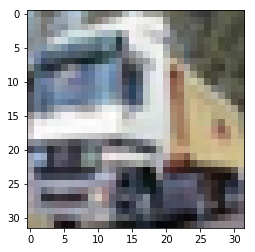

In [54]:
figure = train_features[1,:]
plt.imshow(figure)
plt.show()

# http://parneetk.github.io/blog/cnn-cifar10/

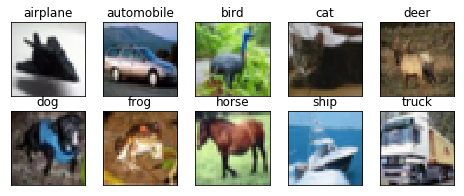

In [72]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx[0],::]
    ax.set_title(class_names[i])
    plt.imshow(features_idx)
plt.show()

# functions

In [73]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

In [ ]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/255.   # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])